In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns',False)
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Stage 1

## 1. Load Data

In [3]:
df = pd.read_csv('Invistico_Airline.csv')
df.sample(5)

satisfaction  ... Arrival Delay in Minutes
73503   dissatisfied  ...                      0.0
112953     satisfied  ...                      2.0
119511     satisfied  ...                      0.0
119728     satisfied  ...                      0.0
78606   dissatisfied  ...                     13.0

[5 rows x 23 columns]

In [4]:
df.shape

(129880, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### 1.1 Missing Data

In [6]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

insight : Dari data yang missing hanya terdapat pada Arrival Delay in Minutes, sehingga data dapat didrop langsung karena tidak terlalu signifikan yang di drop

In [7]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [8]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### 1.2 Duplicated

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(129487, 23)

In [11]:
cats = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
rating = ['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment',
         'Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']
nums = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

### 1.3 Rating

In [12]:
df[rating].describe()

Seat comfort  ...  Online boarding
count  129487.000000  ...    129487.000000
mean        2.838586  ...         3.352545
std         1.392873  ...         1.298624
min         0.000000  ...         0.000000
25%         2.000000  ...         2.000000
50%         3.000000  ...         4.000000
75%         4.000000  ...         4.000000
max         5.000000  ...         5.000000

[8 rows x 14 columns]

In [13]:
for col in rating:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Seat comfort:
3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: Seat comfort, dtype: int64

Value count kolom Departure/Arrival time convenient:
4    29504
5    26723
3    23110
2    22735
1    20771
0     6644
Name: Departure/Arrival time convenient, dtype: int64

Value count kolom Food and drink:
3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: Food and drink, dtype: int64

Value count kolom Gate location:
3    33451
4    29997
2    24441
1    22497
5    19099
0        2
Name: Gate location, dtype: int64

Value count kolom Inflight wifi service:
4    31474
5    28738
3    27518
2    26957
1    14670
0      130
Name: Inflight wifi service, dtype: int64

Value count kolom Inflight entertainment:
4    41752
5    29748
3    24133
2    19118
1    11768
0     2968
Name: Inflight entertainment, dtype: int64

Value count kolom Online support:
4    41406
5    35451
3    21543
2    17196
1    13890
0        1
Name: Online support, 

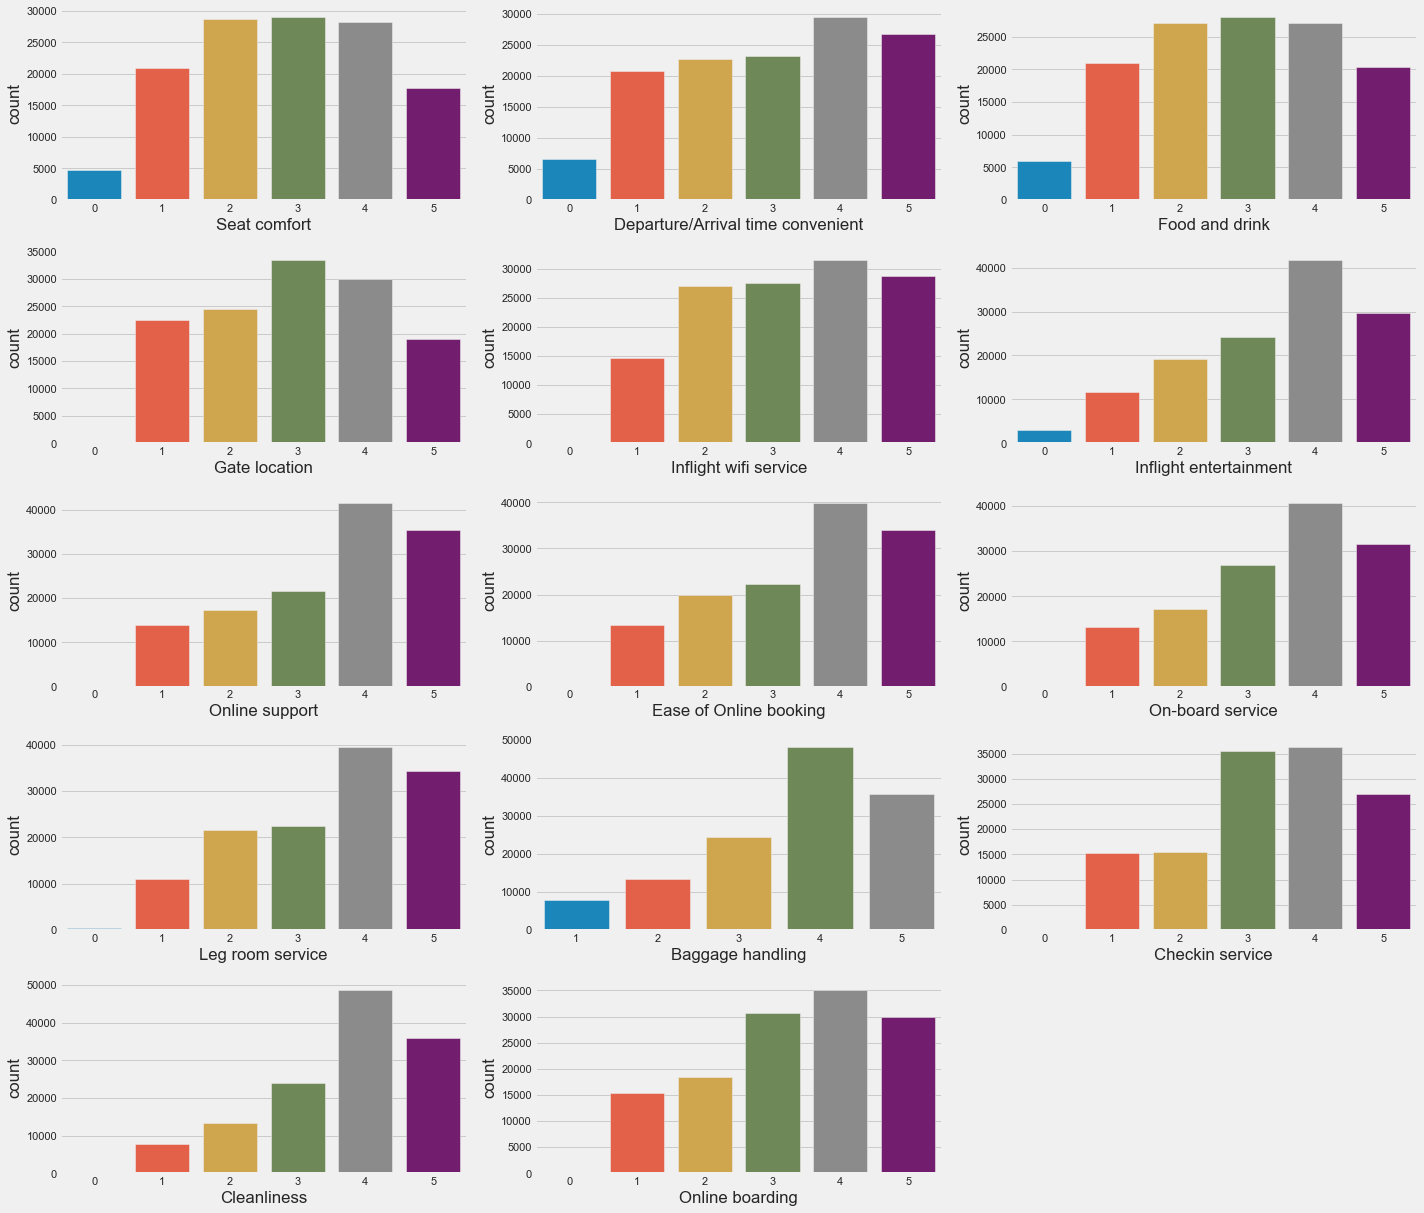

In [14]:
plt.figure(figsize=(20, 20))
for i in range(0, len(rating)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[rating[i]], orient='v')
    plt.tight_layout()

### 1.4 Nums

In [15]:
df[nums].describe()

Age  ...  Arrival Delay in Minutes
count  129487.000000  ...             129487.000000
mean       39.428761  ...                 15.091129
std        15.117597  ...                 38.465650
min         7.000000  ...                  0.000000
25%        27.000000  ...                  0.000000
50%        40.000000  ...                  0.000000
75%        51.000000  ...                 13.000000
max        85.000000  ...               1584.000000

[8 rows x 4 columns]

In [16]:
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Age:
39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

Value count kolom Flight Distance:
1963    92
1639    87
1812    87
1789    86
1981    85
        ..
4856     1
6503     1
5857     1
5665     1
4449     1
Name: Flight Distance, Length: 5397, dtype: int64

Value count kolom Departure Delay in Minutes:
0       73209
1        3671
2        2845
3        2530
4        2298
        ...  
1128        1
270         1
499         1
435         1
472         1
Name: Departure Delay in Minutes, Length: 464, dtype: int64

Value count kolom Arrival Delay in Minutes:
0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
543.0        1
400.0        1
406.0        1
339.0        1
484.0        1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64



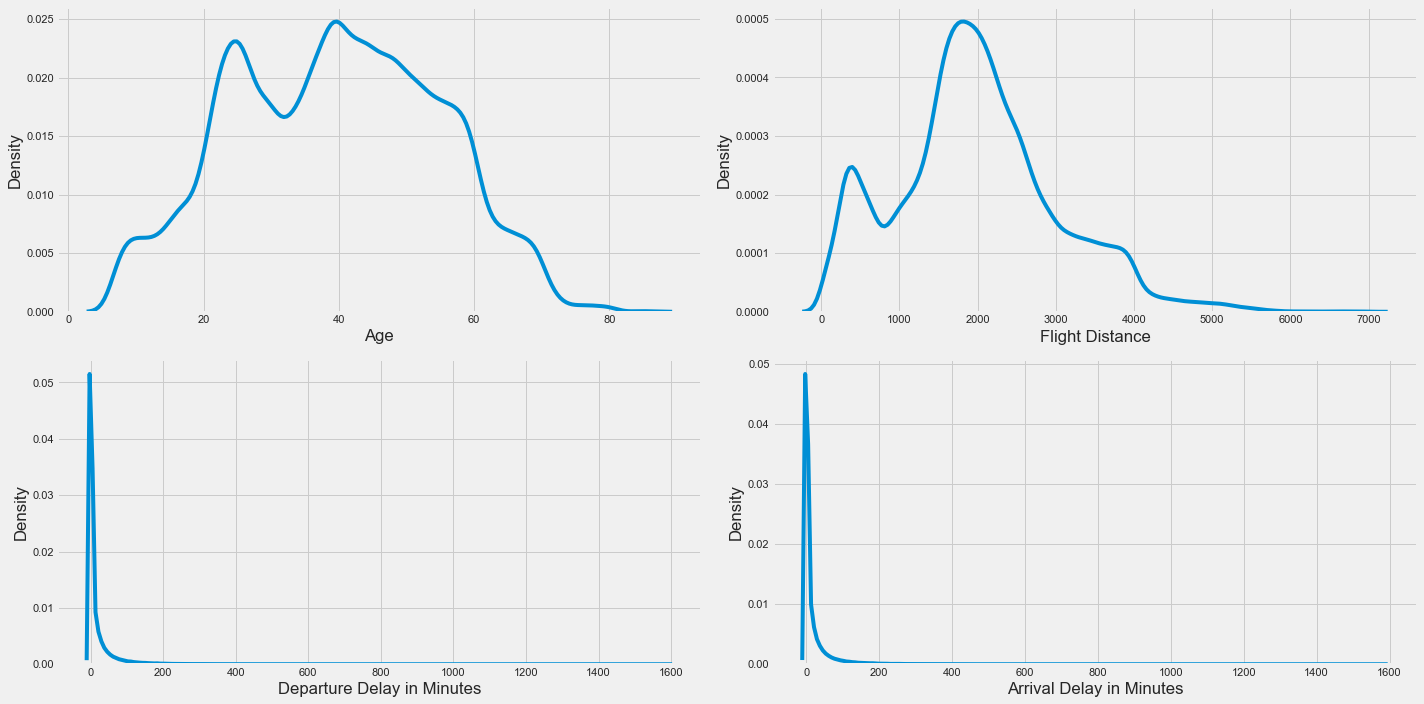

In [17]:
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(df[nums[i]])
    plt.tight_layout()

Insight : Data Age dan Flight Distance sedikit lebih balance dibadingkan Data Departure Delay dan Arrival Delay yang masih membutuhkan Standarisasi dan Normalisasi

### 1.5 Category

In [18]:
df[cats].describe()

satisfaction  Gender   Customer Type   Type of Travel     Class
count        129487  129487          129487           129487    129487
unique            2       2               2                2         3
top       satisfied  Female  Loyal Customer  Business travel  Business
freq          70882   65703          105773            89445     61990

In [19]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom satisfaction:
satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

Value count kolom Gender:
Female    65703
Male      63784
Name: Gender, dtype: int64

Value count kolom Customer Type:
Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

Value count kolom Type of Travel:
Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

Value count kolom Class:
Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64



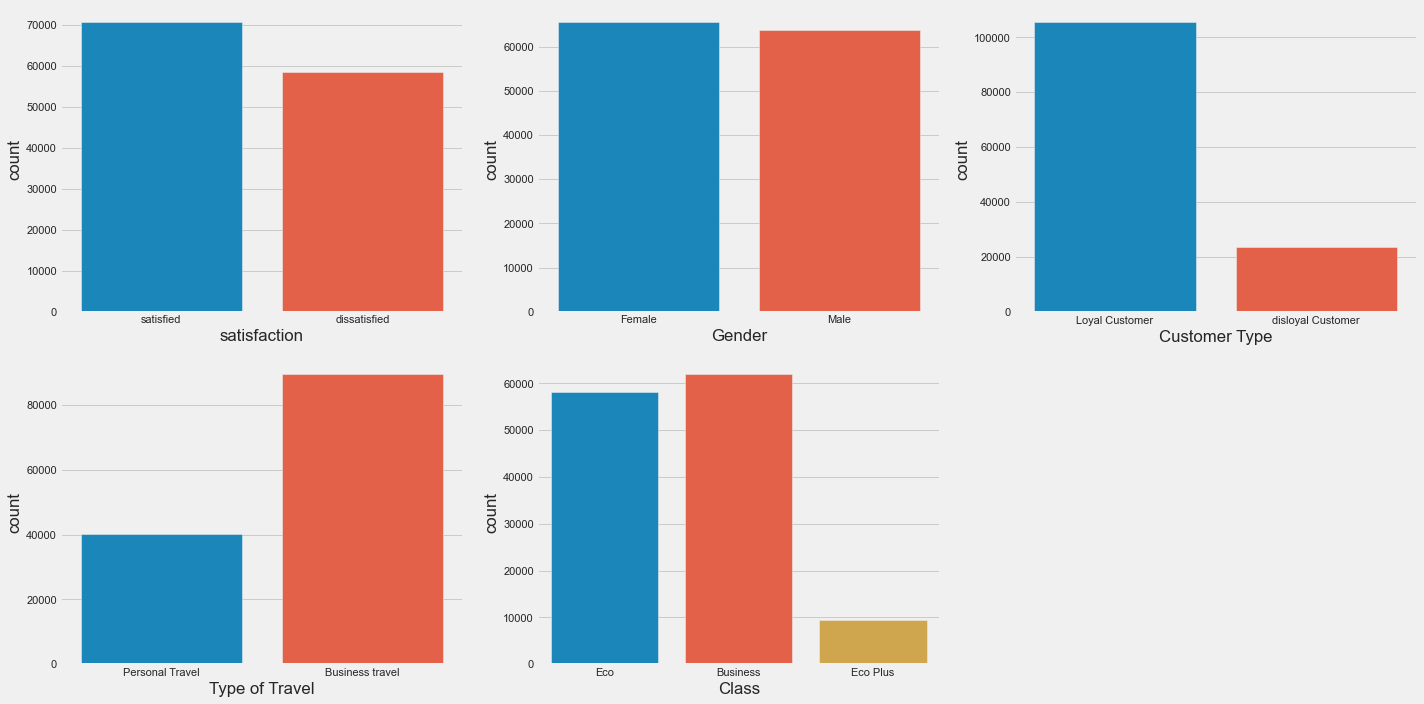

In [20]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2,3, i+1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

insight : Pada Data Satisfaction, jumlah satisfied dan dissatisfied customer hampir sama, dapat dikatakan dataset tersebut sudah balance

### 1.6 Outliers

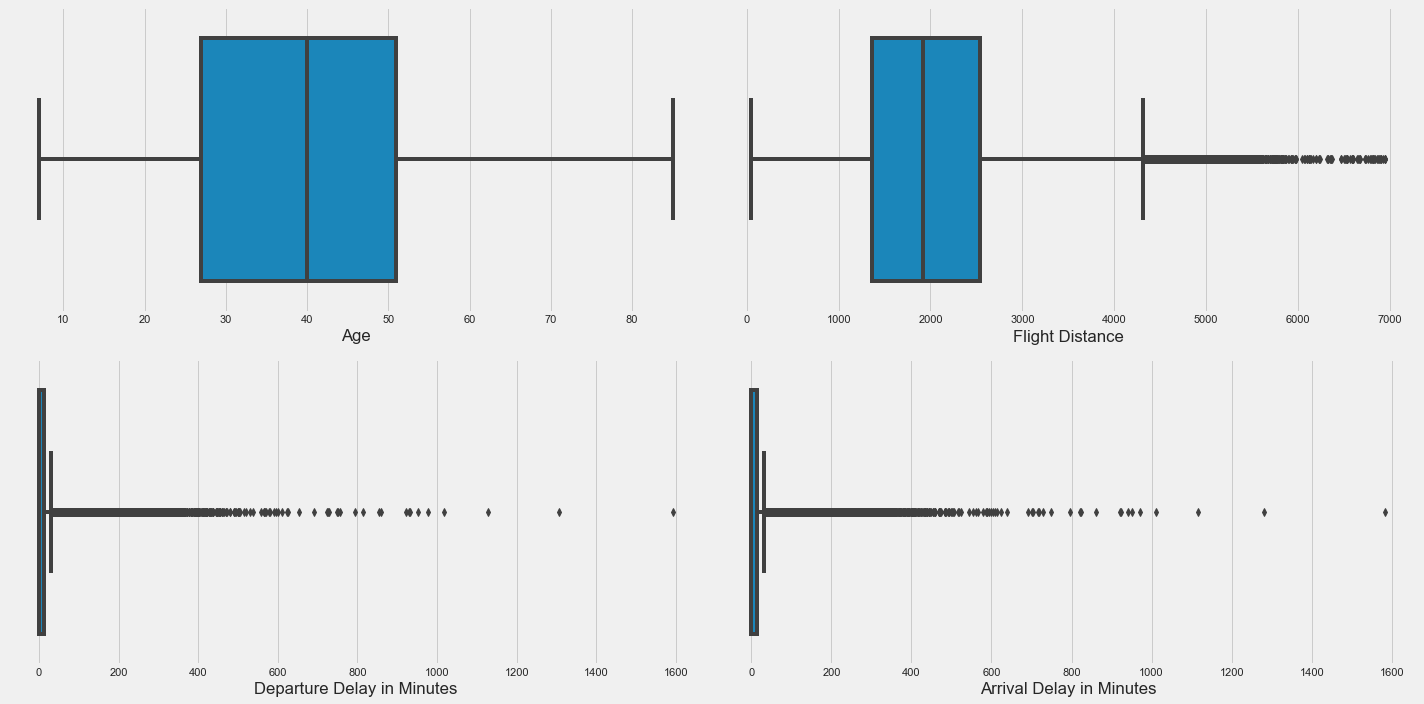

In [21]:
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2,2, i+1)
    sns.boxplot(df[nums[i]])
    plt.tight_layout()

Dengan melihat boxplot, kita mengetahui outliers terdapat pada kolom Flight Distance, Departure Delay in Minutes, dan Arrival Delay in Minutes. <br>
Menghilangkan outliers dengan menggunakan metode IQR

In [22]:
print("Before remove outliers : " + str(len(df)) + 'rows')
filtered_entries = np.array([True] * len(df))
for col in ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    min_value = q1 - (1.5 * IQR)
    max_value = q3 + (1.5 * IQR)
    filtered_entries = ((df[col] >= min_value) & (df[col] <= max_value)) & filtered_entries

    
df = df[filtered_entries]
print("After remove outliers : " + str(len(df)) + 'rows')
df.head()

Before remove outliers : 129487rows
After remove outliers : 106922rows


satisfaction  Gender  ... Departure Delay in Minutes  Arrival Delay in Minutes
0    satisfied  Female  ...                          0                       0.0
2    satisfied  Female  ...                          0                       0.0
3    satisfied  Female  ...                          0                       0.0
4    satisfied  Female  ...                          0                       0.0
5    satisfied    Male  ...                          0                       0.0

[5 rows x 23 columns]

### 1.7 Feature Encoding

In [23]:
df[cats].describe()

satisfaction  Gender   Customer Type   Type of Travel     Class
count        106922  106922          106922           106922    106922
unique            2       2               2                2         3
top       satisfied  Female  Loyal Customer  Business travel  Business
freq          60050   54330           87142            73282     50733

Karena unique value dari masing-masing kolom cukup kecil, maka akan feature encoding yang digunakan adalah One-hot Encoding. <br>
Kecuali kolom satisfaction karena ini merupakan target.

In [24]:
for cat in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# Stage 2

## Rahmat Dayat

(Flight Distance, Departure/Arrival time convenient, Departure Delay in Minutes, Arrival Delay in Minutes)

In [25]:
df_delay = df[['satisfaction', 'Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
df_delay.head()

satisfaction  ...  Arrival Delay in Minutes
0    satisfied  ...                       0.0
2    satisfied  ...                       0.0
3    satisfied  ...                       0.0
4    satisfied  ...                       0.0
5    satisfied  ...                       0.0

[5 rows x 5 columns]

In [26]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       106922 non-null  object 
 1   Flight Distance                    106922 non-null  int64  
 2   Departure/Arrival time convenient  106922 non-null  int64  
 3   Departure Delay in Minutes         106922 non-null  int64  
 4   Arrival Delay in Minutes           106922 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ MB


In [27]:
df_delay['satisfaction'] = df_delay['satisfaction'].apply(lambda x : 1 if x =='satisfied' else 0)
df_delay['Arrival Delay in Minutes'] = df_delay['Arrival Delay in Minutes'].astype('int64')
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       106922 non-null  int64
 1   Flight Distance                    106922 non-null  int64
 2   Departure/Arrival time convenient  106922 non-null  int64
 3   Departure Delay in Minutes         106922 non-null  int64
 4   Arrival Delay in Minutes           106922 non-null  int64
dtypes: int64(5)
memory usage: 8.9 MB


### Univariate Variable

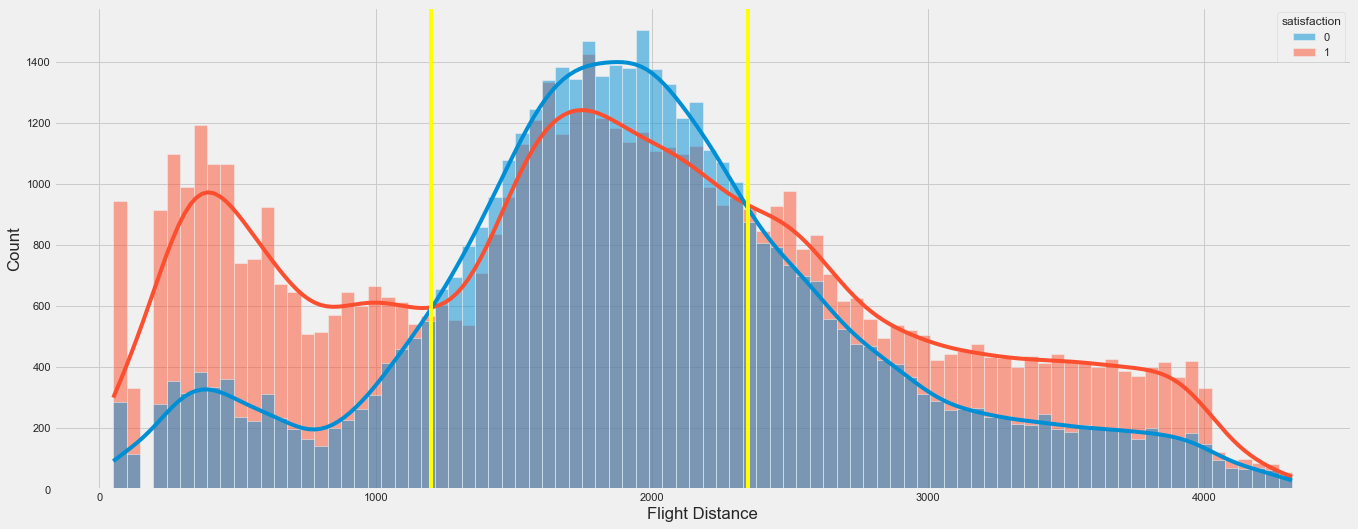

In [28]:
# Perbandingan Satisfied dan Dissatisfied berdasarkan Flight Distance

sns.histplot(data=df_delay, x='Flight Distance', hue='satisfaction', kde=True, stat='count')
plt.axvline(1200, color = 'yellow')
plt.axvline(2350, color = 'yellow')

Berdasarkan distribusi Flight Distance berdasarkan Satisfaction dapat dikategorikan menjadi 3 karena terdapat 3 nilai yang berbeda.
1. Pada rentang nilai di bawah 1200 Nilai statisfied lebih BESAR dibandingkan nilai dissatisfied terhadap Flight Distance 
2. Pada rentang nilai antara 1200 - 2350 Nilai statisfied lebih KECIL dibandingkan nilai dissatisfied terhadap Flight Distance 
3. Pada rentang nilai di atas dari 2350 Nilai statisfied lebih BESAR dibandingkan nilai dissatisfied terhadap Flight Distance 

#### Additional Feature Engineering

In [29]:
# Pengelompokan Flight Distance menjadi 3 kategori:
# 1 = Short Distance   : Flight Distance di bawah 1200
# 2 = Medium Distance  : Flight Distance antara 1200-2350
# 3 = Long Distance    : Flight Distance di atas 2350

def new_Flight_Distance (x):
    if x ['Flight Distance'] < 1200:
        new_Flight_Distance = '1'
    elif x ['Flight Distance'] >= 1200 and x ['Flight Distance'] <= 2350:
        new_Flight_Distance = '2'
    else :
        new_Flight_Distance = '3'
    return new_Flight_Distance

In [30]:
df_delay['new_Flight_Distance'] = df_delay.apply(lambda x : new_Flight_Distance(x), axis=1)
df_delay.head()

satisfaction  Flight Distance  ...  Arrival Delay in Minutes  new_Flight_Distance
0             1              265  ...                         0                    1
2             1             2138  ...                         0                    2
3             1              623  ...                         0                    1
4             1              354  ...                         0                    1
5             1             1894  ...                         0                    2

[5 rows x 6 columns]

In [31]:
Flight_Category = df_delay.groupby(['satisfaction','new_Flight_Distance']).agg({'new_Flight_Distance':'count'})
new_Flight_Distance_pcts = Flight_Category.groupby(level=1).apply(lambda x:100 * x / (x.sum()))
new_Flight_Distance_pcts

new_Flight_Distance
satisfaction new_Flight_Distance                     
0            1                              28.193442
             2                              53.149819
             3                              40.253278
1            1                              71.806558
             2                              46.850181
             3                              59.746722

<AxesSubplot:xlabel='new_Flight_Distance', ylabel='count'>

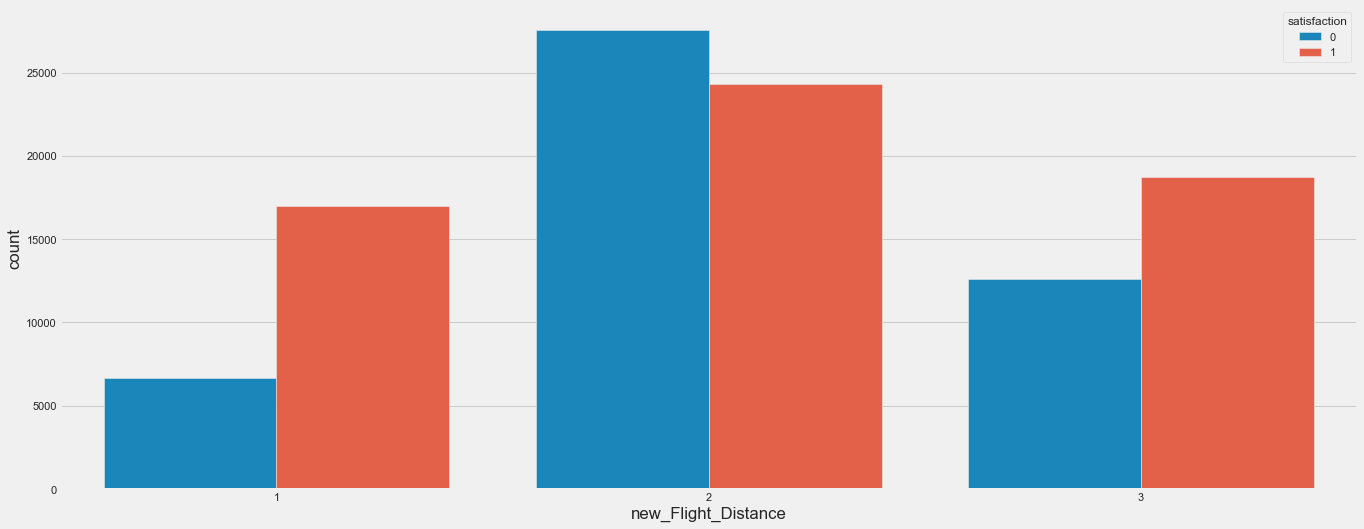

In [32]:
sns.countplot(data=df_delay, x='new_Flight_Distance', hue='satisfaction')

Berdasarkan data tersebut dapat kita simpulkan bahwa:
1. Flight Distance dengan kategori Short Distance lebih banyak pelanggan yang Satisfied sebesar 71.81% dibandingkan pelanggan yang Dissatisfied sebesar 28.19% dengan selisih yang cukup signifikan sebesar 43,62%.
2. Flight Distance dengan kategori Medium Distance lebih banyak pelanggan yang Dissatisfied sebesar 53.15% dibandingkan pelanggan yang Satisfied sebesar 46.85% akan tetapi selisih diantaranya cukup kecil sebesar 12,9%.
2. Flight Distance dengan kategori Long Distance lebih banyak pelanggan yang Satisfied sebesar 59.75% dibandingkan pelanggan yang Dissatisfied sebesar 40.25% dengan selisih sebesar 19,5%.

In [33]:
# Perbandingan Satisfied dan Dissatisfied berdasarkan Departure/Arrival time convenient

time_Convenient = df_delay.groupby(['satisfaction','Departure/Arrival time convenient']).agg({'Departure/Arrival time convenient':'count'})
time_Convenient_pcts = time_Convenient.groupby(level=1).apply(lambda x:100 * x / (x.sum()))
time_Convenient_pcts

Departure/Arrival time convenient
satisfaction Departure/Arrival time convenient                                   
0            0                                                          45.632767
             1                                                          39.902548
             2                                                          44.276574
             3                                                          44.673322
             4                                                          46.054829
             5                                                          42.857789
1            0                                                          54.367233
             1                                                          60.097452
             2                                                          55.723426
             3                                                          55.326678
             4                                                          53.945171
             5                                                          57.142211

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

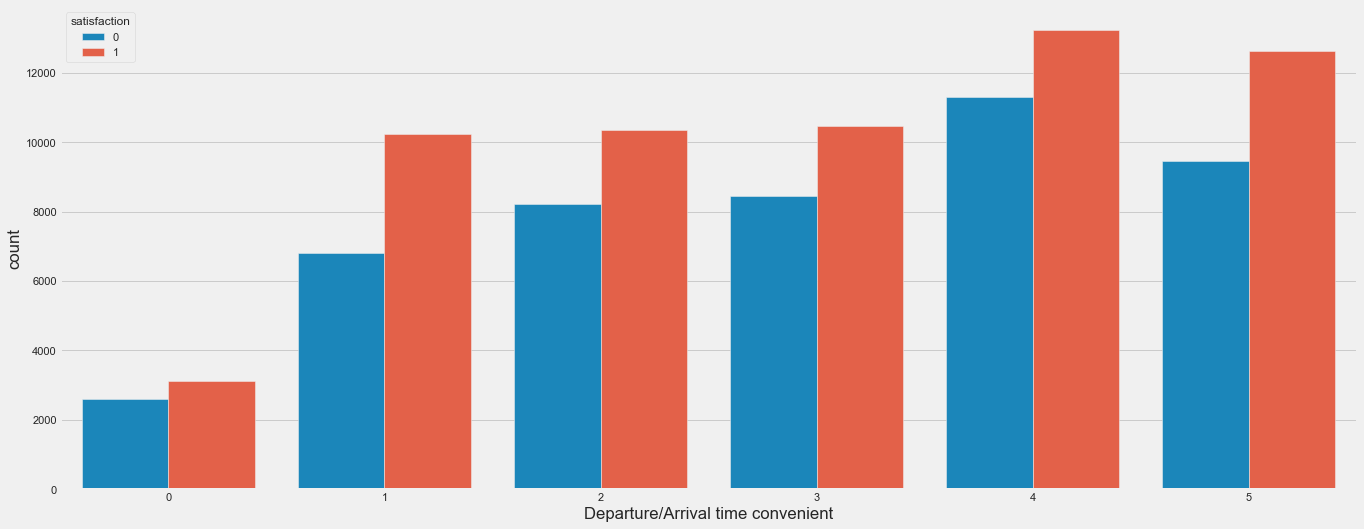

In [34]:
sns.countplot(data=df_delay, x='Departure/Arrival time convenient', hue='satisfaction')

Berdasarkan data tersebut dapat kita simpulkan bahwa:
1. Departure/Arrival time convenient dengan rating 0 lebih banyak pelanggan yang Satisfied sebesar 54.37% dibandingkan pelanggan yang Dissatisfied sebesar 45.63% dengan selisih sebesar 8,74%.
2. Departure/Arrival time convenient dengan rating 1 lebih banyak pelanggan yang Satisfied sebesar 60.10% dibandingkan pelanggan yang Dissatisfied sebesar 39.90% dengan selisih sebesar 20,2%.
3. Departure/Arrival time convenient dengan rating 2 lebih banyak pelanggan yang Satisfied sebesar 54.37% dibandingkan pelanggan yang Dissatisfied sebesar 45.63% dengan selisih sebesar 8,74%.
4. Departure/Arrival time convenient dengan rating 3 lebih banyak pelanggan yang Satisfied sebesar 55.33% dibandingkan pelanggan yang Dissatisfied sebesar 44.67% dengan selisih sebesar 10,66%.
5. Departure/Arrival time convenient dengan rating 4 lebih banyak pelanggan yang Satisfied sebesar 53.95% dibandingkan pelanggan yang Dissatisfied sebesar 46.05% dengan selisih sebesar 7,9%.
6. Departure/Arrival time convenient dengan rating 5 lebih banyak pelanggan yang Satisfied sebesar 57.14% dibandingkan pelanggan yang Dissatisfied sebesar 42.86% dengan selisih sebesar 14,28%.

Sehingga dapat disimpulkan bahwa feature Departure/Arrival time convenient pelanggan lebih Satisfied dengan persentase setiap rating di atas 53%.

<AxesSubplot:xlabel='Departure Delay in Minutes'>

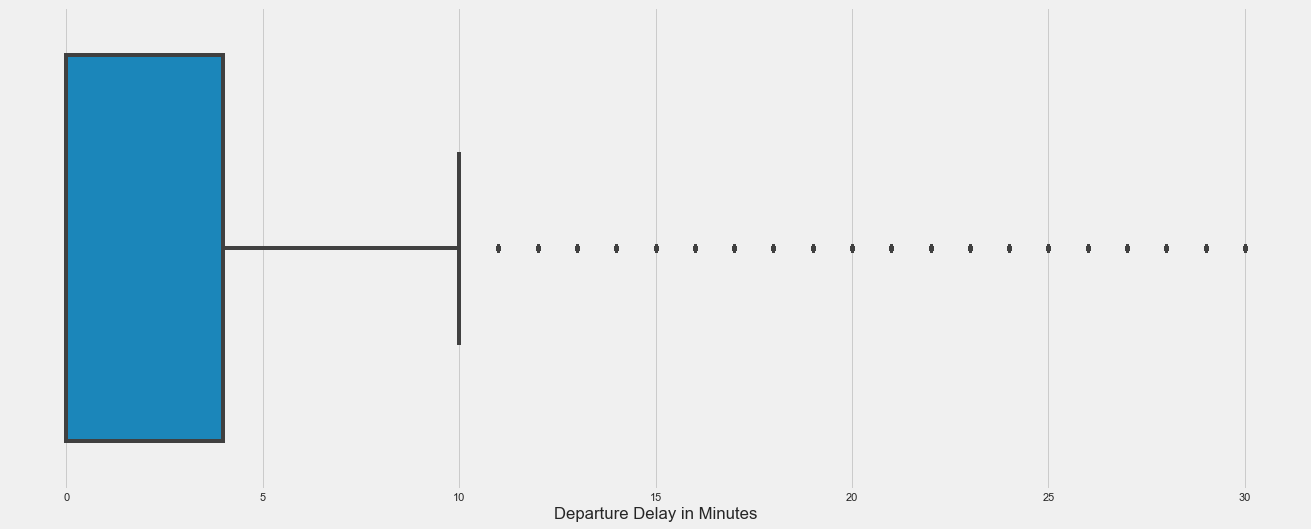

In [35]:
# Distribusi dari Departure Delay in Minutes

sns.boxplot(data=df_delay, x='Departure Delay in Minutes')

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

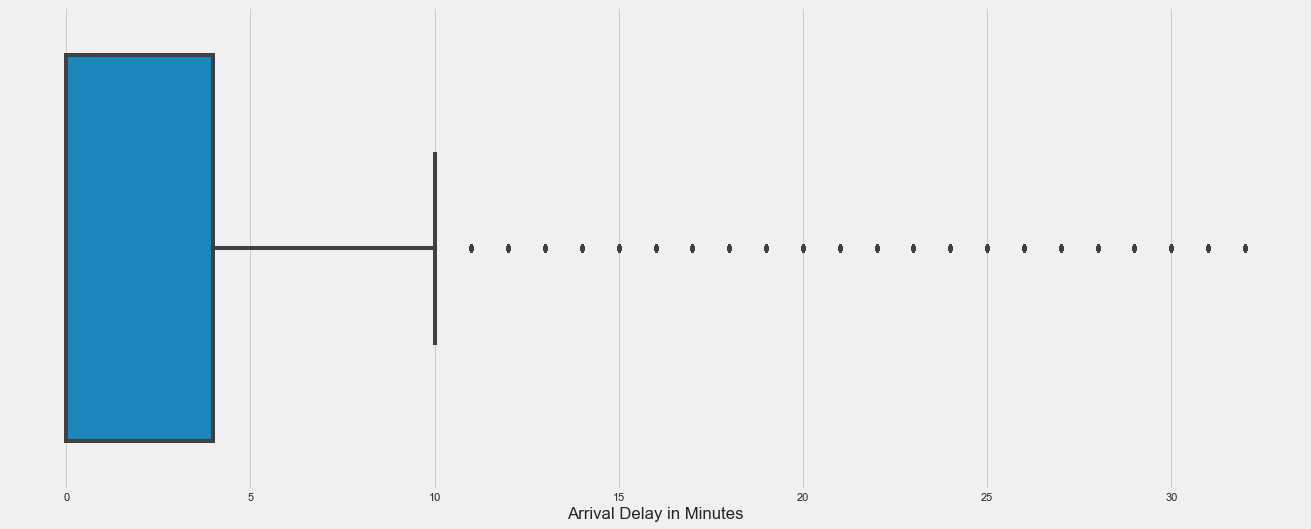

In [36]:
# Distribusi dari Arrival Delay in Minutes 

sns.boxplot(data=df_delay, x='Arrival Delay in Minutes')

In [37]:
# Pengelompokan Departure Delay in Minutes menjadi 3 kategori:
# 1 = No Delay
# 2 = Delay

def new_Departure_Delay (x):
    if x ['Departure Delay in Minutes'] == 0:
        new_Departure_Delay = '1'
    else :
        new_Departure_Delay = '2'
    return new_Departure_Delay

In [38]:
df_delay['new_Departure_Delay'] = df_delay.apply(lambda x : new_Departure_Delay(x), axis=1)
Departure_Delay = df_delay.groupby(['satisfaction','new_Departure_Delay']).agg({'new_Departure_Delay':'count',})
Departure_Delay_pcts = Departure_Delay.groupby(level=1).apply(lambda x:100 * x / (x.sum()))
Departure_Delay_pcts

new_Departure_Delay
satisfaction new_Departure_Delay                     
0            1                              42.864745
             2                              45.793445
1            1                              57.135255
             2                              54.206555

<AxesSubplot:xlabel='new_Departure_Delay', ylabel='count'>

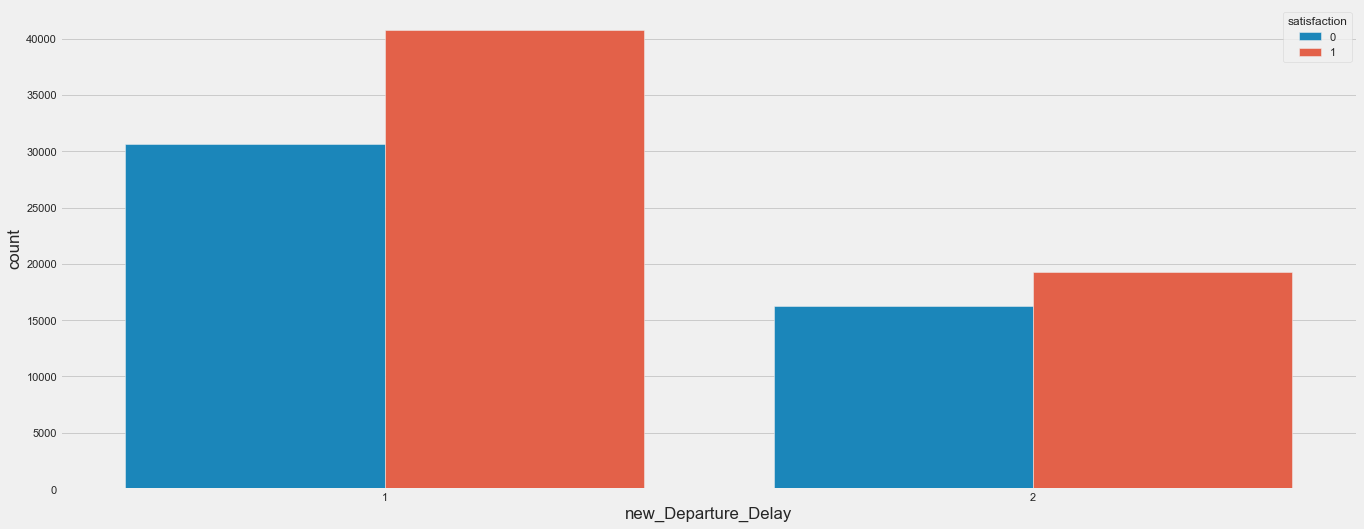

In [39]:
sns.countplot(data=df_delay, x='new_Departure_Delay', hue='satisfaction')

Berdasarkan data tersebut dapat kita simpulkan bahwa:
1. Departure_Delay dengan kategori No Delay lebih banyak pelanggan yang Satisfied sebesar 57.14% dibandingkan pelanggan yang Dissatisfied sebesar 42.86% dengan selisih sebesar 14,28%.
2. Departure_Delay dengan kategori Delay lebih banyak pelanggan yang Satisfied sebesar 54.21% dibandingkan pelanggan yang Dissatisfied sebesar 45.79% dengan selisih sebesar 8,42%.

Sehingga dapat disimpulkan bahwa feature Departure Delay dengan kategori No Delay pelanggan lebih banyak Satisfied sebesar 57.14% dibandingkan pelanggan yang Dissatisfied sebesar 42.86% dengan selisih yang cukup signifikan sebesar 14,28%.

In [40]:
# Pengelompokan Arrival Delay in Minutes menjadi 3 kategori:
# 1 = No Delay
# 2 = Delay

def new_Arrival_Delay (x):
    if x ['Arrival Delay in Minutes'] == 0:
        new_Arrival_Delay = '1'
    else :
        new_Arrival_Delay = '2'
    return new_Arrival_Delay

In [41]:
df_delay['new_Arrival_Delay'] = df_delay.apply(lambda x : new_Arrival_Delay(x), axis=1)

Arrival_Delay = df_delay.groupby(['satisfaction','new_Arrival_Delay']).agg({'new_Arrival_Delay':'count'})
Arrival_Delay_pcts = Arrival_Delay.groupby(level=1).apply(lambda x:100 * x / (x.sum()))
Arrival_Delay_pcts

new_Arrival_Delay
satisfaction new_Arrival_Delay                   
0            1                          41.568381
             2                          48.413124
1            1                          58.431619
             2                          51.586876

<AxesSubplot:xlabel='new_Arrival_Delay', ylabel='count'>

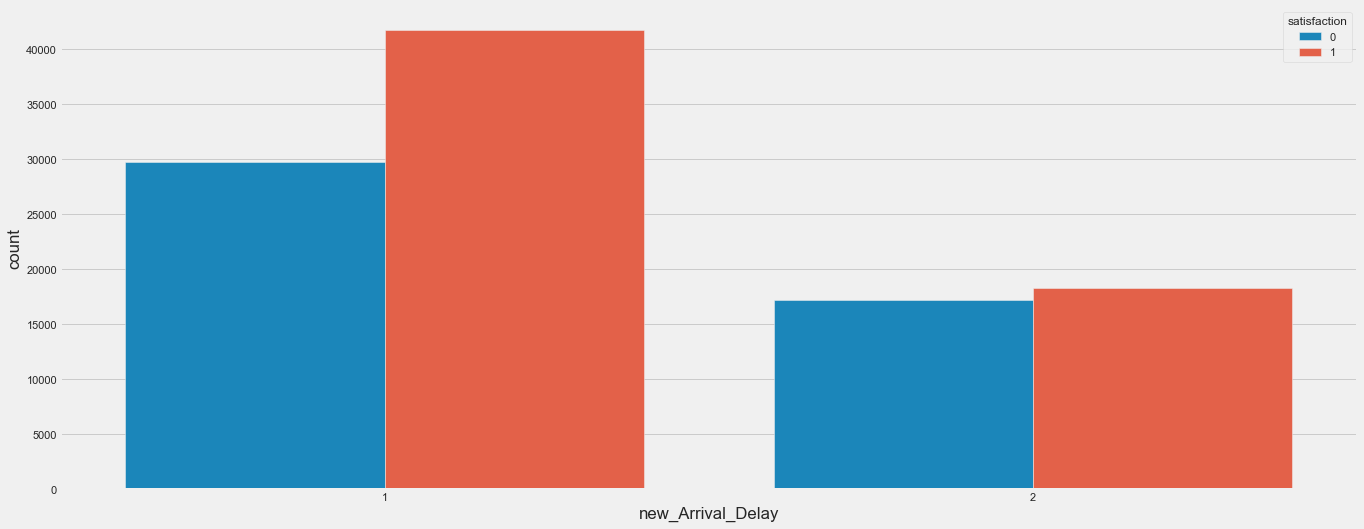

In [42]:
sns.countplot(data=df_delay, x='new_Arrival_Delay', hue='satisfaction', ax=None)

Berdasarkan data tersebut dapat kita simpulkan bahwa:
1. Arrival Delay dengan kategori No Delay lebih banyak pelanggan yang Satisfied sebesar 58.43% dibandingkan pelanggan yang Dissatisfied sebesar 41.57% dengan selisih sebesar 16,86%.
2. Arrival Delay dengan kategori Delay lebih banyak pelanggan yang Satisfied sebesar 51.59% dibandingkan pelanggan yang Dissatisfied sebesar 48.41% dengan selisih sebesar 3,18%.

Sehingga dapat disimpulkan bahwa feature Arrival Delay dengan kategori No Delay pelanggan lebih banyak Satisfied sebesar 58.43% dibandingkan pelanggan yang Dissatisfied sebesar 41.57% dengan selisih cukup signifikan sebesar 16,86%

### Multivariate Variable

In [43]:
df_delay['new_Flight_Distance'] = df_delay['new_Flight_Distance'].astype('int64')
df_delay['new_Departure_Delay'] = df_delay['new_Departure_Delay'].astype('int64')
df_delay['new_Arrival_Delay'] = df_delay['new_Arrival_Delay'].astype('int64')

In [44]:
df_delay = df_delay.drop(columns=['Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

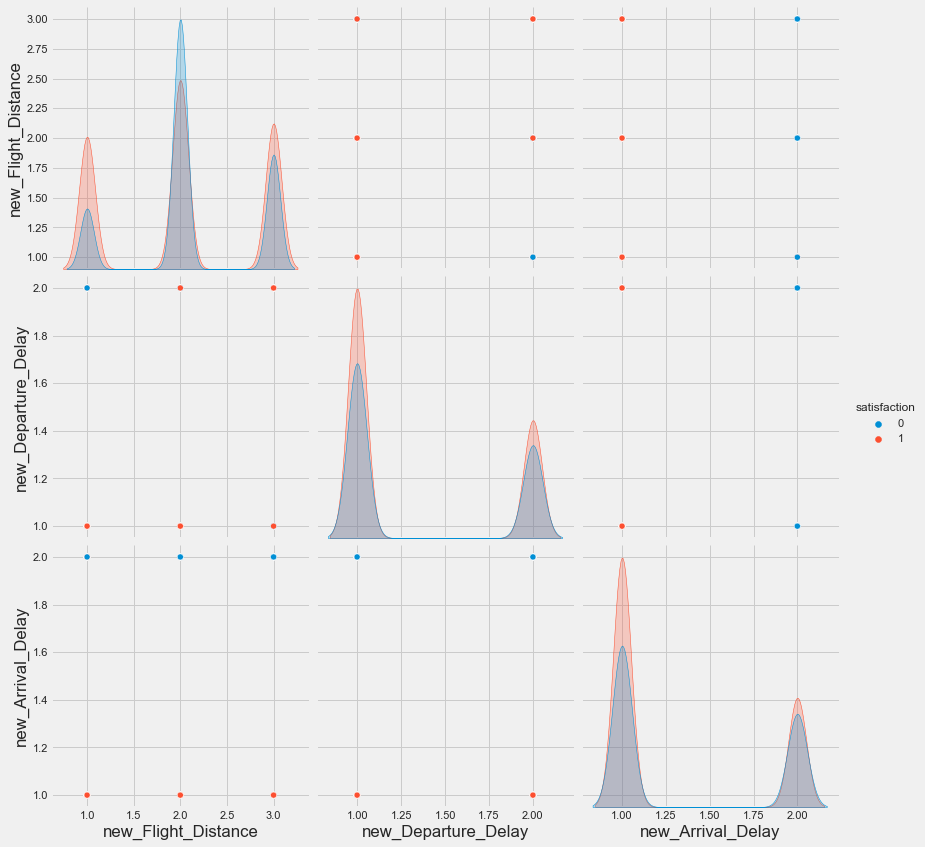

In [45]:
sns.pairplot(df_delay, hue='satisfaction', height=4)

<AxesSubplot:>

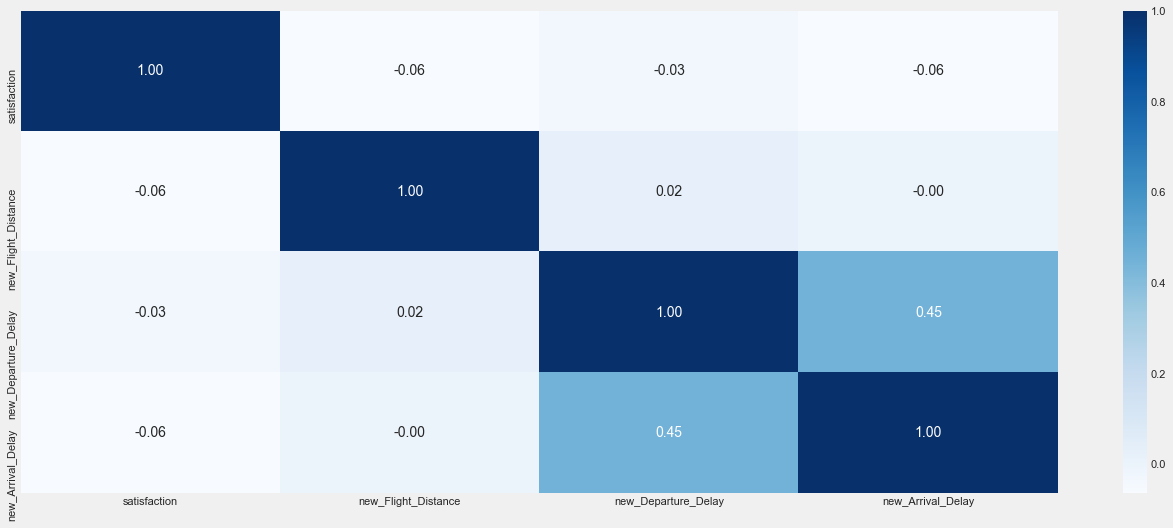

In [46]:
sns.heatmap(df_delay.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')

Berdasarkan korelasi di atas yang dapat disimpulkan bahwa korelasi yang kuat dengan nilai 0.51 antara Departure Delay dan Arrival Delay

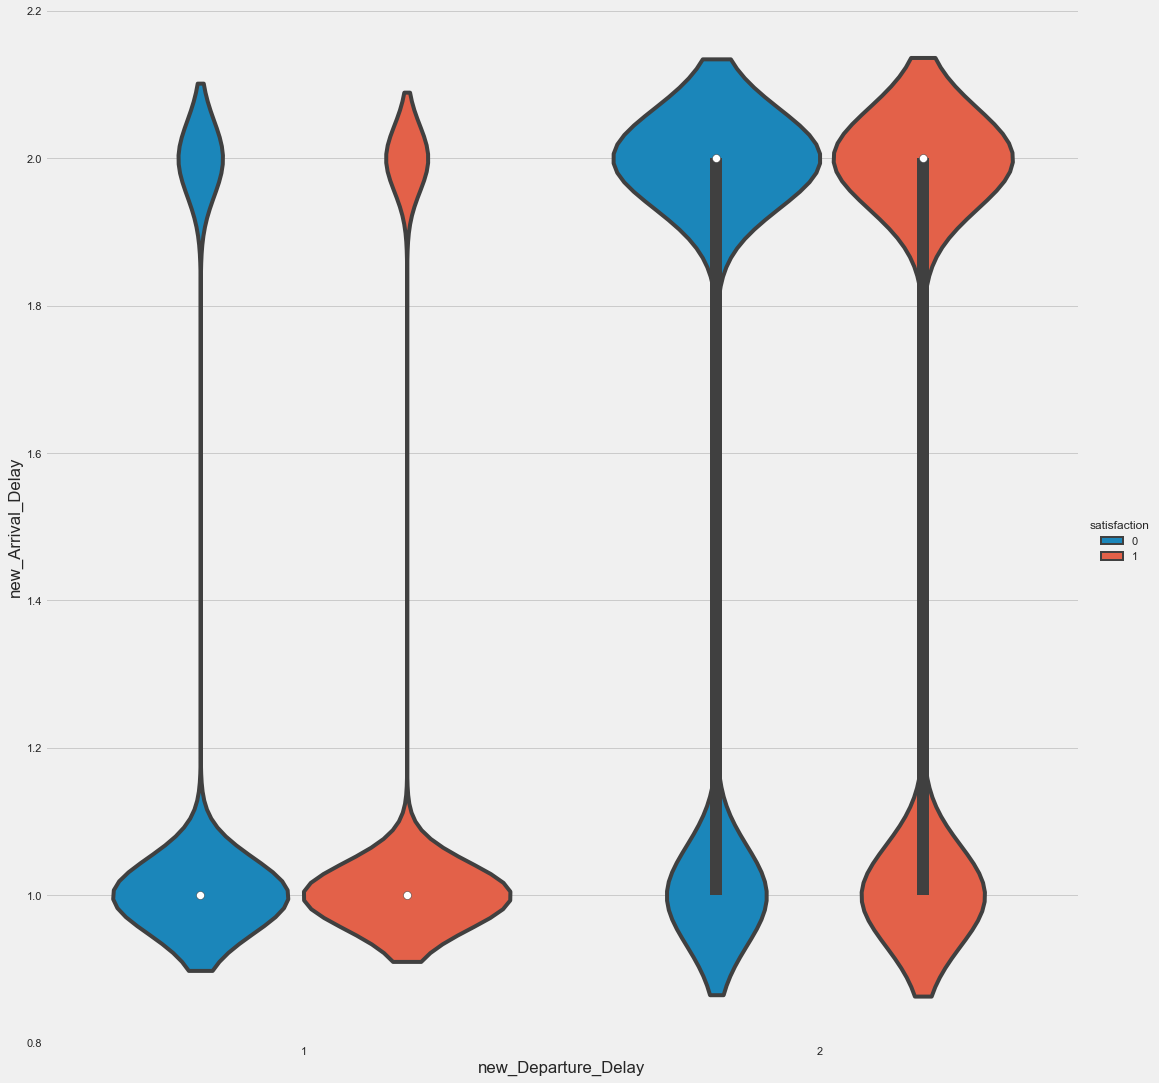

In [47]:
sns.catplot(x='new_Departure_Delay', y='new_Arrival_Delay', hue='satisfaction', kind='violin', size=15, data=df_delay)

Berdasarkan Violinbox di atas yang merupakan perbandingan antara Departure Delay dan Arrival Delay dapat disimpulkan,
1. Perbandingan No Delay pada Departure Delay dan No Delay pada Arrival Delay lebih banyak pelanggan yang Satisfied
2. Perbandingan Delay pada Departure Delay dan Delay pada Arrival Delay lebih banyak pelanggan yang Dissatisfied

### Conclusion

In [48]:
df_delay = df_delay[['satisfaction', 'new_Flight_Distance', 'new_Departure_Delay', 'new_Arrival_Delay' ]]
df_delay.sample(5)

satisfaction  ...  new_Arrival_Delay
794               1  ...                  1
85131             0  ...                  1
17093             1  ...                  1
64540             1  ...                  1
66555             0  ...                  2

[5 rows x 4 columns]

Berdasarkan percobaan dapat ditarik kesimpulan feature yang dapat digunakan sebagai berikut: 'new_Flight_Distance', 'new_Departure_Delay', 'new_Arrival_Delay'

## Kevin

(Cleanliness, Baggage handling, Leg room service, On-board service, Gate location)

In [49]:
group_take_off = np.array(['Cleanliness', 'Baggage handling', 'Leg room service', 'On-board service', 'Gate location'])
df_take_off = df[group_take_off]
df_take_off['satisfaction'] = df['satisfaction'].copy()
df_take_off['satisfaction'] = df_take_off['satisfaction'].apply(lambda x : 1 if x =='satisfied' else 0)
df_take_off.head()

Cleanliness  Baggage handling  ...  Gate location  satisfaction
0            3                 3  ...              2             1
2            4                 4  ...              3             1
3            1                 1  ...              3             1
4            2                 2  ...              3             1
5            4                 5  ...              3             1

[5 rows x 6 columns]

In [50]:
df_take_off.describe()

Cleanliness  Baggage handling  ...  Gate location   satisfaction
count  106922.000000     106922.000000  ...  106922.000000  106922.000000
mean        3.731346          3.706814  ...       2.986102       0.561624
std         1.145187          1.158040  ...       1.306677       0.496190
min         0.000000          1.000000  ...       0.000000       0.000000
25%         3.000000          3.000000  ...       2.000000       0.000000
50%         4.000000          4.000000  ...       3.000000       1.000000
75%         5.000000          5.000000  ...       4.000000       1.000000
max         5.000000          5.000000  ...       5.000000       1.000000

[8 rows x 6 columns]

### Univariate Variable

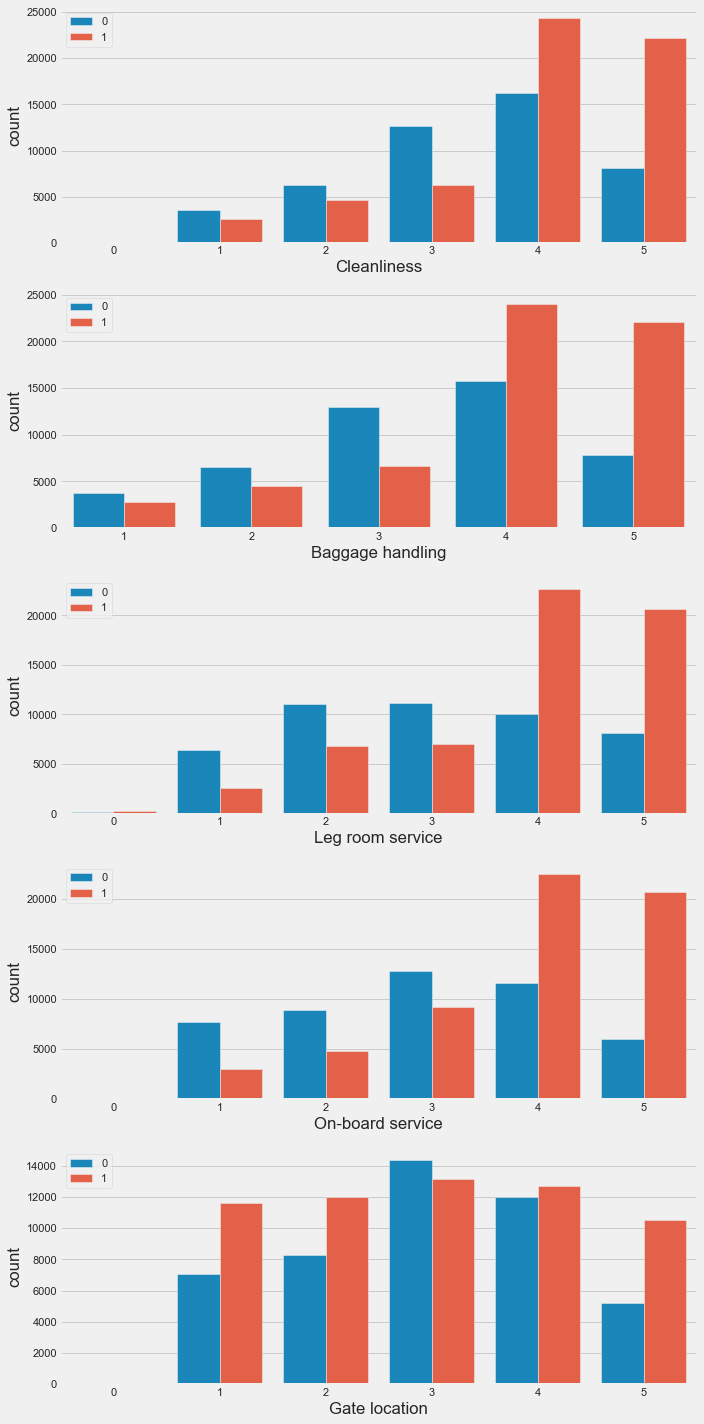

In [51]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5)
for i, s in enumerate(group_take_off):
    sns.countplot(data = df_take_off, x = s, ax = ax[i], hue= 'satisfaction')
    ax[i].legend(loc='upper left')
plt.tight_layout()

Berdasarkan gambar plot diatas. <br>
Jumlah yang satisfied jauh lebih banyak daripada disatisfied pada rating 4 dan 5 di On-board service, Leg room service, dan Cleaniness.<br>
Sedangkan pada Baggage handling cukup pada rating 3 dan 4.<br>
Untuk Gate location tidak terlalu signifikan perbedaan jumlah antar satisfaction dan didisatisfaction pada masing-masing rating.

In [52]:
def percent_table(category):
    satisfied = df_take_off[df_take_off['satisfaction']==1][[category]].value_counts().reset_index().sort_values(category)
    total = df_take_off[[category]].value_counts().reset_index()
    satisfied.rename(columns={0 : 'satisfaction'}, inplace=True)
    total.rename(columns={0 : 'satisfaction'}, inplace=True)
    satisfied['satisfaction'] = satisfied['satisfaction']/total['satisfaction'] * 100 
    total['satisfaction'] = 100
    return satisfied, total

In [53]:
total = [0 for r in range(5)]
satisfied = [0 for r in range(5)]
for i, cat in enumerate(group_take_off):
    satisfied[i], total[i] = percent_table(cat)

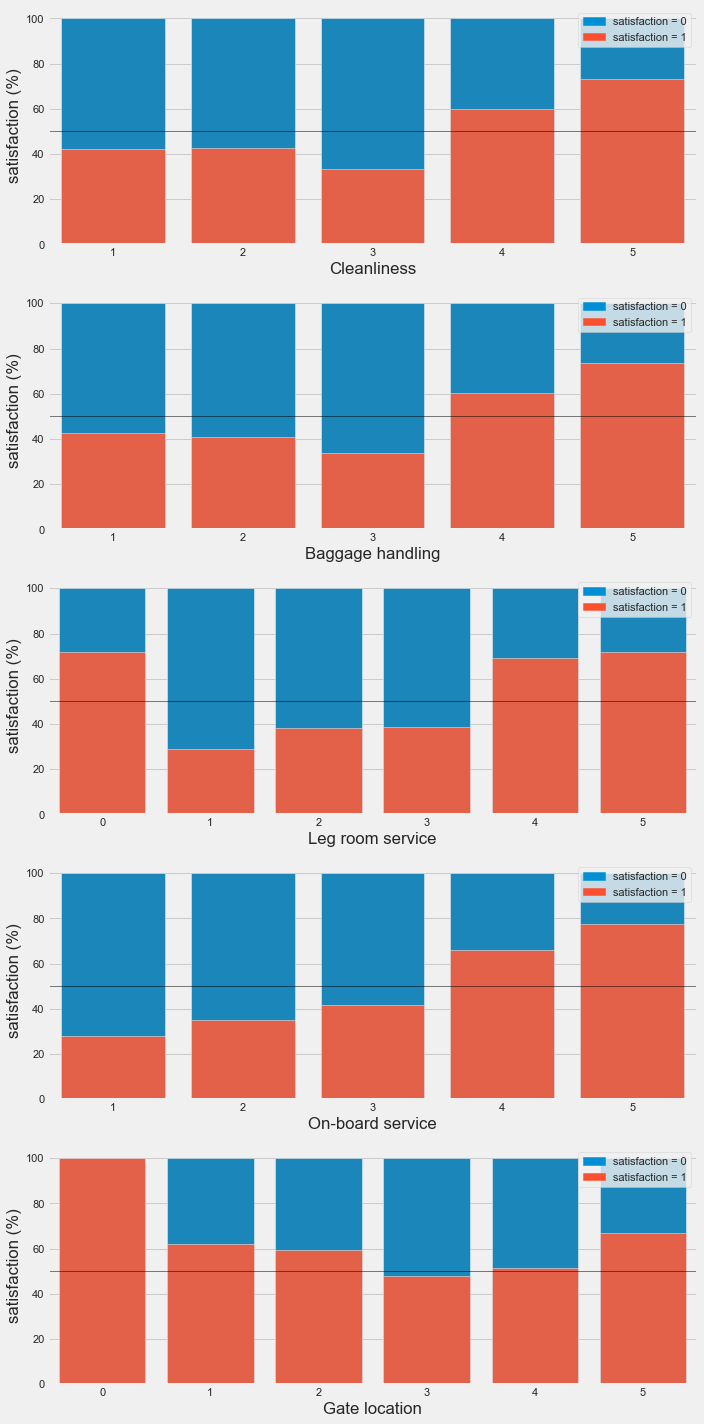

In [54]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5)
top_bar = mpatches.Patch(color=sns.color_palette()[0], label='satisfaction = 0')
bottom_bar = mpatches.Patch(color=sns.color_palette()[1], label='satisfaction = 1')
for i, cat in enumerate(group_take_off):
    bar1 = sns.barplot(x=cat,  y='satisfaction', data= total[i], color=sns.color_palette()[0], ax=ax[i])
    bar2 = sns.barplot(x=cat,  y='satisfaction', data= satisfied[i], color=sns.color_palette()[1],ax=ax[i])
    ax[i].axhline(50, color = 'black', linewidth= 0.5)
    ax[i].set_ylabel('satisfaction (%)')
    ax[i].legend(handles=[top_bar, bottom_bar], loc='upper right')

plt.tight_layout()

Garis hitam menunjukan nilai 50 %. <br>
Persen satisfied diatas 50% terdapat pada rating 4 dan 5 di semua category kecuali gate location.<br>

In [55]:
for table in satisfied:
    print(table)

   Cleanliness  satisfaction
4            1     41.981747
3            2     42.508775
2            3     33.173835
0            4     59.996550
1            5     73.176114
   Baggage handling  satisfaction
4                 1     42.809263
3                 2     40.839938
2                 3     33.769340
0                 4     60.411692
1                 5     73.752755
   Leg room service  satisfaction
5                 0     71.938776
4                 1     28.991783
3                 2     38.184253
2                 3     38.682106
0                 4     69.232884
1                 5     71.818340
   On-board service  satisfaction
4                 1     27.892115
3                 2     35.205910
2                 3     41.764492
0                 4     66.030905
1                 5     77.493904
   Gate location  satisfaction
5              0    100.000000
3              1     62.184019
2              2     59.243552
0              3     47.805887
1              4     51.5

<AxesSubplot:>

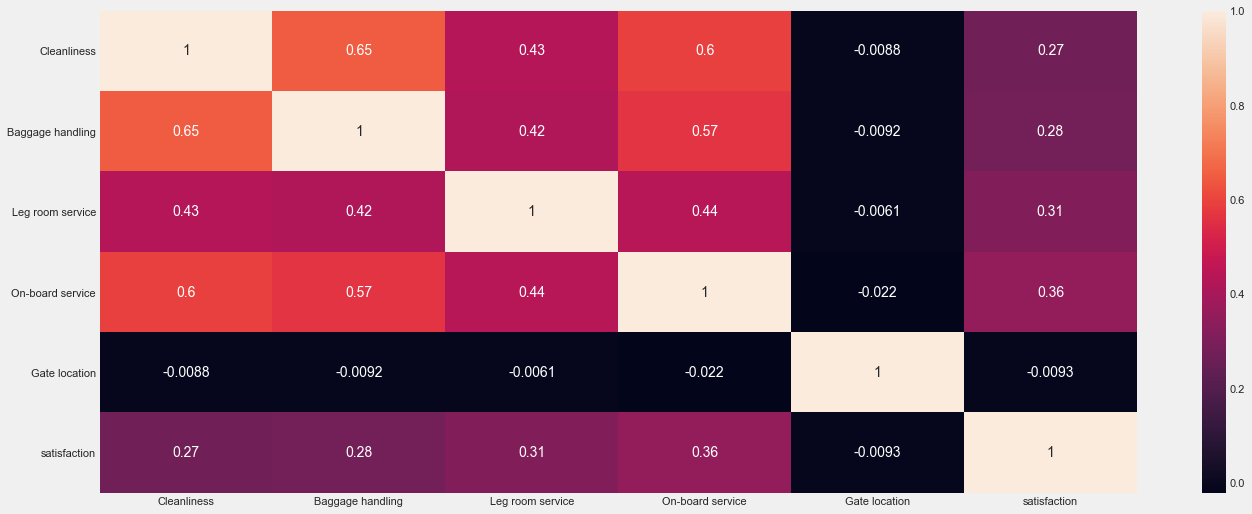

In [56]:
sns.heatmap(df_take_off.corr(method='spearman'), annot=True)

Untuk menampilkan korelasi antar data ordinal, maka metodenya menggunakan spearman.<br>
Dapat dilihat semua feature cukup memiliki korelasi dengan satisfaction di kisaran 0.27 - 0.36. <br>
Sedangkan Gate location memiliki nilai yang sangat kecil untuk korelasi nya dengan satisfaction. <br>
Terdapat korelasi antara baggage handling dengan cleanliness yang cukup tinggi.

### Multivariate Variable

In [57]:
pivot = pd.pivot_table(df_take_off[df_take_off['satisfaction']==1], values='satisfaction', index=['Cleanliness'], columns=['On-board service'], aggfunc='count')
pivot

On-board service     1     2     3      4      5
Cleanliness                                     
1                 1022   381   402    414    357
2                  439  2875   436    423    429
3                  530   548  4208    576    447
4                  537   557  2098  19055   2099
5                  440   452  2035   1966  17324

<AxesSubplot:xlabel='On-board service', ylabel='Cleanliness'>

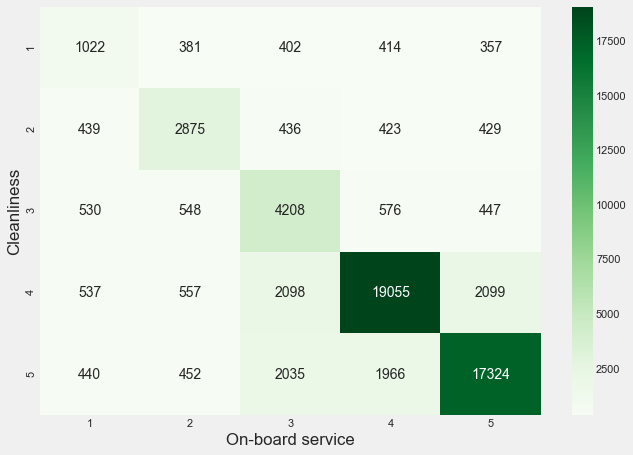

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens',)

In [59]:
pvt_table = [[0 for c in range(5)] for r in range(5)]
for i, var1 in enumerate(group_take_off):
    for j, var2 in enumerate(group_take_off):
        if var1==var2:
            continue
        else:
            if i > j :
                data = df_take_off[df_take_off['satisfaction']==1]
            else :
                data = df_take_off[df_take_off['satisfaction']==0]
            pvt_table[i][j] = pd.pivot_table(data, values='satisfaction', index=[var1], columns=[var2], aggfunc='count')
            pvt_table[i][j] = pvt_table[i][j].fillna(0)

In [60]:
 pvt_table[0][4]

Gate location       1       2       3       4       5
Cleanliness                                          
0                 0.0     0.0     1.0     0.0     1.0
1               739.0   769.0   818.0   742.0   492.0
2              1064.0  1532.0  1654.0  1134.0   840.0
3              1424.0  1980.0  4329.0  3663.0  1313.0
4              2299.0  2322.0  5243.0  4682.0  1687.0
5              1535.0  1662.0  2335.0  1755.0   857.0

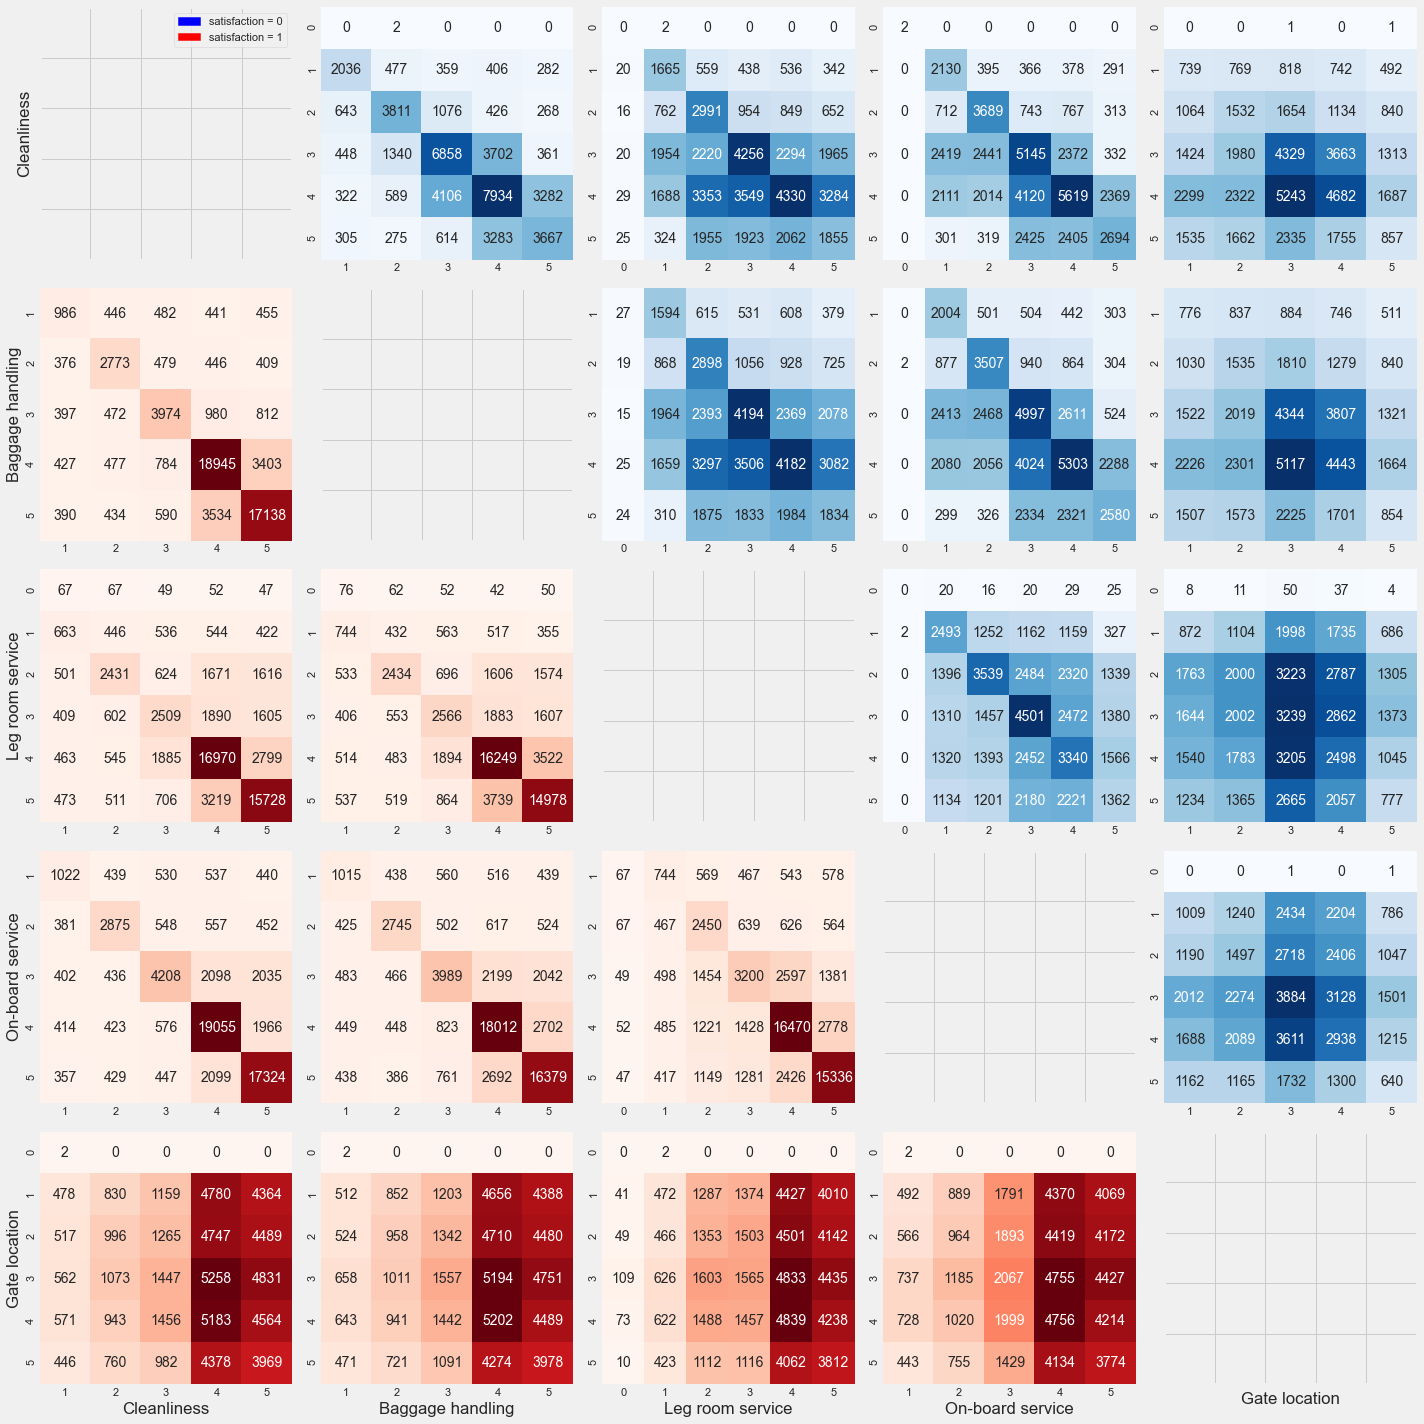

In [61]:
fig, ax = plt.subplots(figsize=(20,20), nrows=5, ncols=5)
top_bar = mpatches.Patch(color='Blue', label='satisfaction = 0')
bottom_bar = mpatches.Patch(color='Red', label='satisfaction = 1')
for i in range(5):
    for j in range(5):
        if i == j : #diagonal position, for null plot
            ax[i][j].set_xticklabels('')
            ax[i][j].set_yticklabels('')
            ax[0][0].legend(handles=[top_bar, bottom_bar], loc='upper right')
            continue
        else:
            if i > j: # lower position, for satisfied plot
                sns.heatmap(pvt_table[i][j], annot=True, fmt='.0f', cmap='Reds', ax=ax[i][j], cbar=False, vmin=0)
            else : # upper position, for unsatisfied plot
                sns.heatmap(pvt_table[i][j], annot=True, fmt='.0f', cmap='Blues', ax=ax[i][j], cbar=False, vmin=0)

for i in range(5):
    for j in range(5):
        if i < 4:
            ax[i][j].set_xlabel('')
        if j > 0:
            ax[i][j].set_ylabel('')
ax[0][0].set_ylabel('Cleanliness')
ax[4][4].set_xlabel('Gate location')

plt.tight_layout()

Pada group yang disatisfied (upper), jumlahnya cukup menyebar pada semua rating di gabungan feature. <br>
Pada group yang satisfied (lower), jumlah yang signifikan berada pada rating 4-5 untuk masing-masing gabungan feature. <br>
Tetapi bila digabungkan dengan feature gate location, maka cukup menyebar di rating gate location.

### Conclusion

Berdasarkan beberapa visualization di atas. <br>
Feature yang dapat memberikan perbedaan satisfied dan disatisfied yang signifikan adalah Cleanliness, Baggage handling, Leg room service, On-board service. <br>
Sedangkan Gate location tidak menunjukan perbedaan yang signifikan. <br>
Sehingga Gate location tidak digunakan untuk pembuatan model.

## Slamet Juniarto

(Inflight wifi service, Inflight entertainment, Seat comfort, Food and drink)

In [62]:
df_new = df[['satisfaction','Inflight wifi service','Inflight entertainment','Seat comfort','Food and drink',]]

In [63]:
df_class = df[['Class']]
df_class.describe()

Class
count     106922
unique         3
top     Business
freq       50733

In [64]:
df_inflight =pd .merge(df_class, df_new, left_index=True, right_index=True)
df_inflight.describe()

Inflight wifi service  ...  Food and drink
count          106922.000000  ...   106922.000000
mean                3.259844  ...        2.855493
std                 1.317037  ...        1.448015
min                 0.000000  ...        0.000000
25%                 2.000000  ...        2.000000
50%                 3.000000  ...        3.000000
75%                 4.000000  ...        4.000000
max                 5.000000  ...        5.000000

[8 rows x 4 columns]

In [65]:
df_inflight.isna().sum()

Class                     0
satisfaction              0
Inflight wifi service     0
Inflight entertainment    0
Seat comfort              0
Food and drink            0
dtype: int64

### Univariate Variable

<AxesSubplot:xlabel='Inflight wifi service'>

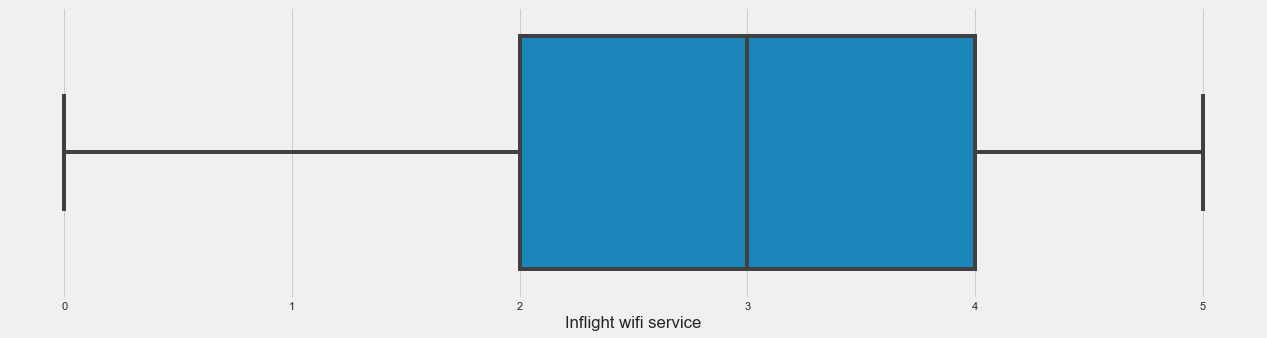

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Inflight wifi service')

<AxesSubplot:xlabel='Inflight entertainment'>

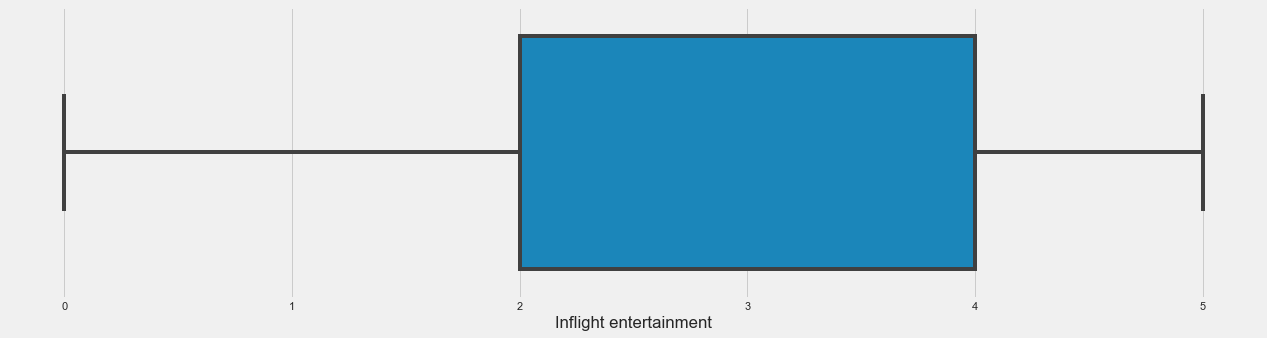

In [67]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Inflight entertainment')

<AxesSubplot:xlabel='Seat comfort'>

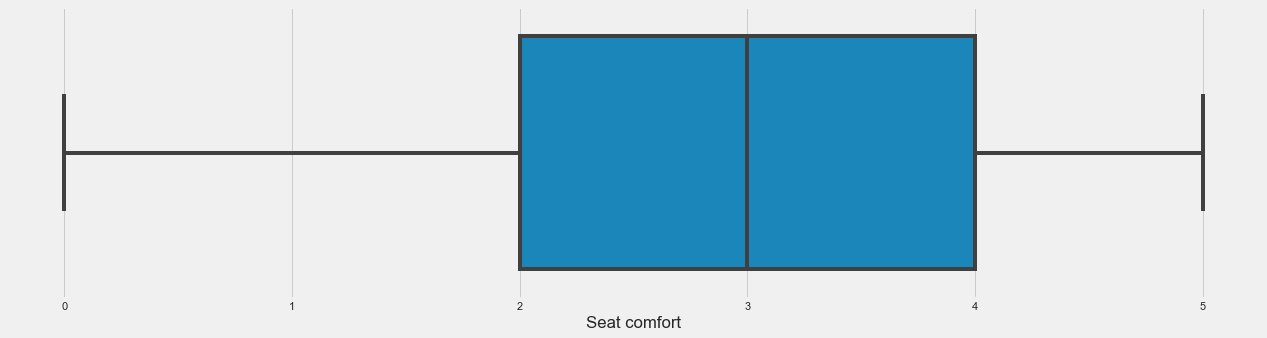

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Seat comfort')

<AxesSubplot:xlabel='Food and drink'>

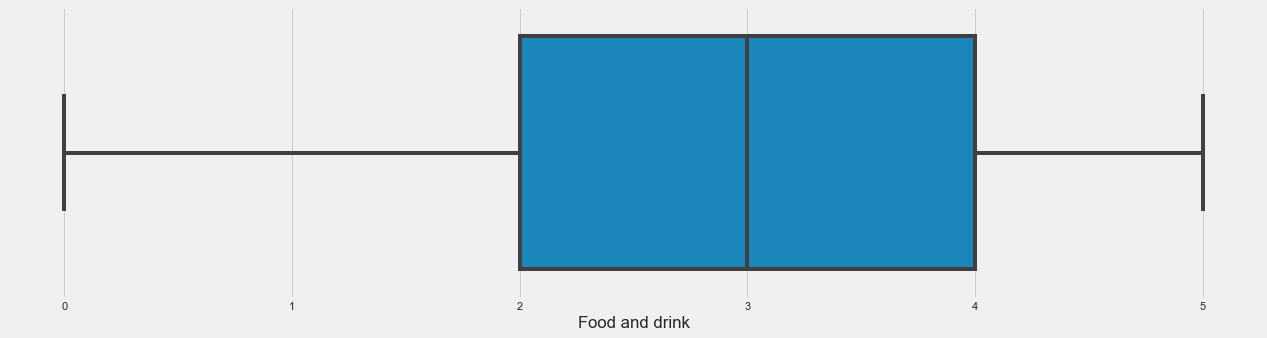

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Food and drink')

Tidak terllihat Out Liers pada visualisasi boxplot dengan data  Inflight wifi service, Inflight entertainment, Seat comfort, Food and drink

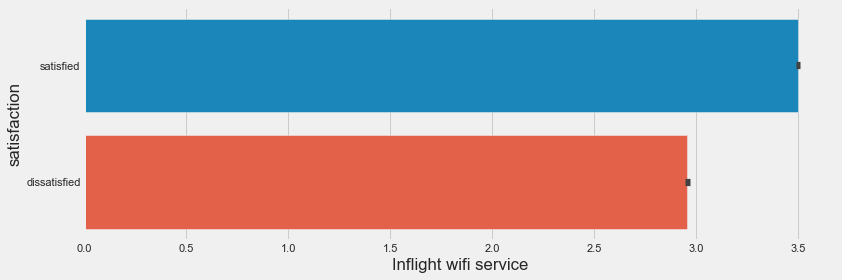

In [70]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'Inflight wifi service', y= 'satisfaction', data=df_inflight);

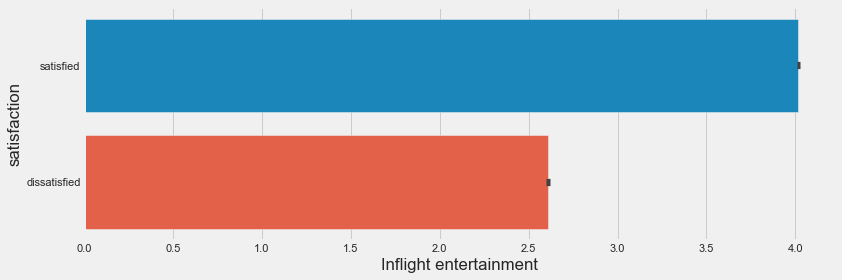

In [71]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'Inflight entertainment', y= 'satisfaction', data=df_inflight);

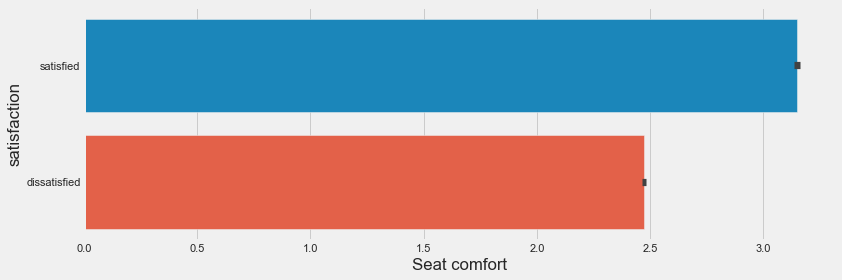

In [72]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'Seat comfort', y= 'satisfaction', data=df_inflight);

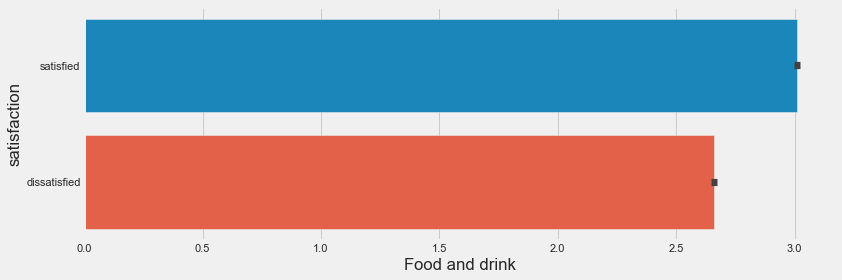

In [73]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'Food and drink', y= 'satisfaction', data=df_inflight);

### Multivariate Variable

Class


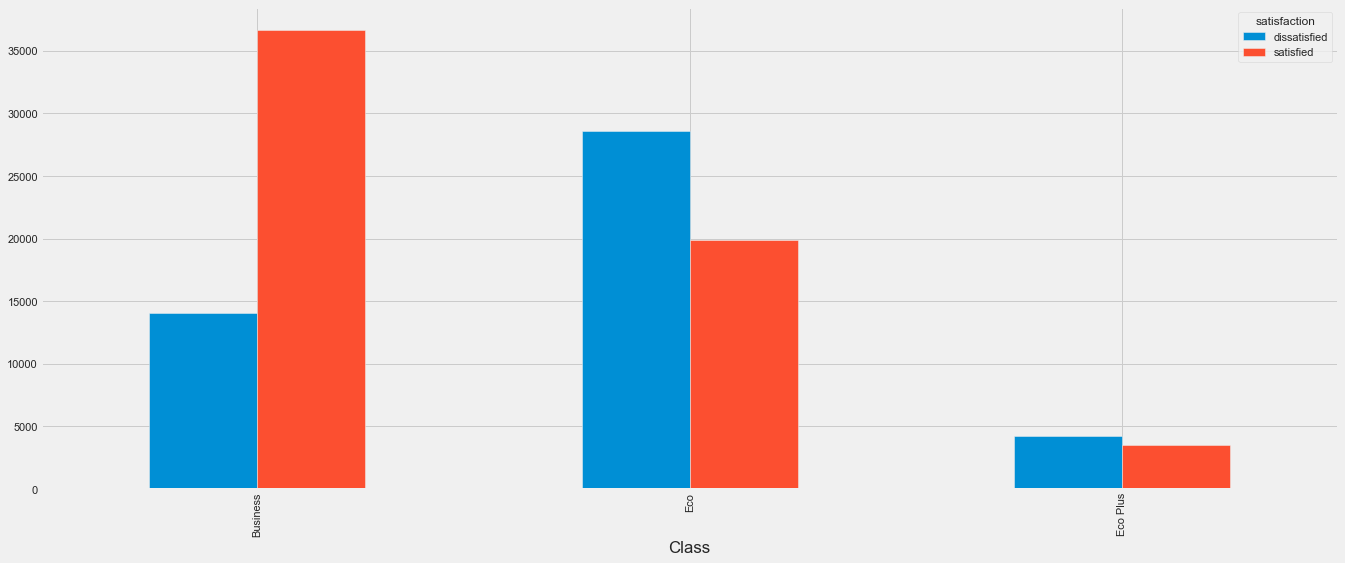

satisfaction


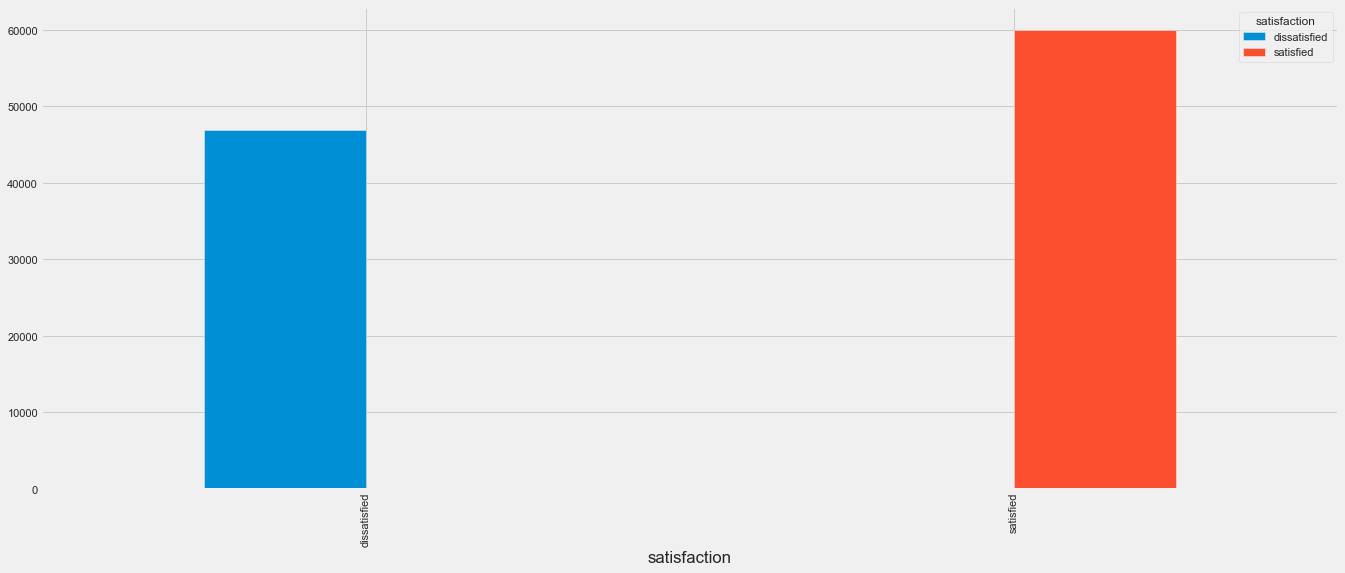

Inflight wifi service


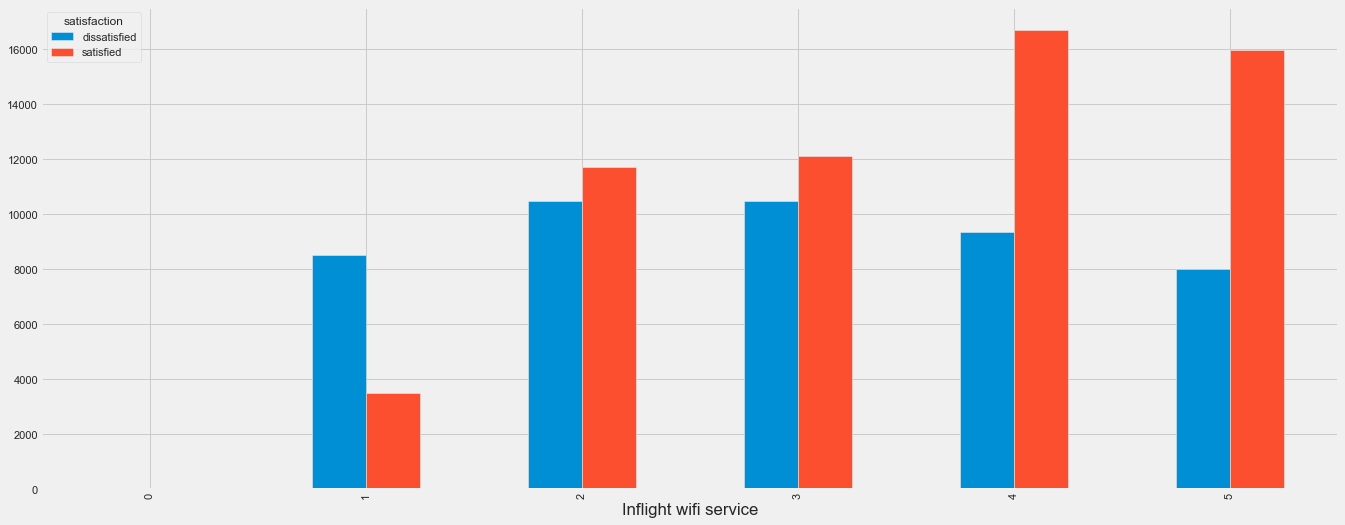

Inflight entertainment


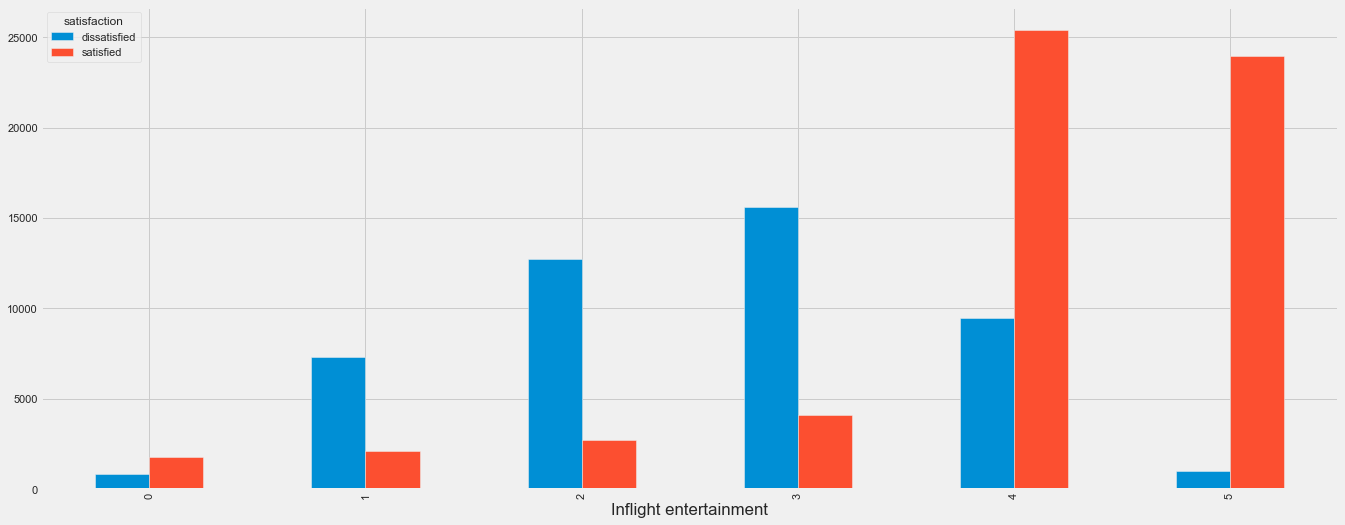

Seat comfort


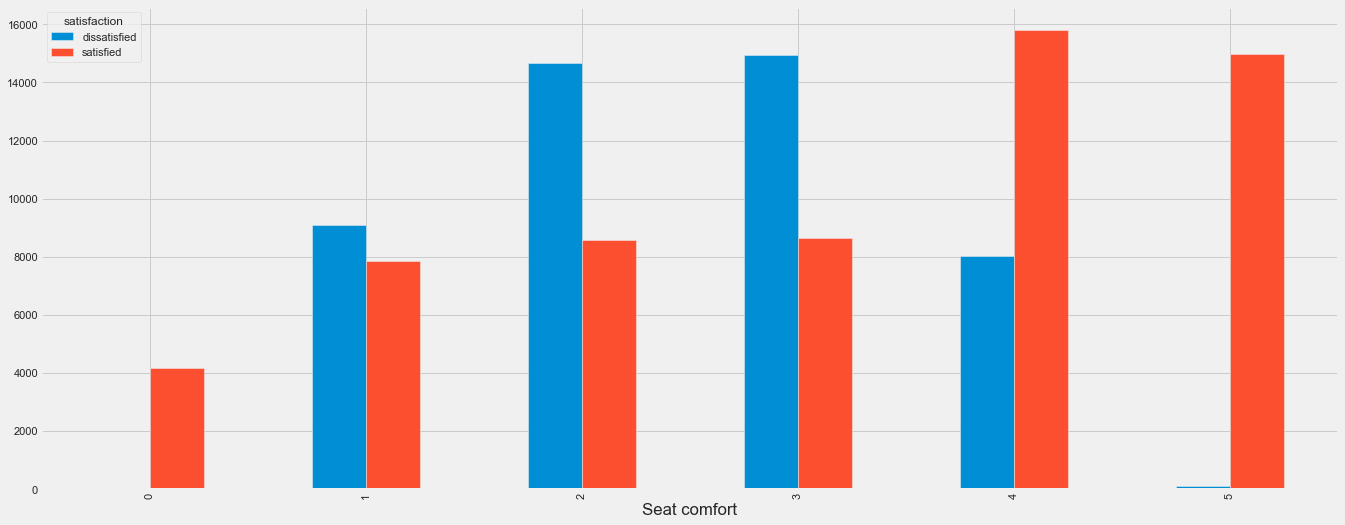

Food and drink


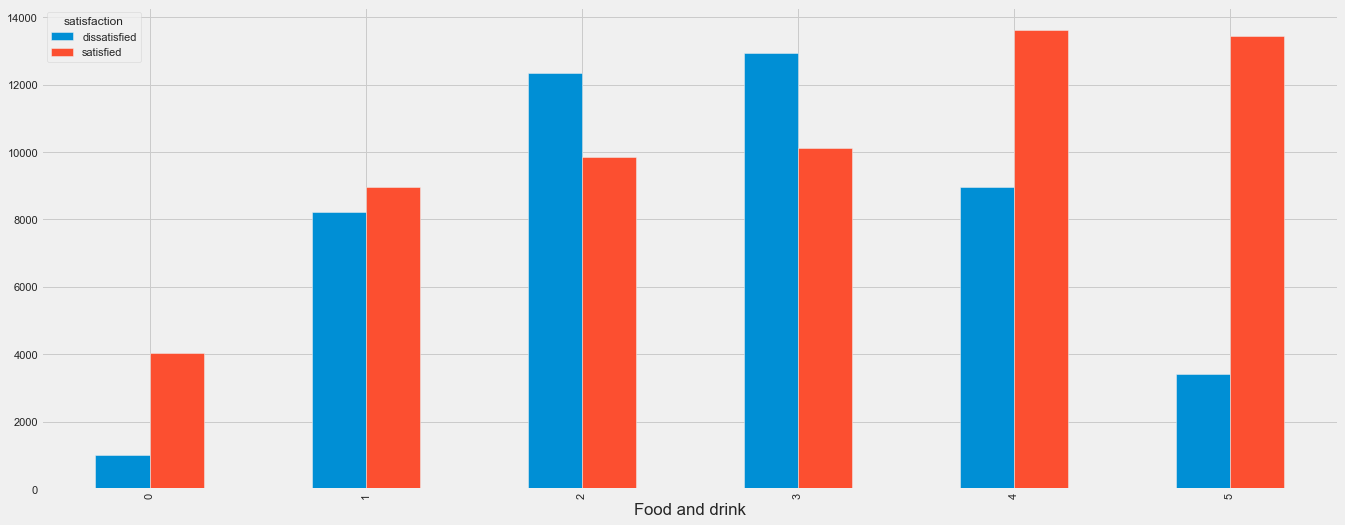

In [74]:
for i in df_inflight:
    print(i)
    df_inflight.groupby(i)['satisfaction'].value_counts().unstack().plot.bar()
    plt.show()

<AxesSubplot:>

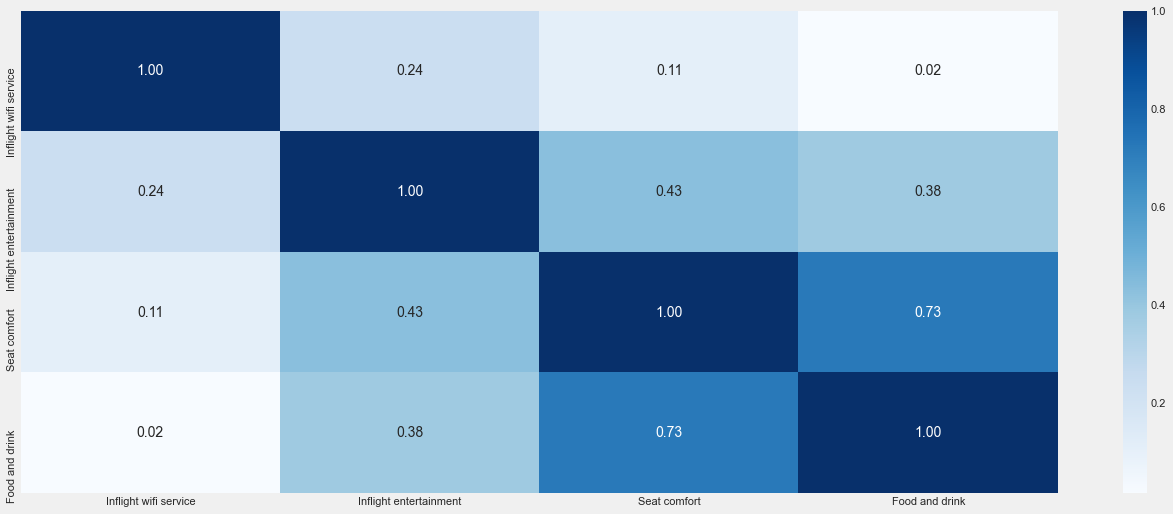

In [75]:
sns.heatmap(df_inflight.corr(), cmap='Blues', annot=True, fmt='.2f')

### Conclusion

Berdasarkan hasil yang sudah diteliti sebagian besar pelanggan yang menggunakan maskapai penerbangan pada class bisnis dan eco plus lebih banyak terpuaskan dalam dari pada mereka para pelanggan yang menggunakan class ekonomi, sebagian besar para pelanggan maskapai menggunakan penerbangan bisnis untuk melakukan perjalan bisnis, 
Terdapat beberapa data yang menunjukan adanya pelanggan yang tidak terpuaskan dalam beberapa fasilitas,  yaitu: Seat Comfort dan Food and drink,
Berdasarkan hasil yang telah diteliti tingkat kenyamanan dan kepuasan pelanggan juga tergantung pada jenis class penerbangan yang mereka gunnakan.

## Rheza Pahlevi

In [76]:
#kelompok variabel yang akan diteliti
cust = ['Gender', 'Customer Type', 'Type of Travel', 'Class' ,'satisfaction']
df_cust = df[cust]

In [77]:
df_cust.describe()

Gender   Customer Type   Type of Travel     Class satisfaction
count   106922          106922           106922    106922       106922
unique       2               2                2         3            2
top     Female  Loyal Customer  Business travel  Business    satisfied
freq     54330           87142            73282     50733        60050

In [78]:
df_cust['Age'] = df['Age']

In [79]:
df_cust[['Age']].describe()

Age
count  106922.000000
mean       39.686482
std        15.123326
min         7.000000
25%        27.000000
50%        40.000000
75%        51.000000
max        85.000000

In [80]:
df_cust

Gender      Customer Type   Type of Travel Class satisfaction  Age
0       Female     Loyal Customer  Personal Travel   Eco    satisfied   65
2       Female     Loyal Customer  Personal Travel   Eco    satisfied   15
3       Female     Loyal Customer  Personal Travel   Eco    satisfied   60
4       Female     Loyal Customer  Personal Travel   Eco    satisfied   70
5         Male     Loyal Customer  Personal Travel   Eco    satisfied   30
...        ...                ...              ...   ...          ...  ...
129869  Female  disloyal Customer  Personal Travel   Eco    satisfied   55
129871  Female  disloyal Customer  Personal Travel   Eco    satisfied   35
129872  Female  disloyal Customer  Personal Travel   Eco    satisfied   69
129874  Female  disloyal Customer  Personal Travel   Eco    satisfied   11
129875  Female  disloyal Customer  Personal Travel   Eco    satisfied   29

[106922 rows x 6 columns]

### Univariate Variable

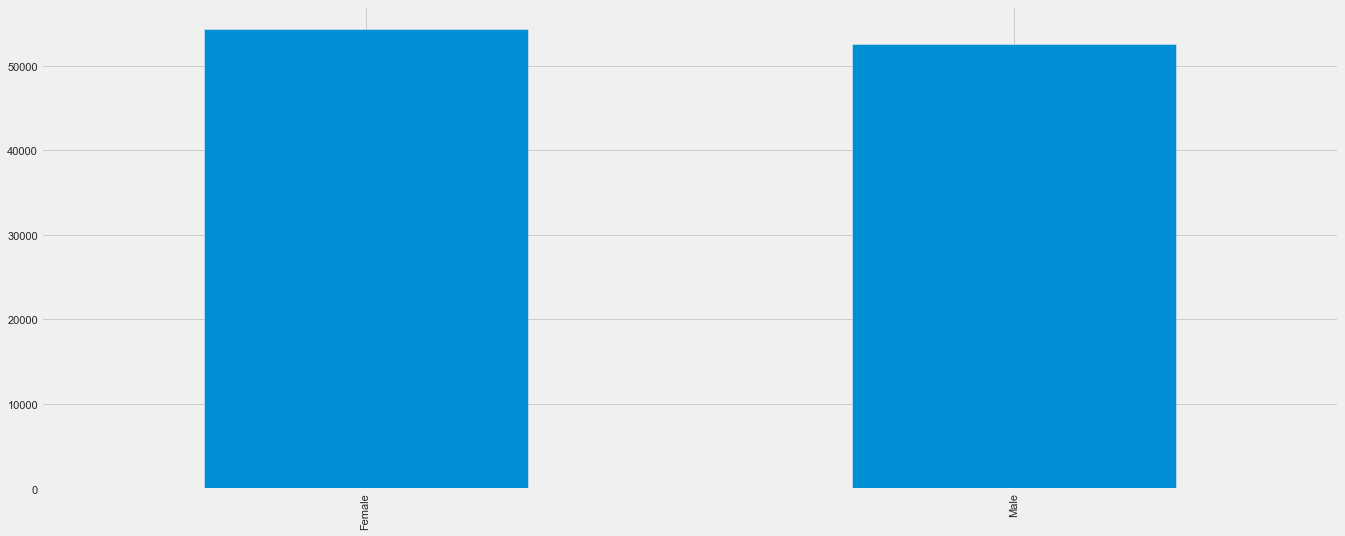

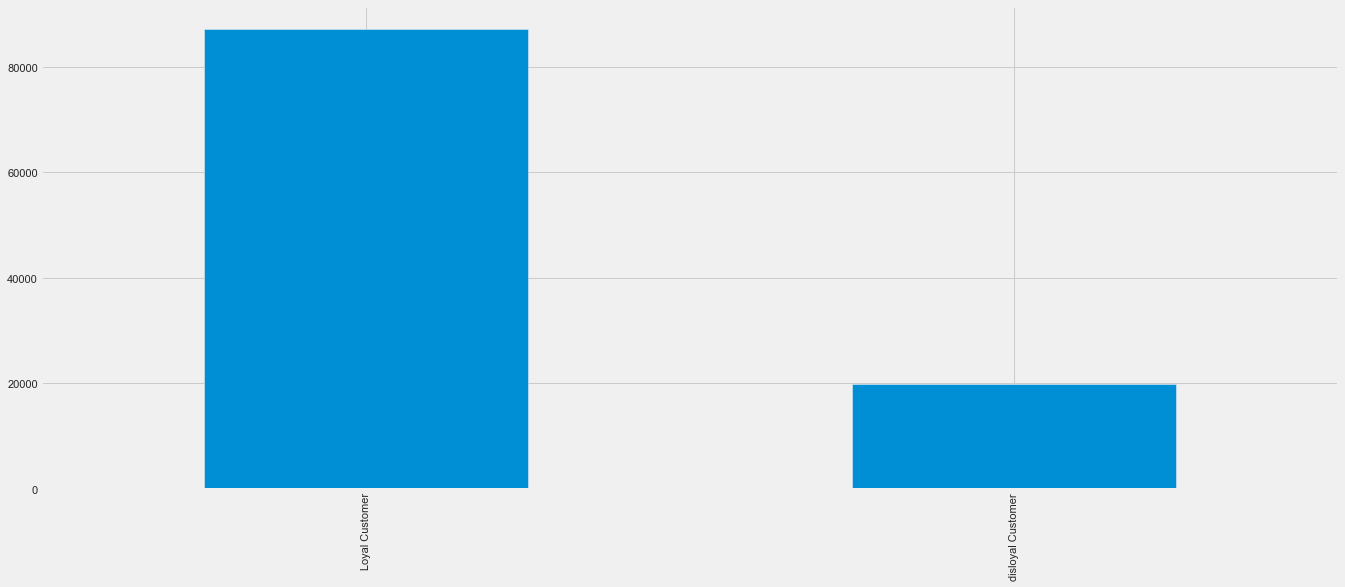

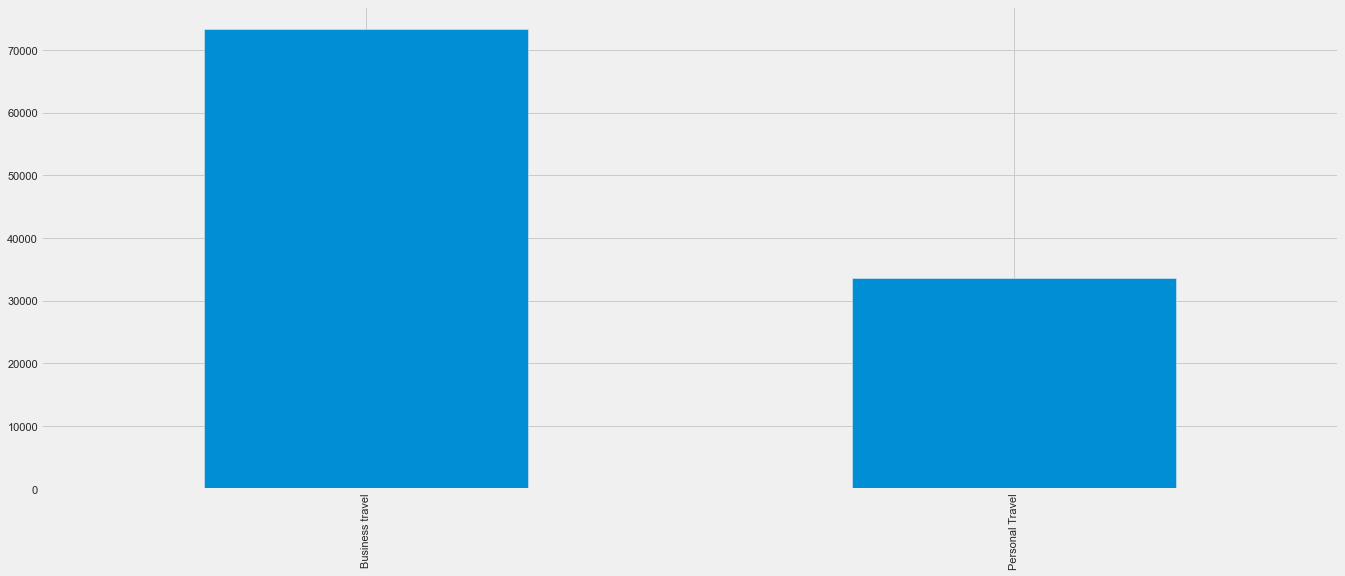

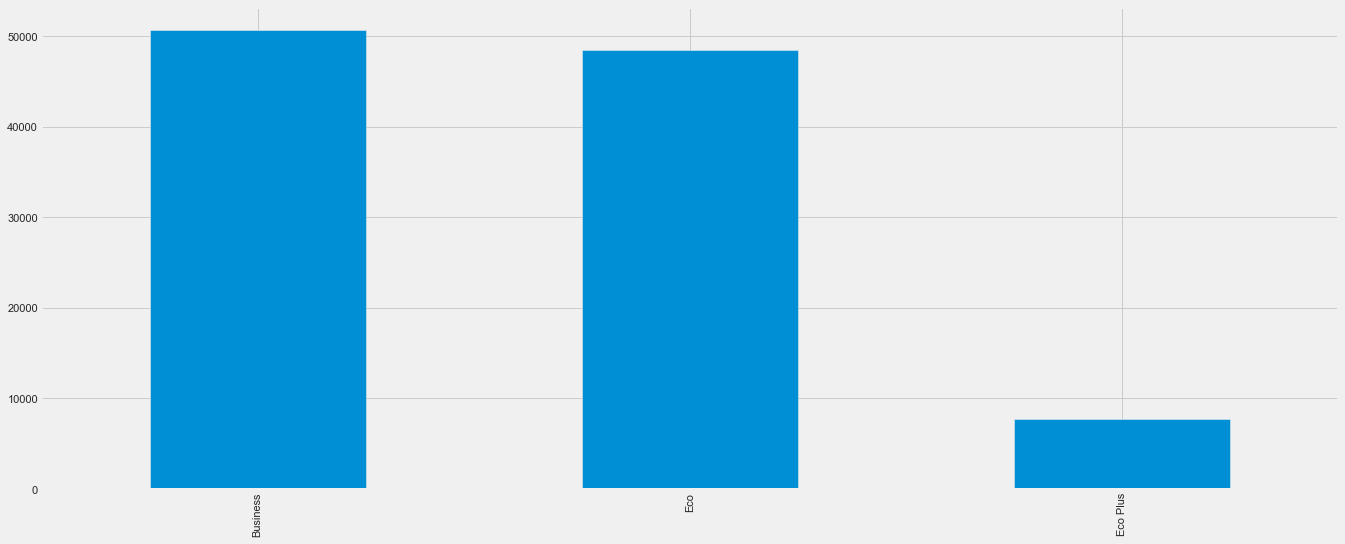

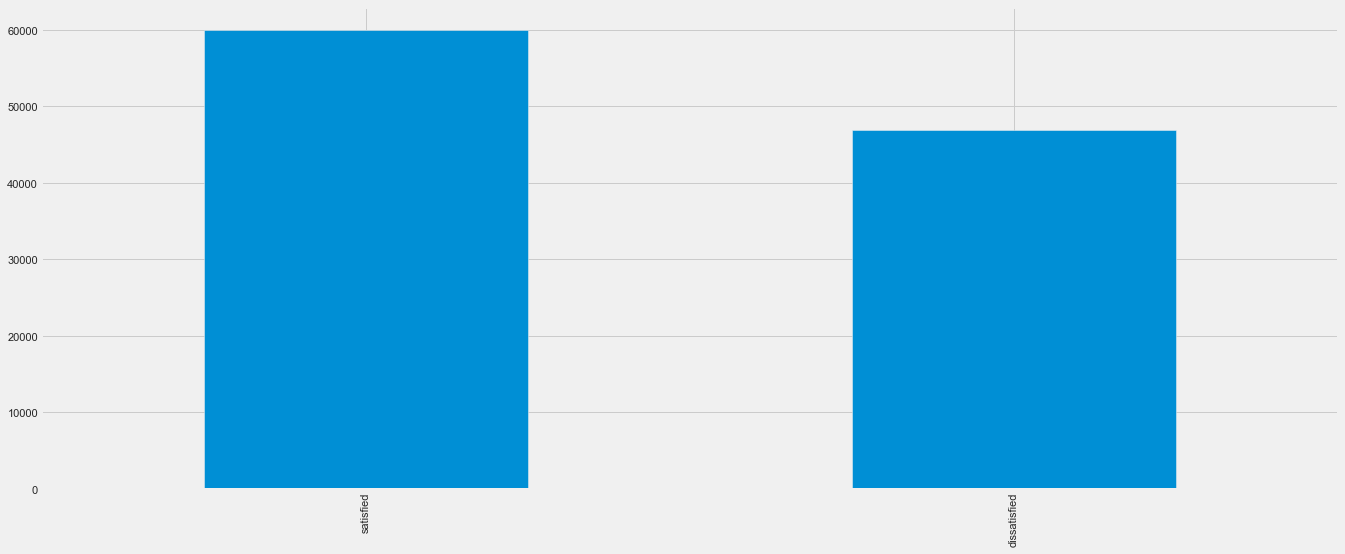

In [81]:
#plot distribusi single feature pada categorical variable
for i in cust:
    df_cust[i].value_counts().plot.bar()
    plt.show()

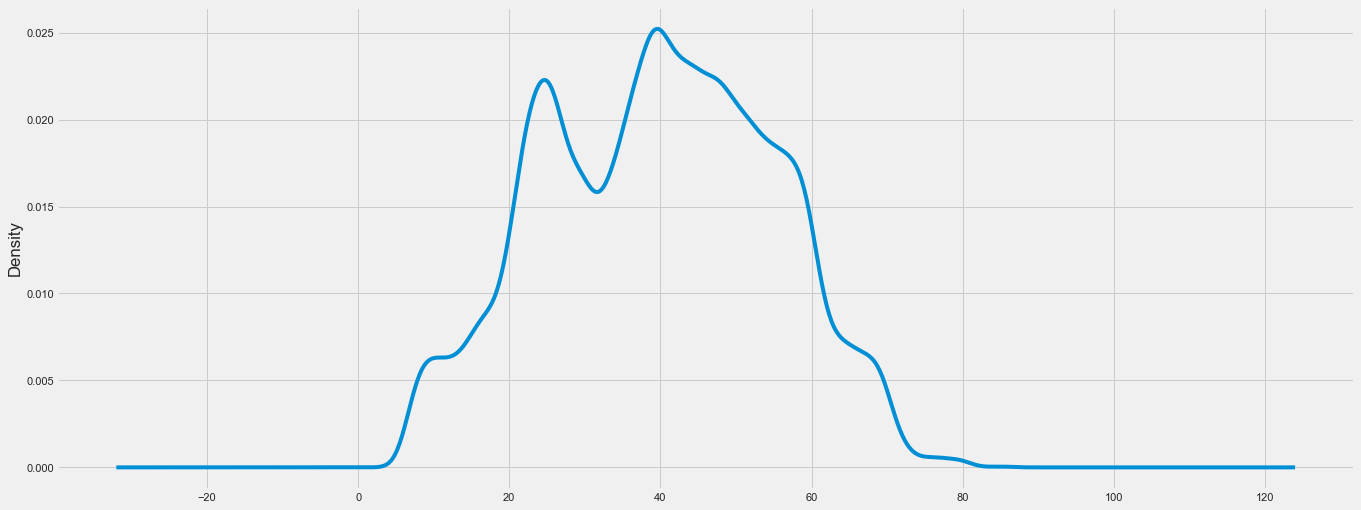

In [82]:
df_cust['Age'].plot.kde()
plt.show()

Gender


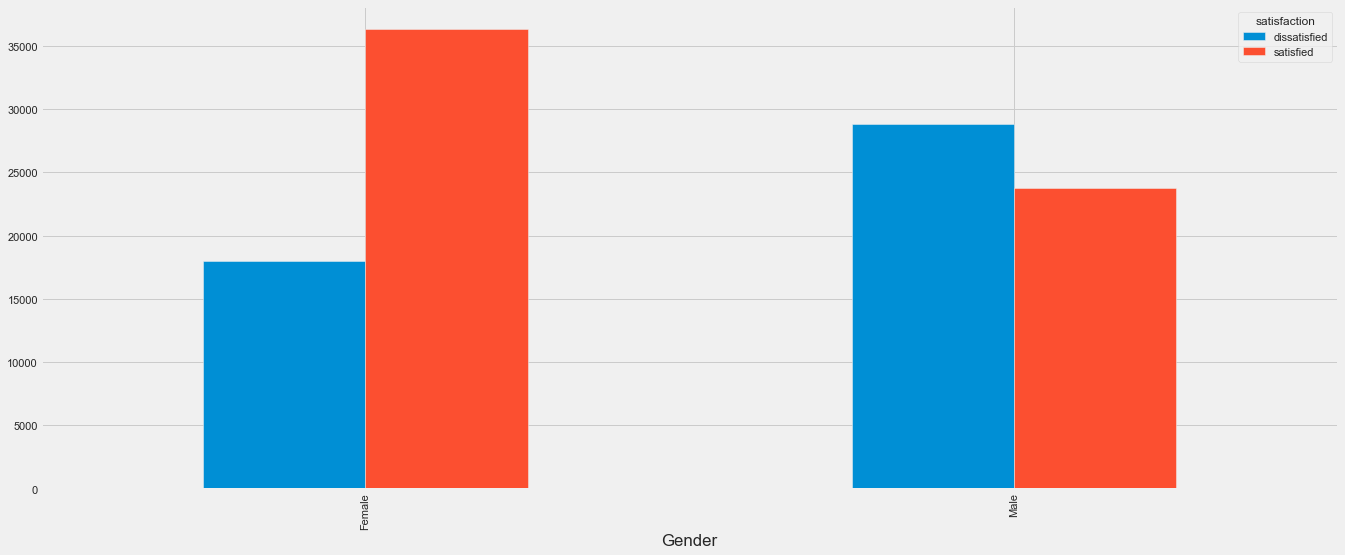

Customer Type


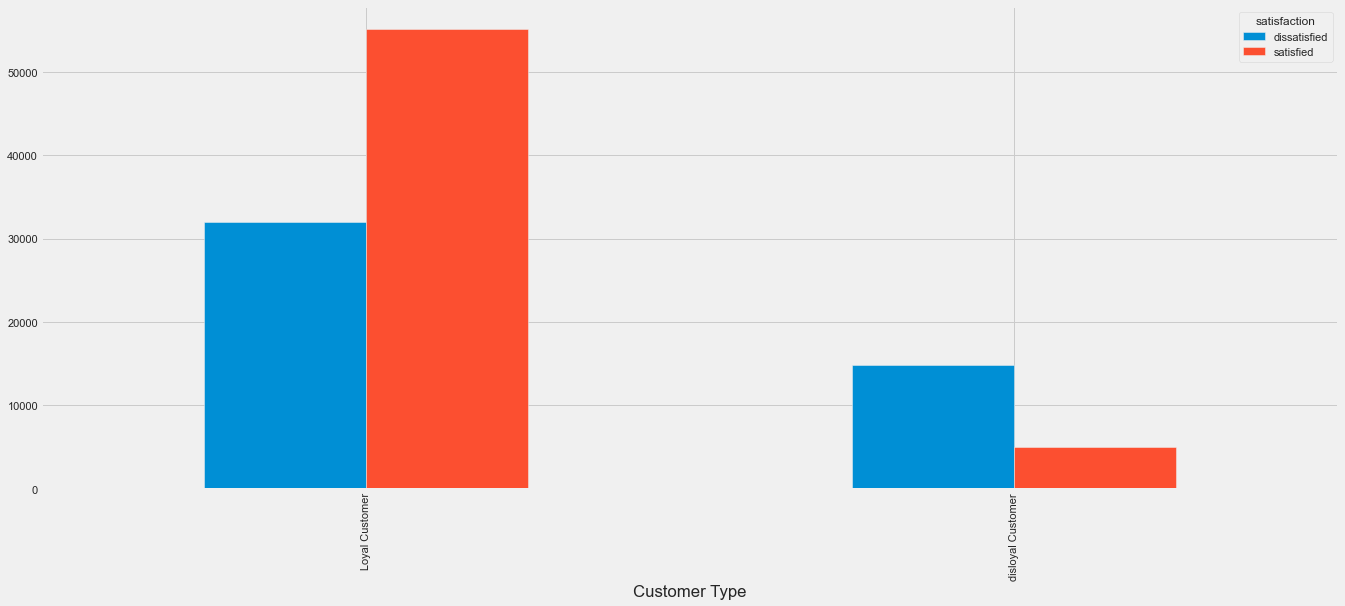

Type of Travel


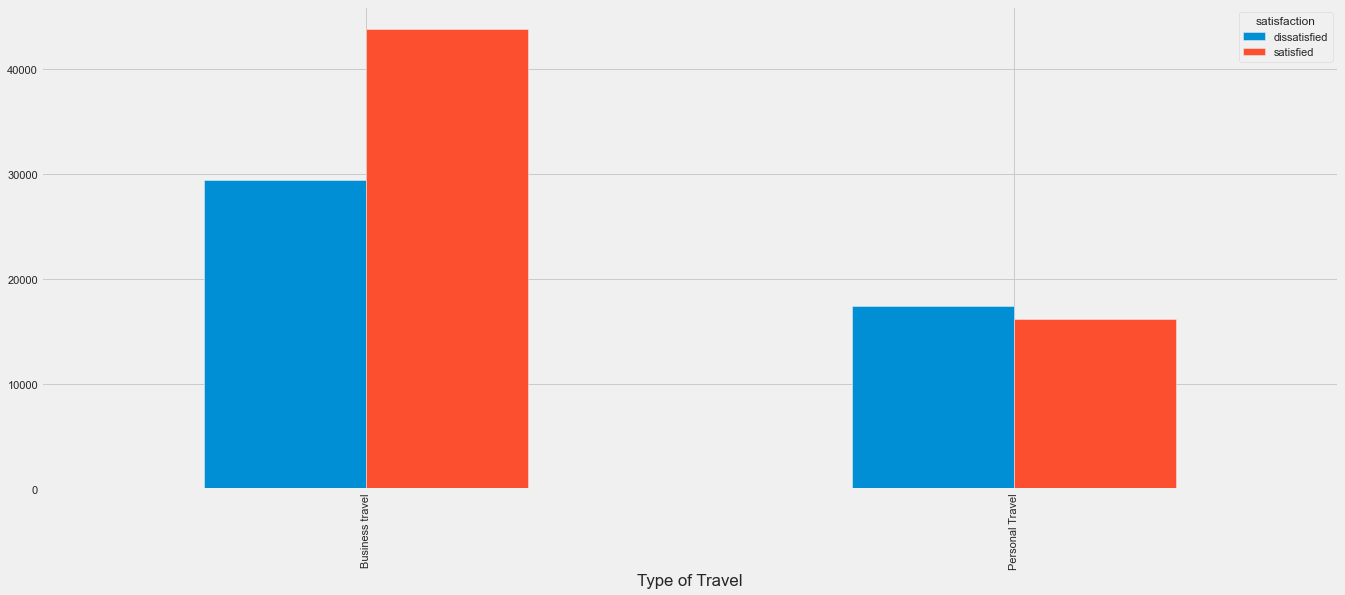

Class


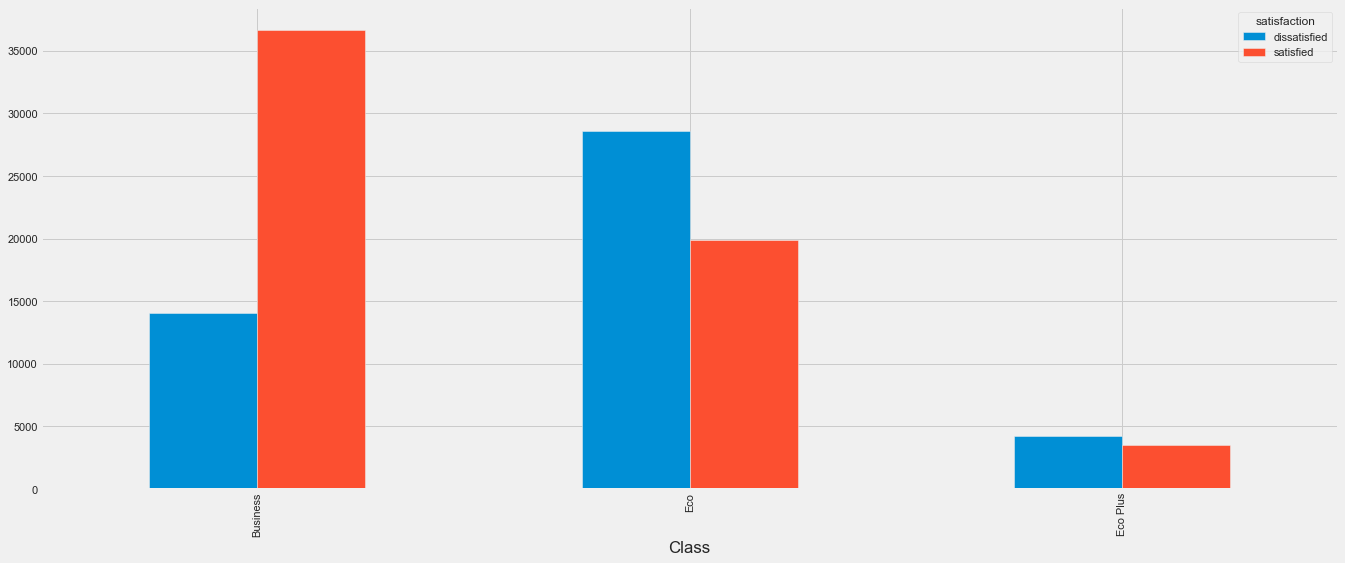

satisfaction


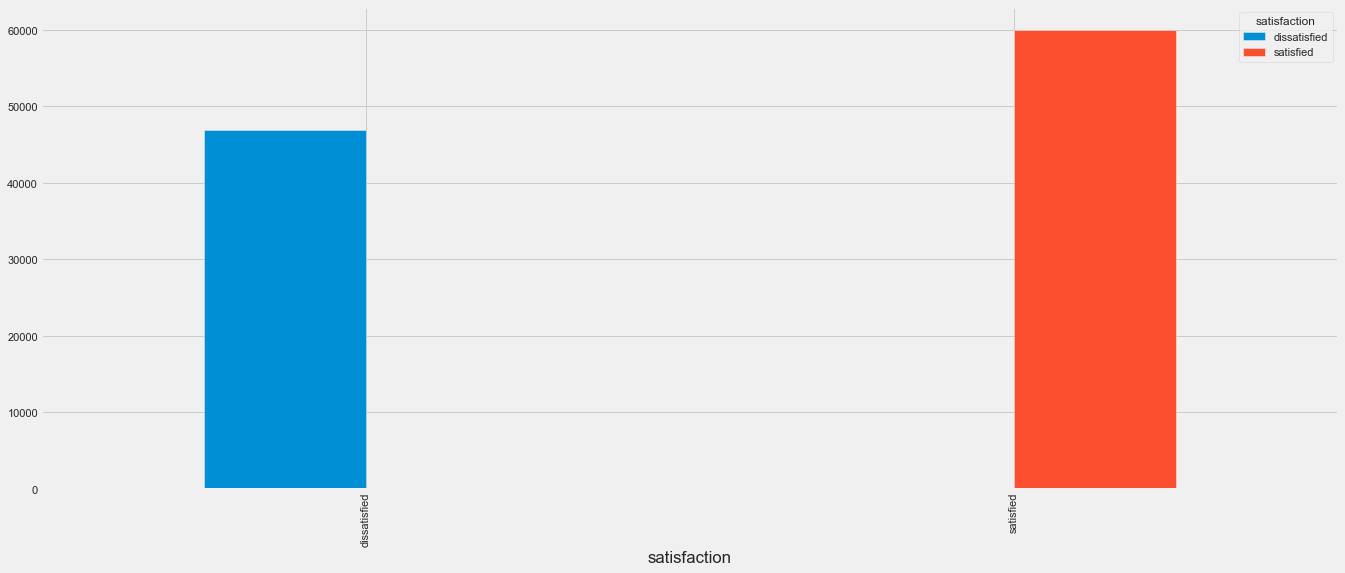

In [83]:
# mencari persentase kepuasan pelanggan dari kombinasi antar categorical variable
for i in cust:
    print(i)
    df_cust.groupby(i)['satisfaction'].value_counts().unstack().plot.bar()
    plt.show()

In [84]:
df_cust.groupby(i)['satisfaction'].value_counts()

satisfaction  satisfaction
dissatisfied  dissatisfied    46872
satisfied     satisfied       60050
Name: satisfaction, dtype: int64

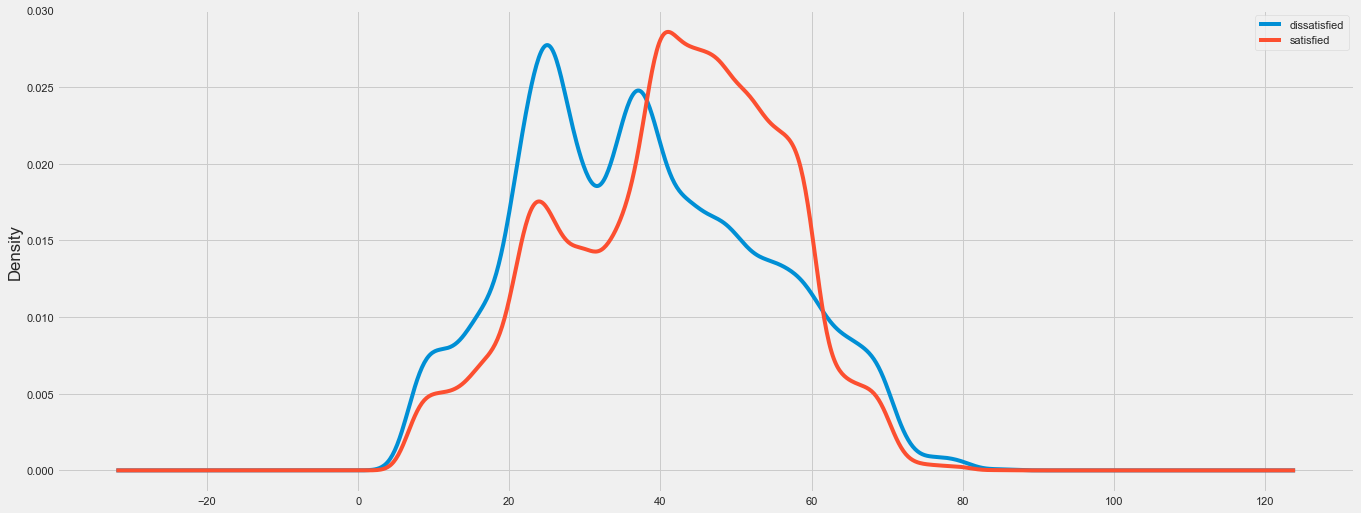

In [85]:
# mencari distribusi kepuasan pelanggan dari variabel Age
df_cust.groupby('satisfaction')['Age'].plot.kde()
plt.legend()
plt.show()

### Multivariate Variable

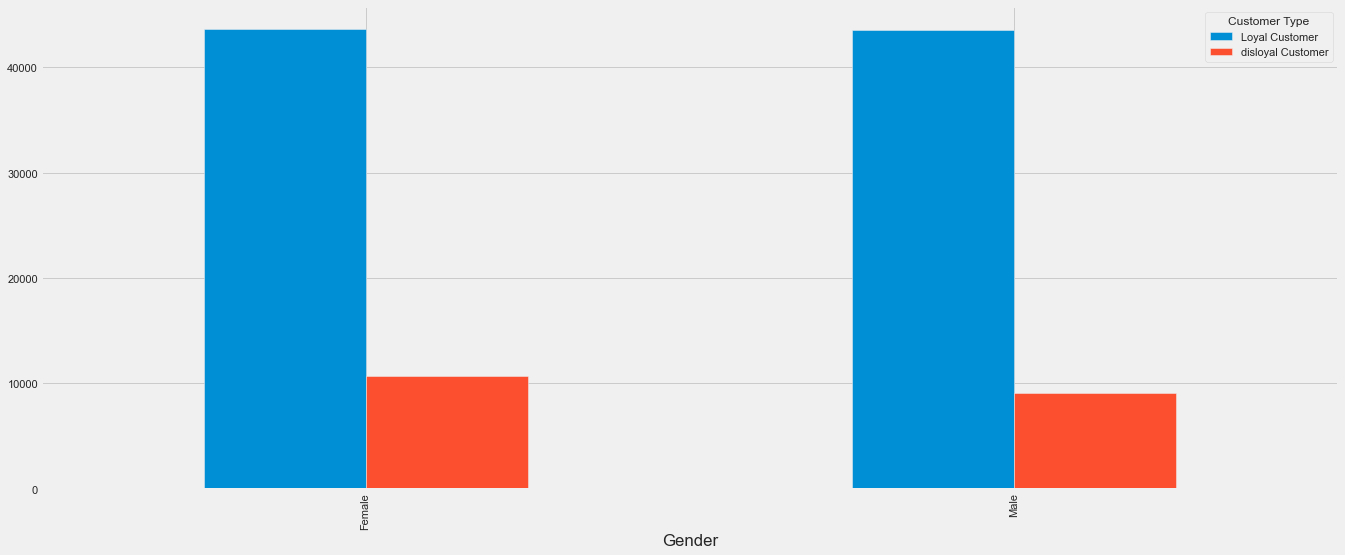

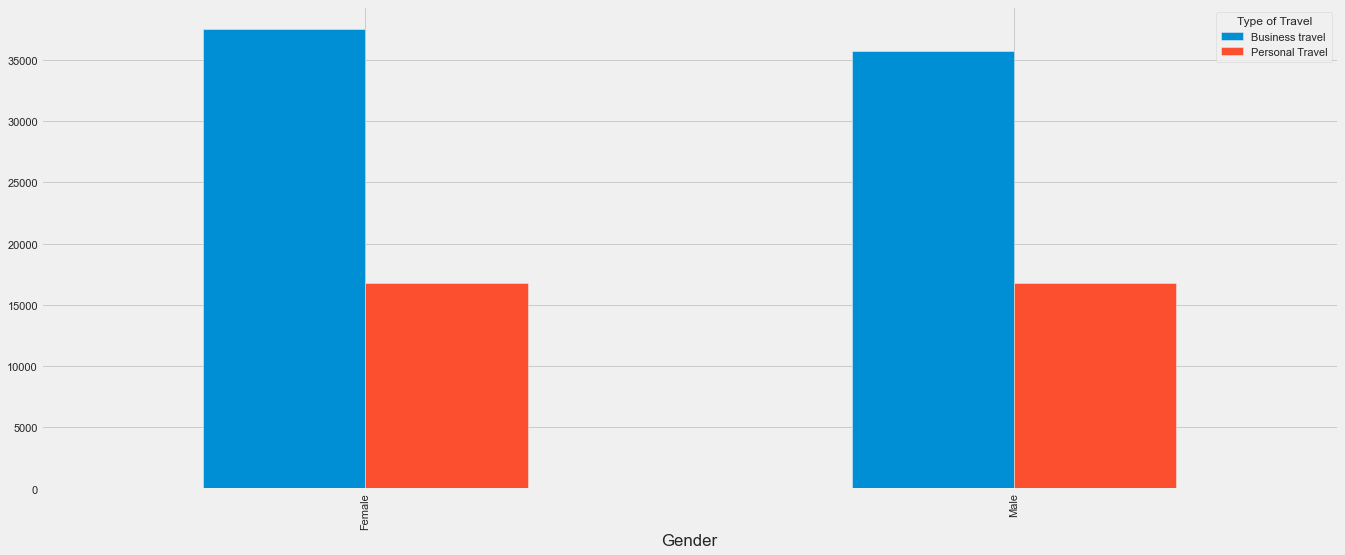

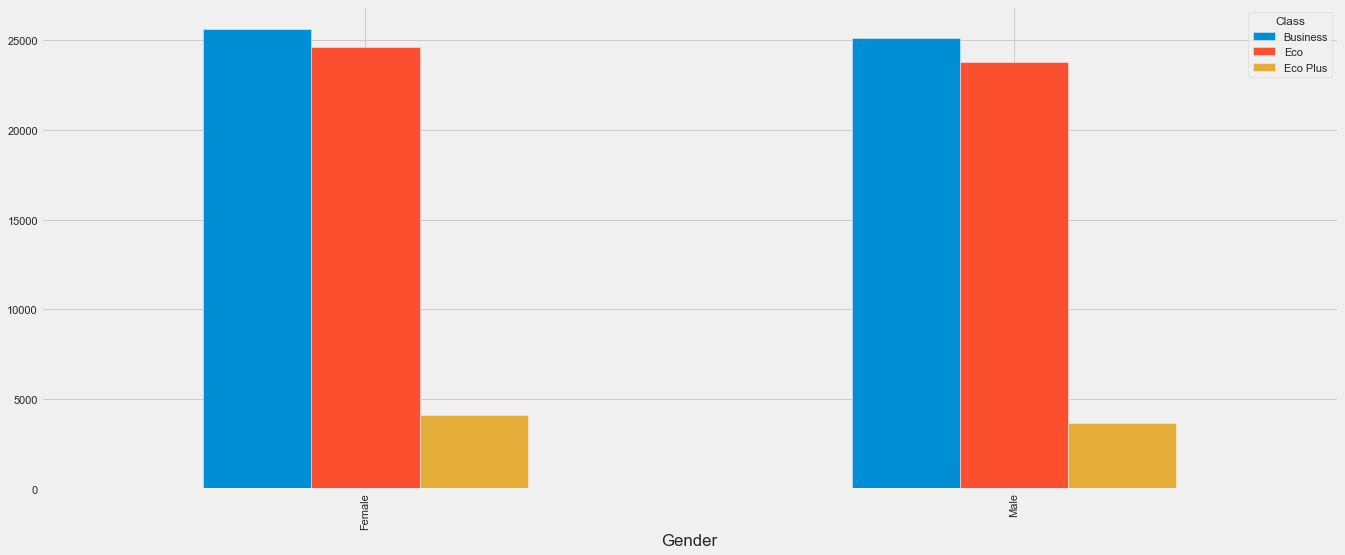

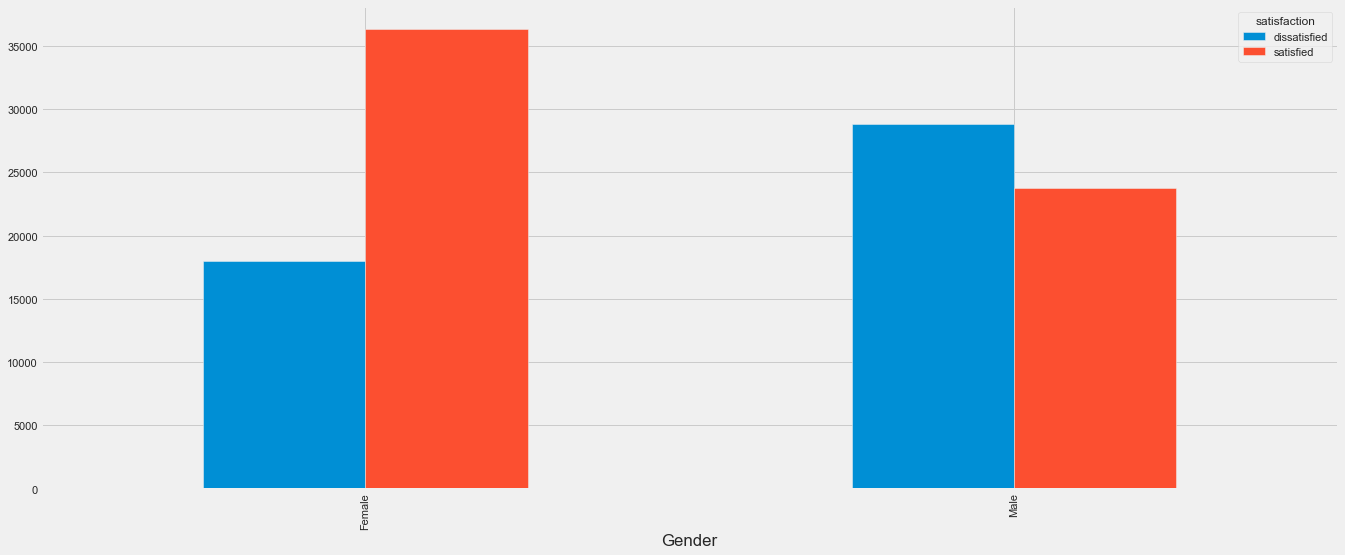

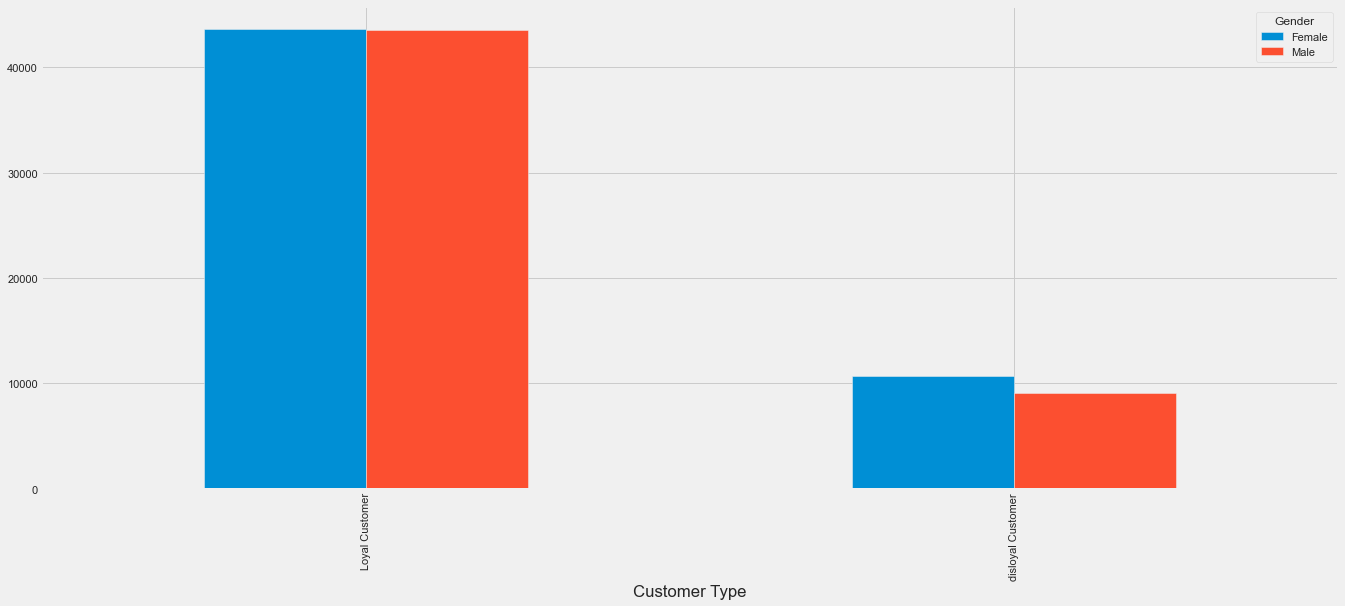

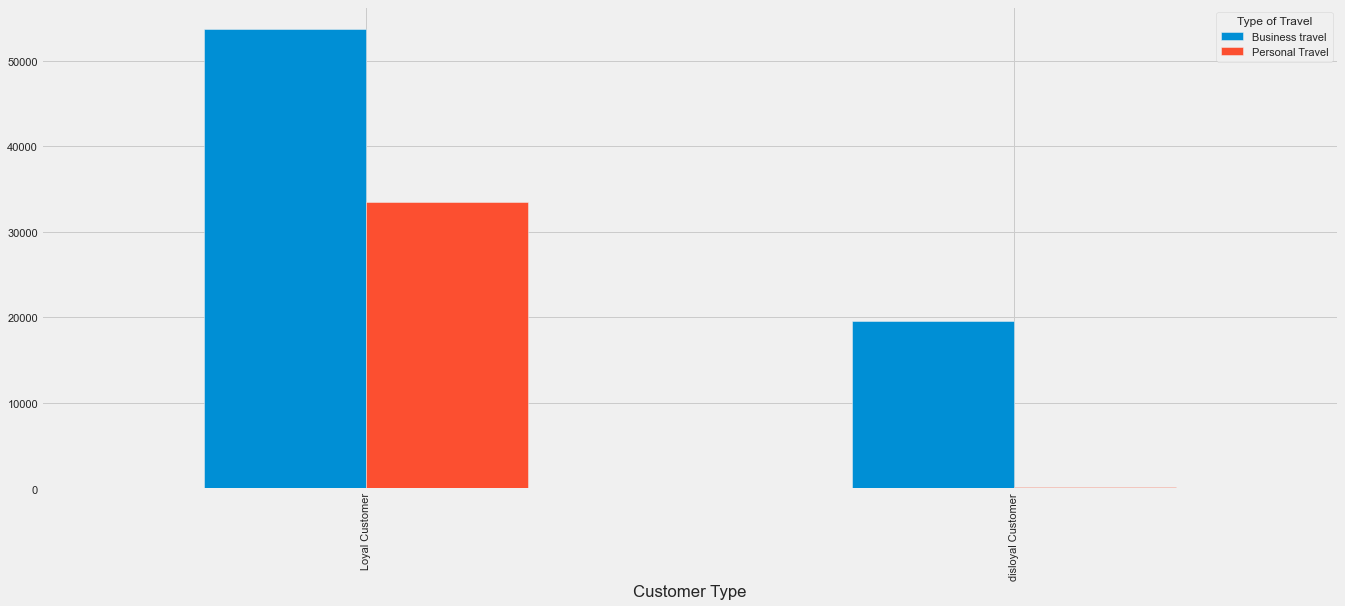

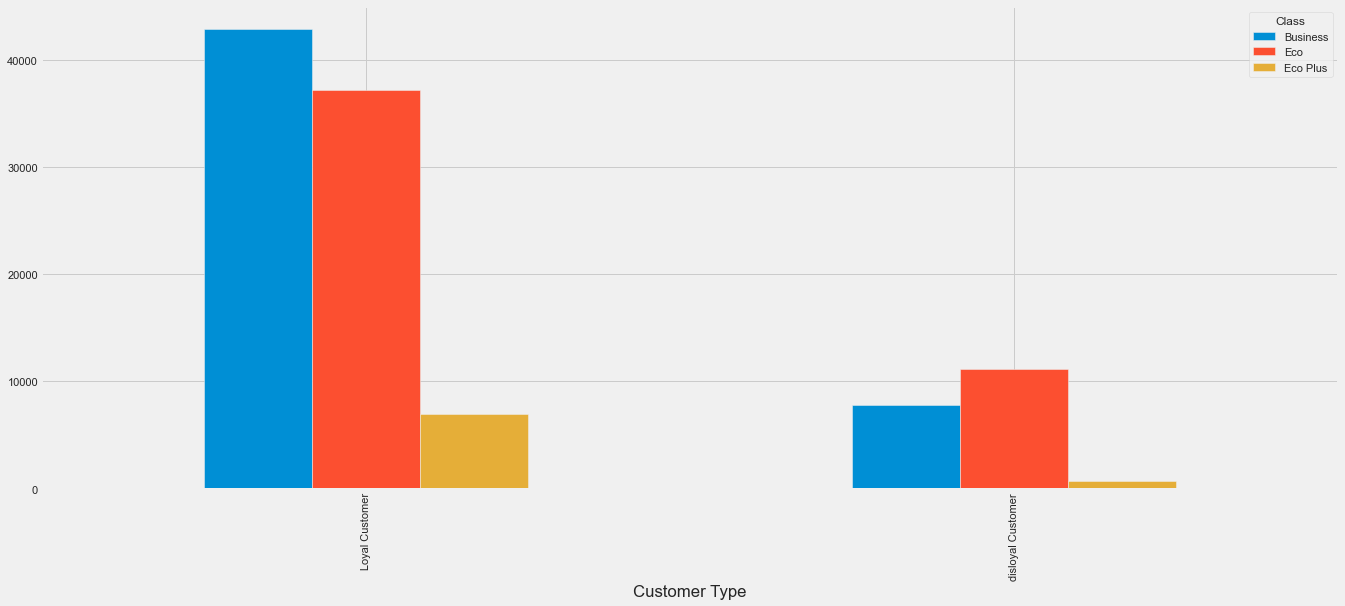

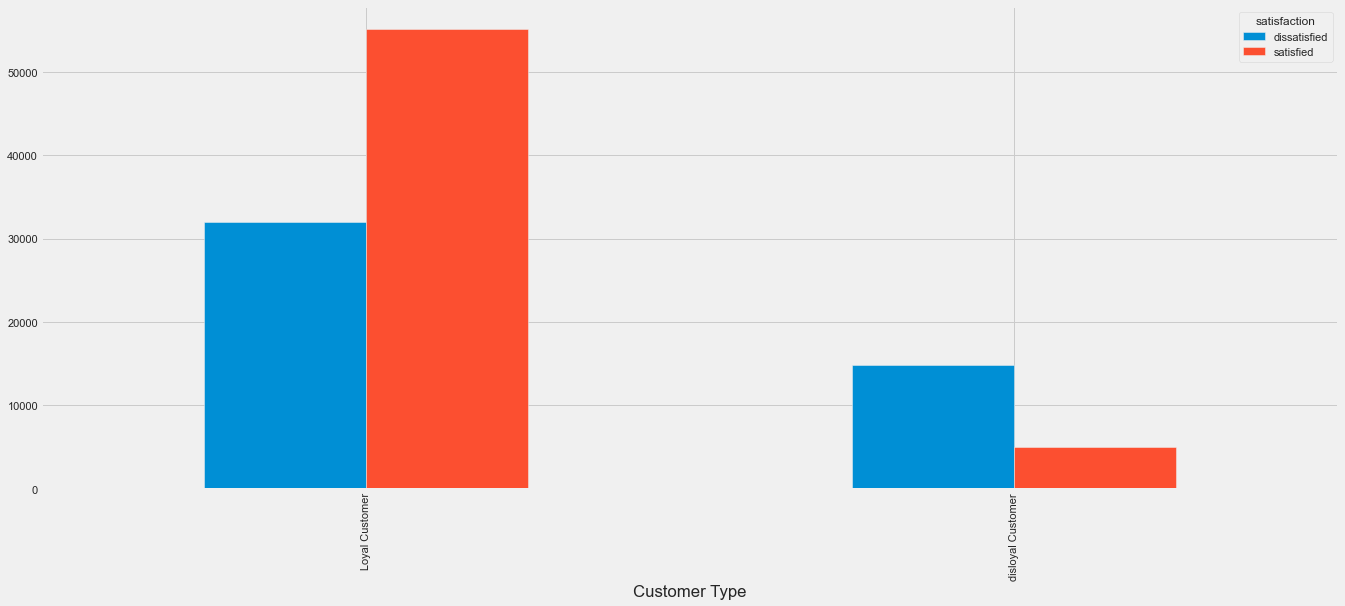

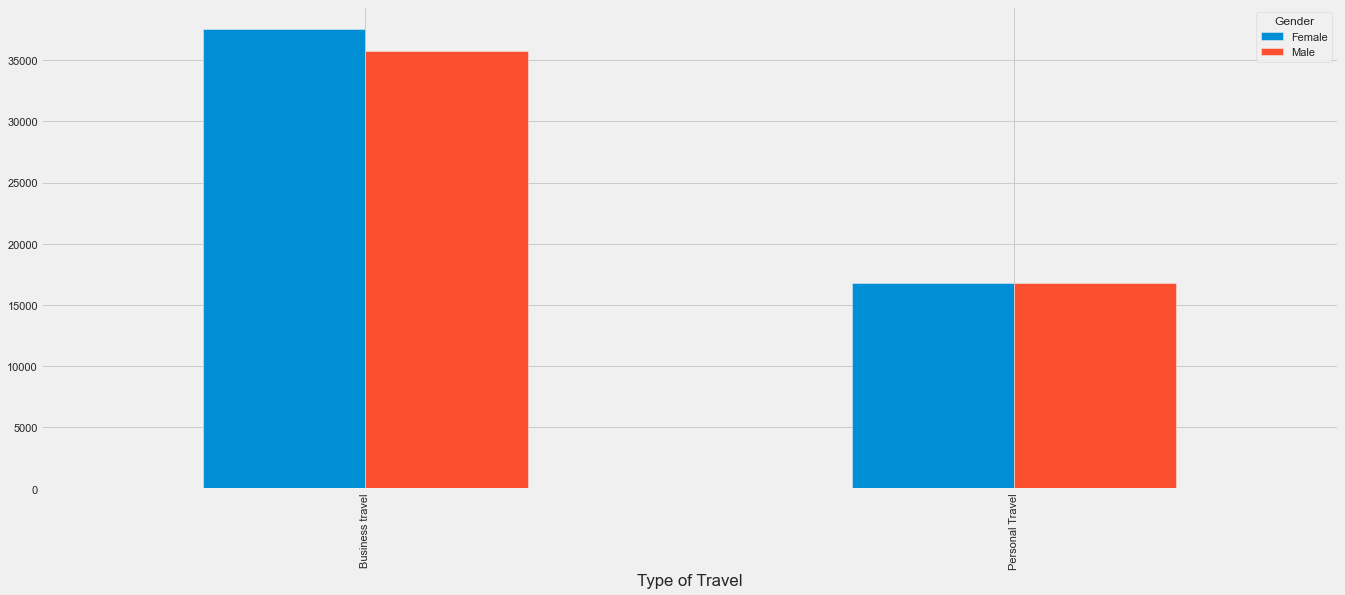

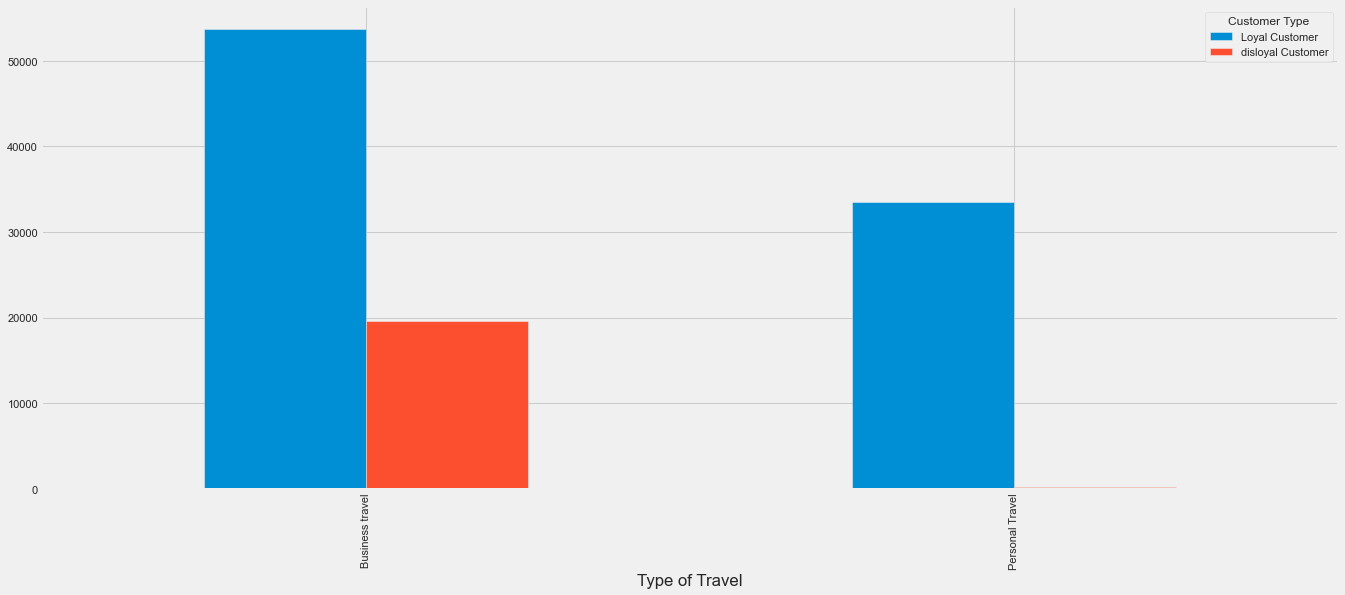

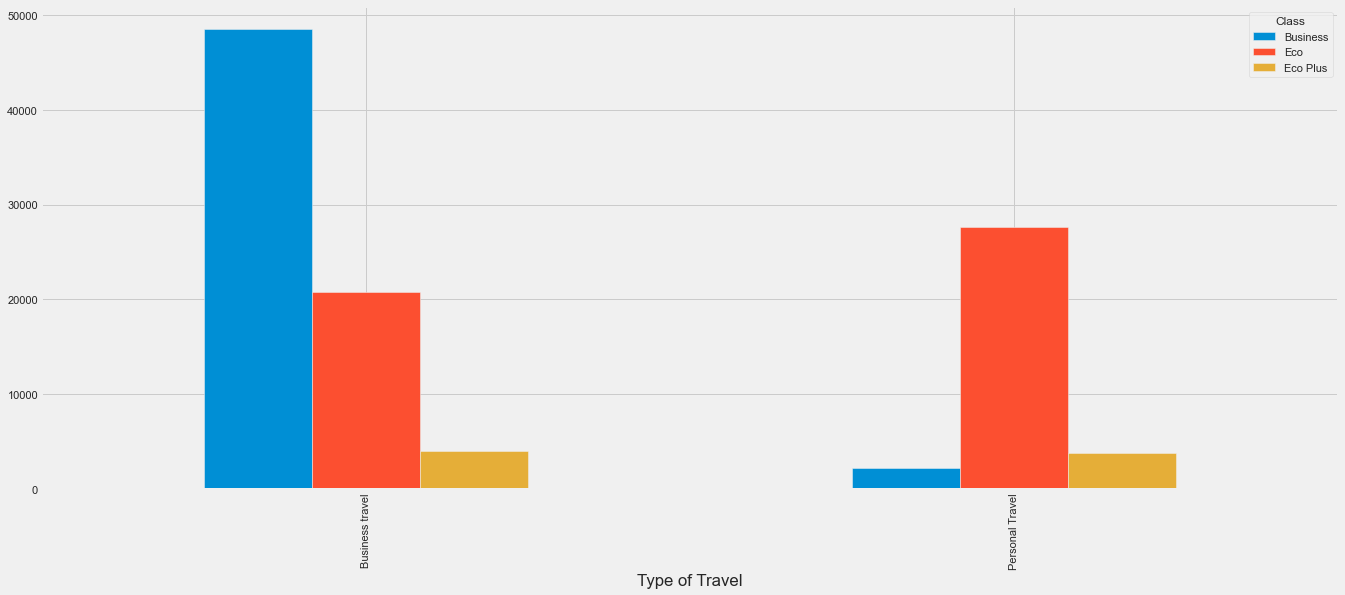

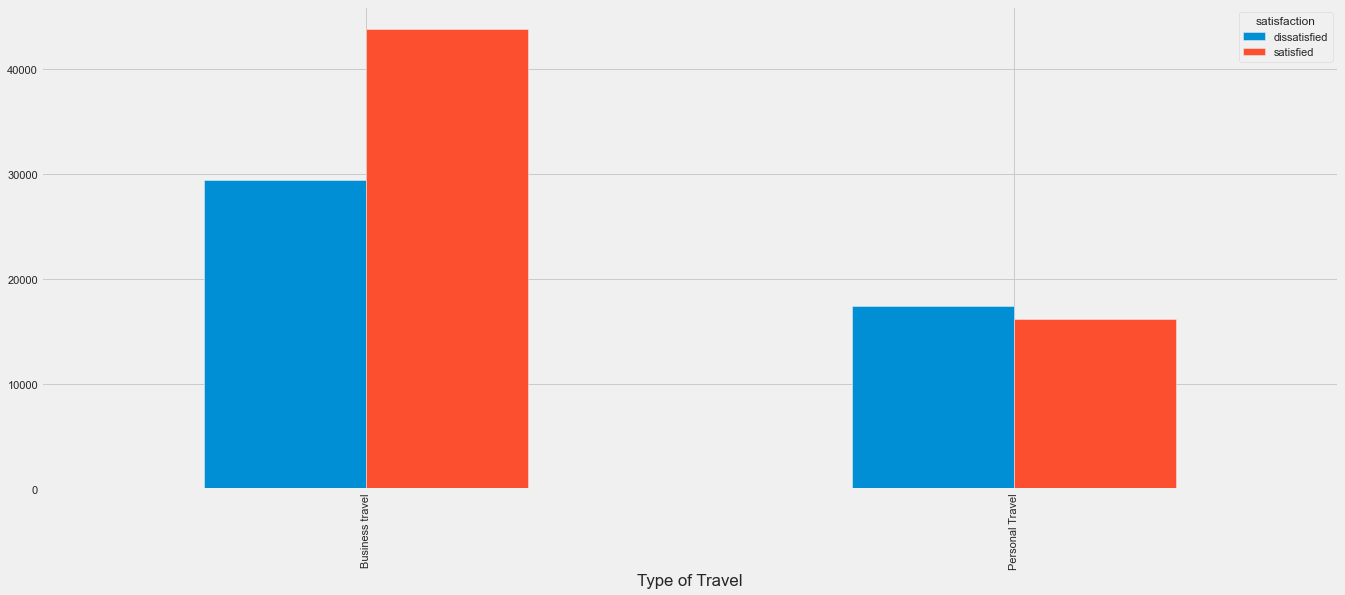

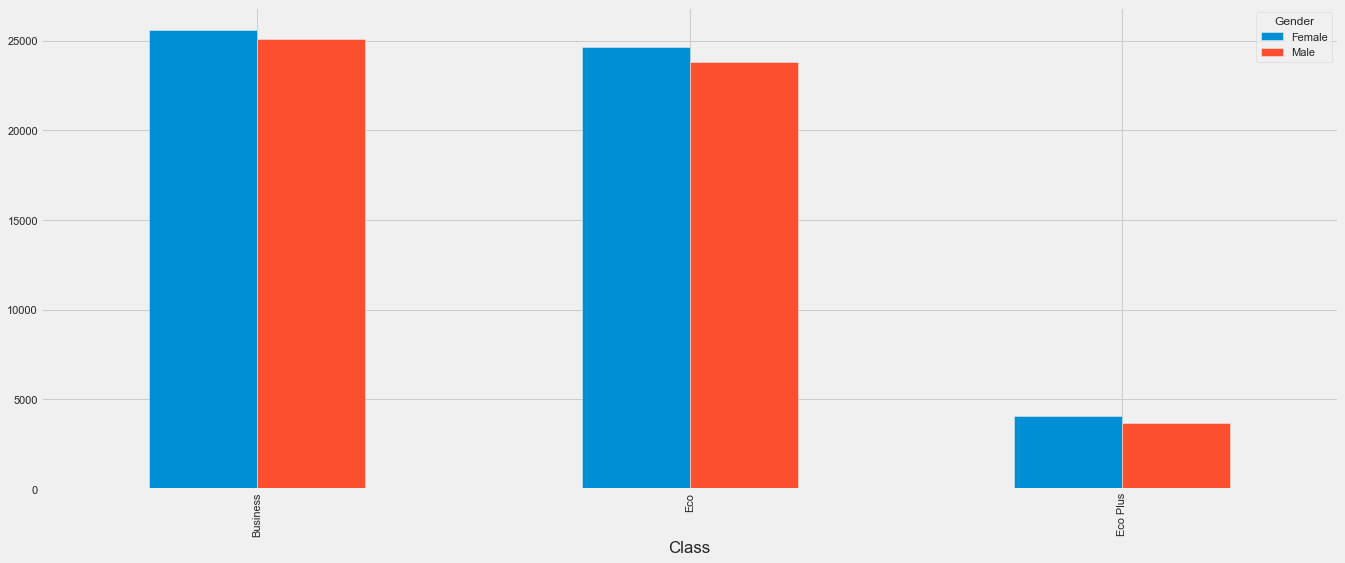

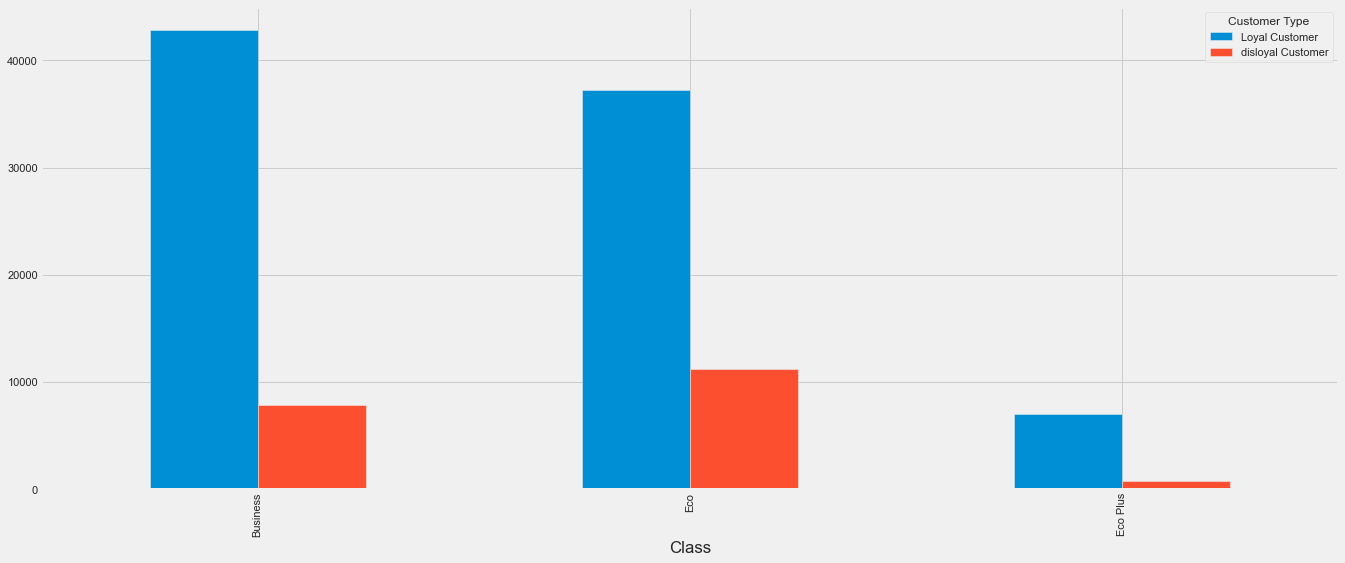

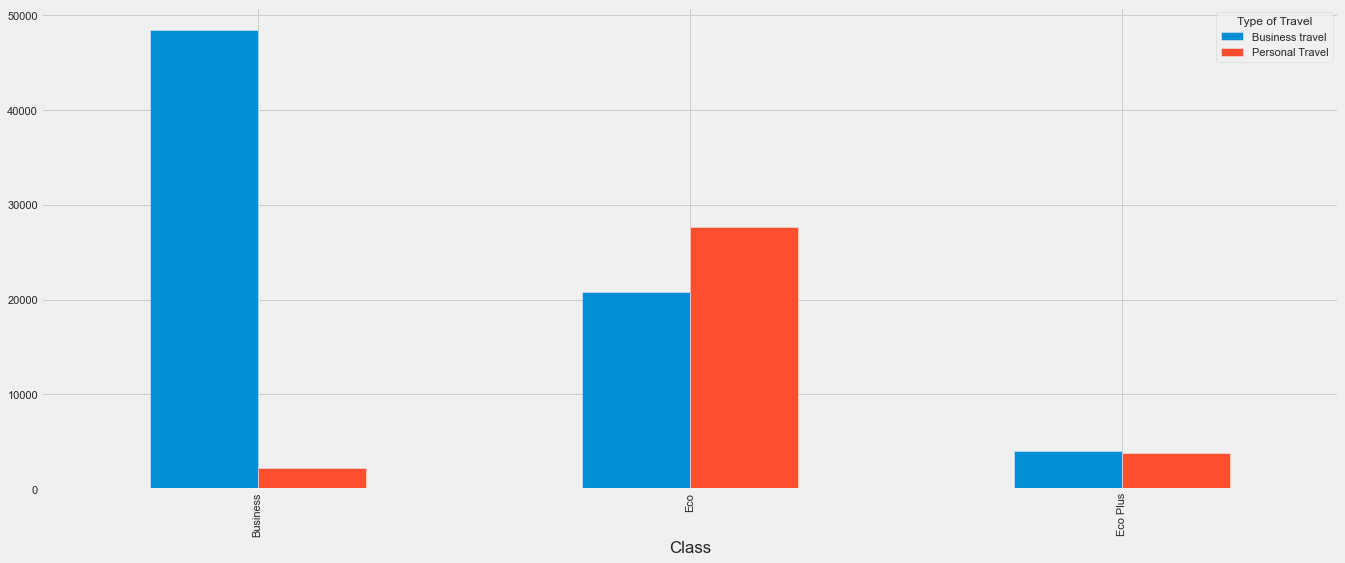

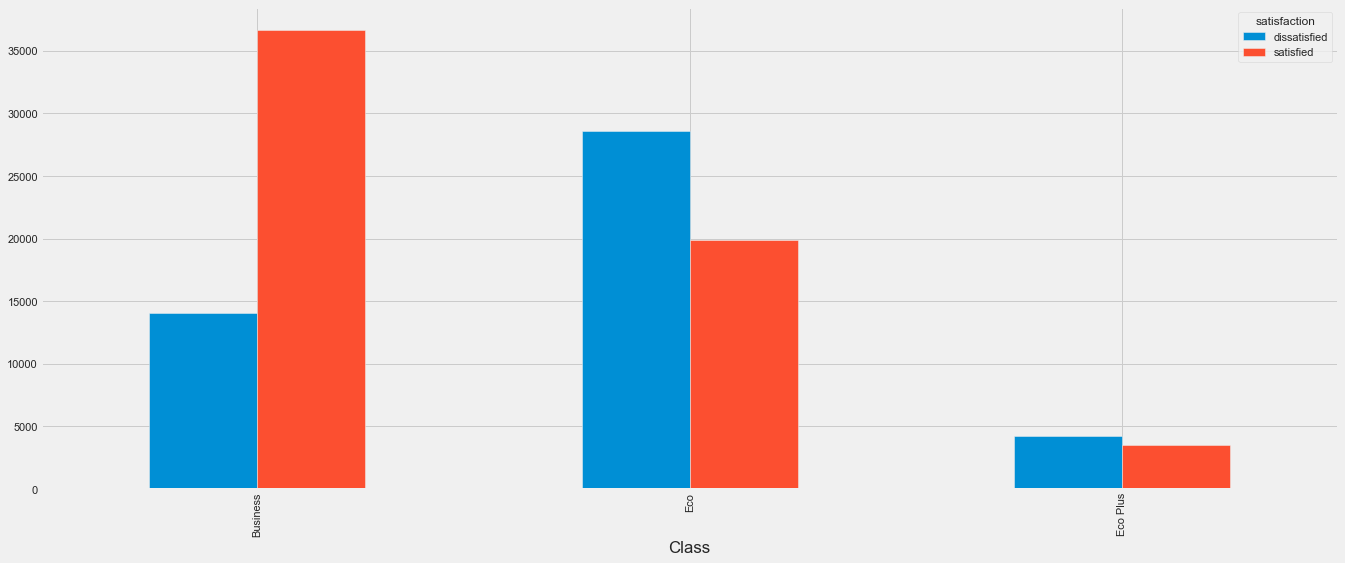

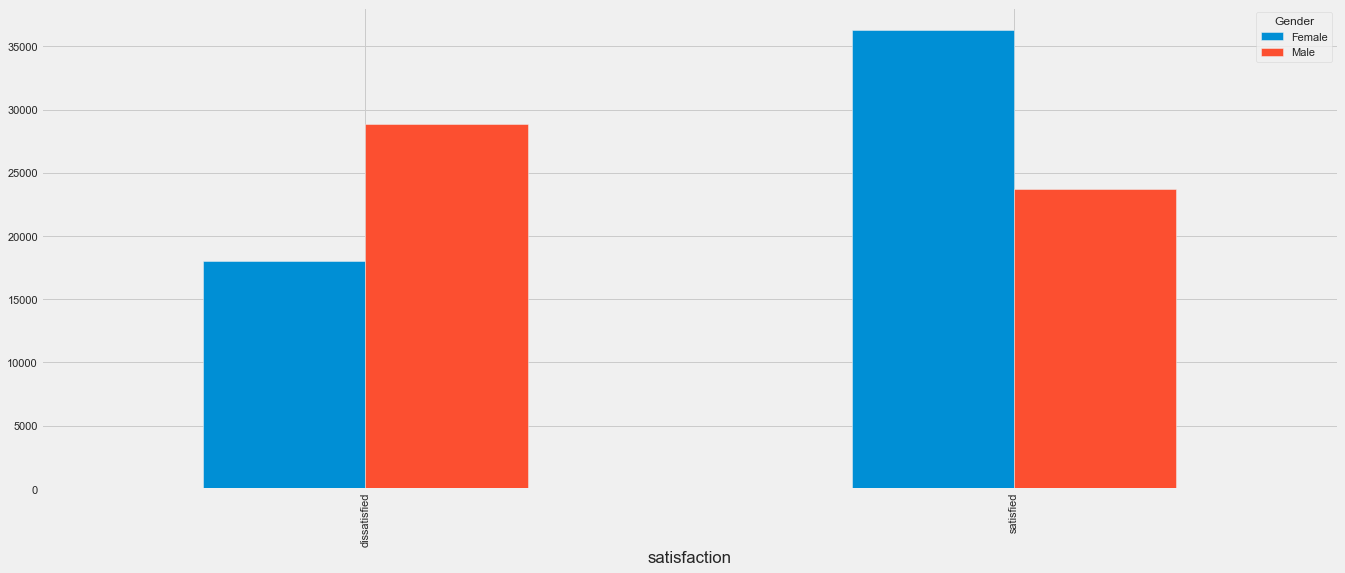

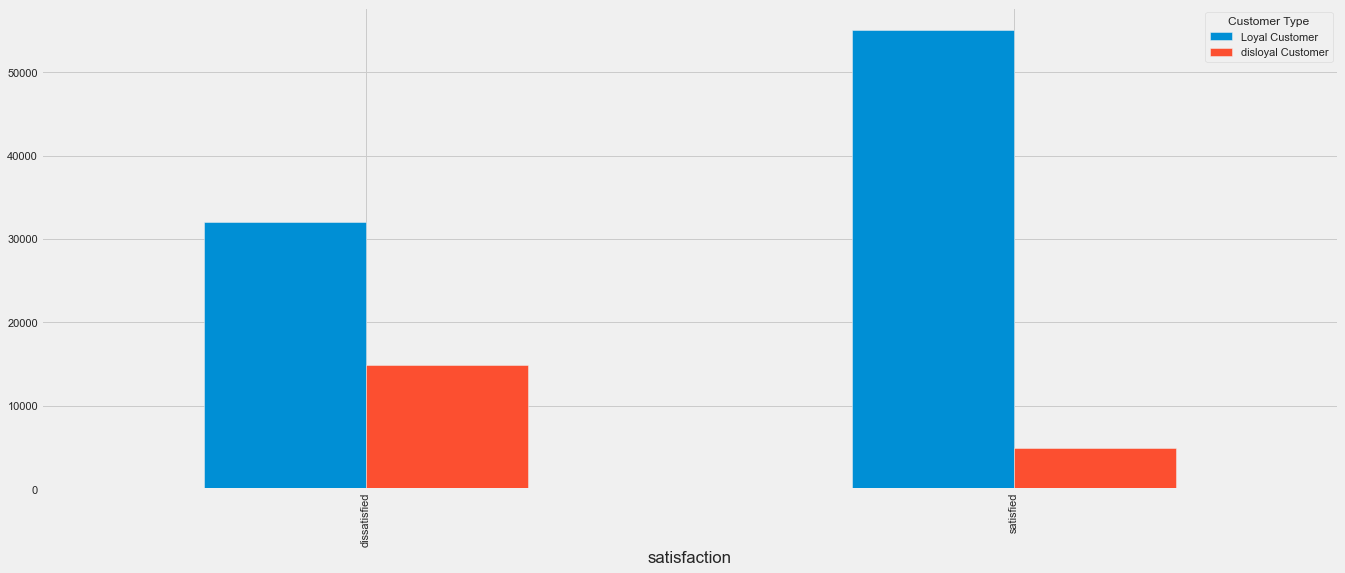

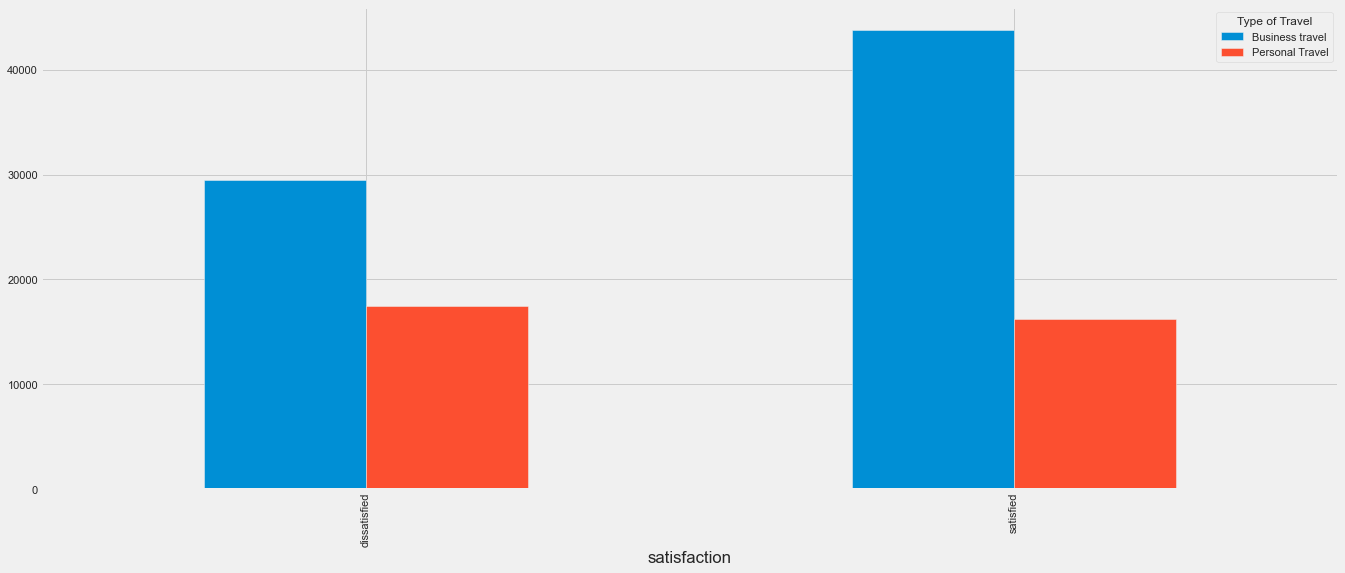

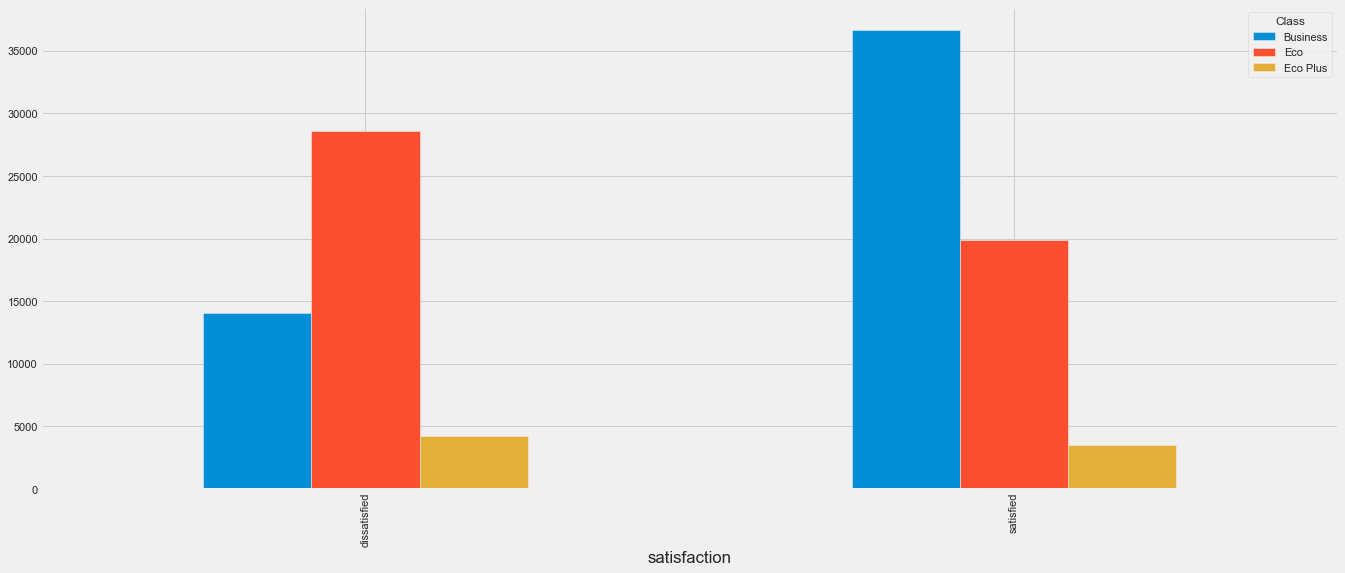

In [86]:
#plot distribusi kombinasi antar variabel
for var1 in cust:
    for var2 in cust:
        if (var1!=var2):
            df_cust.groupby(var1)[var2].value_counts().unstack().plot.bar()
            plt.show()

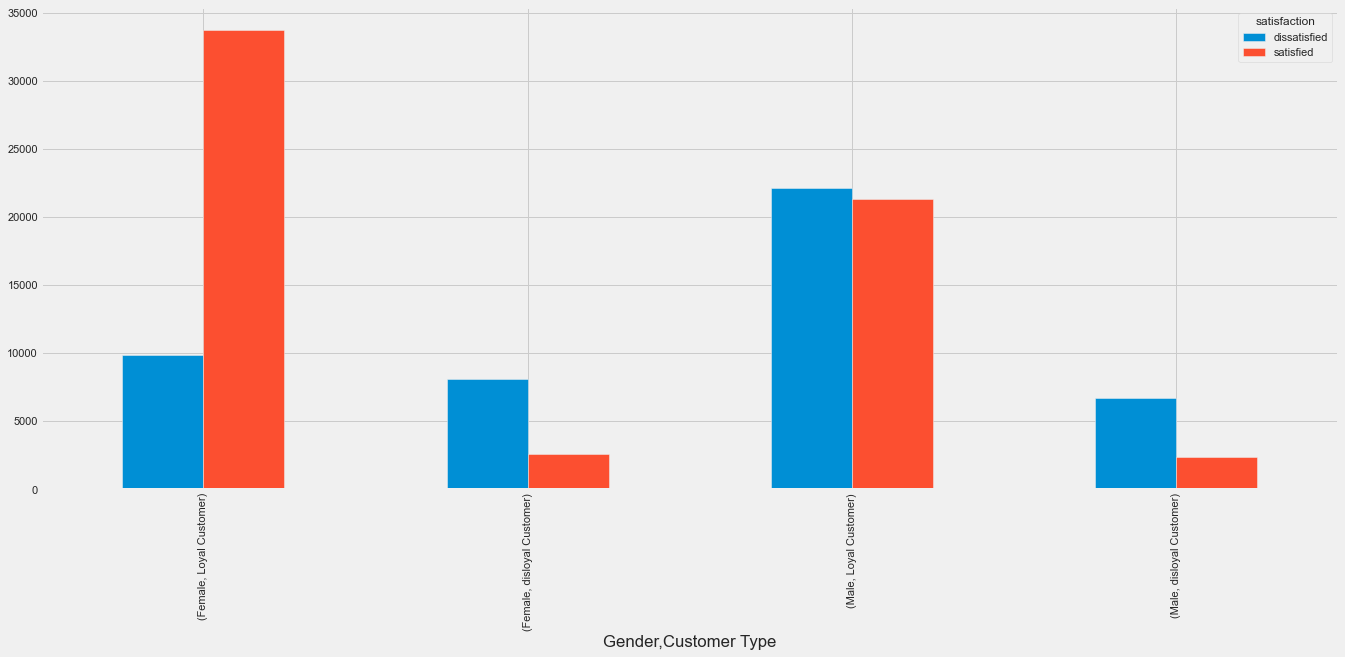

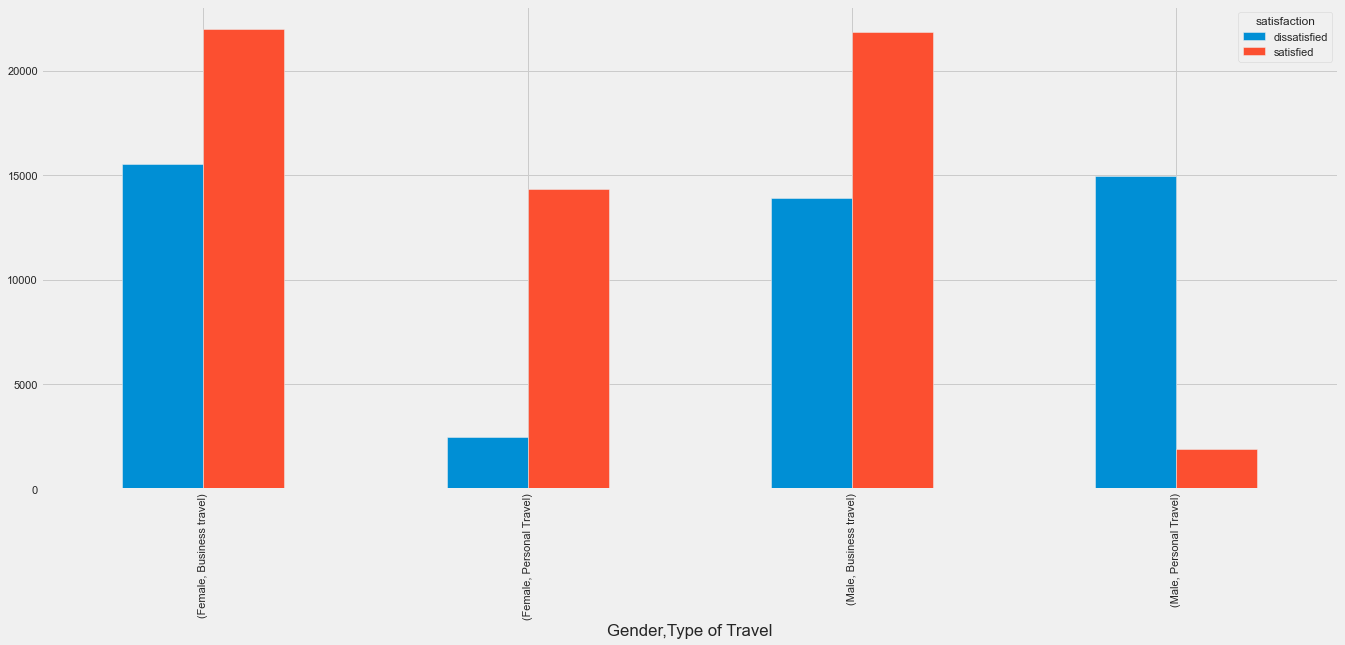

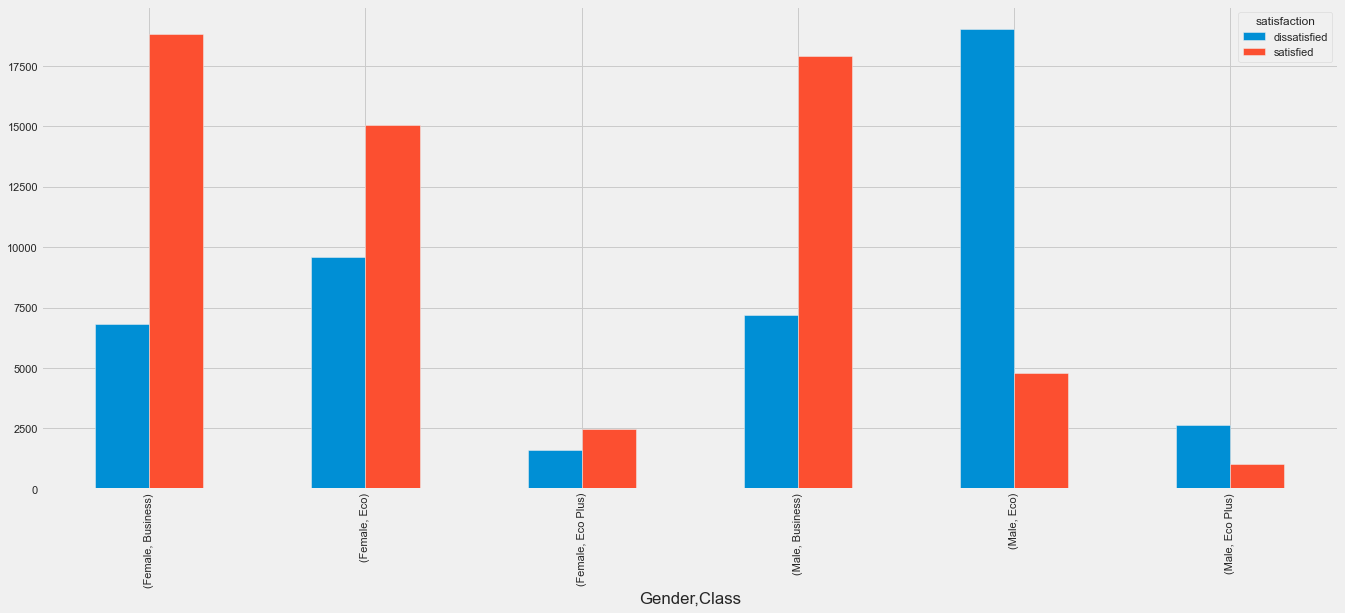

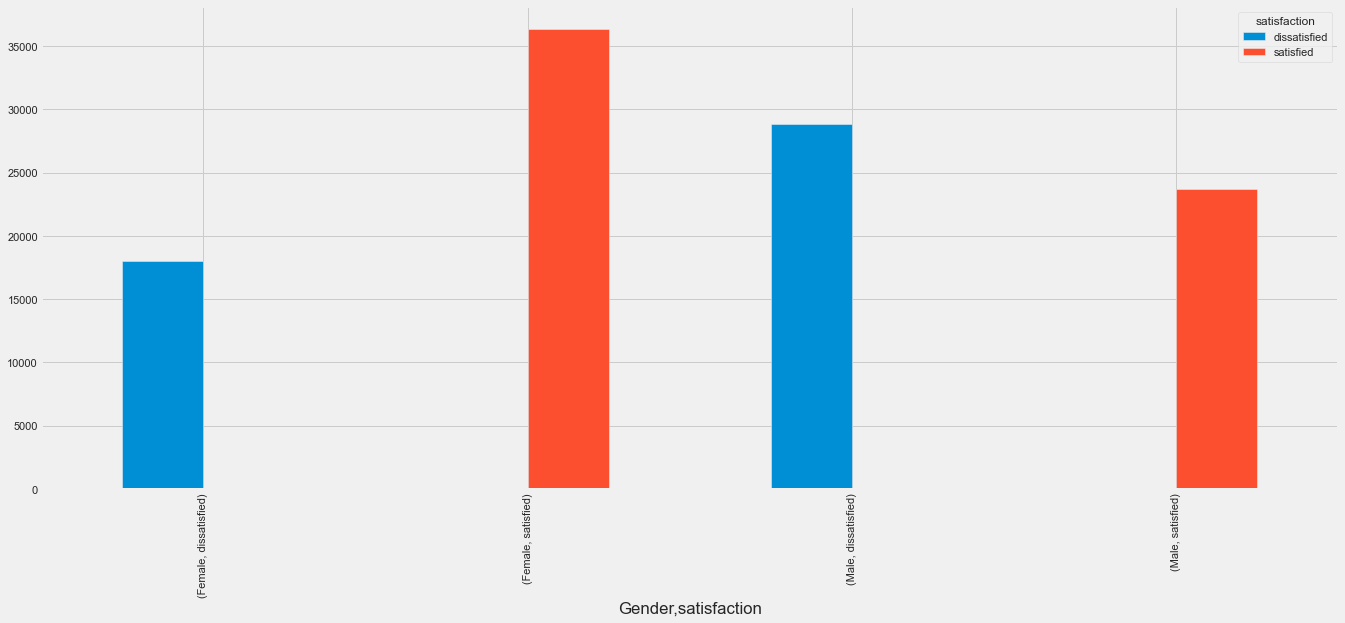

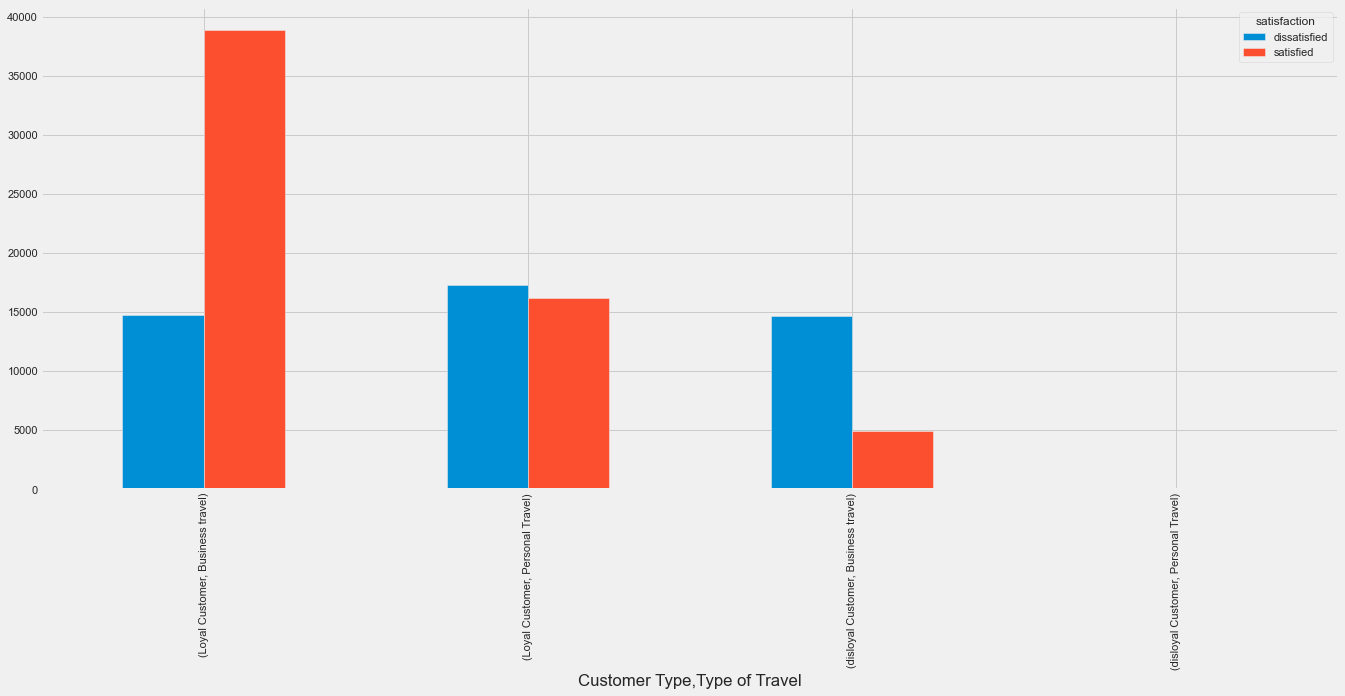

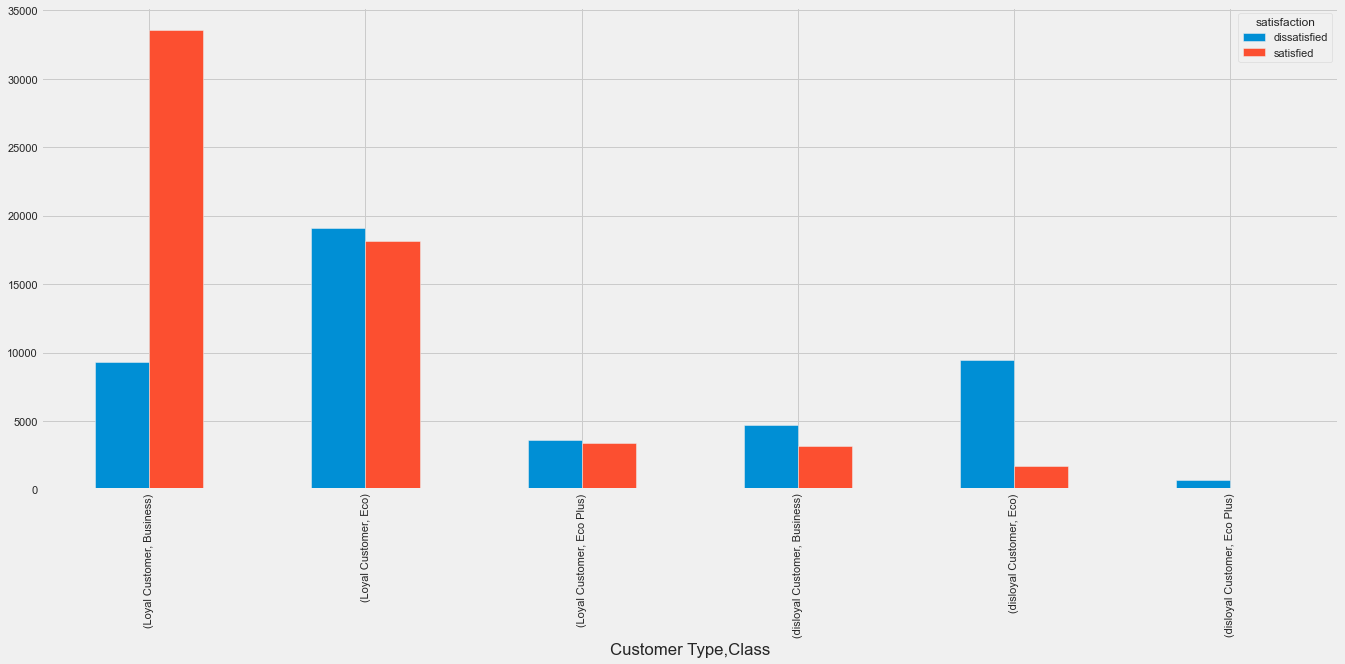

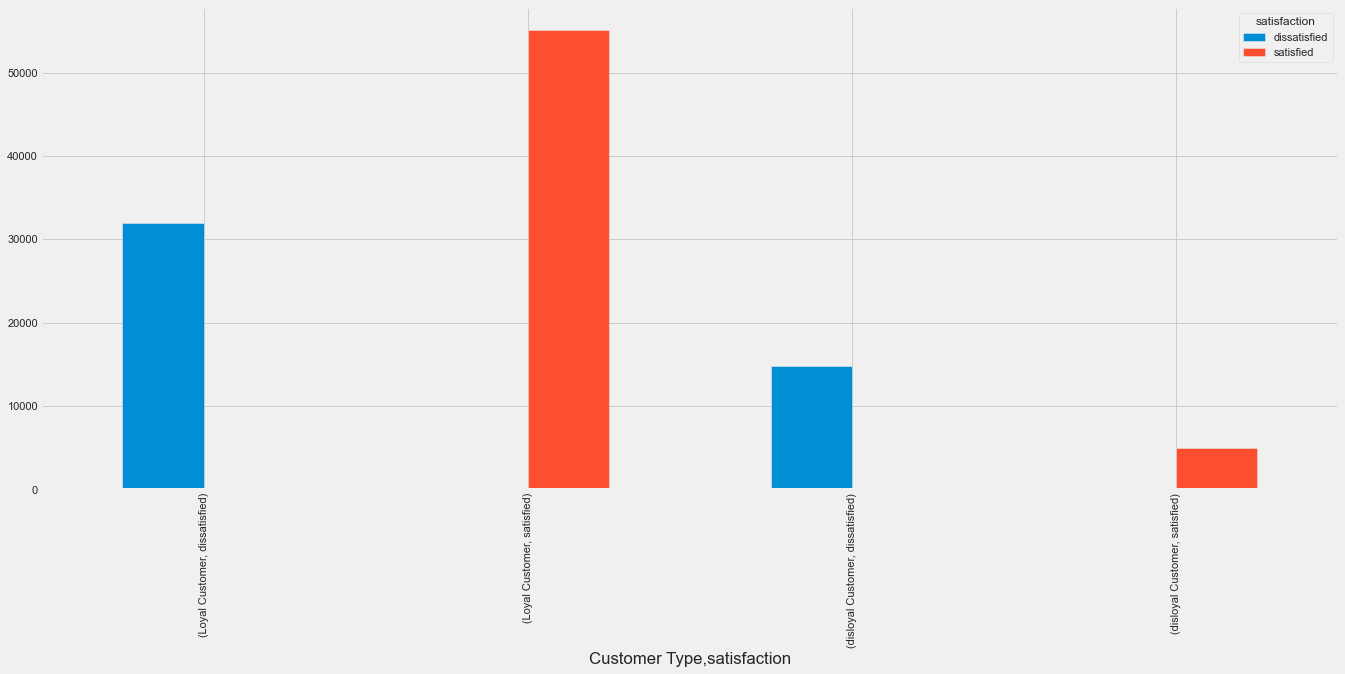

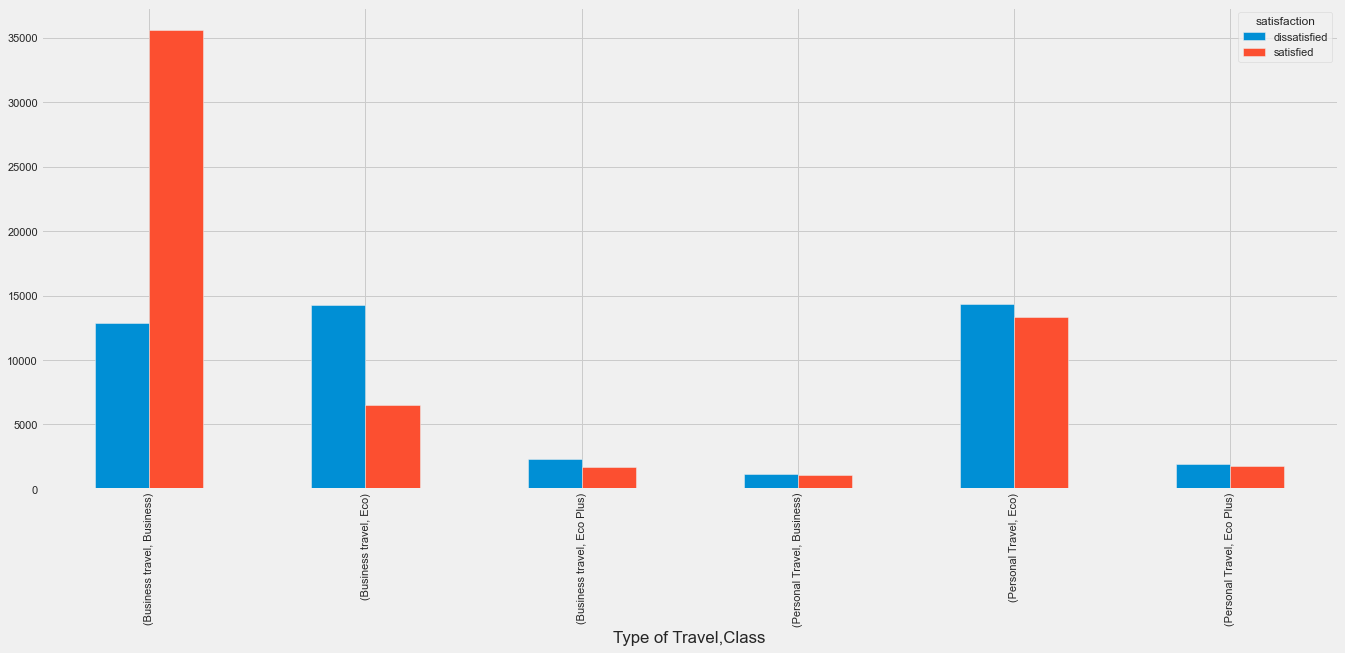

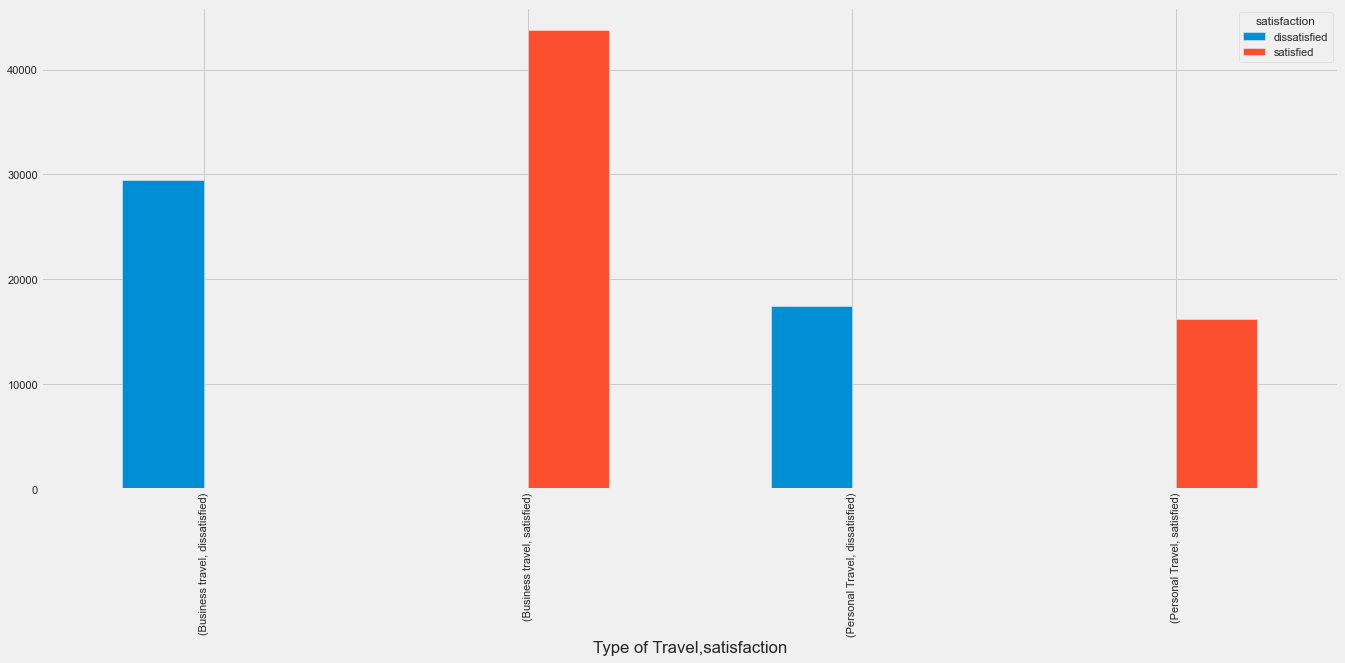

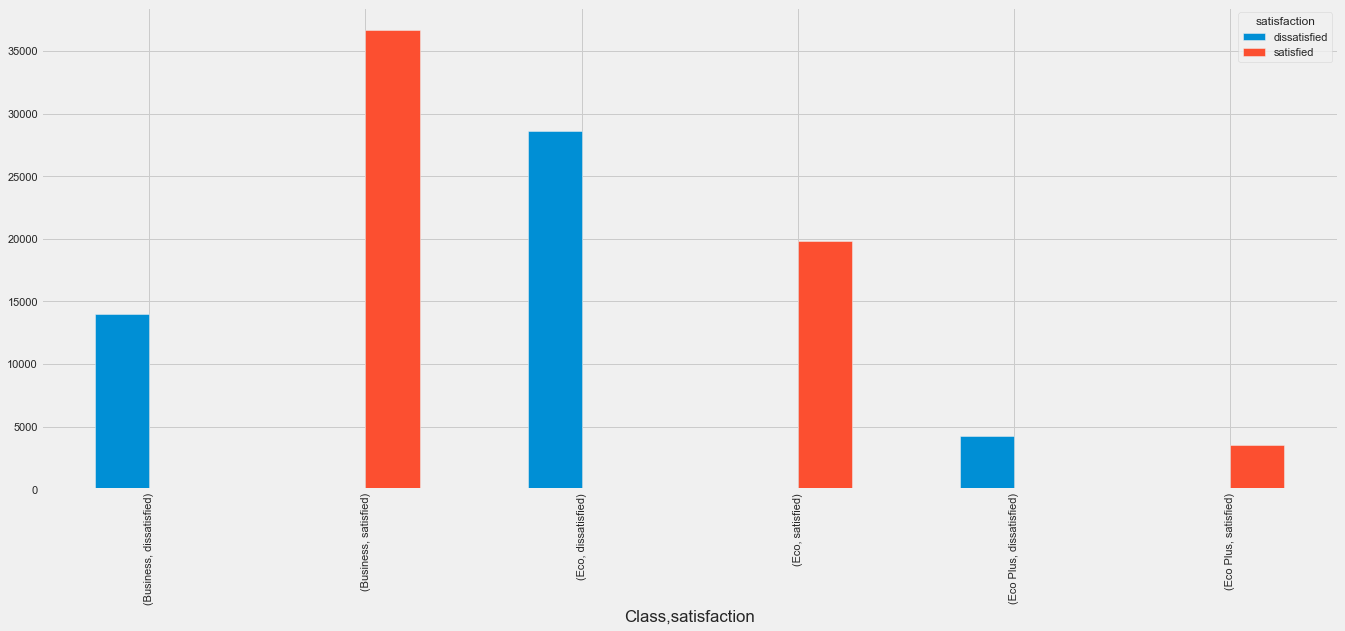

{'Gender': ['Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
 'Customer Type': ['Type of Travel', 'Class', 'satisfaction'],
 'Type of Travel': ['Class', 'satisfaction'],
 'Class': ['satisfaction'],
 'satisfaction': []}

In [87]:
# mencari persentase kepuasan dari kombinasi categorical variabel 
checker = {}
for var1 in cust:
    checker[var1]=[]
    for var2 in cust:
        if (var2 not in checker.keys()) & (var1!=var2):
            df_cust.groupby([var1,var2])['satisfaction'].value_counts().unstack().plot.bar()
            plt.show()
            checker[var1].append(var2)
checker

In [88]:
df_cust.groupby([var1,var2])['satisfaction'].value_counts()

satisfaction  satisfaction  satisfaction
dissatisfied  dissatisfied  dissatisfied    46872
satisfied     satisfied     satisfied       60050
Name: satisfaction, dtype: int64

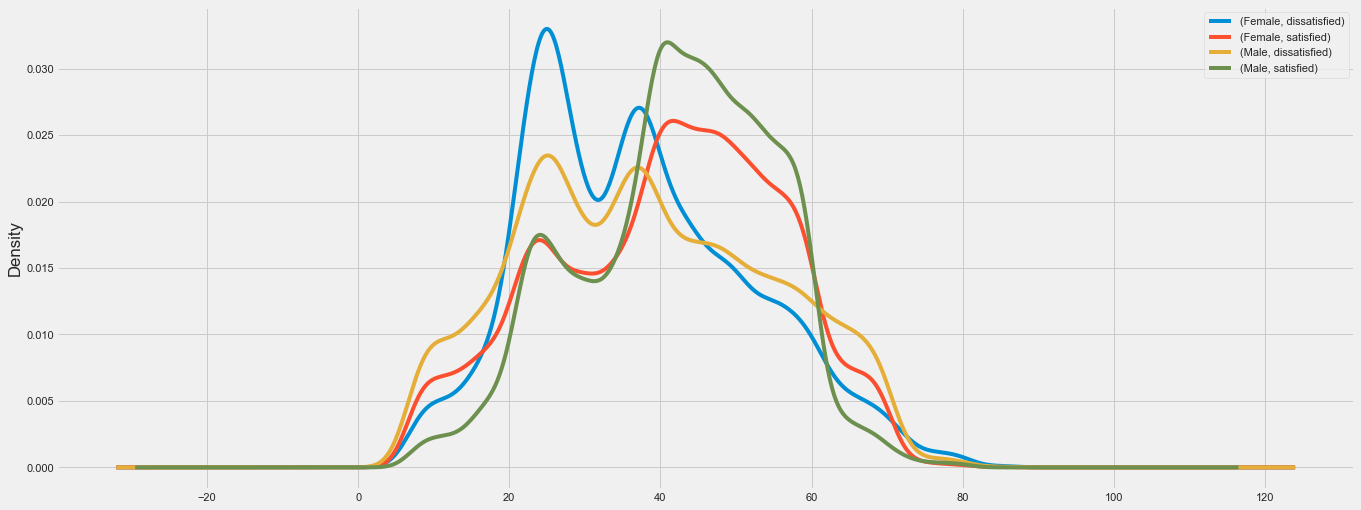

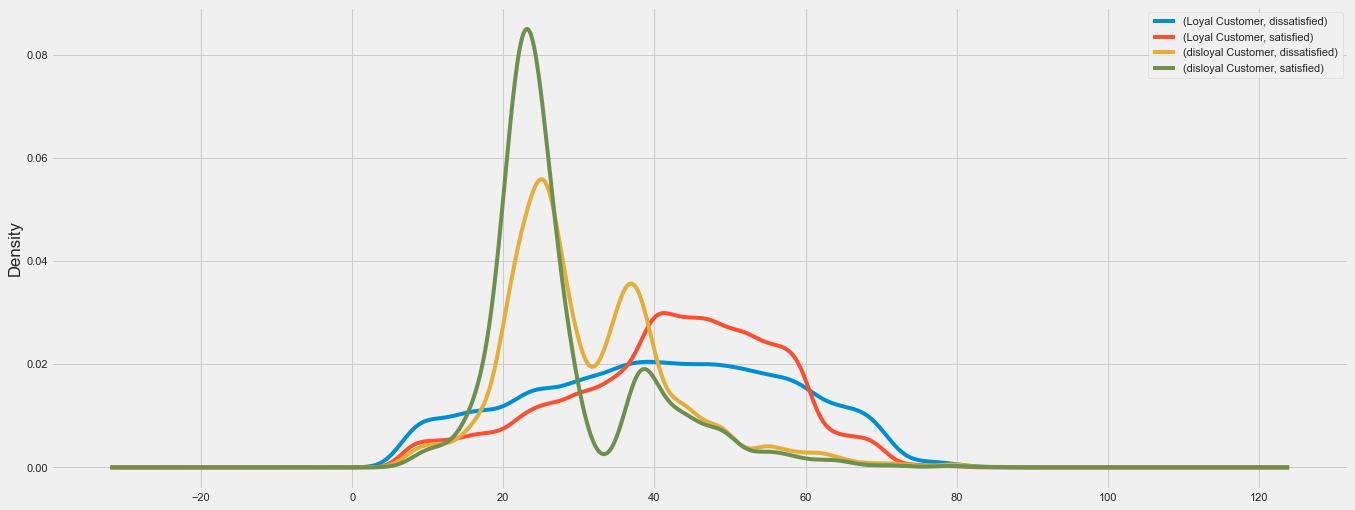

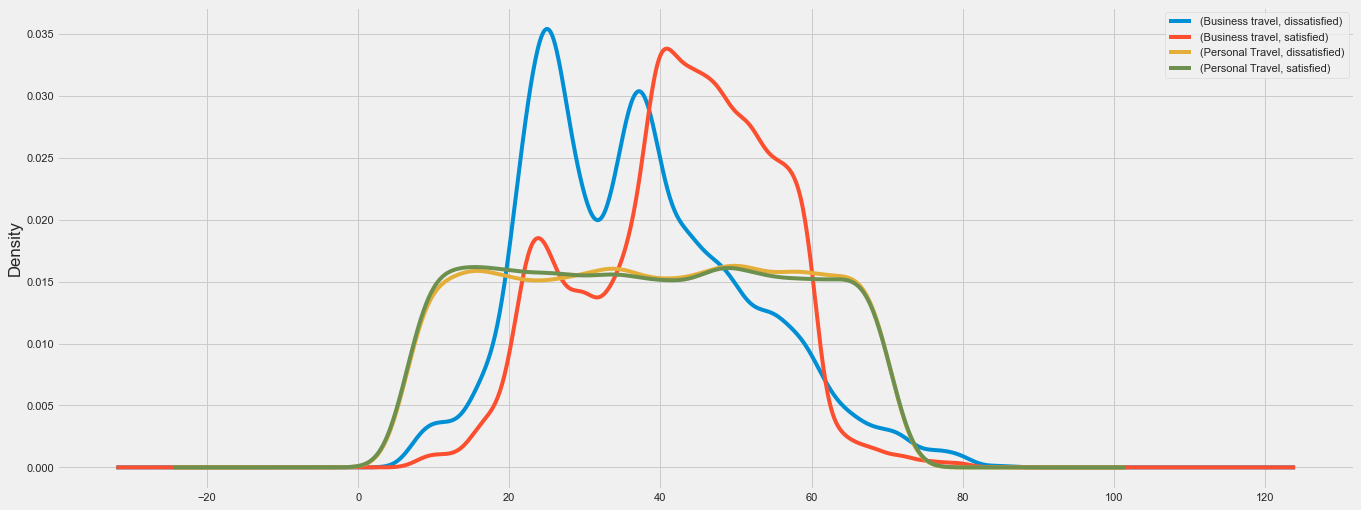

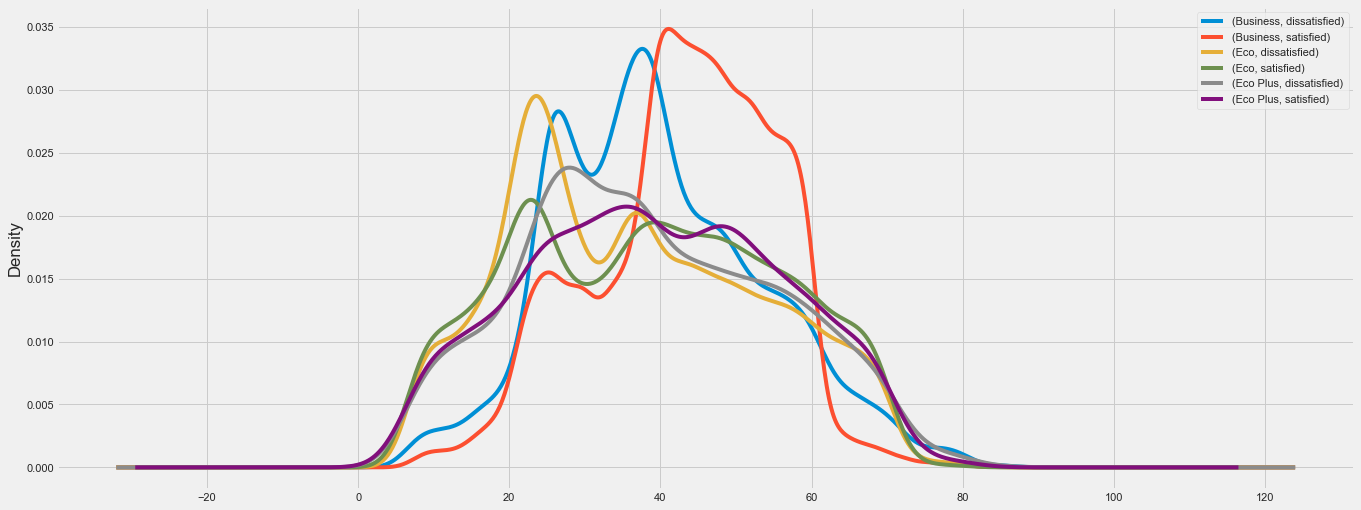

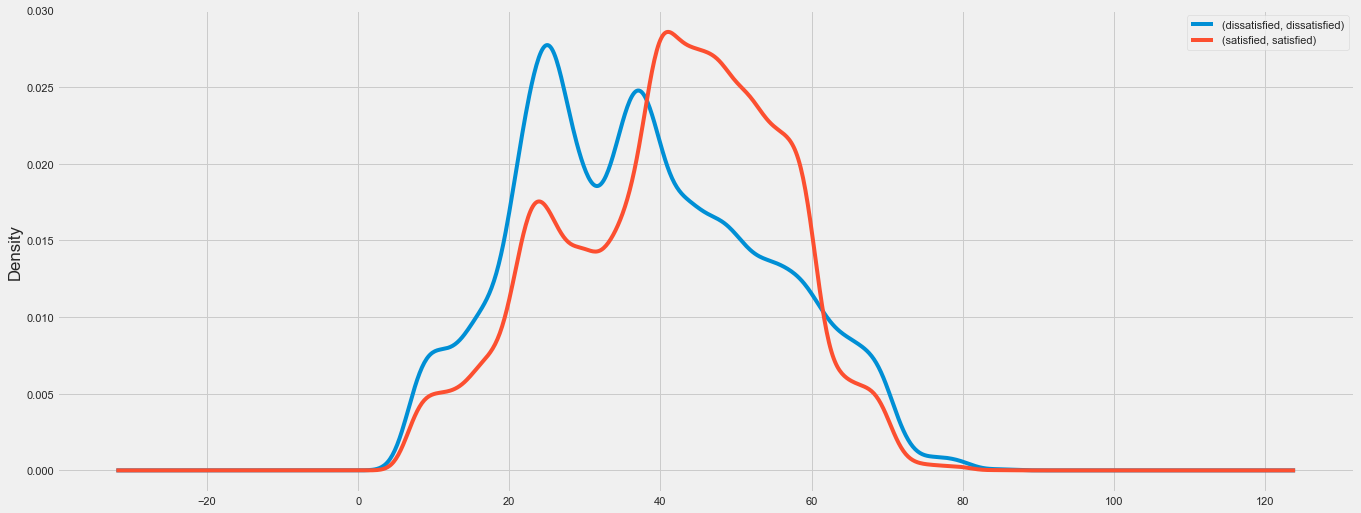

In [89]:
# mencari persebaran data dari kombinasi categorical variabel dan Age
for i in cust:
    df_cust.groupby([i,'satisfaction'])['Age'].plot.kde()
    plt.legend()
    plt.show()

var Gender category Female


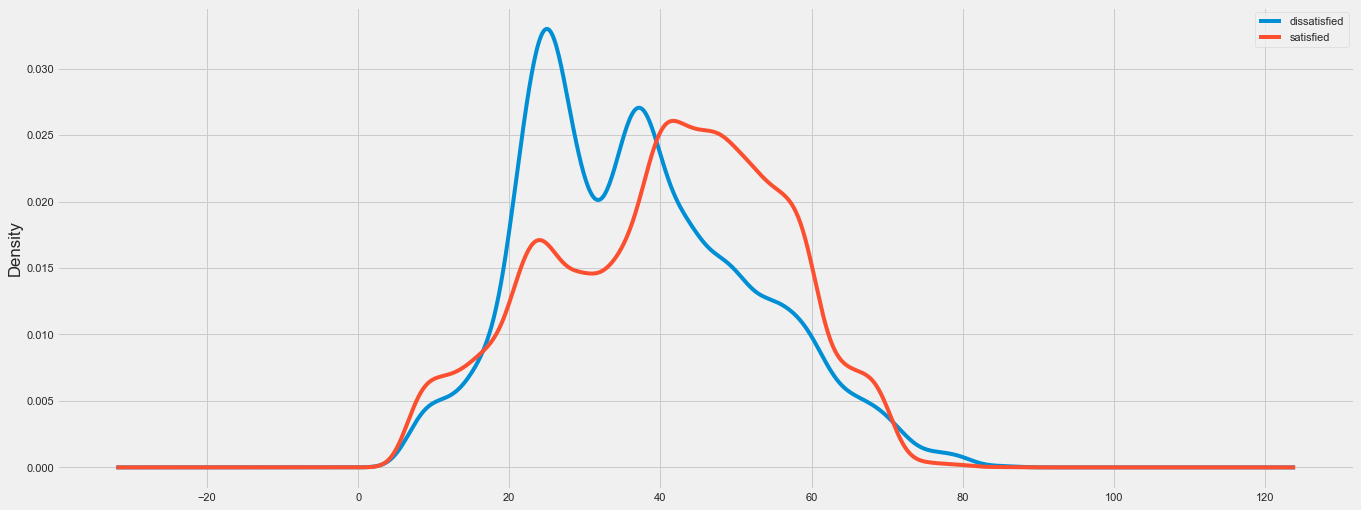

var Gender category Male


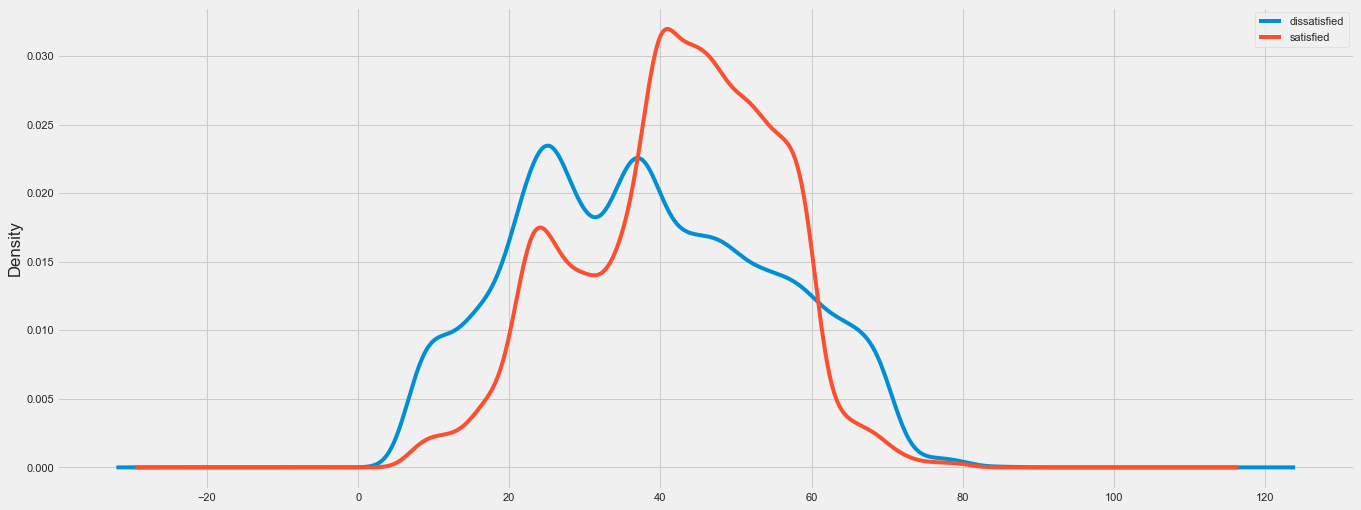

var Customer Type category Loyal Customer


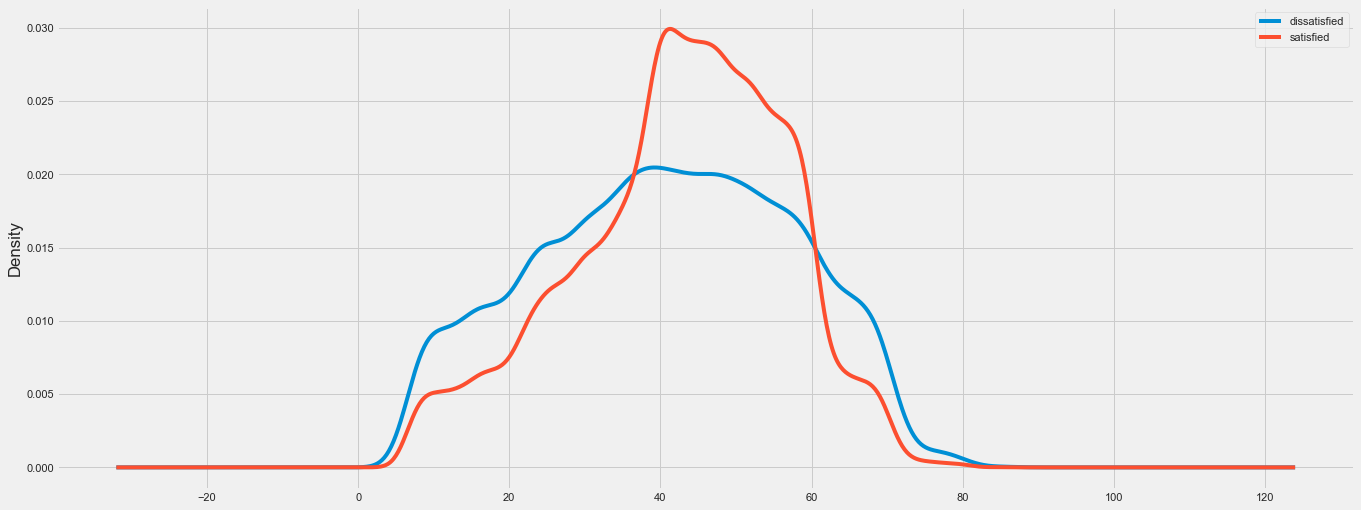

var Customer Type category disloyal Customer


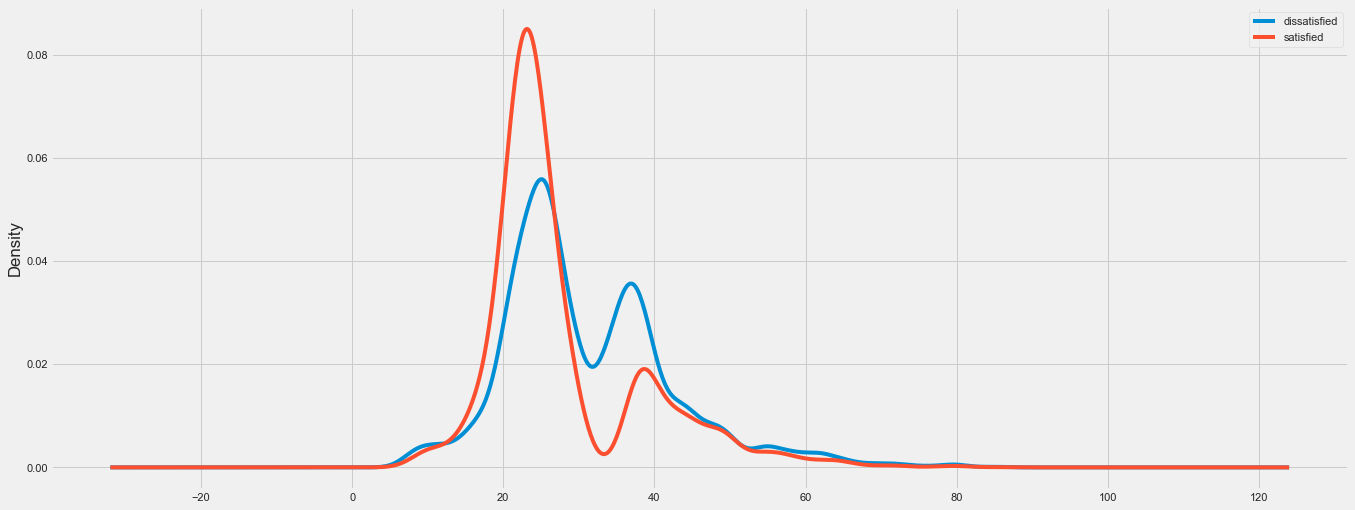

var Type of Travel category Personal Travel


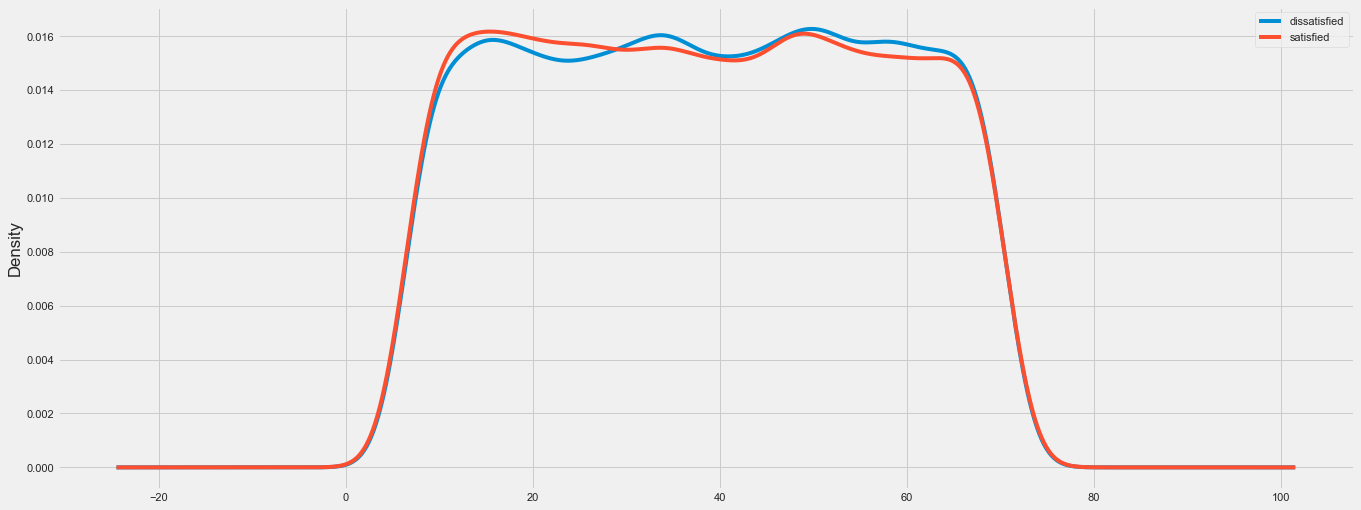

var Type of Travel category Business travel


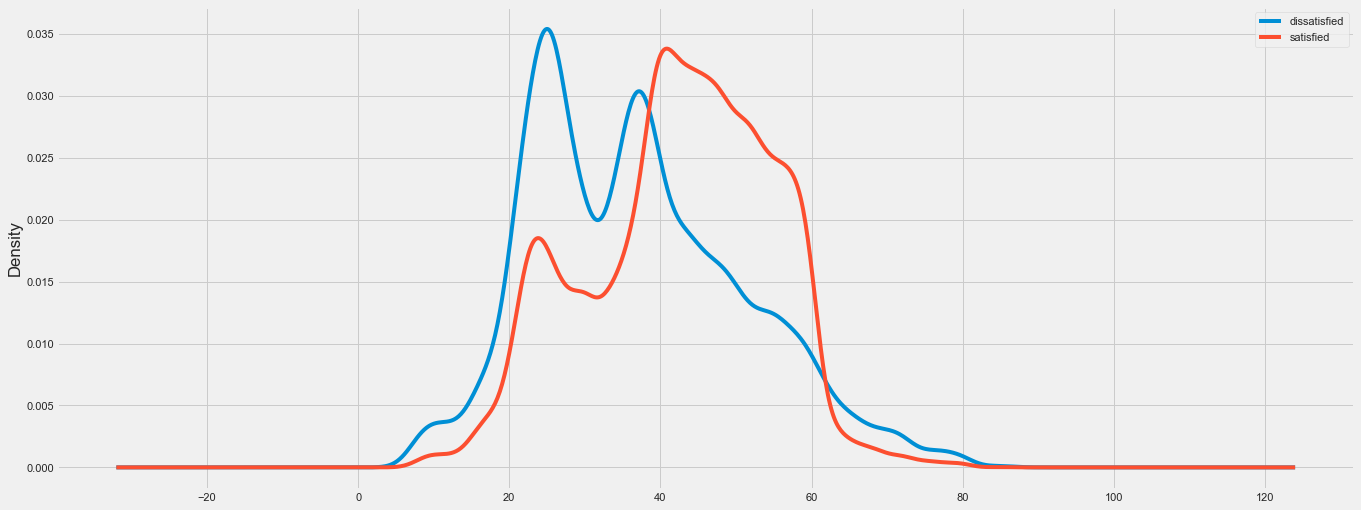

var Class category Eco


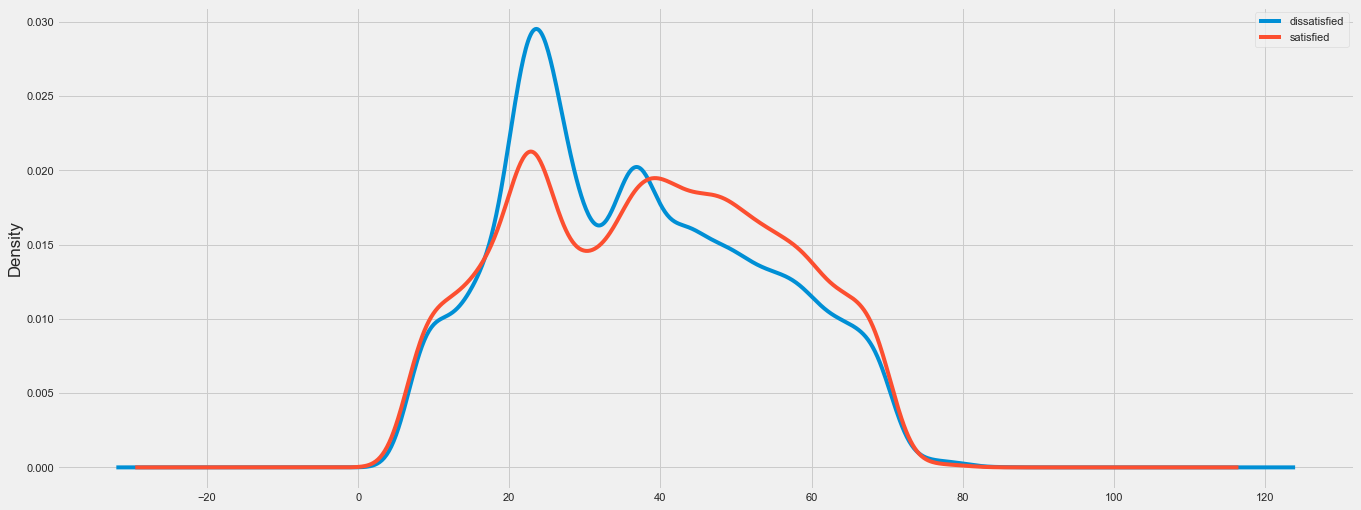

var Class category Business


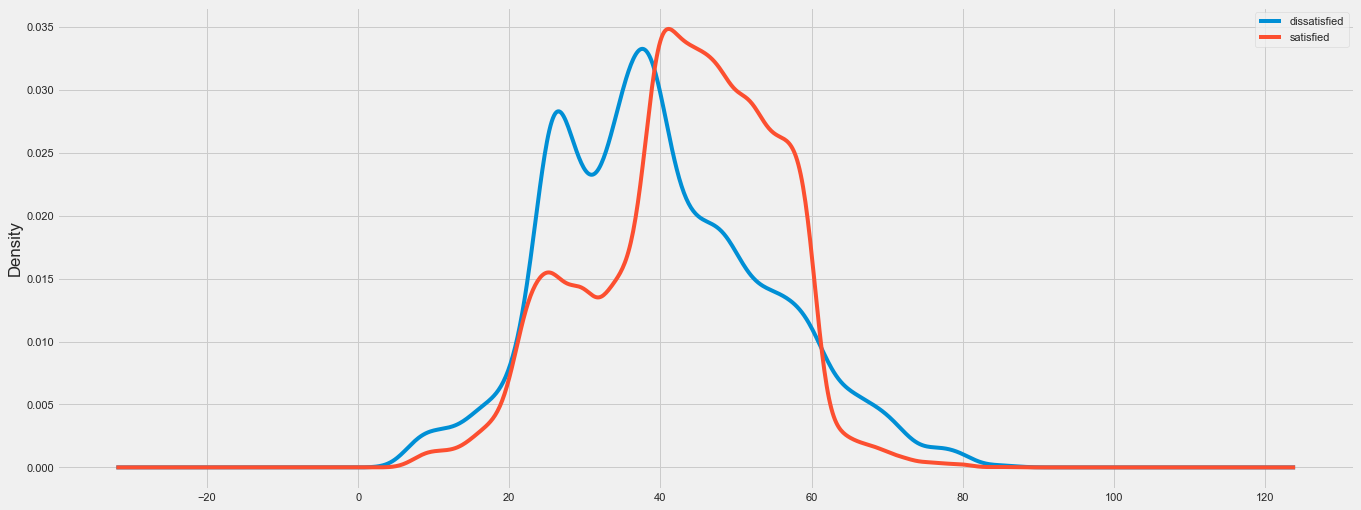

var Class category Eco Plus


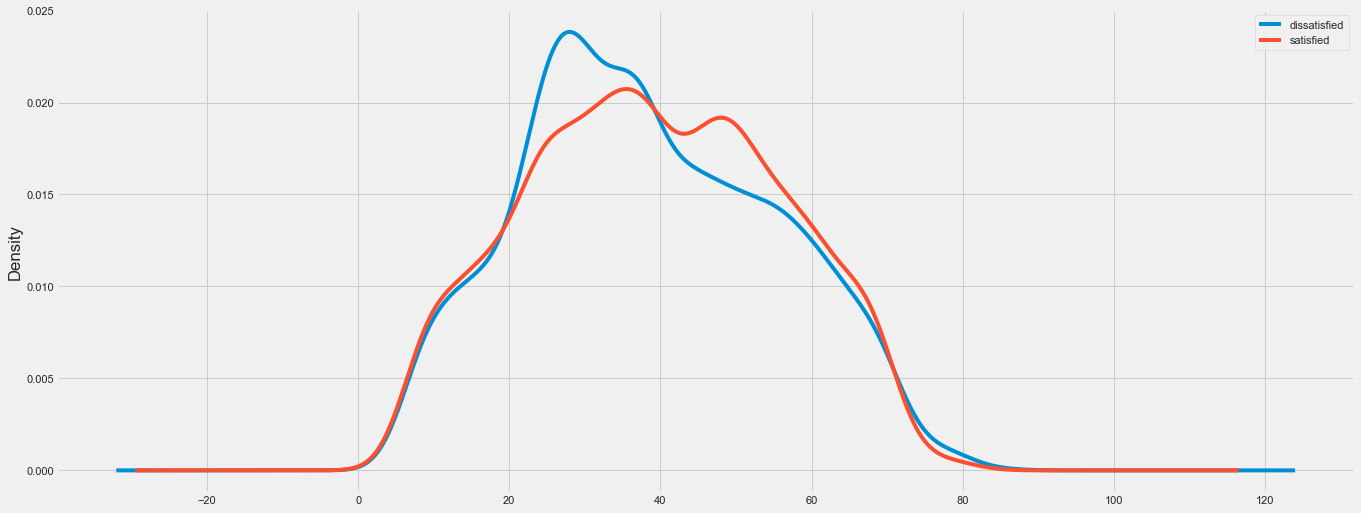

var satisfaction category satisfied


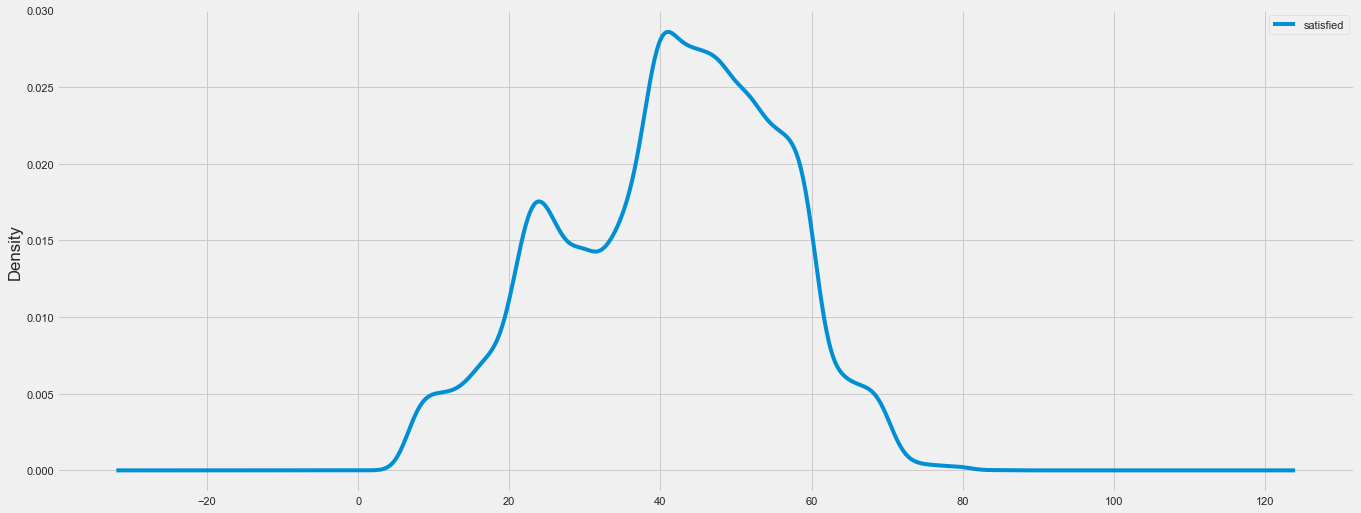

var satisfaction category dissatisfied


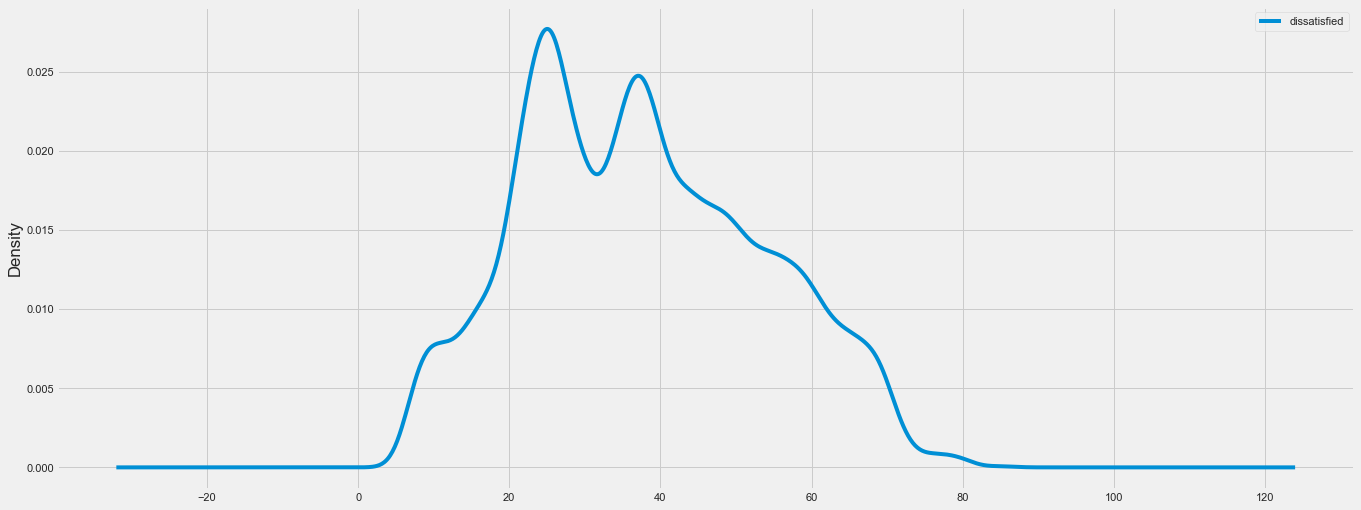

In [90]:
# mencari persebaran data terhadap kepuasan pelanggan dan kombinasi dengan 
# variabel Age(edisi per unique value)
for i in cust:
    for j in df[i].unique():
        print(f'var {i} category {j}')
        df_cust[df_cust[i]==j].groupby('satisfaction')['Age'].plot.kde()
        plt.legend()
        plt.show()

In [91]:
df_cust

Gender      Customer Type   Type of Travel Class satisfaction  Age
0       Female     Loyal Customer  Personal Travel   Eco    satisfied   65
2       Female     Loyal Customer  Personal Travel   Eco    satisfied   15
3       Female     Loyal Customer  Personal Travel   Eco    satisfied   60
4       Female     Loyal Customer  Personal Travel   Eco    satisfied   70
5         Male     Loyal Customer  Personal Travel   Eco    satisfied   30
...        ...                ...              ...   ...          ...  ...
129869  Female  disloyal Customer  Personal Travel   Eco    satisfied   55
129871  Female  disloyal Customer  Personal Travel   Eco    satisfied   35
129872  Female  disloyal Customer  Personal Travel   Eco    satisfied   69
129874  Female  disloyal Customer  Personal Travel   Eco    satisfied   11
129875  Female  disloyal Customer  Personal Travel   Eco    satisfied   29

[106922 rows x 6 columns]

In [92]:
cust.remove('satisfaction')
cust

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [93]:
#mencari nilai persentase ketidakpuasan pada masing2 variabel
for col in cust:
    for var in df_cust[col].unique():
        try:
            temp = len(df_cust[(df_cust[col]==var)&(df_cust['satisfaction']=='dissatisfied')])/\
            len(df[df[col]==var])
            print(f'{col},{var} : {temp*100}% dissatisfied')
        except:
            print(f'{col},{var} : 0% dissatisfied')

Gender,Female : 33.14375115037733% dissatisfied
Gender,Male : 54.88477334955887% dissatisfied
Customer Type,Loyal Customer : 36.75380413577838% dissatisfied
Customer Type,disloyal Customer : 75.04550050556117% dissatisfied
Type of Travel,Personal Travel : 51.774673008323425% dissatisfied
Type of Travel,Business travel : 40.194044922354735% dissatisfied
Class,Eco : 59.013584375903214% dissatisfied
Class,Business : 27.654583801470444% dissatisfied
Class,Eco Plus : 54.9219455554122% dissatisfied


In [94]:
#mencari nilai persentase ketidakpuasan pada masing2 variabel
for col in cust:
    for var in df_cust[col].unique():
        temp = len(df_cust[(df[col]==var)&(df_cust['satisfaction']=='dissatisfied')])/\
        len(df_cust[df_cust[col]==var])
        print(f'{col},{var} : {temp*100}% dissatisfied')

Gender,Female : 33.14375115037733% dissatisfied
Gender,Male : 54.88477334955887% dissatisfied
Customer Type,Loyal Customer : 36.75380413577838% dissatisfied
Customer Type,disloyal Customer : 75.04550050556117% dissatisfied
Type of Travel,Personal Travel : 51.774673008323425% dissatisfied
Type of Travel,Business travel : 40.194044922354735% dissatisfied
Class,Eco : 59.013584375903214% dissatisfied
Class,Business : 27.654583801470444% dissatisfied
Class,Eco Plus : 54.9219455554122% dissatisfied


In [95]:
#cari nilai persentase ketidak puasan dari kombinasi variabel dari list cust
checker = set()
minimum = 100
maximum = 0
for col1 in cust:
    for col2 in cust:
        if (col1!=col2)&(col2 not in checker):
            for var1 in df[col1].unique():
                for var2 in df[col2].unique():
                    try:
                        temp = len(df[(df[col1]==var1)&(df[col2]==var2)&\
                                      (df['satisfaction']=='dissatisfied')])/\
                        len(df[(df[col1]==var1)&(df[col2]==var2)])
                        print(f'{var1},{var2}:{temp*100}')
                    except:
                        print(f'{var1},{var2}:0')
                    if minimum > temp :
                        minimum = temp
                        min_var = [var1,var2] 
                    if maximum < temp :
                        maximum = temp
                        max_var = [var1,var2]
    checker.add(col1)
print(minimum,maximum)
print(min_var)
print(max_var)

Female,Loyal Customer:22.60971247764479
Female,disloyal Customer:76.01717058603955
Male,Loyal Customer:50.925840838081236
Male,disloyal Customer:73.89673433362753
Female,Personal Travel:14.68244529019981
Female,Business travel:41.41920349736098
Male,Personal Travel:88.84926295767951
Male,Business travel:38.909080742563184
Female,Eco:38.89159561510353
Female,Business:26.615925058548008
Female,Eco Plus:39.43627450980392
Male,Eco:79.83030913978494
Male,Business:28.714211762831997
Male,Eco Plus:72.13293380550259
Loyal Customer,Personal Travel:51.62070922833328
Loyal Customer,Business travel:27.481413851571673
disloyal Customer,Personal Travel:82.63473053892216
disloyal Customer,Business travel:74.98088002855249
Loyal Customer,Eco:51.3435159584463
Loyal Customer,Business:21.73588601543735
Loyal Customer,Eco Plus:51.09905795032829
disloyal Customer,Eco:84.55967814036657
disloyal Customer,Business:59.98726114649682
disloyal Customer,Eco Plus:90.87248322147651
Personal Travel,Eco:51.8001735106

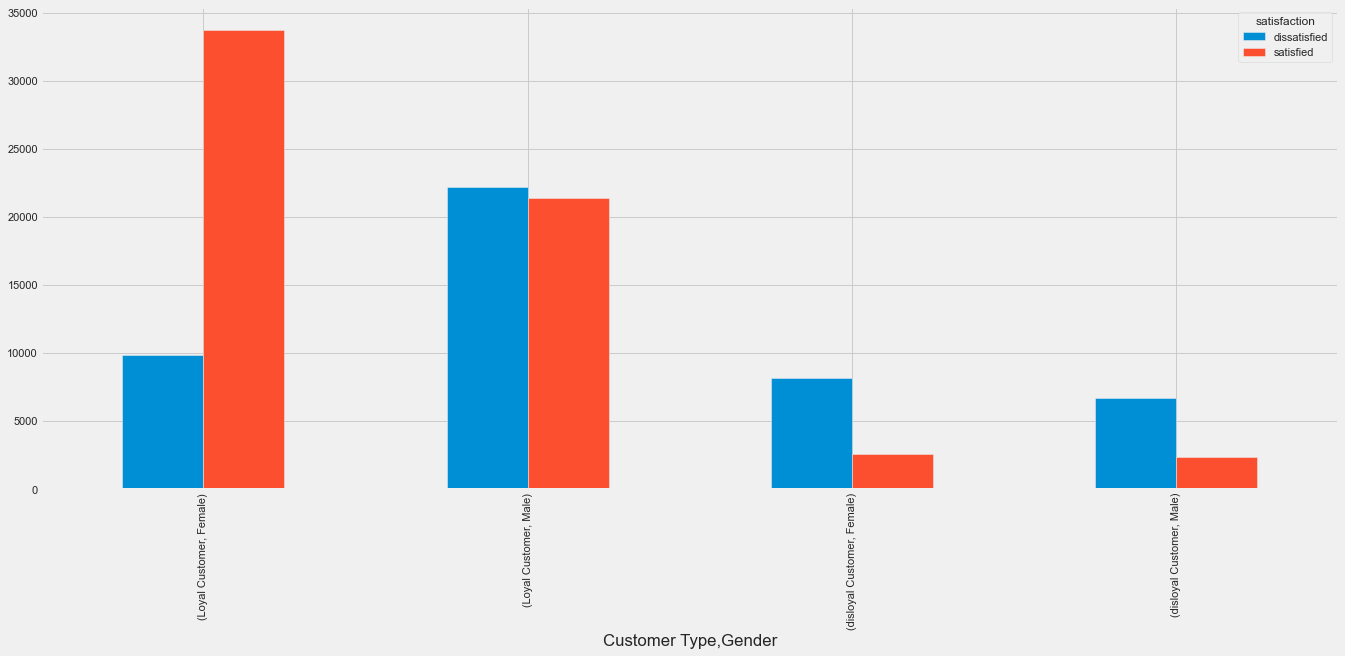

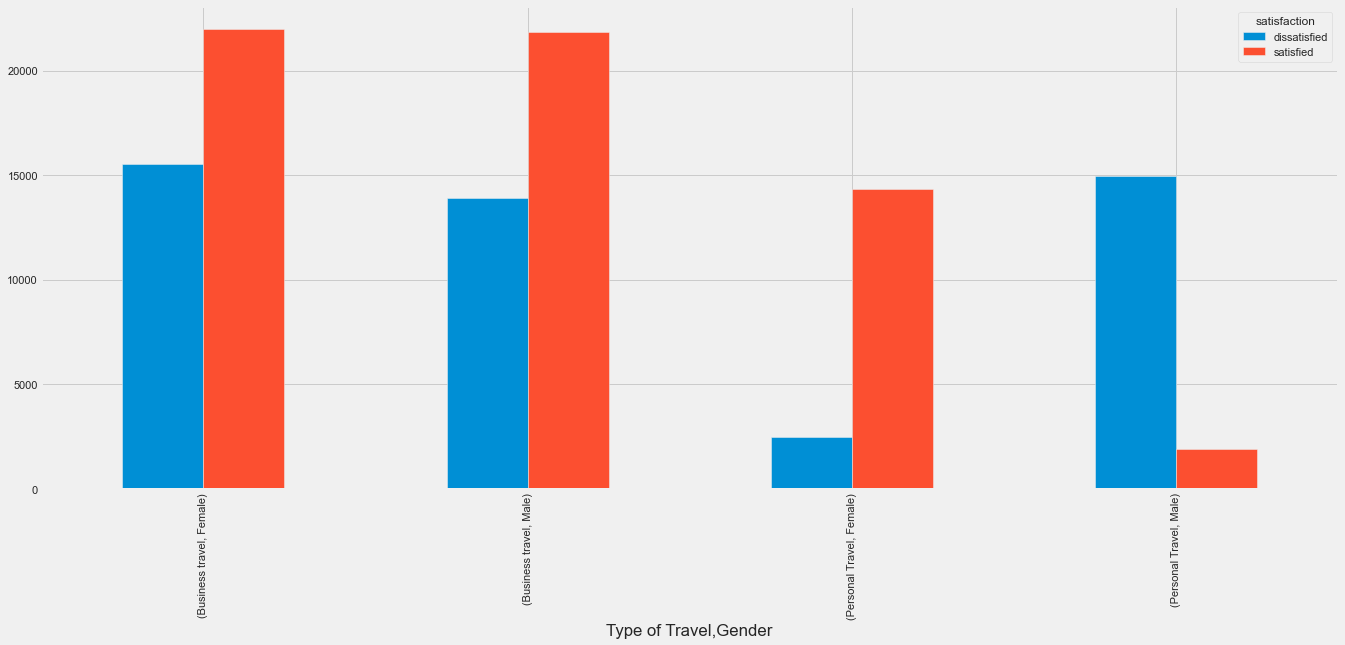

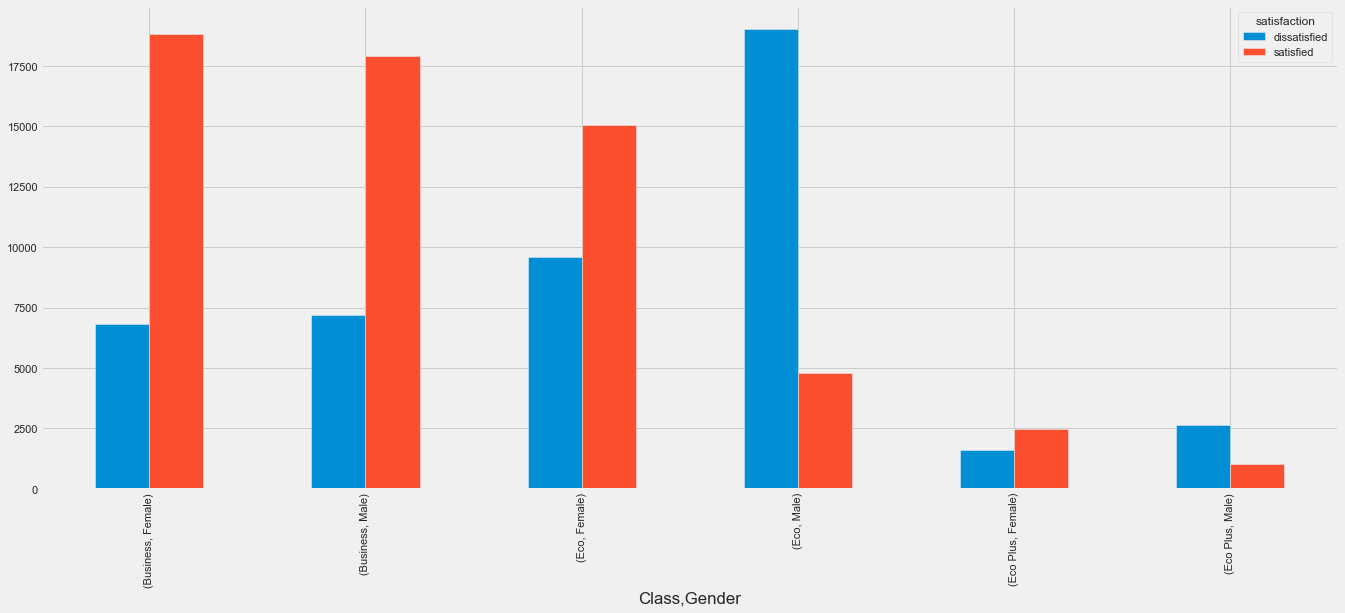

In [96]:
for i in cust:
    if i != 'Gender':
        df_cust.groupby([i,'Gender'])['satisfaction'].value_counts().unstack().plot.bar()

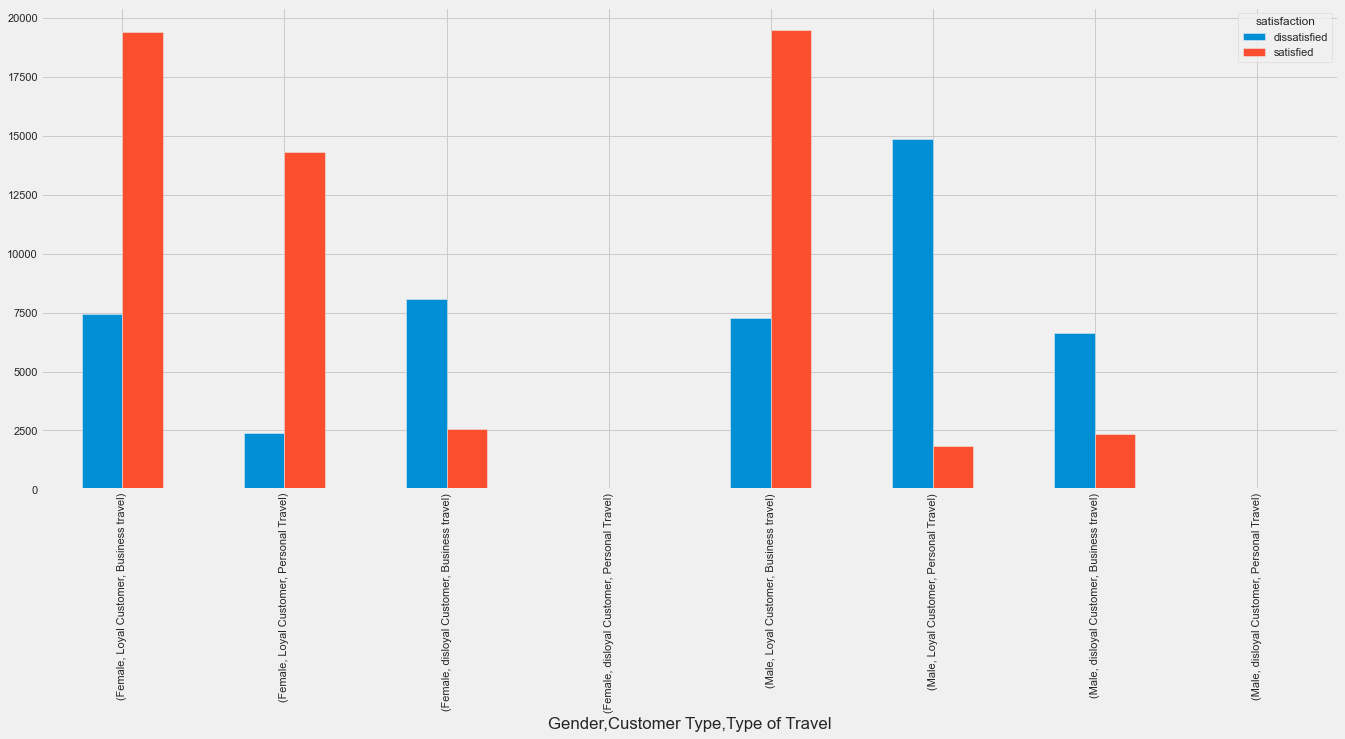

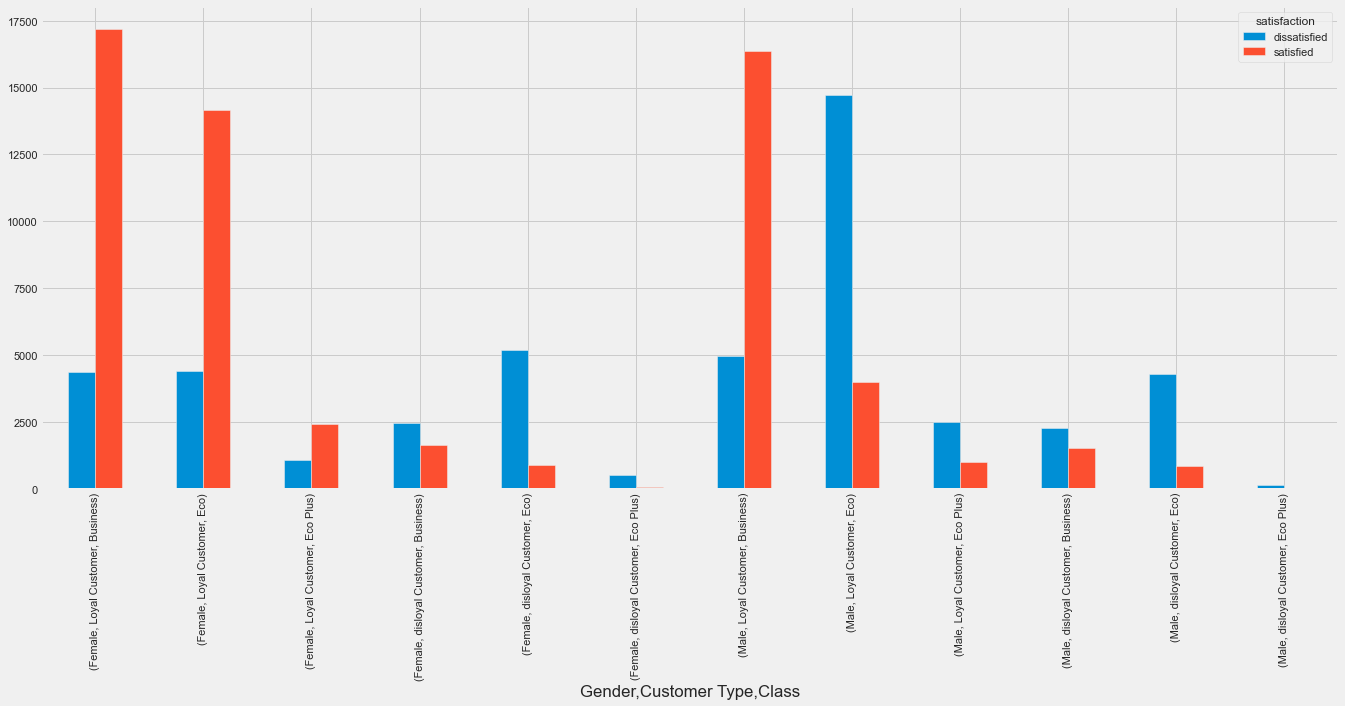

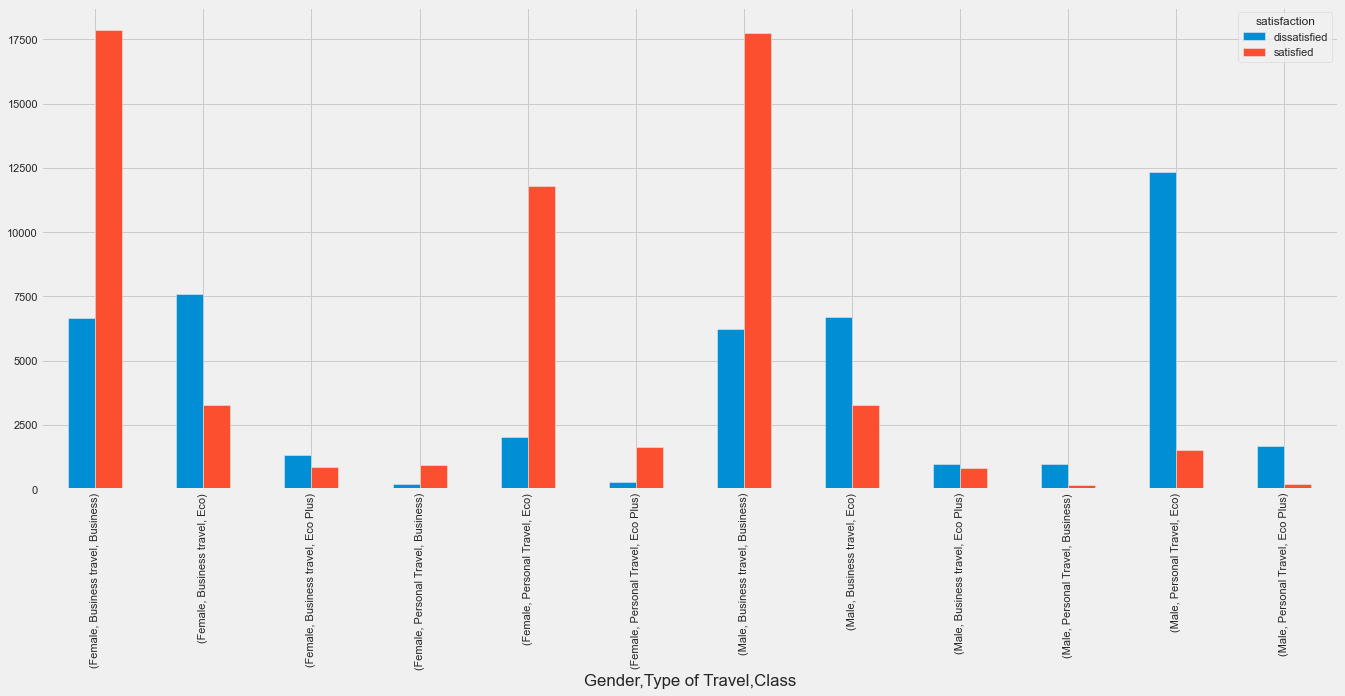

In [97]:
checker = set()
for i in cust:
    for j in cust:
        if (i!='Gender')&(j!='Gender')&(i!=j)&(j not in checker):
            df_cust.groupby(['Gender',i,j])['satisfaction'].value_counts().unstack().plot.bar()
            plt.show()
            checker.add(i)

In [98]:
cust.append('Age')

In [99]:
temp = df_cust[cust]
temp

Gender      Customer Type   Type of Travel Class  Age
0       Female     Loyal Customer  Personal Travel   Eco   65
2       Female     Loyal Customer  Personal Travel   Eco   15
3       Female     Loyal Customer  Personal Travel   Eco   60
4       Female     Loyal Customer  Personal Travel   Eco   70
5         Male     Loyal Customer  Personal Travel   Eco   30
...        ...                ...              ...   ...  ...
129869  Female  disloyal Customer  Personal Travel   Eco   55
129871  Female  disloyal Customer  Personal Travel   Eco   35
129872  Female  disloyal Customer  Personal Travel   Eco   69
129874  Female  disloyal Customer  Personal Travel   Eco   11
129875  Female  disloyal Customer  Personal Travel   Eco   29

[106922 rows x 5 columns]

In [100]:
from feature_engine.encoding import OrdinalEncoder as OE
encoding = OE(encoding_method = 'arbitrary')
encoding.fit(temp)
temp = encoding.transform(temp)

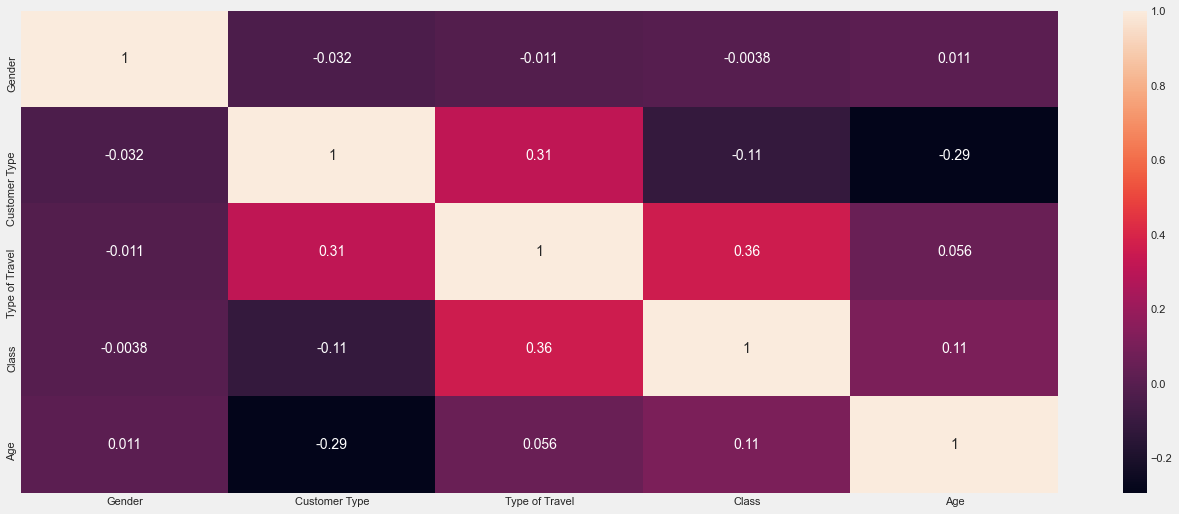

In [101]:
import seaborn as sns
sns.heatmap(temp.corr(),annot = True)
plt.show()

### Conclusion

Mayoritas customer menggunakan jasa maskapai tersebut untuk perjalanan bisnis, baik laki-laki maupun perempuan. Dari grafik distribusi Gender-Type of travel, sekitar 2/3 customer laki-laki maupun perempuan menggunakan jasa maskapai tersebut untuk perjalanan bisnis dan dan sisanya untuk perjalanan personal(ex: berlibur). Customer dari maskapai tersebut memiliki rentang umur 7 tahun hingga 85 tahun dengan rata-rata sebesar 39.43 dan median 40, Q1 sebesar 27, Q3 sebesar 50 dan standard deviasi 15.12. Dari grafik distribusi umur-type of travel, mayoritas customer pada rentang umur 27 tahun hingga 50 tahun menggunakan jasa maskapai untuk perjalanan bisnis. Berdasarkan informasi tersebut, umur customer maskapai tersebut memiliki distribusi yang cenderung normal dengan sebaran yang berpusat di 40 tahun dan 50% data tersebar pada rentang 27 tahun hingga 50 tahun, yang mana pada rentang umur tersebut didominasi oleh kelas pekerja(sumber: https://www.hiredtoday.com/tips-karir/articles/usia-produktif-bagi-pekerja).

Dari plot distribusi terhadap satisfactcion, Sebesar 56% laki-laki dan 35% perempuan tidak puas dengan maskapai tersebut. Pada keperluan perjalanan, sebanyak 53% customer yang melakukan perjalanan untuk keperluan pribadi dan 42% customer yang melakukan perjalanan untuk keperluan bisnis merasa tidak puas dengan pelayanan maskapai. Pada kelas yang digunakan, sebanyak 29% pengguna kelas bisnis, 61% pengguna kelas Eco dan 57% pengguna kelas Eco PLus tidak puas terhadap pelayanan maskapai. Pada jenis customer, sebanyak 76% disloyal customer dan 38% loyal customer tidak puas terhadap pleayanan. Pada variabel umur, sebanyak 52% customer dibawah 40 tahun  dan 37% customer diatas 40 tahun tidak puas dengan pelayanan maskapai tersebut. Terdapat banyak kemungkinan mengenai perbedaan kepuasan yang cukup signifikan antara laki-laki dan perempuan (sebesar 21%), karena secara logika seharusnya kepuasan pelanggan tidak dipengaruhi oleh jenis kelamin customer, sedangkan perbedaan kepuasan antara disloyal customer dan loyal customer cukup masuk akal. Selain itu, hal yang menarik untuk diteliti adalah mayoritas dengan umur dibawah 40 tahun cenderung tidak puas sedangkan customer dengan umur diatas 40 tahun cenderung puas dengan pelayanan maskapai. 

Kombinasi variabel yang menghasilkan persentase ketidakpuasan tertinggi adalah disloyal customer yang menggunakan kelas Eco Plus, yaitu sebesar 92%. Sedangkan kombinasi variabel yang menghasilkan persentase ketidakpuasan terendah adalah perempuan yang menggunakan jasa maskapai untuk kepentingan personal, yaitu sebesar 17%. terdapat selisih yang sangat signifikan jika dibandingkan dengan persentase kepuasan customer laki-laki yang bepergian dengan tujuan personal, yaitu sebesar 90% yang tidak puas. 

## Bhismo Danindito

(Online support, Ease of Online booking, Checkin service, Online boarding)

In [102]:
df_bookgrp = df[['Online support', 'Ease of Online booking', 'Checkin service', 'Online boarding']]
bookgrp = ['Online support', 'Ease of Online booking', 'Checkin service', 'Online boarding']
df_bookgrp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Online support          106922 non-null  int64
 1   Ease of Online booking  106922 non-null  int64
 2   Checkin service         106922 non-null  int64
 3   Online boarding         106922 non-null  int64
dtypes: int64(4)
memory usage: 8.1 MB


In [103]:
df[bookgrp].describe()

Online support  Ease of Online booking  Checkin service  Online boarding
count   106922.000000           106922.000000    106922.000000    106922.000000
mean         3.535549                3.490068         3.356634         3.362376
std          1.304693                1.304092         1.255833         1.297475
min          1.000000                0.000000         1.000000         0.000000
25%          3.000000                2.000000         3.000000         2.000000
50%          4.000000                4.000000         3.000000         4.000000
75%          5.000000                5.000000         4.000000         4.000000
max          5.000000                5.000000         5.000000         5.000000

### Univariate Variable

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

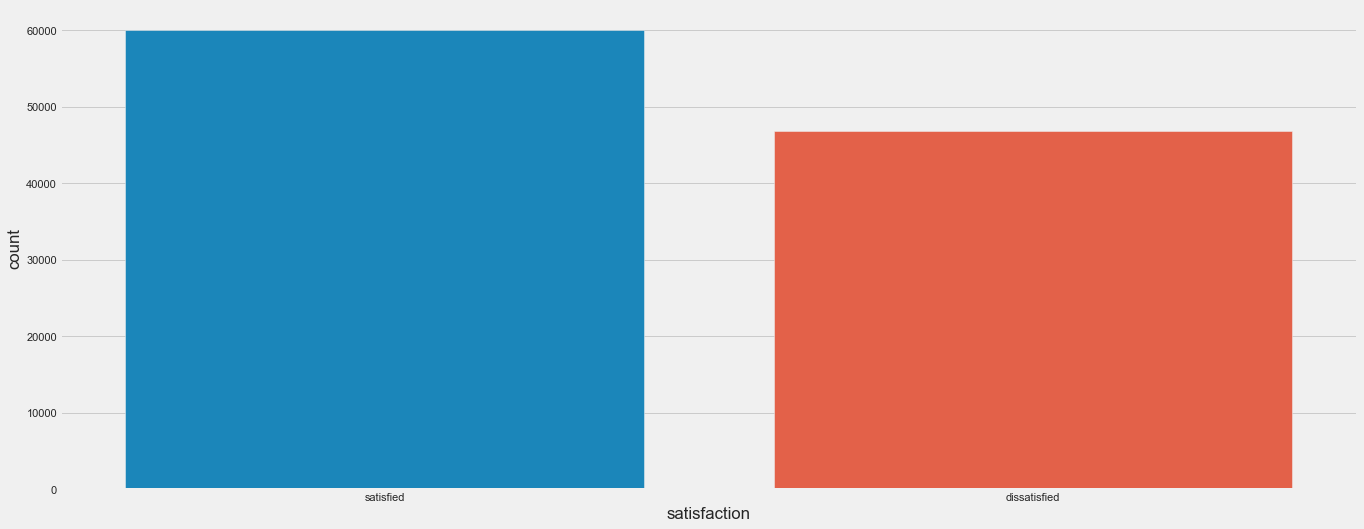

In [104]:
sns.countplot(x='satisfaction', data=df)

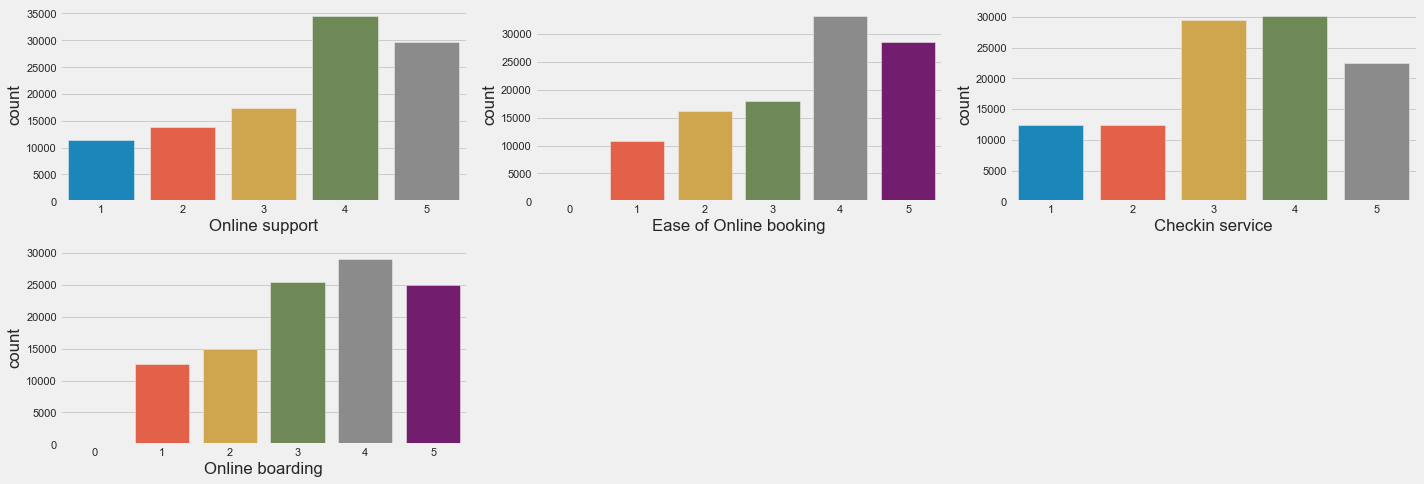

In [105]:
plt.figure(figsize=(20, 20))
for i in range(0, len(bookgrp)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[bookgrp[i]], orient='v')
    plt.tight_layout()

Online Support, Ease of Online Booking, Checking Service dan Online Boarding memiliki jumlah count rating tertinggi yang sama, dimana customer paling banyak mengisi pada rating 4

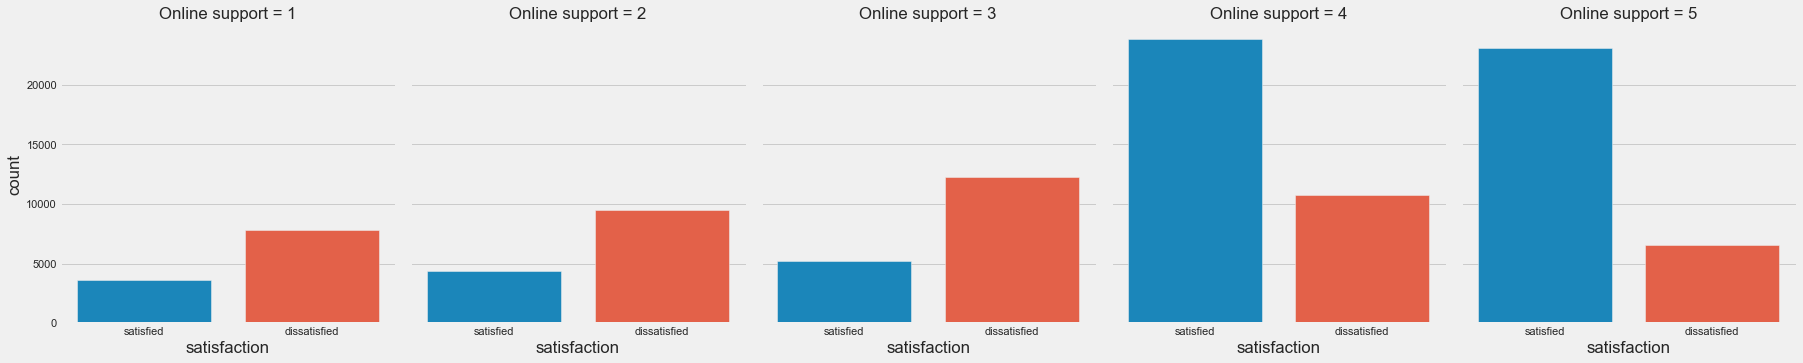

In [106]:
sns.factorplot(x='satisfaction', col='Online support', kind='count', data=df)

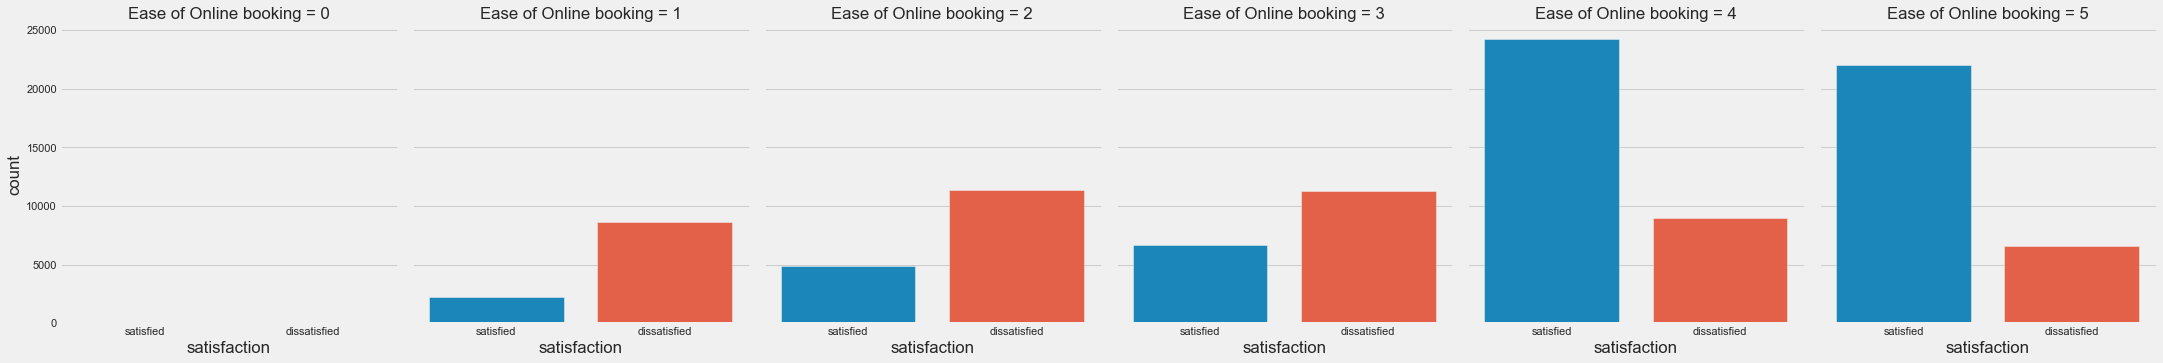

In [107]:
sns.factorplot(x='satisfaction', col='Ease of Online booking', kind='count', data=df)

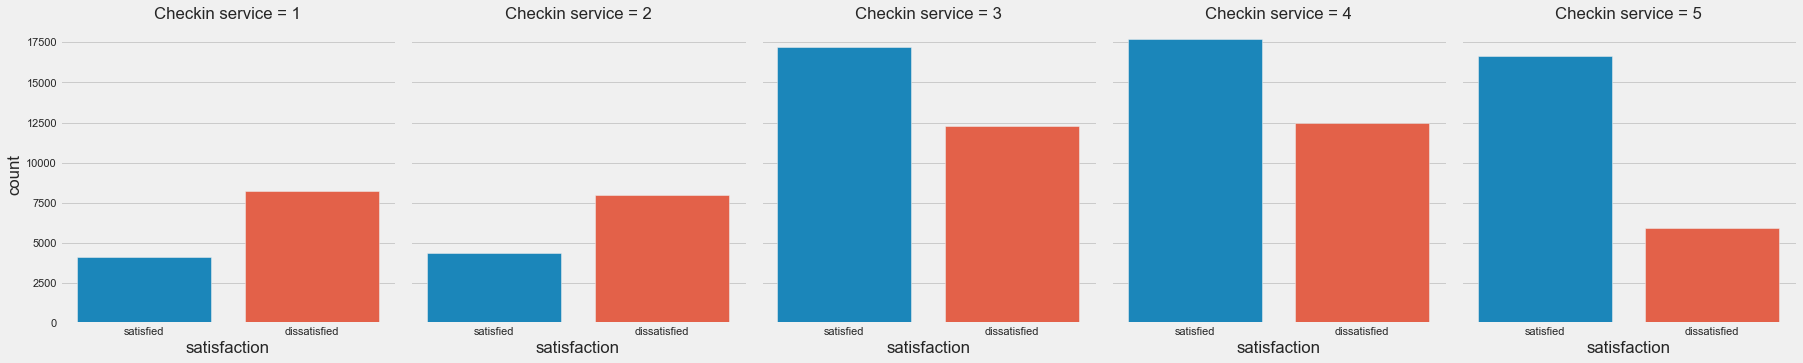

In [108]:
sns.factorplot(x='satisfaction', col='Checkin service', kind='count', data=df)

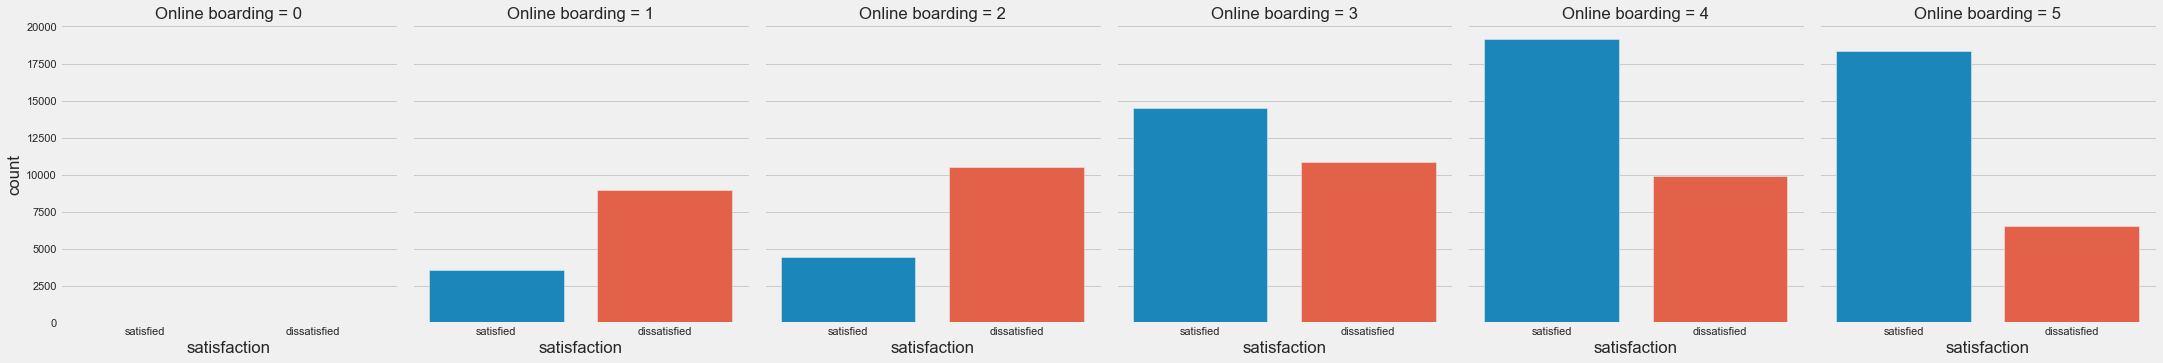

In [109]:
sns.factorplot(x='satisfaction', col='Online boarding', kind='count', data=df)

Insight :
1. melihat dari customer yang mengisi Online Support, Ease of Online Booking, Checking Service dan Online Boarding dengan rating dibawah 3, didominasi dengan customer yang dissatisfied
2. untuk customer yang mengisi rating 3, memiliki persebaran yang imbang dimana :
    - untuk Online Support lebih banyak customer yang dissatisfied
    - begitu pula pada kolom Ease of Online Booking, paling banyak customer yang dissatisfied
    - untuk kolom Online boarding dan checkin service, paling banyak customer yang satisfied
3. pada customer yang mengisi mengisi Online Support, Ease of Online Booking, Checking Service dan Online Boarding dengan rating diatas 3, didominasi dengan customer yang satisfied

### Multivariate Variable

In [110]:
bookgrp = np.append(bookgrp, 'satisfaction')

<AxesSubplot:>

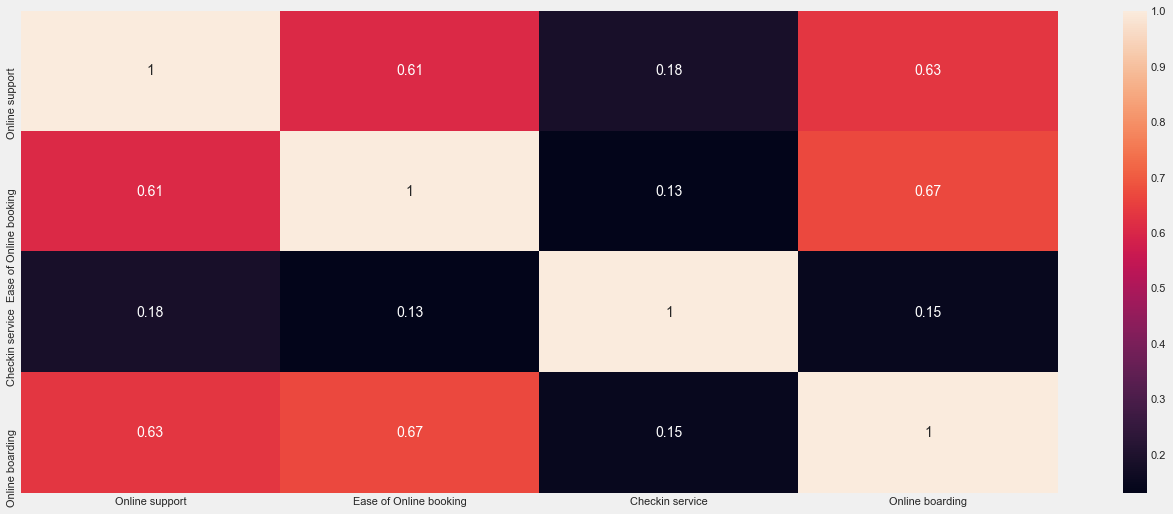

In [111]:
sns.heatmap(df[bookgrp].corr(method='spearman'), annot=True)

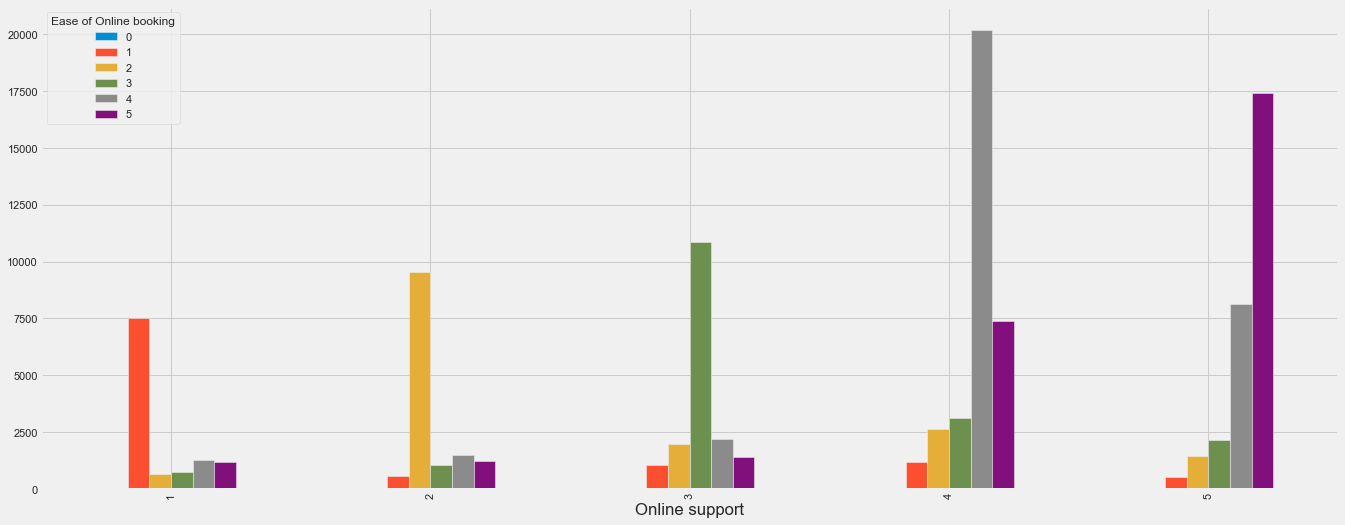

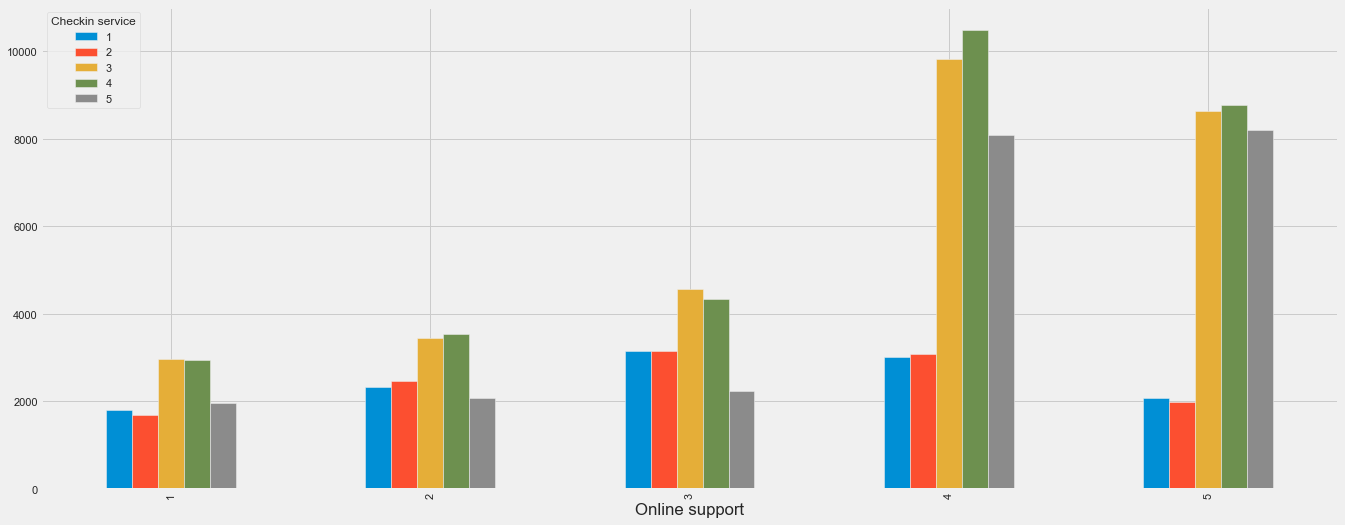

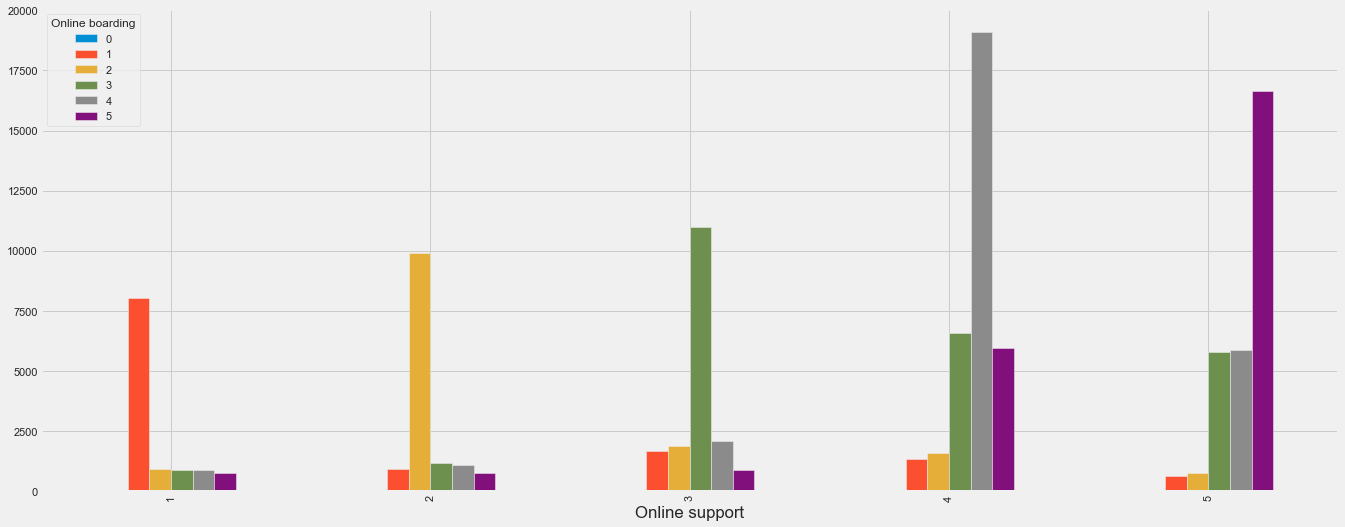

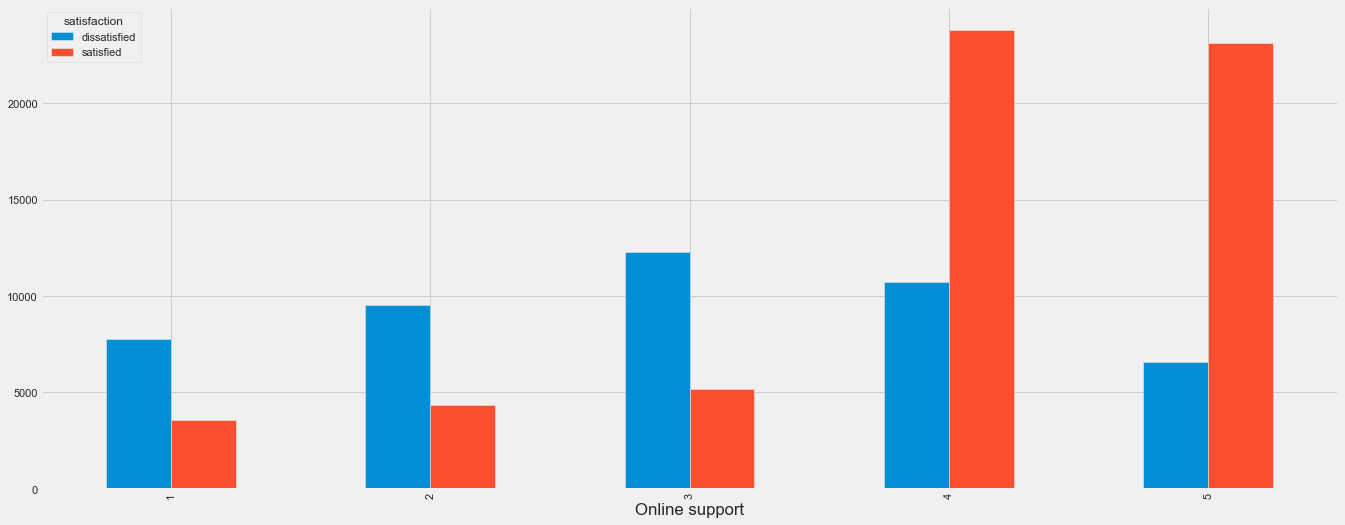

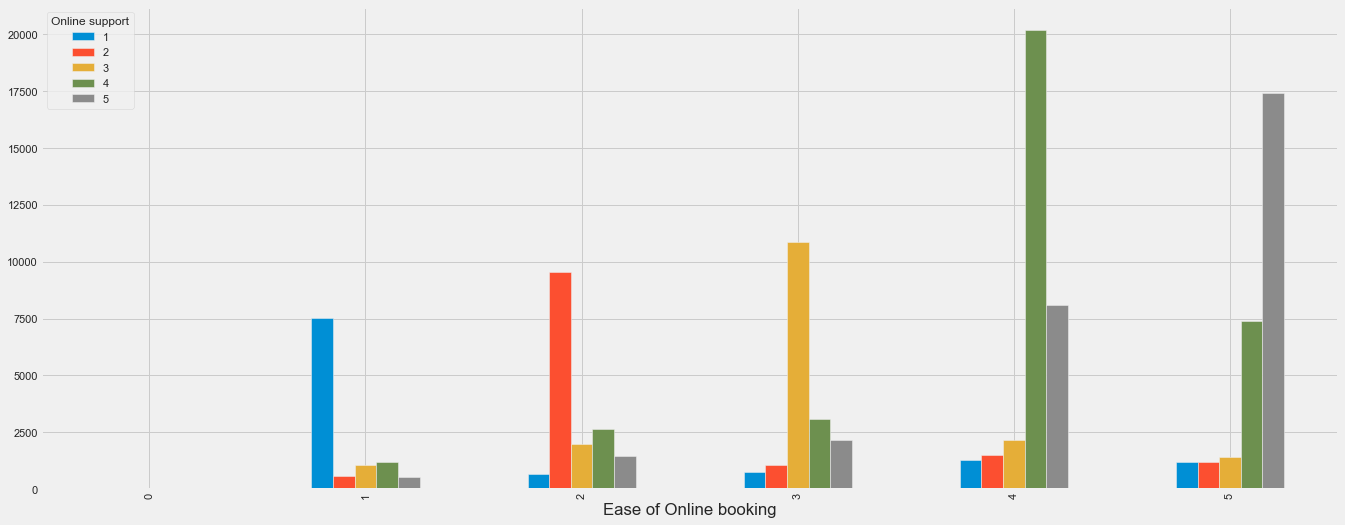

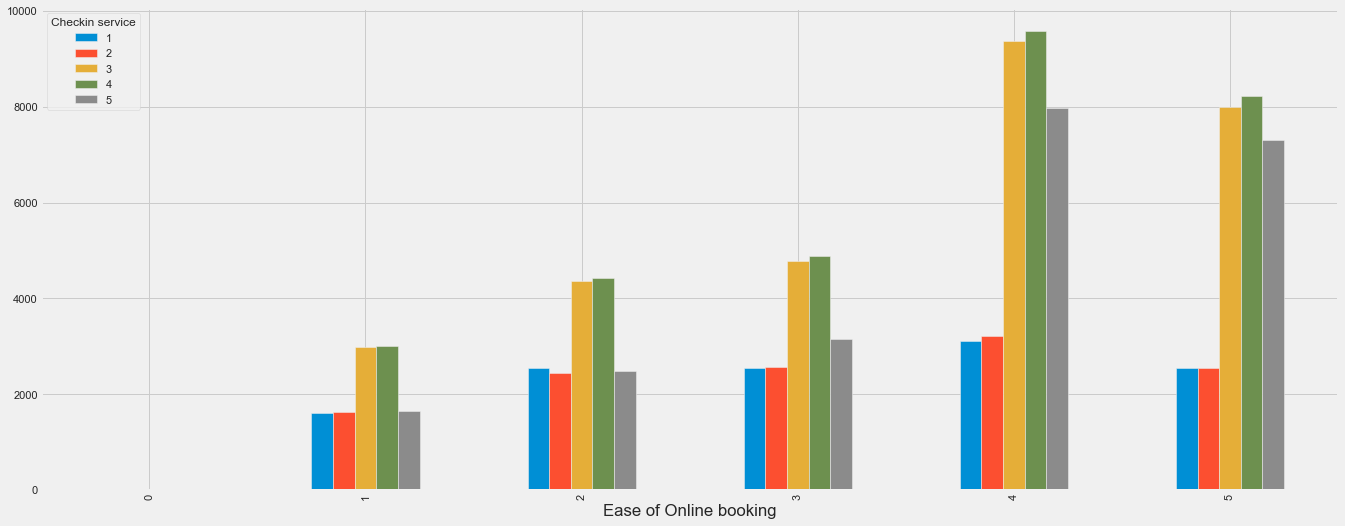

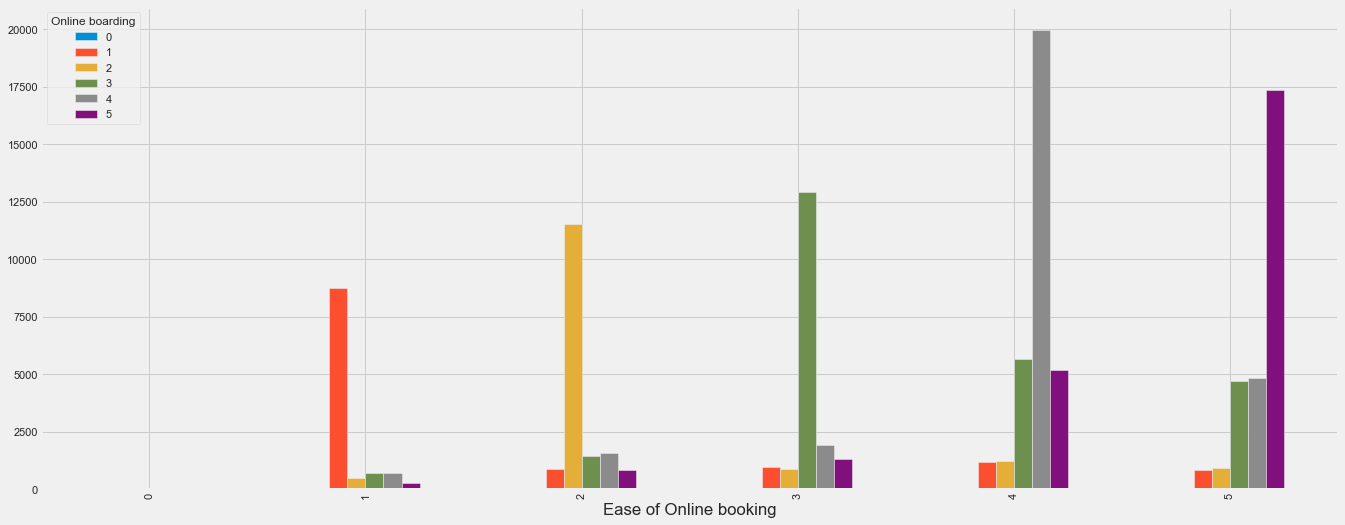

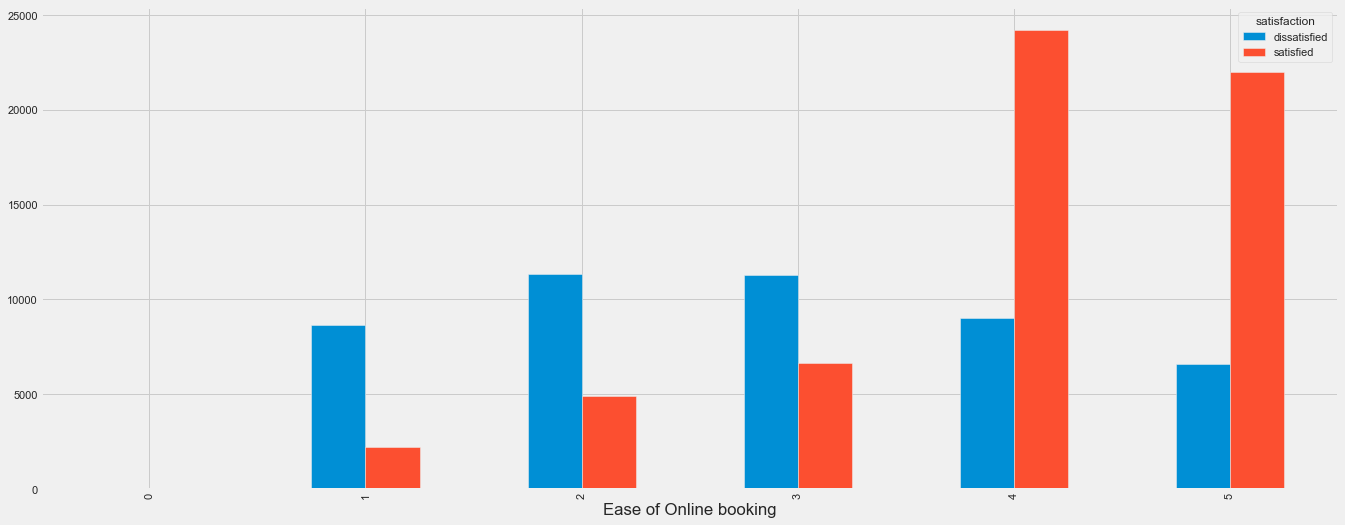

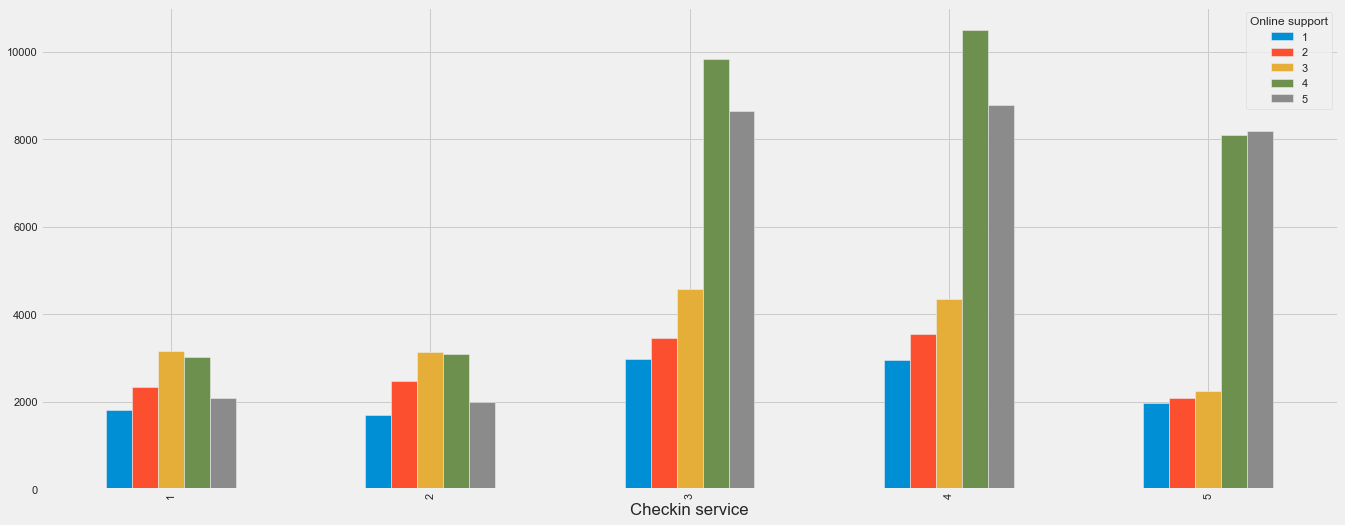

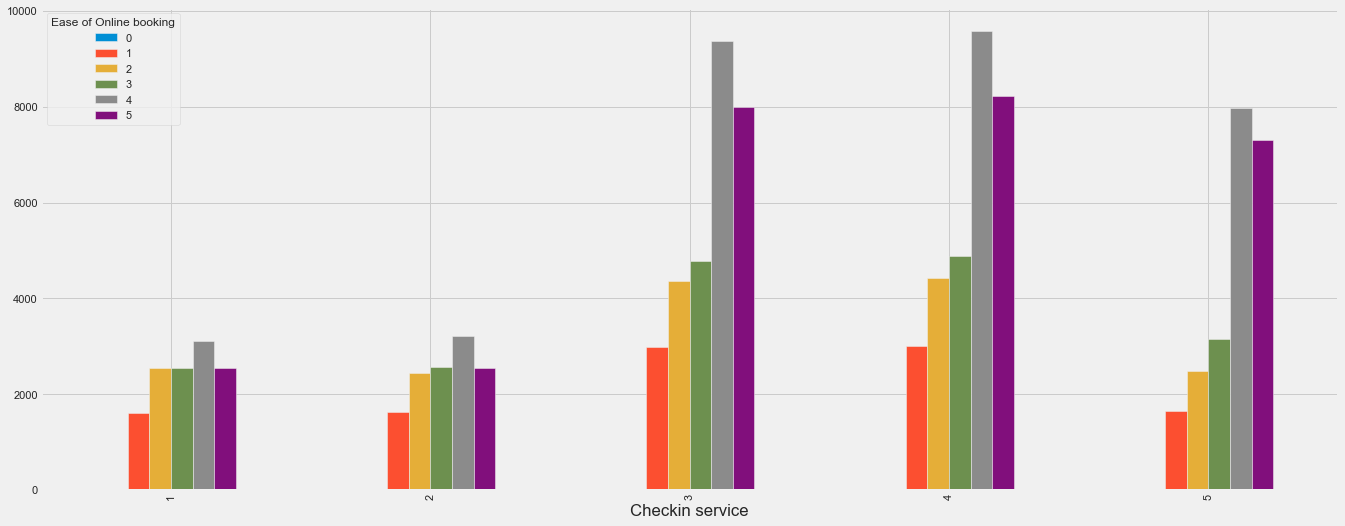

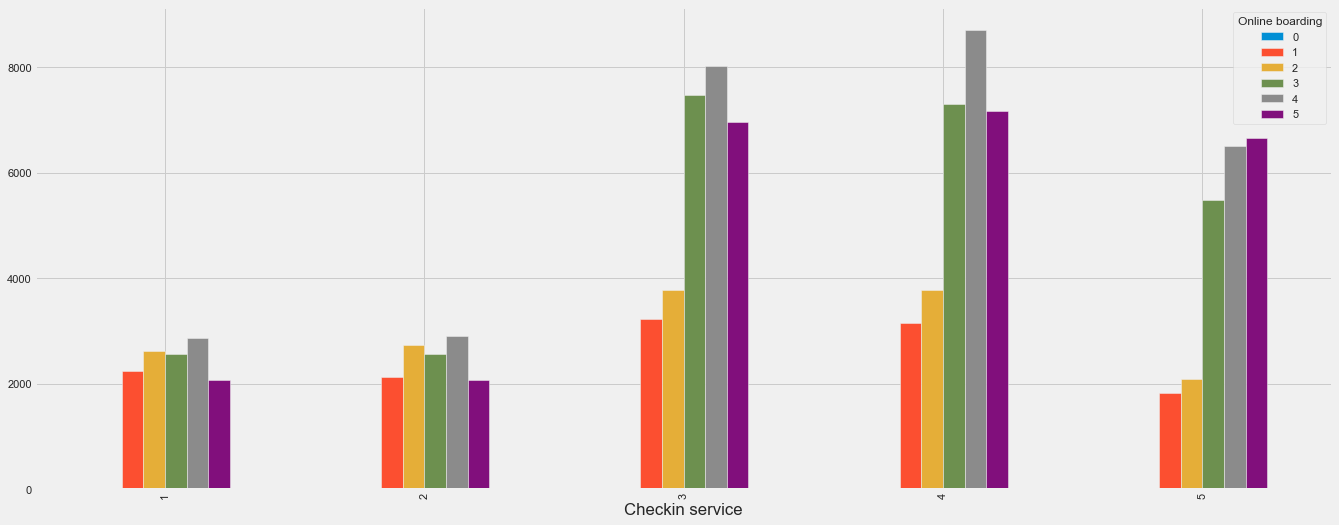

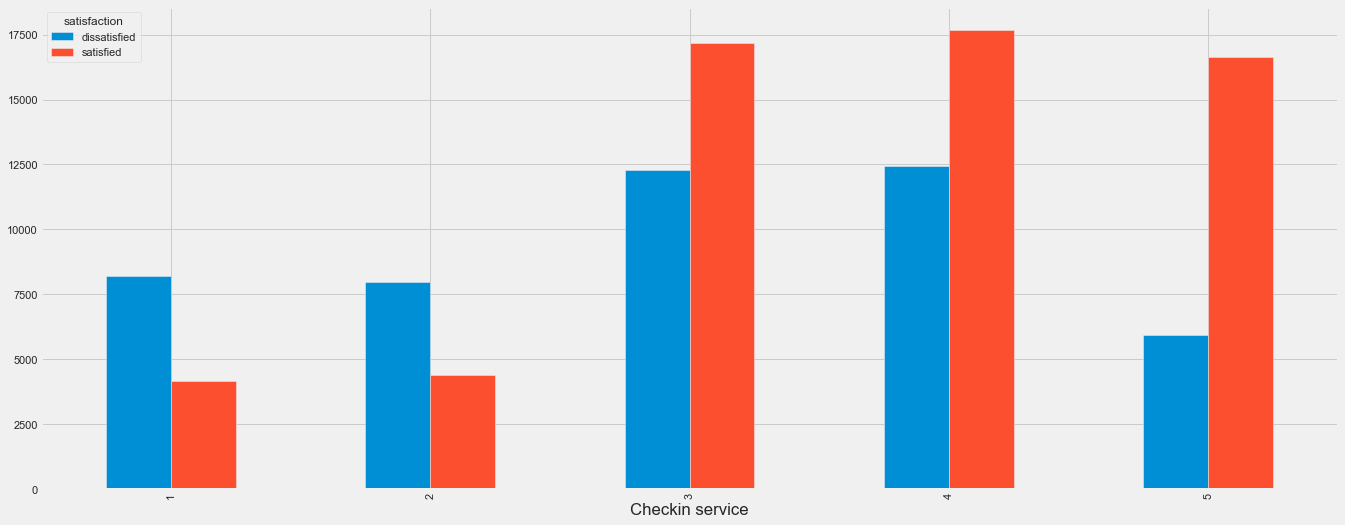

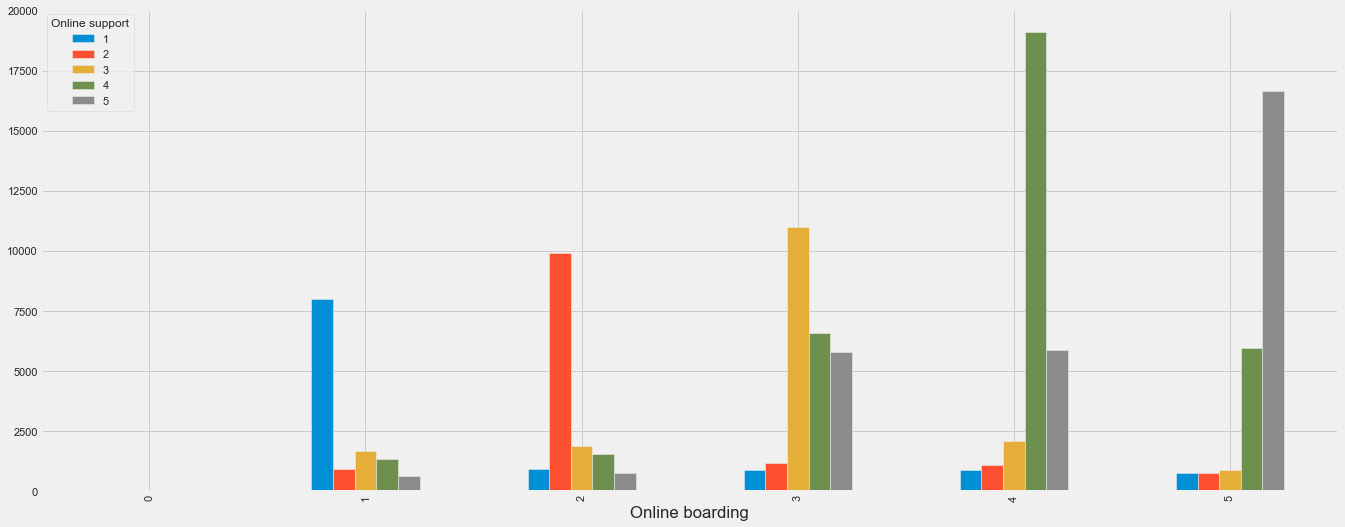

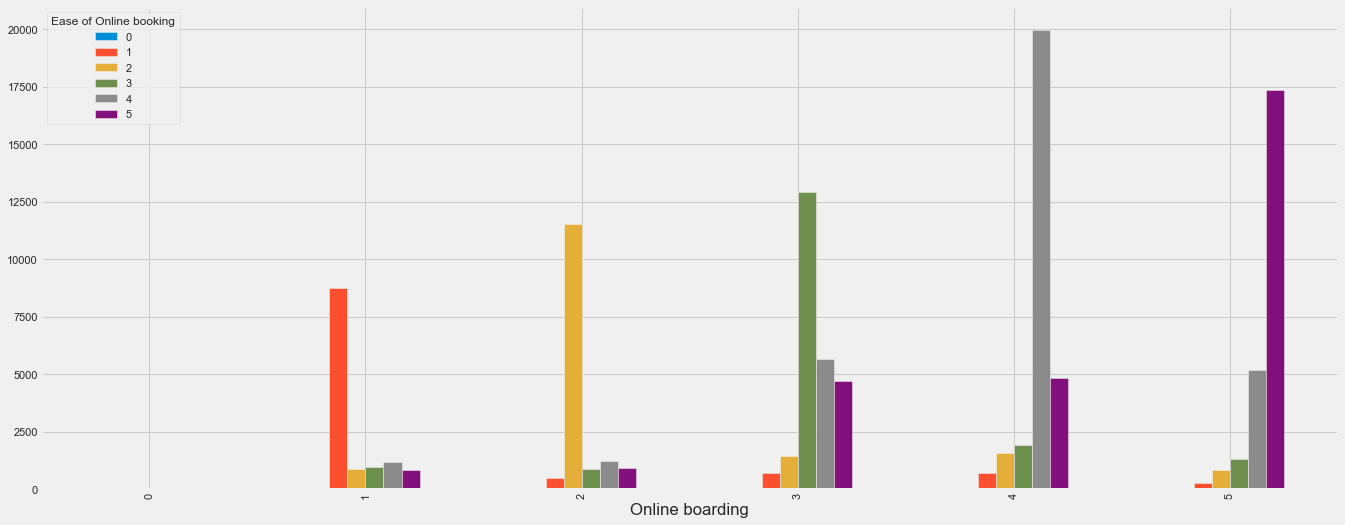

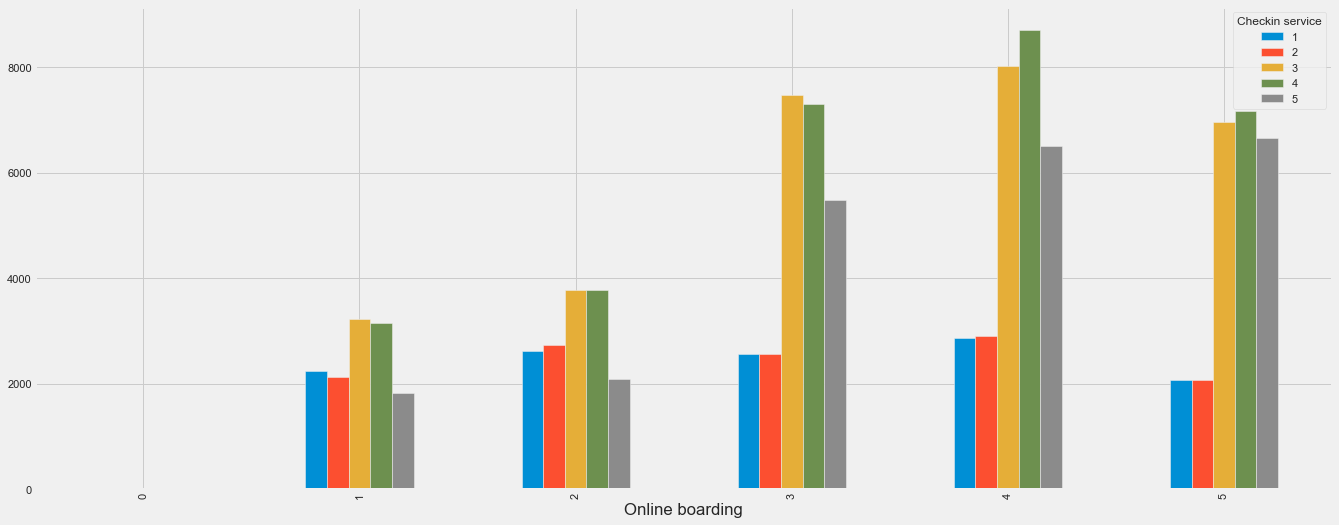

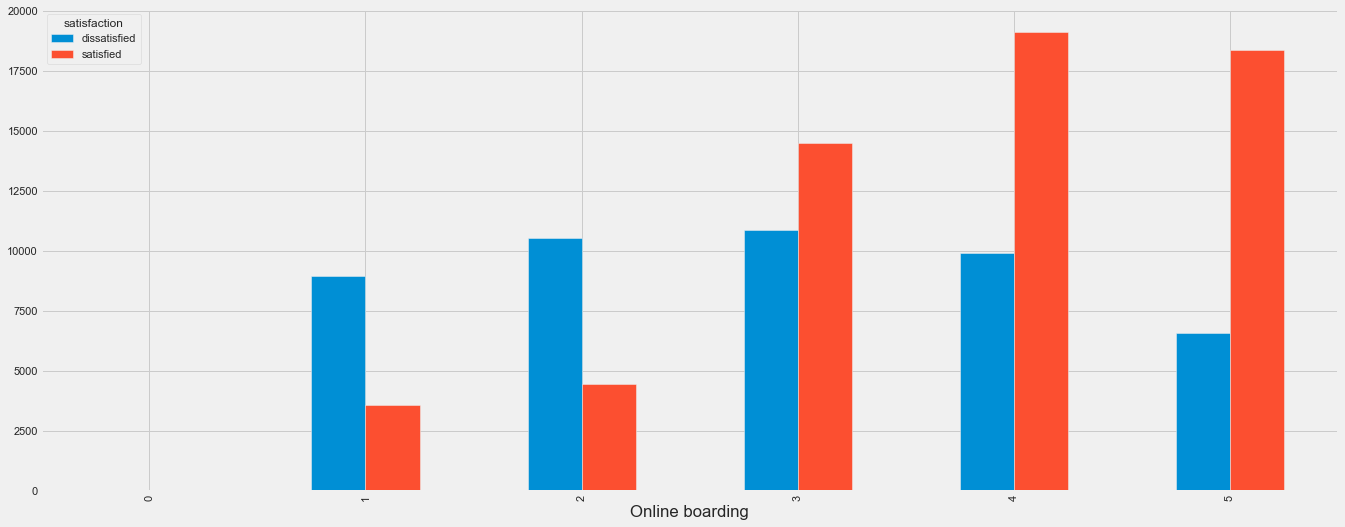

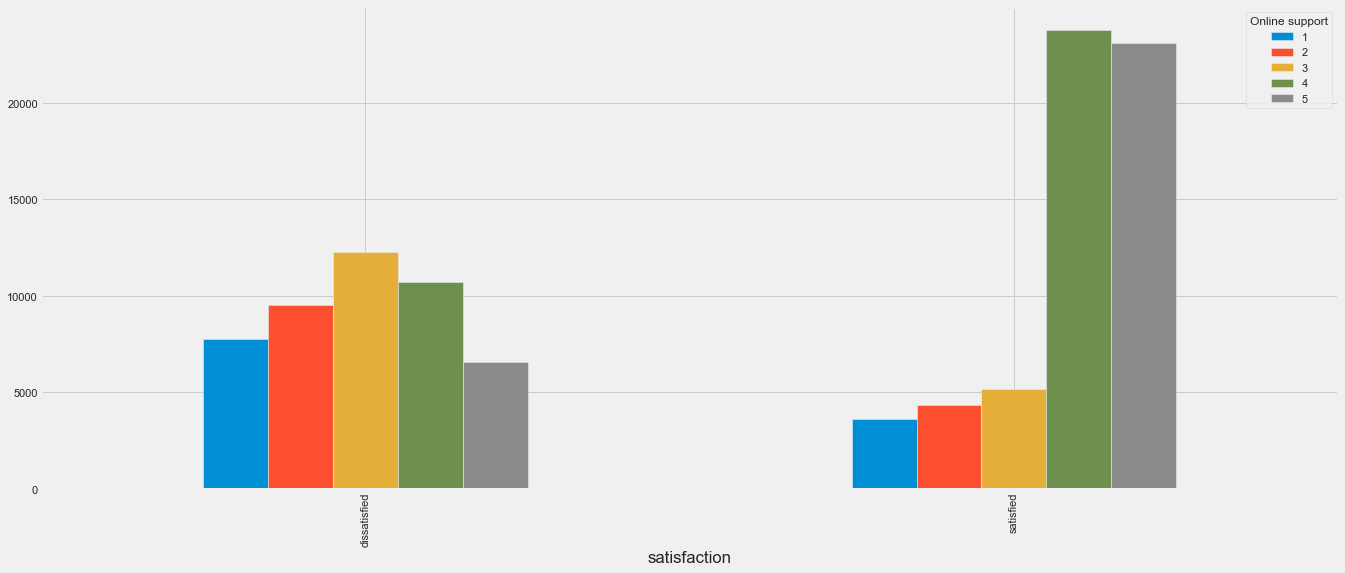

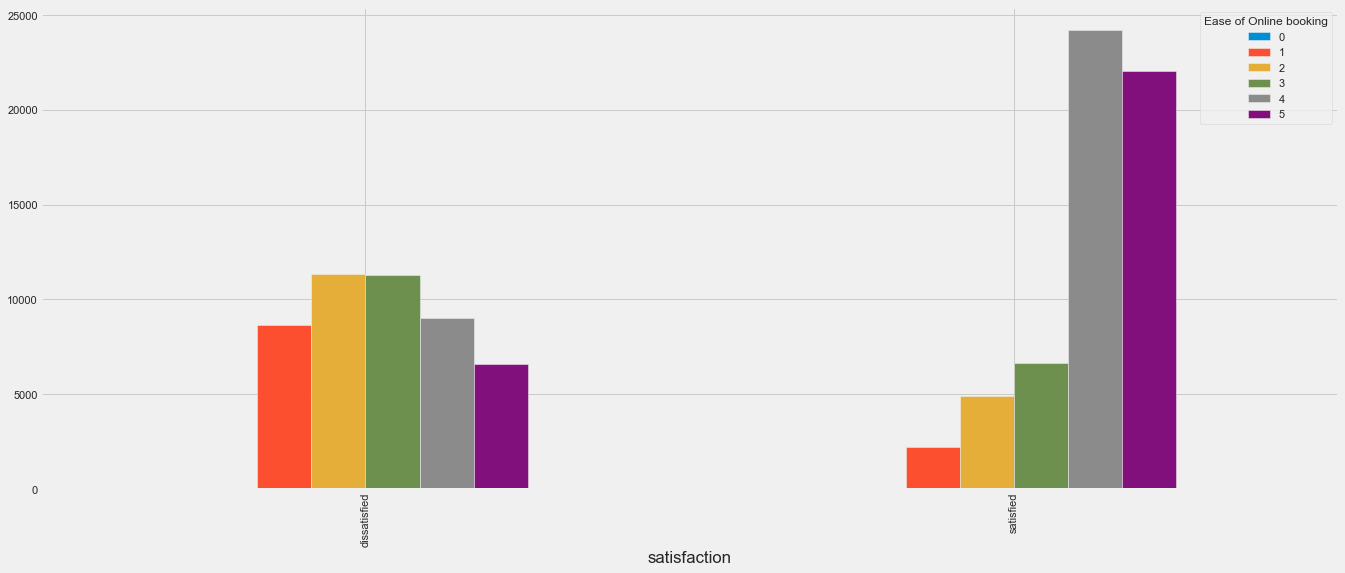

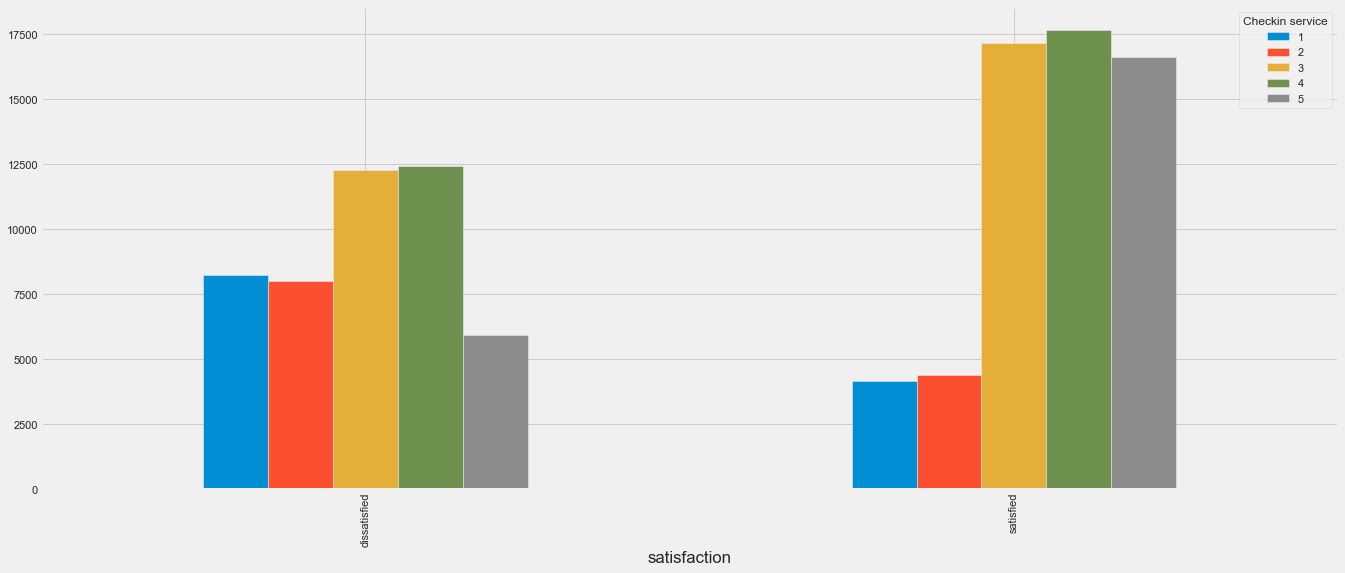

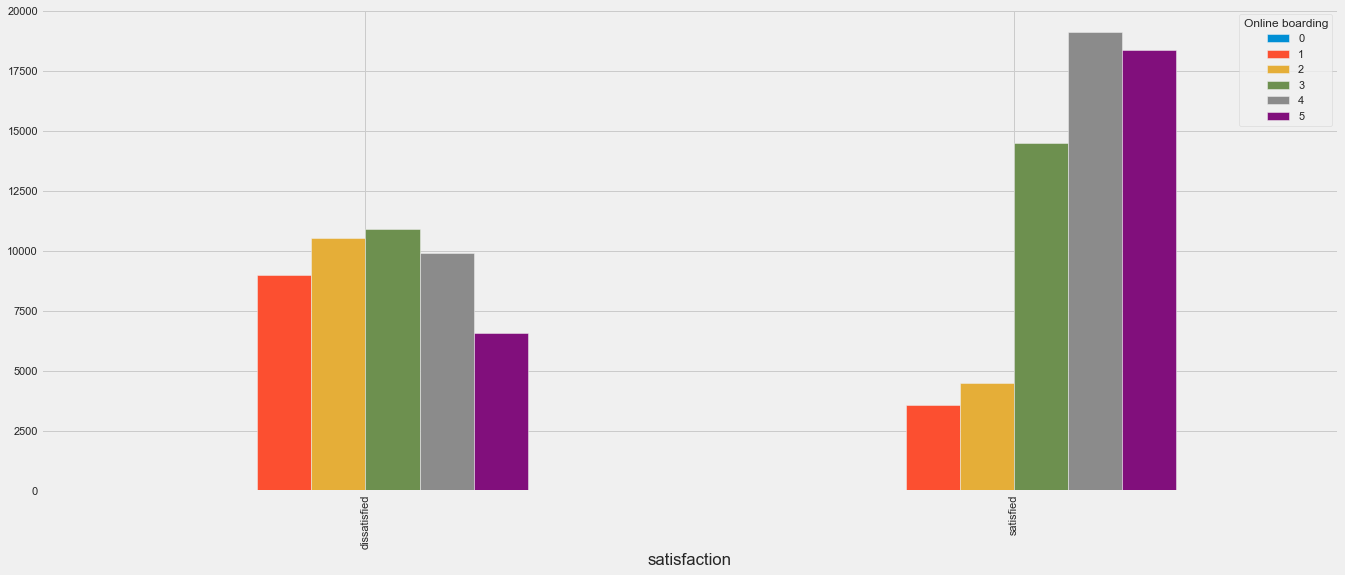

In [112]:
for var1 in bookgrp:
    for var2 in bookgrp:
        if (var1!=var2):
            df.groupby(var1)[var2].value_counts().unstack().plot.bar()
            plt.show()

In [113]:
time_Convenient = df.groupby(['satisfaction','Online boarding']).agg({'Checkin service':'count'})
time_Convenient_pcts = time_Convenient.groupby(level=1).apply(lambda x:100 * x / (x.sum()))
time_Convenient_pcts

Checkin service
satisfaction Online boarding                 
dissatisfied 0                     100.000000
             1                      71.526450
             2                      70.143286
             3                      42.892022
             4                      34.094431
             5                      26.348098
satisfied    1                      28.473550
             2                      29.856714
             3                      57.107978
             4                      65.905569
             5                      73.651902

### Conclusion

Berdasarkan plot diatas, semua fitur cukup dapat membedakan mana customer yang satisfied dan disastisfied. <br>
Sehingga semua fitur digunakan lagi untuk pemodelan

# Stage 3

In [114]:
train = df.copy()

In [115]:
def new_Flight_Distance (x):
    if x['Flight Distance'] < 1200:
        new_Flight_Distance = '1'
    elif x['Flight Distance'] >= 1200 and x['Flight Distance'] <= 2350:
        new_Flight_Distance = '2'
    else :
        new_Flight_Distance = '3'
    return new_Flight_Distance

In [116]:
train['new_Flight_Distance'] = train.apply(lambda x : new_Flight_Distance(x), axis=1)
train['new_Flight_Distance'] = train['new_Flight_Distance'].astype('int64')

In [117]:
# Pengelompokan Departure Delay in Minutes menjadi 2 kategori:
# 0 = No Delay
# 1 = Delay

def new_Departure_Delay (x):
    if x ['Departure Delay in Minutes'] == 0:
        new_Departure_Delay = 0
    else :
        new_Departure_Delay = 1
    return new_Departure_Delay

In [118]:
train['is_Departure_Delay'] = train.apply(lambda x : new_Departure_Delay(x), axis=1)

In [119]:
# Pengelompokan Departure Delay in Minutes menjadi 2 kategori:
# 0 = No Delay
# 1 = Delay

def new_Arrival_Delay (x):
    if x ['Arrival Delay in Minutes'] == 0:
        new_Arrival_Delay = '0'
    else :
        new_Arrival_Delay = 1
    return new_Arrival_Delay

In [120]:
train['is_Arrival_Delay'] = train.apply(lambda x : new_Departure_Delay(x), axis=1)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       106922 non-null  object 
 1   Gender                             106922 non-null  object 
 2   Customer Type                      106922 non-null  object 
 3   Age                                106922 non-null  int64  
 4   Type of Travel                     106922 non-null  object 
 5   Class                              106922 non-null  object 
 6   Flight Distance                    106922 non-null  int64  
 7   Seat comfort                       106922 non-null  int64  
 8   Departure/Arrival time convenient  106922 non-null  int64  
 9   Food and drink                     106922 non-null  int64  
 10  Gate location                      106922 non-null  int64  
 11  Inflight wifi service              1069

In [122]:
train = train[['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel','Class', 'Seat comfort',
              'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
              'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 
              'Online boarding', 'new_Flight_Distance', 'is_Departure_Delay',
              'is_Arrival_Delay']]

In [123]:
train.head()

satisfaction  Gender  ... is_Departure_Delay  is_Arrival_Delay
0    satisfied  Female  ...                  0                 0
2    satisfied  Female  ...                  0                 0
3    satisfied  Female  ...                  0                 0
4    satisfied  Female  ...                  0                 0
5    satisfied    Male  ...                  0                 0

[5 rows x 20 columns]

In [124]:
train['satisfaction'] = train['satisfaction'].apply(lambda x : 1 if x == 'satisfied' else 0)
train['Gender'] = train['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
train['Customer Type'] = train['Customer Type'].apply(lambda x : 1 if x == 'Loyal Customer' else 0)
train['Type of Travel'] = train['Type of Travel'].apply(lambda x : 1 if x == 'Personal Travel' else 0)
train['Class'] = train['Class'].apply(lambda x : 0 if x == 'Eco' else 1 if x == 'Eco Plus' else 2)

<AxesSubplot:>

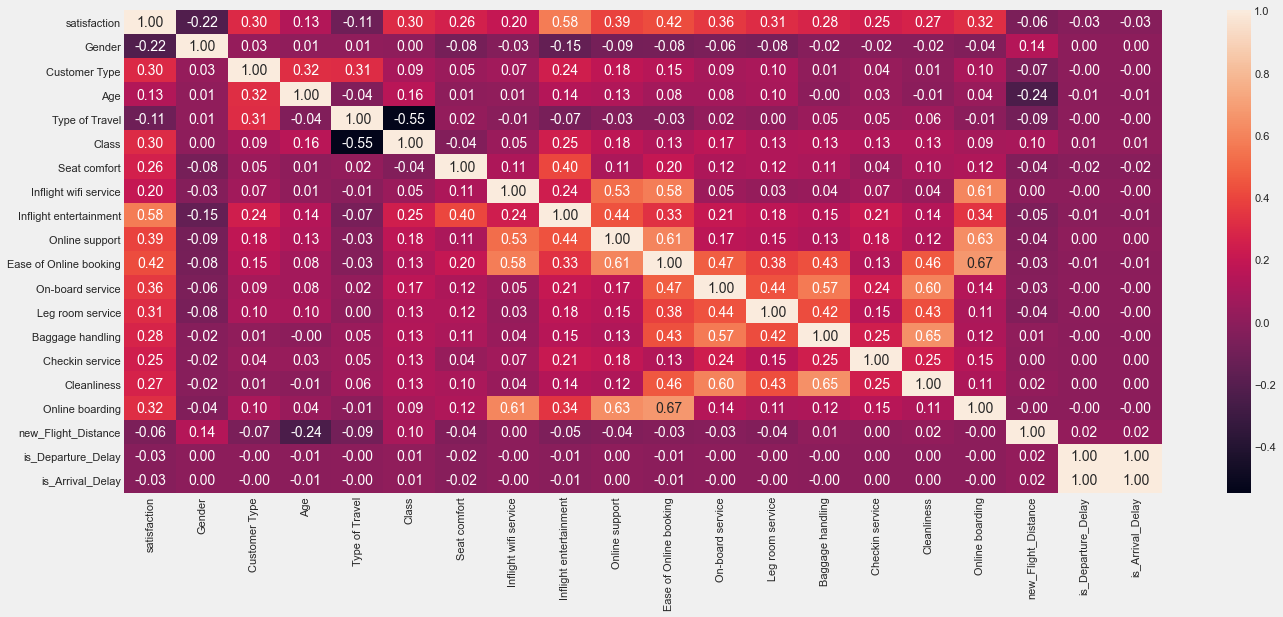

In [125]:
sns.heatmap(train.corr(method='spearman'), annot=True, fmt='.2f')

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score

In [129]:
table_comparison = pd.DataFrame()

### Decision Tree

In [130]:
from sklearn import tree

In [131]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [132]:
y_predict = clf.predict(X_test)

In [133]:
print('Train set:\n') #performance on training set
y_predict = clf.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31378
           1       1.00      1.00      1.00     40259

    accuracy                           1.00     71637
   macro avg       1.00      1.00      1.00     71637
weighted avg       1.00      1.00      1.00     71637


Test set:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15494
           1       0.94      0.94      0.94     19791

    accuracy                           0.93     35285
   macro avg       0.93      0.93      0.93     35285
weighted avg       0.93      0.93      0.93     35285



In [134]:
confusion_matrix(y_test, y_predict)

array([[14258,  1236],
       [ 1189, 18602]], dtype=int64)

[]

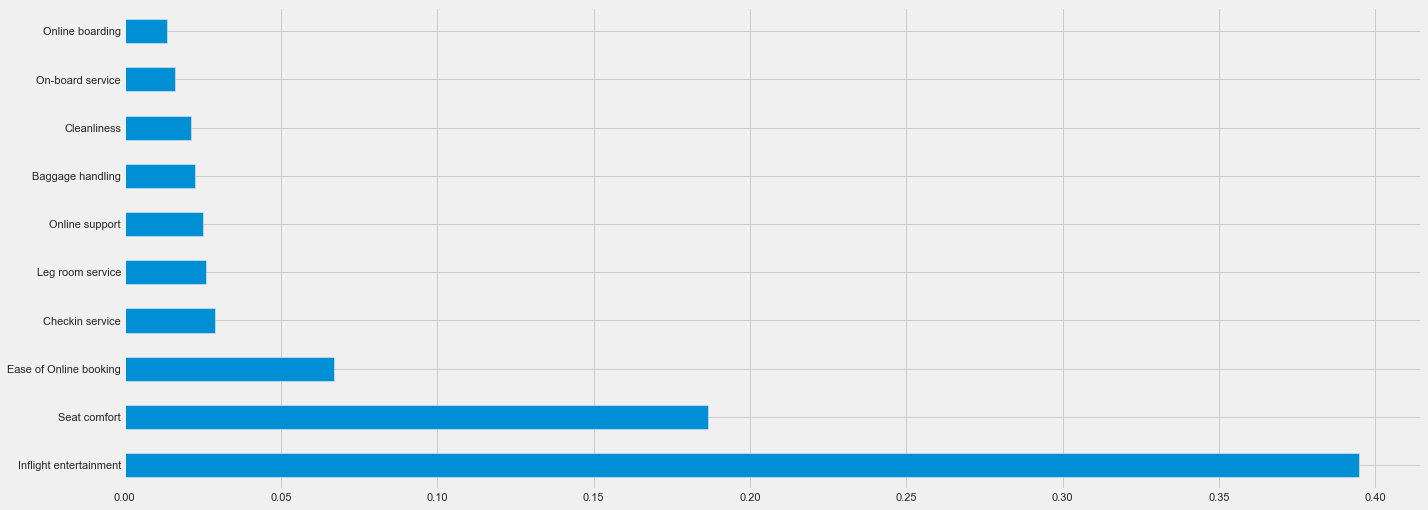

In [135]:
rating_importances = pd.Series(clf.feature_importances_,index=X_train.columns)
rating_service = [i for i in X_train.columns if i in rating]
rating_importances.loc[rating_service].nlargest(10).plot(kind='barh')
plt.plot()

In [136]:
dicts = {'Model_Name': 'Decision Tree', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : list(rating_importances.loc[rating_service].nlargest(5).keys())
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### Cat Boost

In [137]:
from catboost import CatBoostClassifier

In [138]:
catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)

Learning rate set to 0.063838
0:	learn: 0.6166827	total: 243ms	remaining: 4m 2s
1:	learn: 0.5579215	total: 306ms	remaining: 2m 32s
2:	learn: 0.5111343	total: 360ms	remaining: 1m 59s
3:	learn: 0.4697822	total: 406ms	remaining: 1m 41s
4:	learn: 0.4406272	total: 472ms	remaining: 1m 34s
5:	learn: 0.4136049	total: 509ms	remaining: 1m 24s
6:	learn: 0.3931729	total: 545ms	remaining: 1m 17s
7:	learn: 0.3752652	total: 597ms	remaining: 1m 14s
8:	learn: 0.3581568	total: 620ms	remaining: 1m 8s
9:	learn: 0.3404899	total: 646ms	remaining: 1m 3s
10:	learn: 0.3291199	total: 666ms	remaining: 59.9s
11:	learn: 0.3101035	total: 699ms	remaining: 57.5s
12:	learn: 0.3011312	total: 726ms	remaining: 55.1s
13:	learn: 0.2934563	total: 760ms	remaining: 53.5s
14:	learn: 0.2839033	total: 801ms	remaining: 52.6s
15:	learn: 0.2751862	total: 848ms	remaining: 52.1s
16:	learn: 0.2664150	total: 895ms	remaining: 51.7s
17:	learn: 0.2606401	total: 1.03s	remaining: 56.1s
18:	learn: 0.2561170	total: 1.12s	remaining: 57.8s
19:	

167:	learn: 0.1272294	total: 7.87s	remaining: 39s
168:	learn: 0.1271139	total: 7.91s	remaining: 38.9s
169:	learn: 0.1269764	total: 7.96s	remaining: 38.9s
170:	learn: 0.1267169	total: 8.01s	remaining: 38.8s
171:	learn: 0.1265677	total: 8.03s	remaining: 38.7s
172:	learn: 0.1264572	total: 8.07s	remaining: 38.6s
173:	learn: 0.1262738	total: 8.12s	remaining: 38.6s
174:	learn: 0.1261183	total: 8.15s	remaining: 38.4s
175:	learn: 0.1260048	total: 8.18s	remaining: 38.3s
176:	learn: 0.1258822	total: 8.21s	remaining: 38.2s
177:	learn: 0.1255369	total: 8.24s	remaining: 38s
178:	learn: 0.1250026	total: 8.27s	remaining: 37.9s
179:	learn: 0.1247940	total: 8.3s	remaining: 37.8s
180:	learn: 0.1246796	total: 8.33s	remaining: 37.7s
181:	learn: 0.1245109	total: 8.36s	remaining: 37.6s
182:	learn: 0.1242610	total: 8.38s	remaining: 37.4s
183:	learn: 0.1240929	total: 8.4s	remaining: 37.3s
184:	learn: 0.1238665	total: 8.43s	remaining: 37.1s
185:	learn: 0.1237030	total: 8.45s	remaining: 37s
186:	learn: 0.123522

330:	learn: 0.1055223	total: 12.5s	remaining: 25.2s
331:	learn: 0.1054653	total: 12.5s	remaining: 25.2s
332:	learn: 0.1053903	total: 12.5s	remaining: 25.1s
333:	learn: 0.1053411	total: 12.6s	remaining: 25.1s
334:	learn: 0.1053047	total: 12.6s	remaining: 25s
335:	learn: 0.1052311	total: 12.6s	remaining: 24.9s
336:	learn: 0.1051493	total: 12.6s	remaining: 24.8s
337:	learn: 0.1050894	total: 12.6s	remaining: 24.8s
338:	learn: 0.1050447	total: 12.7s	remaining: 24.7s
339:	learn: 0.1050145	total: 12.7s	remaining: 24.6s
340:	learn: 0.1049652	total: 12.7s	remaining: 24.6s
341:	learn: 0.1049227	total: 12.7s	remaining: 24.5s
342:	learn: 0.1048649	total: 12.8s	remaining: 24.4s
343:	learn: 0.1048046	total: 12.8s	remaining: 24.4s
344:	learn: 0.1047256	total: 12.8s	remaining: 24.3s
345:	learn: 0.1046992	total: 12.8s	remaining: 24.2s
346:	learn: 0.1046381	total: 12.8s	remaining: 24.2s
347:	learn: 0.1045565	total: 12.9s	remaining: 24.1s
348:	learn: 0.1045119	total: 12.9s	remaining: 24s
349:	learn: 0.10

494:	learn: 0.0966508	total: 16.9s	remaining: 17.2s
495:	learn: 0.0965946	total: 16.9s	remaining: 17.2s
496:	learn: 0.0965736	total: 17s	remaining: 17.2s
497:	learn: 0.0965380	total: 17s	remaining: 17.1s
498:	learn: 0.0964708	total: 17s	remaining: 17.1s
499:	learn: 0.0964513	total: 17.1s	remaining: 17.1s
500:	learn: 0.0963332	total: 17.1s	remaining: 17s
501:	learn: 0.0963009	total: 17.1s	remaining: 17s
502:	learn: 0.0962850	total: 17.1s	remaining: 16.9s
503:	learn: 0.0962412	total: 17.2s	remaining: 16.9s
504:	learn: 0.0962242	total: 17.2s	remaining: 16.8s
505:	learn: 0.0961288	total: 17.2s	remaining: 16.8s
506:	learn: 0.0960708	total: 17.2s	remaining: 16.7s
507:	learn: 0.0960557	total: 17.2s	remaining: 16.7s
508:	learn: 0.0959998	total: 17.3s	remaining: 16.6s
509:	learn: 0.0959598	total: 17.3s	remaining: 16.6s
510:	learn: 0.0959310	total: 17.3s	remaining: 16.6s
511:	learn: 0.0958578	total: 17.3s	remaining: 16.5s
512:	learn: 0.0958404	total: 17.4s	remaining: 16.5s
513:	learn: 0.0957984	

656:	learn: 0.0903844	total: 21.9s	remaining: 11.4s
657:	learn: 0.0903401	total: 21.9s	remaining: 11.4s
658:	learn: 0.0903229	total: 21.9s	remaining: 11.4s
659:	learn: 0.0903145	total: 22s	remaining: 11.3s
660:	learn: 0.0902706	total: 22s	remaining: 11.3s
661:	learn: 0.0902277	total: 22s	remaining: 11.3s
662:	learn: 0.0901966	total: 22.1s	remaining: 11.2s
663:	learn: 0.0901498	total: 22.1s	remaining: 11.2s
664:	learn: 0.0901093	total: 22.1s	remaining: 11.1s
665:	learn: 0.0900854	total: 22.1s	remaining: 11.1s
666:	learn: 0.0900471	total: 22.2s	remaining: 11.1s
667:	learn: 0.0900186	total: 22.2s	remaining: 11s
668:	learn: 0.0899977	total: 22.2s	remaining: 11s
669:	learn: 0.0899513	total: 22.2s	remaining: 11s
670:	learn: 0.0899120	total: 22.3s	remaining: 10.9s
671:	learn: 0.0898688	total: 22.3s	remaining: 10.9s
672:	learn: 0.0898507	total: 22.3s	remaining: 10.8s
673:	learn: 0.0898133	total: 22.4s	remaining: 10.8s
674:	learn: 0.0897648	total: 22.4s	remaining: 10.8s
675:	learn: 0.0897224	to

818:	learn: 0.0849892	total: 26.2s	remaining: 5.79s
819:	learn: 0.0849789	total: 26.2s	remaining: 5.75s
820:	learn: 0.0849451	total: 26.2s	remaining: 5.72s
821:	learn: 0.0849180	total: 26.3s	remaining: 5.69s
822:	learn: 0.0848824	total: 26.3s	remaining: 5.65s
823:	learn: 0.0848663	total: 26.3s	remaining: 5.62s
824:	learn: 0.0848227	total: 26.3s	remaining: 5.58s
825:	learn: 0.0848007	total: 26.4s	remaining: 5.55s
826:	learn: 0.0847560	total: 26.4s	remaining: 5.52s
827:	learn: 0.0847287	total: 26.4s	remaining: 5.48s
828:	learn: 0.0847053	total: 26.4s	remaining: 5.45s
829:	learn: 0.0846857	total: 26.4s	remaining: 5.42s
830:	learn: 0.0846359	total: 26.5s	remaining: 5.38s
831:	learn: 0.0846018	total: 26.5s	remaining: 5.35s
832:	learn: 0.0845689	total: 26.5s	remaining: 5.32s
833:	learn: 0.0845378	total: 26.6s	remaining: 5.29s
834:	learn: 0.0845121	total: 26.6s	remaining: 5.25s
835:	learn: 0.0844779	total: 26.6s	remaining: 5.22s
836:	learn: 0.0844284	total: 26.7s	remaining: 5.19s
837:	learn: 

984:	learn: 0.0805351	total: 30.3s	remaining: 462ms
985:	learn: 0.0805269	total: 30.3s	remaining: 431ms
986:	learn: 0.0805071	total: 30.4s	remaining: 400ms
987:	learn: 0.0804830	total: 30.4s	remaining: 369ms
988:	learn: 0.0804599	total: 30.4s	remaining: 339ms
989:	learn: 0.0804529	total: 30.5s	remaining: 308ms
990:	learn: 0.0804265	total: 30.5s	remaining: 277ms
991:	learn: 0.0804046	total: 30.5s	remaining: 246ms
992:	learn: 0.0803853	total: 30.5s	remaining: 215ms
993:	learn: 0.0803508	total: 30.6s	remaining: 185ms
994:	learn: 0.0803124	total: 30.6s	remaining: 154ms
995:	learn: 0.0802856	total: 30.6s	remaining: 123ms
996:	learn: 0.0802779	total: 30.7s	remaining: 92.2ms
997:	learn: 0.0802548	total: 30.7s	remaining: 61.5ms
998:	learn: 0.0802182	total: 30.7s	remaining: 30.7ms
999:	learn: 0.0801985	total: 30.7s	remaining: 0us


In [139]:
print('Train set:\n') #performance on training set
y_predict = catboost.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = catboost.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     31378
           1       0.98      0.97      0.97     40259

    accuracy                           0.97     71637
   macro avg       0.97      0.97      0.97     71637
weighted avg       0.97      0.97      0.97     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15494
           1       0.96      0.95      0.96     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [140]:
confusion_matrix(y_test, y_predict)

array([[14803,   691],
       [  963, 18828]], dtype=int64)

[]

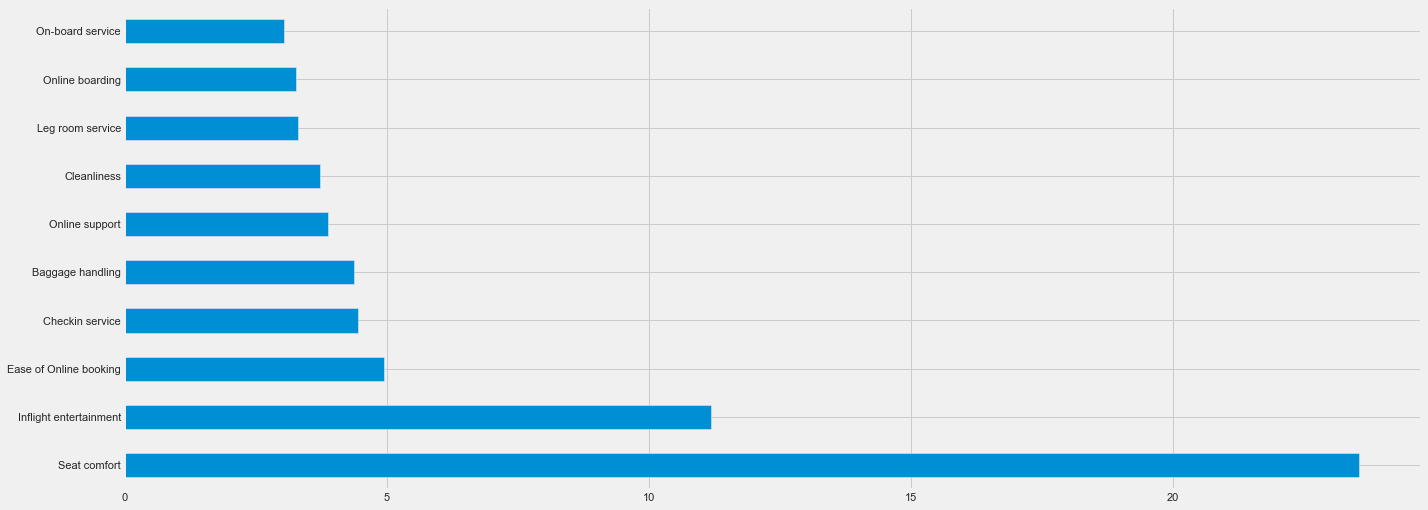

In [141]:
rating_importances = pd.Series(catboost.feature_importances_, index=X_train.columns)
rating_service = [i for i in X_train.columns if i in rating]
rating_importances.loc[rating_service].nlargest(10).plot(kind='barh')
plt.plot()

In [142]:
dicts = {'Model_Name': 'CatBoost', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : list(rating_importances.loc[rating_service].nlargest(5).keys())
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [144]:
print('Train set:\n') #performance on training set
y_predict = rf.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31378
           1       1.00      1.00      1.00     40259

    accuracy                           1.00     71637
   macro avg       1.00      1.00      1.00     71637
weighted avg       1.00      1.00      1.00     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15494
           1       0.96      0.95      0.95     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [145]:
confusion_matrix(y_test, y_predict)

array([[14687,   807],
       [  992, 18799]], dtype=int64)

[]

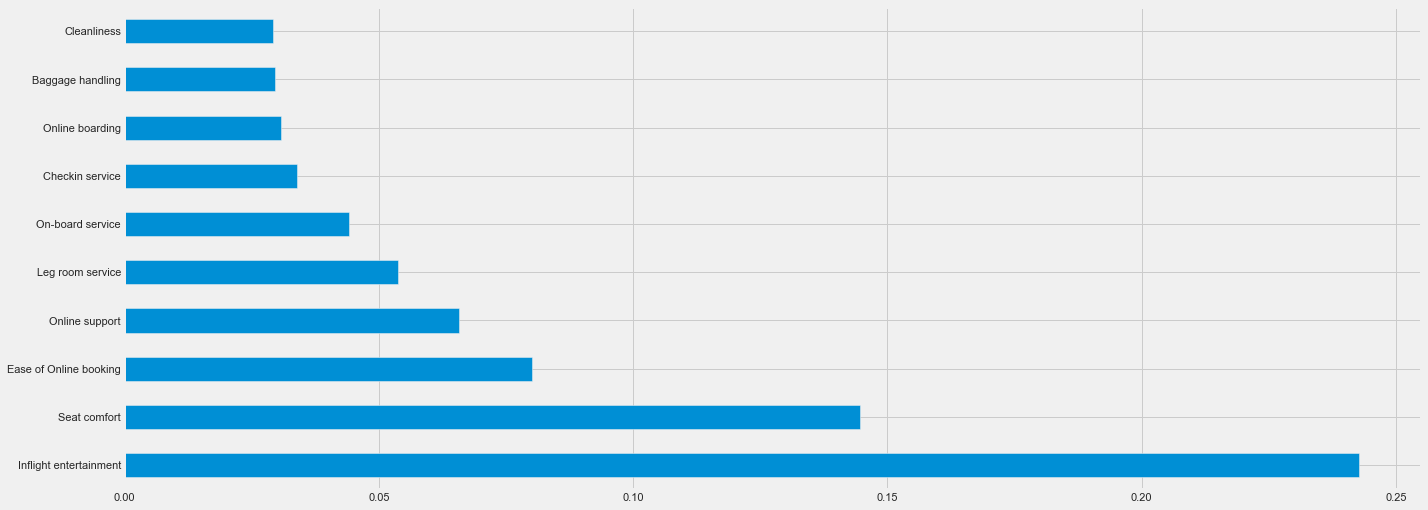

In [146]:
rating_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
rating_service = [i for i in X_train.columns if i in rating]
rating_importances.loc[rating_service].nlargest(10).plot(kind='barh')
plt.plot()

In [147]:
dicts = {'Model_Name': 'Random Forest', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : list(rating_importances.loc[rating_service].nlargest(5).keys())
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### AdaBoost

In [148]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [149]:
print('Train set:\n') #performance on training set
y_predict = ab.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = ab.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     31378
           1       0.91      0.90      0.91     40259

    accuracy                           0.89     71637
   macro avg       0.89      0.89      0.89     71637
weighted avg       0.89      0.89      0.89     71637


Test set:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     15494
           1       0.91      0.90      0.90     19791

    accuracy                           0.89     35285
   macro avg       0.89      0.89      0.89     35285
weighted avg       0.89      0.89      0.89     35285



In [150]:
confusion_matrix(y_test, y_predict)

array([[13677,  1817],
       [ 1965, 17826]], dtype=int64)

[]

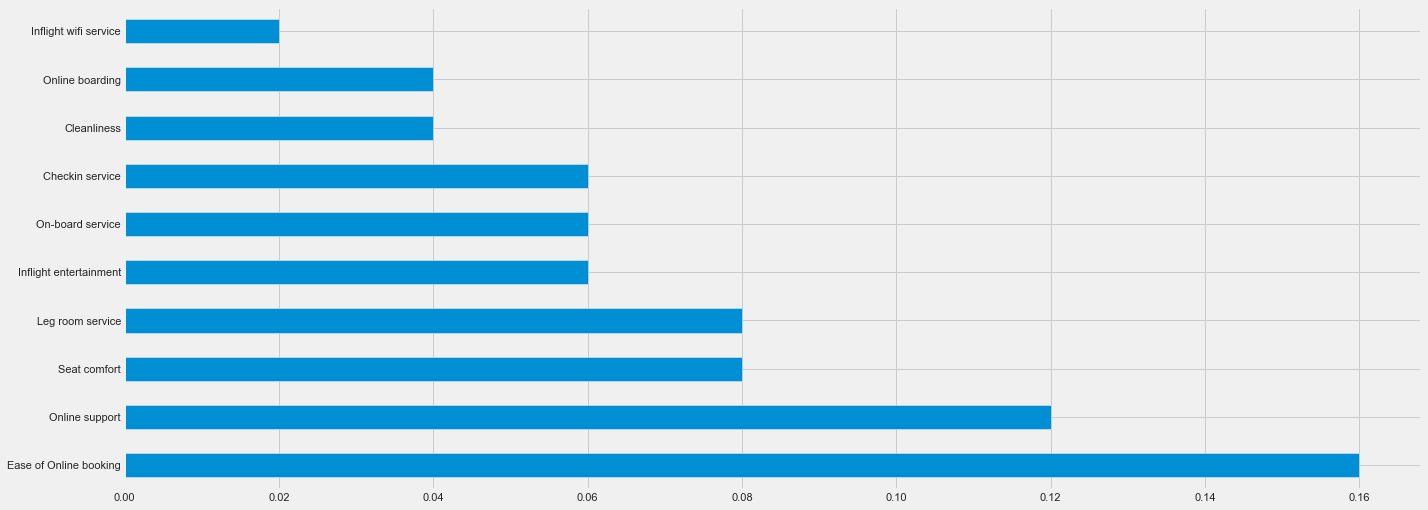

In [151]:
rating_importances = pd.Series(ab.feature_importances_,index=X_train.columns)
rating_service = [i for i in X_train.columns if i in rating]
rating_importances.loc[rating_service].nlargest(10).plot(kind='barh')
plt.plot()

In [152]:
dicts = {'Model_Name': 'AdaBoost', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : list(rating_importances.nlargest(5).keys())
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### XGBoost

In [153]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

[10:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
print('Train set:\n') #performance on training set
y_predict = xg.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = xg.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     31378
           1       0.97      0.96      0.97     40259

    accuracy                           0.97     71637
   macro avg       0.96      0.97      0.96     71637
weighted avg       0.97      0.97      0.97     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15494
           1       0.96      0.95      0.96     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [155]:
confusion_matrix(y_test, y_predict)

array([[14756,   738],
       [  980, 18811]], dtype=int64)

[]

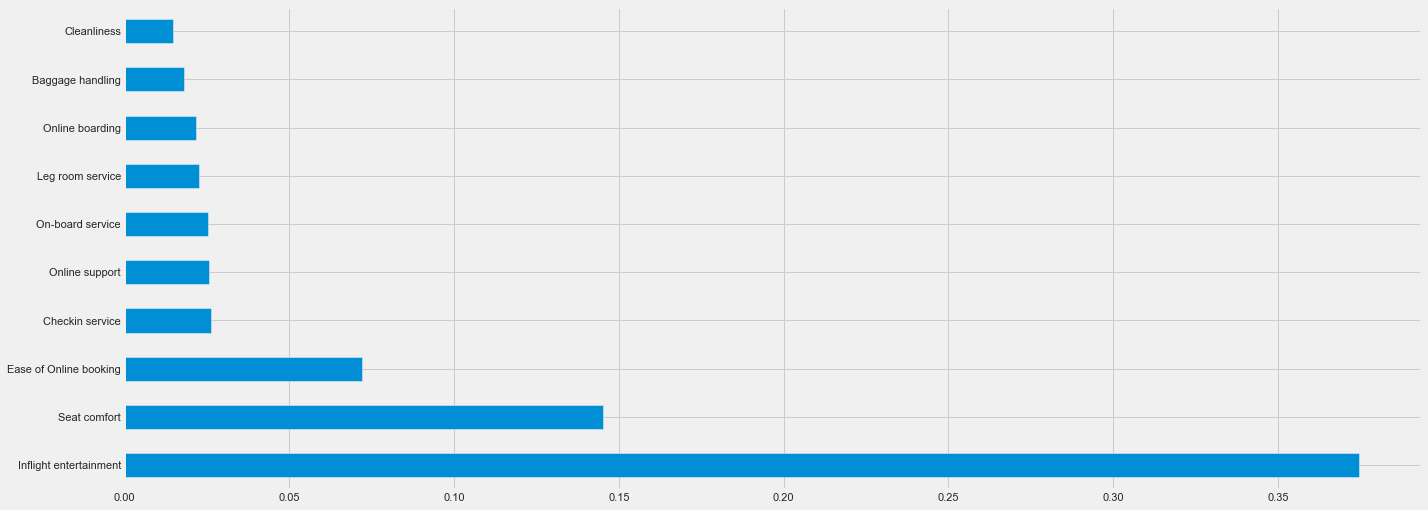

In [156]:
rating_importances = pd.Series(xg.feature_importances_,index=X_train.columns)
rating_service = [i for i in X_train.columns if i in rating]
rating_importances.loc[rating_service].nlargest(10).plot(kind='barh')
plt.plot()

In [157]:
dicts = {'Model_Name': 'XGBoost', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : list(rating_importances.loc[rating_service].nlargest(5).keys())
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

## Comparison Model

In [158]:
table_comparison = table_comparison[['Model_Name', 'Test_Accuracy', 'Test_Precision', 'Train_Accuracy', 'Train_Precision', 'Top_5_Features']]
table_comparison

Model_Name  ...                                     Top_5_Features
0  Decision Tree  ...  [Inflight entertainment, Seat comfort, Ease of...
1       CatBoost  ...  [Seat comfort, Inflight entertainment, Ease of...
2  Random Forest  ...  [Inflight entertainment, Seat comfort, Ease of...
3       AdaBoost  ...  [Ease of Online booking, Online support, Age, ...
4        XGBoost  ...  [Inflight entertainment, Seat comfort, Ease of...

[5 rows x 6 columns]

## Hypertuning

### Hypertuning CatBoost

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
params = {
    'learning_rate':[0.1,0.5,1],
    'depth':[2,3,4],
}
search=GridSearchCV(catboost,params)
search.fit(X_train,y_train)

0:	learn: 0.6387993	total: 15.7ms	remaining: 15.7s
1:	learn: 0.5855163	total: 29.9ms	remaining: 14.9s
2:	learn: 0.5495670	total: 47.8ms	remaining: 15.9s
3:	learn: 0.5230864	total: 70.6ms	remaining: 17.6s
4:	learn: 0.4994159	total: 86.5ms	remaining: 17.2s
5:	learn: 0.4822425	total: 99.3ms	remaining: 16.4s
6:	learn: 0.4614618	total: 115ms	remaining: 16.3s
7:	learn: 0.4460020	total: 129ms	remaining: 16s
8:	learn: 0.4313177	total: 146ms	remaining: 16.1s
9:	learn: 0.4158062	total: 166ms	remaining: 16.4s
10:	learn: 0.4068656	total: 181ms	remaining: 16.3s
11:	learn: 0.3982702	total: 196ms	remaining: 16.1s
12:	learn: 0.3904405	total: 211ms	remaining: 16s
13:	learn: 0.3844691	total: 227ms	remaining: 16s
14:	learn: 0.3755252	total: 244ms	remaining: 16s
15:	learn: 0.3699067	total: 257ms	remaining: 15.8s
16:	learn: 0.3642215	total: 270ms	remaining: 15.6s
17:	learn: 0.3558266	total: 284ms	remaining: 15.5s
18:	learn: 0.3514050	total: 296ms	remaining: 15.3s
19:	learn: 0.3470353	total: 308ms	remaining

176:	learn: 0.2025514	total: 2.43s	remaining: 11.3s
177:	learn: 0.2024321	total: 2.44s	remaining: 11.3s
178:	learn: 0.2021078	total: 2.45s	remaining: 11.3s
179:	learn: 0.2017594	total: 2.46s	remaining: 11.2s
180:	learn: 0.2010866	total: 2.48s	remaining: 11.2s
181:	learn: 0.2008529	total: 2.49s	remaining: 11.2s
182:	learn: 0.2007210	total: 2.5s	remaining: 11.2s
183:	learn: 0.2005794	total: 2.52s	remaining: 11.2s
184:	learn: 0.2000815	total: 2.53s	remaining: 11.2s
185:	learn: 0.2000426	total: 2.54s	remaining: 11.1s
186:	learn: 0.1999921	total: 2.55s	remaining: 11.1s
187:	learn: 0.1997674	total: 2.57s	remaining: 11.1s
188:	learn: 0.1996582	total: 2.58s	remaining: 11.1s
189:	learn: 0.1995486	total: 2.59s	remaining: 11s
190:	learn: 0.1994252	total: 2.6s	remaining: 11s
191:	learn: 0.1991781	total: 2.61s	remaining: 11s
192:	learn: 0.1991466	total: 2.62s	remaining: 11s
193:	learn: 0.1990898	total: 2.63s	remaining: 10.9s
194:	learn: 0.1987508	total: 2.65s	remaining: 10.9s
195:	learn: 0.1984715	

341:	learn: 0.1801116	total: 4.4s	remaining: 8.47s
342:	learn: 0.1800532	total: 4.41s	remaining: 8.46s
343:	learn: 0.1799218	total: 4.42s	remaining: 8.44s
344:	learn: 0.1798510	total: 4.44s	remaining: 8.43s
345:	learn: 0.1798127	total: 4.45s	remaining: 8.41s
346:	learn: 0.1796878	total: 4.46s	remaining: 8.39s
347:	learn: 0.1796184	total: 4.47s	remaining: 8.37s
348:	learn: 0.1795432	total: 4.48s	remaining: 8.35s
349:	learn: 0.1794932	total: 4.49s	remaining: 8.33s
350:	learn: 0.1794189	total: 4.5s	remaining: 8.32s
351:	learn: 0.1793091	total: 4.51s	remaining: 8.31s
352:	learn: 0.1792258	total: 4.52s	remaining: 8.29s
353:	learn: 0.1791180	total: 4.53s	remaining: 8.28s
354:	learn: 0.1790536	total: 4.54s	remaining: 8.26s
355:	learn: 0.1789613	total: 4.56s	remaining: 8.24s
356:	learn: 0.1789142	total: 4.57s	remaining: 8.23s
357:	learn: 0.1788256	total: 4.58s	remaining: 8.21s
358:	learn: 0.1786990	total: 4.59s	remaining: 8.2s
359:	learn: 0.1786081	total: 4.6s	remaining: 8.18s
360:	learn: 0.17

502:	learn: 0.1701695	total: 6.56s	remaining: 6.48s
503:	learn: 0.1701478	total: 6.58s	remaining: 6.48s
504:	learn: 0.1701033	total: 6.6s	remaining: 6.47s
505:	learn: 0.1700549	total: 6.62s	remaining: 6.46s
506:	learn: 0.1700271	total: 6.63s	remaining: 6.45s
507:	learn: 0.1700052	total: 6.65s	remaining: 6.44s
508:	learn: 0.1699409	total: 6.67s	remaining: 6.43s
509:	learn: 0.1699352	total: 6.68s	remaining: 6.42s
510:	learn: 0.1699051	total: 6.69s	remaining: 6.4s
511:	learn: 0.1698723	total: 6.7s	remaining: 6.39s
512:	learn: 0.1698371	total: 6.72s	remaining: 6.38s
513:	learn: 0.1698129	total: 6.73s	remaining: 6.36s
514:	learn: 0.1697690	total: 6.74s	remaining: 6.35s
515:	learn: 0.1697354	total: 6.76s	remaining: 6.34s
516:	learn: 0.1697118	total: 6.77s	remaining: 6.33s
517:	learn: 0.1697005	total: 6.8s	remaining: 6.32s
518:	learn: 0.1696813	total: 6.81s	remaining: 6.31s
519:	learn: 0.1696449	total: 6.82s	remaining: 6.3s
520:	learn: 0.1696169	total: 6.84s	remaining: 6.29s
521:	learn: 0.169

674:	learn: 0.1639269	total: 8.96s	remaining: 4.32s
675:	learn: 0.1639139	total: 8.98s	remaining: 4.3s
676:	learn: 0.1638941	total: 9s	remaining: 4.29s
677:	learn: 0.1638449	total: 9.01s	remaining: 4.28s
678:	learn: 0.1638145	total: 9.02s	remaining: 4.26s
679:	learn: 0.1637961	total: 9.03s	remaining: 4.25s
680:	learn: 0.1637840	total: 9.05s	remaining: 4.24s
681:	learn: 0.1637145	total: 9.06s	remaining: 4.22s
682:	learn: 0.1636845	total: 9.07s	remaining: 4.21s
683:	learn: 0.1636693	total: 9.09s	remaining: 4.2s
684:	learn: 0.1636520	total: 9.11s	remaining: 4.19s
685:	learn: 0.1636406	total: 9.12s	remaining: 4.17s
686:	learn: 0.1636143	total: 9.13s	remaining: 4.16s
687:	learn: 0.1635692	total: 9.15s	remaining: 4.15s
688:	learn: 0.1635576	total: 9.16s	remaining: 4.13s
689:	learn: 0.1635537	total: 9.17s	remaining: 4.12s
690:	learn: 0.1635397	total: 9.19s	remaining: 4.11s
691:	learn: 0.1635133	total: 9.2s	remaining: 4.1s
692:	learn: 0.1634992	total: 9.21s	remaining: 4.08s
693:	learn: 0.16345

834:	learn: 0.1597482	total: 11.1s	remaining: 2.19s
835:	learn: 0.1597191	total: 11.1s	remaining: 2.18s
836:	learn: 0.1596733	total: 11.1s	remaining: 2.17s
837:	learn: 0.1596586	total: 11.1s	remaining: 2.15s
838:	learn: 0.1596445	total: 11.2s	remaining: 2.14s
839:	learn: 0.1595949	total: 11.2s	remaining: 2.13s
840:	learn: 0.1595848	total: 11.2s	remaining: 2.11s
841:	learn: 0.1595446	total: 11.2s	remaining: 2.1s
842:	learn: 0.1595197	total: 11.2s	remaining: 2.09s
843:	learn: 0.1594961	total: 11.2s	remaining: 2.08s
844:	learn: 0.1594605	total: 11.3s	remaining: 2.06s
845:	learn: 0.1594473	total: 11.3s	remaining: 2.05s
846:	learn: 0.1593880	total: 11.3s	remaining: 2.04s
847:	learn: 0.1593450	total: 11.3s	remaining: 2.02s
848:	learn: 0.1593077	total: 11.3s	remaining: 2.01s
849:	learn: 0.1593026	total: 11.3s	remaining: 2s
850:	learn: 0.1592264	total: 11.3s	remaining: 1.99s
851:	learn: 0.1592109	total: 11.4s	remaining: 1.97s
852:	learn: 0.1591444	total: 11.4s	remaining: 1.96s
853:	learn: 0.15

1:	learn: 0.5863600	total: 25.9ms	remaining: 12.9s
2:	learn: 0.5499724	total: 39ms	remaining: 13s
3:	learn: 0.5235411	total: 49.1ms	remaining: 12.2s
4:	learn: 0.5026739	total: 61ms	remaining: 12.1s
5:	learn: 0.4830753	total: 74.7ms	remaining: 12.4s
6:	learn: 0.4618795	total: 89.2ms	remaining: 12.7s
7:	learn: 0.4462694	total: 105ms	remaining: 13s
8:	learn: 0.4347230	total: 117ms	remaining: 12.8s
9:	learn: 0.4241823	total: 130ms	remaining: 12.9s
10:	learn: 0.4153749	total: 140ms	remaining: 12.6s
11:	learn: 0.3997511	total: 161ms	remaining: 13.2s
12:	learn: 0.3901326	total: 175ms	remaining: 13.3s
13:	learn: 0.3836077	total: 187ms	remaining: 13.1s
14:	learn: 0.3765026	total: 198ms	remaining: 13s
15:	learn: 0.3684473	total: 214ms	remaining: 13.1s
16:	learn: 0.3628604	total: 229ms	remaining: 13.2s
17:	learn: 0.3580037	total: 244ms	remaining: 13.3s
18:	learn: 0.3535945	total: 257ms	remaining: 13.3s
19:	learn: 0.3481583	total: 269ms	remaining: 13.2s
20:	learn: 0.3440568	total: 280ms	remaining:

170:	learn: 0.2031967	total: 2.95s	remaining: 14.3s
171:	learn: 0.2028673	total: 2.96s	remaining: 14.3s
172:	learn: 0.2027406	total: 2.98s	remaining: 14.2s
173:	learn: 0.2025865	total: 2.99s	remaining: 14.2s
174:	learn: 0.2023246	total: 3.01s	remaining: 14.2s
175:	learn: 0.2019240	total: 3.03s	remaining: 14.2s
176:	learn: 0.2013119	total: 3.05s	remaining: 14.2s
177:	learn: 0.2009058	total: 3.06s	remaining: 14.1s
178:	learn: 0.2008517	total: 3.07s	remaining: 14.1s
179:	learn: 0.2006423	total: 3.09s	remaining: 14.1s
180:	learn: 0.2006095	total: 3.1s	remaining: 14s
181:	learn: 0.2004102	total: 3.11s	remaining: 14s
182:	learn: 0.2002724	total: 3.13s	remaining: 14s
183:	learn: 0.2002019	total: 3.14s	remaining: 13.9s
184:	learn: 0.2001084	total: 3.16s	remaining: 13.9s
185:	learn: 0.1999863	total: 3.17s	remaining: 13.9s
186:	learn: 0.1998440	total: 3.18s	remaining: 13.8s
187:	learn: 0.1997316	total: 3.19s	remaining: 13.8s
188:	learn: 0.1995560	total: 3.21s	remaining: 13.8s
189:	learn: 0.19952

337:	learn: 0.1813388	total: 6.04s	remaining: 11.8s
338:	learn: 0.1812861	total: 6.06s	remaining: 11.8s
339:	learn: 0.1811238	total: 6.08s	remaining: 11.8s
340:	learn: 0.1810727	total: 6.09s	remaining: 11.8s
341:	learn: 0.1810294	total: 6.1s	remaining: 11.7s
342:	learn: 0.1807598	total: 6.12s	remaining: 11.7s
343:	learn: 0.1807357	total: 6.14s	remaining: 11.7s
344:	learn: 0.1805796	total: 6.16s	remaining: 11.7s
345:	learn: 0.1805011	total: 6.17s	remaining: 11.7s
346:	learn: 0.1804578	total: 6.19s	remaining: 11.7s
347:	learn: 0.1803795	total: 6.2s	remaining: 11.6s
348:	learn: 0.1803065	total: 6.22s	remaining: 11.6s
349:	learn: 0.1801009	total: 6.25s	remaining: 11.6s
350:	learn: 0.1798660	total: 6.26s	remaining: 11.6s
351:	learn: 0.1797961	total: 6.27s	remaining: 11.5s
352:	learn: 0.1796625	total: 6.29s	remaining: 11.5s
353:	learn: 0.1796049	total: 6.3s	remaining: 11.5s
354:	learn: 0.1793891	total: 6.31s	remaining: 11.5s
355:	learn: 0.1793302	total: 6.32s	remaining: 11.4s
356:	learn: 0.1

496:	learn: 0.1702359	total: 8.39s	remaining: 8.49s
497:	learn: 0.1701861	total: 8.41s	remaining: 8.47s
498:	learn: 0.1701438	total: 8.42s	remaining: 8.46s
499:	learn: 0.1701150	total: 8.44s	remaining: 8.44s
500:	learn: 0.1700864	total: 8.45s	remaining: 8.41s
501:	learn: 0.1699890	total: 8.46s	remaining: 8.39s
502:	learn: 0.1699381	total: 8.47s	remaining: 8.37s
503:	learn: 0.1698517	total: 8.48s	remaining: 8.35s
504:	learn: 0.1697434	total: 8.49s	remaining: 8.32s
505:	learn: 0.1696997	total: 8.5s	remaining: 8.3s
506:	learn: 0.1696330	total: 8.51s	remaining: 8.28s
507:	learn: 0.1696003	total: 8.52s	remaining: 8.26s
508:	learn: 0.1695615	total: 8.53s	remaining: 8.23s
509:	learn: 0.1695565	total: 8.55s	remaining: 8.21s
510:	learn: 0.1695519	total: 8.56s	remaining: 8.2s
511:	learn: 0.1695306	total: 8.58s	remaining: 8.18s
512:	learn: 0.1694898	total: 8.59s	remaining: 8.15s
513:	learn: 0.1694652	total: 8.6s	remaining: 8.13s
514:	learn: 0.1694463	total: 8.62s	remaining: 8.11s
515:	learn: 0.16

660:	learn: 0.1642870	total: 11s	remaining: 5.65s
661:	learn: 0.1642866	total: 11s	remaining: 5.63s
662:	learn: 0.1642698	total: 11s	remaining: 5.61s
663:	learn: 0.1642494	total: 11.1s	remaining: 5.59s
664:	learn: 0.1642469	total: 11.1s	remaining: 5.58s
665:	learn: 0.1642445	total: 11.1s	remaining: 5.56s
666:	learn: 0.1642444	total: 11.1s	remaining: 5.55s
667:	learn: 0.1642419	total: 11.1s	remaining: 5.54s
668:	learn: 0.1642241	total: 11.2s	remaining: 5.52s
669:	learn: 0.1641735	total: 11.2s	remaining: 5.5s
670:	learn: 0.1641413	total: 11.2s	remaining: 5.48s
671:	learn: 0.1641220	total: 11.2s	remaining: 5.47s
672:	learn: 0.1640973	total: 11.2s	remaining: 5.45s
673:	learn: 0.1640952	total: 11.2s	remaining: 5.44s
674:	learn: 0.1640397	total: 11.3s	remaining: 5.42s
675:	learn: 0.1639796	total: 11.3s	remaining: 5.41s
676:	learn: 0.1639460	total: 11.3s	remaining: 5.39s
677:	learn: 0.1639306	total: 11.3s	remaining: 5.38s
678:	learn: 0.1639301	total: 11.3s	remaining: 5.36s
679:	learn: 0.16389

824:	learn: 0.1603416	total: 13.6s	remaining: 2.89s
825:	learn: 0.1603262	total: 13.6s	remaining: 2.87s
826:	learn: 0.1603061	total: 13.6s	remaining: 2.85s
827:	learn: 0.1602148	total: 13.6s	remaining: 2.83s
828:	learn: 0.1602080	total: 13.7s	remaining: 2.82s
829:	learn: 0.1601882	total: 13.7s	remaining: 2.81s
830:	learn: 0.1601769	total: 13.7s	remaining: 2.79s
831:	learn: 0.1601530	total: 13.7s	remaining: 2.77s
832:	learn: 0.1601417	total: 13.7s	remaining: 2.75s
833:	learn: 0.1601296	total: 13.8s	remaining: 2.74s
834:	learn: 0.1601170	total: 13.8s	remaining: 2.72s
835:	learn: 0.1601038	total: 13.8s	remaining: 2.7s
836:	learn: 0.1600924	total: 13.8s	remaining: 2.69s
837:	learn: 0.1600453	total: 13.8s	remaining: 2.67s
838:	learn: 0.1600145	total: 13.8s	remaining: 2.65s
839:	learn: 0.1599835	total: 13.8s	remaining: 2.64s
840:	learn: 0.1599663	total: 13.9s	remaining: 2.62s
841:	learn: 0.1599524	total: 13.9s	remaining: 2.6s
842:	learn: 0.1599383	total: 13.9s	remaining: 2.58s
843:	learn: 0.

988:	learn: 0.1576430	total: 15.6s	remaining: 174ms
989:	learn: 0.1576302	total: 15.6s	remaining: 158ms
990:	learn: 0.1576180	total: 15.7s	remaining: 142ms
991:	learn: 0.1576058	total: 15.7s	remaining: 126ms
992:	learn: 0.1575951	total: 15.7s	remaining: 111ms
993:	learn: 0.1575865	total: 15.7s	remaining: 94.8ms
994:	learn: 0.1575762	total: 15.7s	remaining: 79ms
995:	learn: 0.1575651	total: 15.7s	remaining: 63.1ms
996:	learn: 0.1575514	total: 15.7s	remaining: 47.3ms
997:	learn: 0.1575399	total: 15.8s	remaining: 31.6ms
998:	learn: 0.1575040	total: 15.8s	remaining: 15.8ms
999:	learn: 0.1574875	total: 15.8s	remaining: 0us
0:	learn: 0.6389551	total: 12.6ms	remaining: 12.6s
1:	learn: 0.5852602	total: 24.3ms	remaining: 12.1s
2:	learn: 0.5539645	total: 34.1ms	remaining: 11.3s
3:	learn: 0.5226588	total: 48ms	remaining: 12s
4:	learn: 0.5017721	total: 62.7ms	remaining: 12.5s
5:	learn: 0.4818641	total: 74.4ms	remaining: 12.3s
6:	learn: 0.4683130	total: 83.6ms	remaining: 11.9s
7:	learn: 0.4504061	t

156:	learn: 0.2051676	total: 2.2s	remaining: 11.8s
157:	learn: 0.2049891	total: 2.21s	remaining: 11.8s
158:	learn: 0.2046561	total: 2.23s	remaining: 11.8s
159:	learn: 0.2044790	total: 2.25s	remaining: 11.8s
160:	learn: 0.2040835	total: 2.26s	remaining: 11.8s
161:	learn: 0.2039977	total: 2.28s	remaining: 11.8s
162:	learn: 0.2036447	total: 2.29s	remaining: 11.8s
163:	learn: 0.2036061	total: 2.31s	remaining: 11.8s
164:	learn: 0.2034619	total: 2.32s	remaining: 11.7s
165:	learn: 0.2032686	total: 2.33s	remaining: 11.7s
166:	learn: 0.2031963	total: 2.35s	remaining: 11.7s
167:	learn: 0.2026621	total: 2.36s	remaining: 11.7s
168:	learn: 0.2022624	total: 2.37s	remaining: 11.7s
169:	learn: 0.2021094	total: 2.38s	remaining: 11.6s
170:	learn: 0.2019521	total: 2.4s	remaining: 11.6s
171:	learn: 0.2016657	total: 2.41s	remaining: 11.6s
172:	learn: 0.2016017	total: 2.42s	remaining: 11.6s
173:	learn: 0.2014650	total: 2.44s	remaining: 11.6s
174:	learn: 0.2008466	total: 2.44s	remaining: 11.5s
175:	learn: 0.

331:	learn: 0.1809665	total: 4.34s	remaining: 8.73s
332:	learn: 0.1809328	total: 4.35s	remaining: 8.71s
333:	learn: 0.1808921	total: 4.36s	remaining: 8.7s
334:	learn: 0.1807580	total: 4.38s	remaining: 8.69s
335:	learn: 0.1806943	total: 4.39s	remaining: 8.68s
336:	learn: 0.1806415	total: 4.4s	remaining: 8.66s
337:	learn: 0.1805883	total: 4.41s	remaining: 8.64s
338:	learn: 0.1805169	total: 4.42s	remaining: 8.62s
339:	learn: 0.1803207	total: 4.43s	remaining: 8.61s
340:	learn: 0.1802164	total: 4.44s	remaining: 8.59s
341:	learn: 0.1801741	total: 4.45s	remaining: 8.57s
342:	learn: 0.1800162	total: 4.47s	remaining: 8.56s
343:	learn: 0.1799564	total: 4.48s	remaining: 8.54s
344:	learn: 0.1796984	total: 4.49s	remaining: 8.53s
345:	learn: 0.1796374	total: 4.51s	remaining: 8.53s
346:	learn: 0.1794156	total: 4.53s	remaining: 8.52s
347:	learn: 0.1793537	total: 4.54s	remaining: 8.5s
348:	learn: 0.1792365	total: 4.55s	remaining: 8.49s
349:	learn: 0.1791165	total: 4.56s	remaining: 8.47s
350:	learn: 0.1

494:	learn: 0.1698621	total: 6.51s	remaining: 6.64s
495:	learn: 0.1697968	total: 6.52s	remaining: 6.63s
496:	learn: 0.1697917	total: 6.54s	remaining: 6.62s
497:	learn: 0.1697558	total: 6.55s	remaining: 6.6s
498:	learn: 0.1697300	total: 6.56s	remaining: 6.58s
499:	learn: 0.1696840	total: 6.57s	remaining: 6.57s
500:	learn: 0.1696604	total: 6.58s	remaining: 6.55s
501:	learn: 0.1696550	total: 6.6s	remaining: 6.54s
502:	learn: 0.1696249	total: 6.61s	remaining: 6.53s
503:	learn: 0.1695854	total: 6.62s	remaining: 6.51s
504:	learn: 0.1695575	total: 6.63s	remaining: 6.5s
505:	learn: 0.1695191	total: 6.64s	remaining: 6.49s
506:	learn: 0.1695022	total: 6.66s	remaining: 6.47s
507:	learn: 0.1694716	total: 6.67s	remaining: 6.46s
508:	learn: 0.1694434	total: 6.68s	remaining: 6.44s
509:	learn: 0.1693260	total: 6.69s	remaining: 6.43s
510:	learn: 0.1692891	total: 6.7s	remaining: 6.41s
511:	learn: 0.1692570	total: 6.71s	remaining: 6.4s
512:	learn: 0.1692381	total: 6.72s	remaining: 6.38s
513:	learn: 0.169

667:	learn: 0.1640699	total: 8.63s	remaining: 4.29s
668:	learn: 0.1640488	total: 8.64s	remaining: 4.27s
669:	learn: 0.1640364	total: 8.65s	remaining: 4.26s
670:	learn: 0.1640217	total: 8.66s	remaining: 4.25s
671:	learn: 0.1640061	total: 8.67s	remaining: 4.23s
672:	learn: 0.1639760	total: 8.68s	remaining: 4.22s
673:	learn: 0.1639550	total: 8.69s	remaining: 4.2s
674:	learn: 0.1639412	total: 8.7s	remaining: 4.19s
675:	learn: 0.1639223	total: 8.71s	remaining: 4.18s
676:	learn: 0.1639001	total: 8.73s	remaining: 4.17s
677:	learn: 0.1638831	total: 8.75s	remaining: 4.16s
678:	learn: 0.1638699	total: 8.76s	remaining: 4.14s
679:	learn: 0.1638450	total: 8.77s	remaining: 4.13s
680:	learn: 0.1638349	total: 8.78s	remaining: 4.11s
681:	learn: 0.1638114	total: 8.79s	remaining: 4.1s
682:	learn: 0.1637882	total: 8.81s	remaining: 4.09s
683:	learn: 0.1637641	total: 8.82s	remaining: 4.08s
684:	learn: 0.1637448	total: 8.83s	remaining: 4.06s
685:	learn: 0.1637113	total: 8.85s	remaining: 4.05s
686:	learn: 0.1

841:	learn: 0.1604634	total: 10.6s	remaining: 1.98s
842:	learn: 0.1604530	total: 10.6s	remaining: 1.97s
843:	learn: 0.1604530	total: 10.6s	remaining: 1.96s
844:	learn: 0.1604527	total: 10.6s	remaining: 1.95s
845:	learn: 0.1604367	total: 10.6s	remaining: 1.93s
846:	learn: 0.1604204	total: 10.6s	remaining: 1.92s
847:	learn: 0.1604153	total: 10.6s	remaining: 1.91s
848:	learn: 0.1604132	total: 10.7s	remaining: 1.9s
849:	learn: 0.1604091	total: 10.7s	remaining: 1.88s
850:	learn: 0.1603999	total: 10.7s	remaining: 1.87s
851:	learn: 0.1603825	total: 10.7s	remaining: 1.86s
852:	learn: 0.1603825	total: 10.7s	remaining: 1.84s
853:	learn: 0.1603818	total: 10.7s	remaining: 1.83s
854:	learn: 0.1603720	total: 10.7s	remaining: 1.82s
855:	learn: 0.1603488	total: 10.8s	remaining: 1.81s
856:	learn: 0.1603316	total: 10.8s	remaining: 1.79s
857:	learn: 0.1602872	total: 10.8s	remaining: 1.78s
858:	learn: 0.1602871	total: 10.8s	remaining: 1.77s
859:	learn: 0.1602871	total: 10.8s	remaining: 1.76s
860:	learn: 0

0:	learn: 0.6392494	total: 16.6ms	remaining: 16.6s
1:	learn: 0.5993781	total: 28.1ms	remaining: 14s
2:	learn: 0.5621866	total: 43.1ms	remaining: 14.3s
3:	learn: 0.5233522	total: 54.8ms	remaining: 13.6s
4:	learn: 0.4999920	total: 65.2ms	remaining: 13s
5:	learn: 0.4830218	total: 74.9ms	remaining: 12.4s
6:	learn: 0.4636620	total: 84.5ms	remaining: 12s
7:	learn: 0.4514507	total: 94.2ms	remaining: 11.7s
8:	learn: 0.4362423	total: 106ms	remaining: 11.7s
9:	learn: 0.4187103	total: 118ms	remaining: 11.7s
10:	learn: 0.4096572	total: 129ms	remaining: 11.6s
11:	learn: 0.3986373	total: 141ms	remaining: 11.6s
12:	learn: 0.3904851	total: 152ms	remaining: 11.5s
13:	learn: 0.3834804	total: 168ms	remaining: 11.8s
14:	learn: 0.3744997	total: 186ms	remaining: 12.2s
15:	learn: 0.3674851	total: 198ms	remaining: 12.2s
16:	learn: 0.3618442	total: 209ms	remaining: 12.1s
17:	learn: 0.3570091	total: 222ms	remaining: 12.1s
18:	learn: 0.3525120	total: 234ms	remaining: 12.1s
19:	learn: 0.3485233	total: 245ms	remai

161:	learn: 0.2023718	total: 2.01s	remaining: 10.4s
162:	learn: 0.2023243	total: 2.02s	remaining: 10.4s
163:	learn: 0.2022398	total: 2.03s	remaining: 10.4s
164:	learn: 0.2020965	total: 2.04s	remaining: 10.3s
165:	learn: 0.2016745	total: 2.06s	remaining: 10.3s
166:	learn: 0.2012628	total: 2.07s	remaining: 10.3s
167:	learn: 0.2009526	total: 2.08s	remaining: 10.3s
168:	learn: 0.2007730	total: 2.09s	remaining: 10.3s
169:	learn: 0.2005810	total: 2.1s	remaining: 10.3s
170:	learn: 0.2005194	total: 2.11s	remaining: 10.2s
171:	learn: 0.2003290	total: 2.12s	remaining: 10.2s
172:	learn: 0.2002168	total: 2.13s	remaining: 10.2s
173:	learn: 0.2000720	total: 2.14s	remaining: 10.1s
174:	learn: 0.1998414	total: 2.15s	remaining: 10.1s
175:	learn: 0.1998017	total: 2.16s	remaining: 10.1s
176:	learn: 0.1996528	total: 2.17s	remaining: 10.1s
177:	learn: 0.1993730	total: 2.19s	remaining: 10.1s
178:	learn: 0.1991119	total: 2.2s	remaining: 10.1s
179:	learn: 0.1987675	total: 2.22s	remaining: 10.1s
180:	learn: 0.

332:	learn: 0.1782699	total: 4.1s	remaining: 8.22s
333:	learn: 0.1781998	total: 4.12s	remaining: 8.21s
334:	learn: 0.1781508	total: 4.13s	remaining: 8.2s
335:	learn: 0.1780498	total: 4.14s	remaining: 8.18s
336:	learn: 0.1780310	total: 4.15s	remaining: 8.17s
337:	learn: 0.1778124	total: 4.17s	remaining: 8.17s
338:	learn: 0.1776867	total: 4.19s	remaining: 8.17s
339:	learn: 0.1776184	total: 4.2s	remaining: 8.15s
340:	learn: 0.1775180	total: 4.21s	remaining: 8.14s
341:	learn: 0.1774676	total: 4.23s	remaining: 8.13s
342:	learn: 0.1774125	total: 4.25s	remaining: 8.15s
343:	learn: 0.1773251	total: 4.27s	remaining: 8.14s
344:	learn: 0.1771711	total: 4.28s	remaining: 8.13s
345:	learn: 0.1770759	total: 4.3s	remaining: 8.12s
346:	learn: 0.1770623	total: 4.31s	remaining: 8.12s
347:	learn: 0.1769768	total: 4.32s	remaining: 8.1s
348:	learn: 0.1769093	total: 4.34s	remaining: 8.09s
349:	learn: 0.1768636	total: 4.35s	remaining: 8.08s
350:	learn: 0.1768048	total: 4.36s	remaining: 8.07s
351:	learn: 0.176

493:	learn: 0.1689445	total: 6.26s	remaining: 6.42s
494:	learn: 0.1689152	total: 6.28s	remaining: 6.4s
495:	learn: 0.1688881	total: 6.29s	remaining: 6.39s
496:	learn: 0.1687953	total: 6.3s	remaining: 6.38s
497:	learn: 0.1687521	total: 6.31s	remaining: 6.36s
498:	learn: 0.1687139	total: 6.32s	remaining: 6.34s
499:	learn: 0.1686636	total: 6.33s	remaining: 6.33s
500:	learn: 0.1686412	total: 6.34s	remaining: 6.32s
501:	learn: 0.1686143	total: 6.35s	remaining: 6.3s
502:	learn: 0.1685758	total: 6.36s	remaining: 6.29s
503:	learn: 0.1685496	total: 6.38s	remaining: 6.28s
504:	learn: 0.1685285	total: 6.39s	remaining: 6.26s
505:	learn: 0.1684810	total: 6.4s	remaining: 6.25s
506:	learn: 0.1684592	total: 6.41s	remaining: 6.24s
507:	learn: 0.1684260	total: 6.42s	remaining: 6.22s
508:	learn: 0.1683967	total: 6.43s	remaining: 6.2s
509:	learn: 0.1683687	total: 6.44s	remaining: 6.19s
510:	learn: 0.1683562	total: 6.45s	remaining: 6.18s
511:	learn: 0.1682997	total: 6.47s	remaining: 6.16s
512:	learn: 0.168

657:	learn: 0.1634951	total: 8.17s	remaining: 4.24s
658:	learn: 0.1634778	total: 8.18s	remaining: 4.23s
659:	learn: 0.1634618	total: 8.19s	remaining: 4.22s
660:	learn: 0.1634428	total: 8.2s	remaining: 4.2s
661:	learn: 0.1633928	total: 8.21s	remaining: 4.19s
662:	learn: 0.1633716	total: 8.22s	remaining: 4.18s
663:	learn: 0.1633490	total: 8.23s	remaining: 4.16s
664:	learn: 0.1633354	total: 8.24s	remaining: 4.15s
665:	learn: 0.1633051	total: 8.25s	remaining: 4.14s
666:	learn: 0.1632802	total: 8.27s	remaining: 4.13s
667:	learn: 0.1632351	total: 8.28s	remaining: 4.12s
668:	learn: 0.1632181	total: 8.29s	remaining: 4.1s
669:	learn: 0.1631848	total: 8.3s	remaining: 4.09s
670:	learn: 0.1631691	total: 8.32s	remaining: 4.08s
671:	learn: 0.1631506	total: 8.33s	remaining: 4.06s
672:	learn: 0.1631387	total: 8.34s	remaining: 4.05s
673:	learn: 0.1631174	total: 8.35s	remaining: 4.04s
674:	learn: 0.1630955	total: 8.36s	remaining: 4.03s
675:	learn: 0.1630838	total: 8.37s	remaining: 4.01s
676:	learn: 0.16

818:	learn: 0.1593047	total: 10s	remaining: 2.21s
819:	learn: 0.1592968	total: 10s	remaining: 2.2s
820:	learn: 0.1592722	total: 10s	remaining: 2.19s
821:	learn: 0.1592194	total: 10.1s	remaining: 2.18s
822:	learn: 0.1591981	total: 10.1s	remaining: 2.17s
823:	learn: 0.1591843	total: 10.1s	remaining: 2.15s
824:	learn: 0.1591651	total: 10.1s	remaining: 2.14s
825:	learn: 0.1591492	total: 10.1s	remaining: 2.13s
826:	learn: 0.1590877	total: 10.1s	remaining: 2.12s
827:	learn: 0.1588777	total: 10.1s	remaining: 2.1s
828:	learn: 0.1588481	total: 10.1s	remaining: 2.09s
829:	learn: 0.1588202	total: 10.2s	remaining: 2.08s
830:	learn: 0.1587663	total: 10.2s	remaining: 2.07s
831:	learn: 0.1587459	total: 10.2s	remaining: 2.06s
832:	learn: 0.1586964	total: 10.2s	remaining: 2.04s
833:	learn: 0.1586801	total: 10.2s	remaining: 2.03s
834:	learn: 0.1586667	total: 10.2s	remaining: 2.02s
835:	learn: 0.1586426	total: 10.2s	remaining: 2.01s
836:	learn: 0.1586248	total: 10.2s	remaining: 2s
837:	learn: 0.1586113	t

992:	learn: 0.1555640	total: 12.1s	remaining: 85.6ms
993:	learn: 0.1555553	total: 12.2s	remaining: 73.4ms
994:	learn: 0.1555378	total: 12.2s	remaining: 61.1ms
995:	learn: 0.1555230	total: 12.2s	remaining: 48.9ms
996:	learn: 0.1554975	total: 12.2s	remaining: 36.7ms
997:	learn: 0.1554814	total: 12.2s	remaining: 24.4ms
998:	learn: 0.1554698	total: 12.2s	remaining: 12.2ms
999:	learn: 0.1554462	total: 12.2s	remaining: 0us
0:	learn: 0.6395315	total: 11.4ms	remaining: 11.4s
1:	learn: 0.5870823	total: 29.3ms	remaining: 14.6s
2:	learn: 0.5505098	total: 43.8ms	remaining: 14.6s
3:	learn: 0.5240610	total: 53.5ms	remaining: 13.3s
4:	learn: 0.5031825	total: 63.4ms	remaining: 12.6s
5:	learn: 0.4834041	total: 95ms	remaining: 15.7s
6:	learn: 0.4639620	total: 121ms	remaining: 17.2s
7:	learn: 0.4521126	total: 135ms	remaining: 16.7s
8:	learn: 0.4367805	total: 151ms	remaining: 16.6s
9:	learn: 0.4236786	total: 162ms	remaining: 16s
10:	learn: 0.4147121	total: 176ms	remaining: 15.8s
11:	learn: 0.3991266	total

161:	learn: 0.2042367	total: 2.12s	remaining: 11s
162:	learn: 0.2040750	total: 2.13s	remaining: 11s
163:	learn: 0.2038924	total: 2.15s	remaining: 10.9s
164:	learn: 0.2038062	total: 2.16s	remaining: 10.9s
165:	learn: 0.2036186	total: 2.17s	remaining: 10.9s
166:	learn: 0.2032342	total: 2.18s	remaining: 10.9s
167:	learn: 0.2028364	total: 2.19s	remaining: 10.8s
168:	learn: 0.2026989	total: 2.2s	remaining: 10.8s
169:	learn: 0.2026618	total: 2.21s	remaining: 10.8s
170:	learn: 0.2021218	total: 2.23s	remaining: 10.8s
171:	learn: 0.2019993	total: 2.24s	remaining: 10.8s
172:	learn: 0.2019401	total: 2.25s	remaining: 10.8s
173:	learn: 0.2018744	total: 2.27s	remaining: 10.8s
174:	learn: 0.2016743	total: 2.28s	remaining: 10.7s
175:	learn: 0.2016411	total: 2.29s	remaining: 10.7s
176:	learn: 0.2013272	total: 2.3s	remaining: 10.7s
177:	learn: 0.2010319	total: 2.31s	remaining: 10.7s
178:	learn: 0.2007732	total: 2.33s	remaining: 10.7s
179:	learn: 0.2004898	total: 2.34s	remaining: 10.7s
180:	learn: 0.2003

320:	learn: 0.1811419	total: 4.06s	remaining: 8.58s
321:	learn: 0.1810619	total: 4.07s	remaining: 8.56s
322:	learn: 0.1809922	total: 4.08s	remaining: 8.55s
323:	learn: 0.1809808	total: 4.09s	remaining: 8.54s
324:	learn: 0.1809414	total: 4.1s	remaining: 8.52s
325:	learn: 0.1808730	total: 4.11s	remaining: 8.51s
326:	learn: 0.1807432	total: 4.13s	remaining: 8.49s
327:	learn: 0.1805115	total: 4.14s	remaining: 8.48s
328:	learn: 0.1804396	total: 4.15s	remaining: 8.47s
329:	learn: 0.1803191	total: 4.16s	remaining: 8.45s
330:	learn: 0.1799324	total: 4.17s	remaining: 8.44s
331:	learn: 0.1798916	total: 4.19s	remaining: 8.43s
332:	learn: 0.1797706	total: 4.2s	remaining: 8.41s
333:	learn: 0.1797101	total: 4.21s	remaining: 8.39s
334:	learn: 0.1796636	total: 4.22s	remaining: 8.37s
335:	learn: 0.1795320	total: 4.23s	remaining: 8.35s
336:	learn: 0.1794678	total: 4.24s	remaining: 8.34s
337:	learn: 0.1794568	total: 4.25s	remaining: 8.33s
338:	learn: 0.1793536	total: 4.26s	remaining: 8.32s
339:	learn: 0.

485:	learn: 0.1703372	total: 5.98s	remaining: 6.33s
486:	learn: 0.1702988	total: 5.99s	remaining: 6.31s
487:	learn: 0.1700762	total: 6s	remaining: 6.3s
488:	learn: 0.1699726	total: 6.01s	remaining: 6.29s
489:	learn: 0.1699394	total: 6.02s	remaining: 6.27s
490:	learn: 0.1698888	total: 6.03s	remaining: 6.25s
491:	learn: 0.1698764	total: 6.04s	remaining: 6.24s
492:	learn: 0.1698366	total: 6.05s	remaining: 6.22s
493:	learn: 0.1697864	total: 6.07s	remaining: 6.21s
494:	learn: 0.1697520	total: 6.08s	remaining: 6.2s
495:	learn: 0.1696993	total: 6.09s	remaining: 6.18s
496:	learn: 0.1696615	total: 6.1s	remaining: 6.17s
497:	learn: 0.1696213	total: 6.11s	remaining: 6.16s
498:	learn: 0.1695333	total: 6.12s	remaining: 6.14s
499:	learn: 0.1694469	total: 6.13s	remaining: 6.13s
500:	learn: 0.1694220	total: 6.15s	remaining: 6.12s
501:	learn: 0.1693772	total: 6.16s	remaining: 6.11s
502:	learn: 0.1693225	total: 6.17s	remaining: 6.1s
503:	learn: 0.1692175	total: 6.18s	remaining: 6.08s
504:	learn: 0.16917

653:	learn: 0.1640041	total: 8.14s	remaining: 4.3s
654:	learn: 0.1639779	total: 8.15s	remaining: 4.29s
655:	learn: 0.1639535	total: 8.17s	remaining: 4.28s
656:	learn: 0.1639343	total: 8.18s	remaining: 4.27s
657:	learn: 0.1639140	total: 8.19s	remaining: 4.26s
658:	learn: 0.1638962	total: 8.2s	remaining: 4.25s
659:	learn: 0.1638770	total: 8.22s	remaining: 4.23s
660:	learn: 0.1638632	total: 8.23s	remaining: 4.22s
661:	learn: 0.1638466	total: 8.24s	remaining: 4.21s
662:	learn: 0.1638188	total: 8.25s	remaining: 4.2s
663:	learn: 0.1637897	total: 8.26s	remaining: 4.18s
664:	learn: 0.1637233	total: 8.27s	remaining: 4.17s
665:	learn: 0.1637029	total: 8.28s	remaining: 4.15s
666:	learn: 0.1636862	total: 8.29s	remaining: 4.14s
667:	learn: 0.1636677	total: 8.3s	remaining: 4.13s
668:	learn: 0.1636466	total: 8.31s	remaining: 4.11s
669:	learn: 0.1636119	total: 8.32s	remaining: 4.1s
670:	learn: 0.1635924	total: 8.33s	remaining: 4.09s
671:	learn: 0.1635757	total: 8.35s	remaining: 4.07s
672:	learn: 0.163

813:	learn: 0.1603937	total: 10.1s	remaining: 2.31s
814:	learn: 0.1603917	total: 10.1s	remaining: 2.3s
815:	learn: 0.1603771	total: 10.1s	remaining: 2.29s
816:	learn: 0.1603755	total: 10.1s	remaining: 2.27s
817:	learn: 0.1603591	total: 10.2s	remaining: 2.26s
818:	learn: 0.1603407	total: 10.2s	remaining: 2.25s
819:	learn: 0.1603258	total: 10.2s	remaining: 2.23s
820:	learn: 0.1603051	total: 10.2s	remaining: 2.22s
821:	learn: 0.1602922	total: 10.2s	remaining: 2.21s
822:	learn: 0.1602801	total: 10.2s	remaining: 2.19s
823:	learn: 0.1602693	total: 10.2s	remaining: 2.18s
824:	learn: 0.1602544	total: 10.2s	remaining: 2.17s
825:	learn: 0.1602465	total: 10.2s	remaining: 2.16s
826:	learn: 0.1602368	total: 10.2s	remaining: 2.14s
827:	learn: 0.1602206	total: 10.3s	remaining: 2.13s
828:	learn: 0.1602165	total: 10.3s	remaining: 2.12s
829:	learn: 0.1602165	total: 10.3s	remaining: 2.1s
830:	learn: 0.1602018	total: 10.3s	remaining: 2.09s
831:	learn: 0.1601740	total: 10.3s	remaining: 2.08s
832:	learn: 0.

982:	learn: 0.1581112	total: 12s	remaining: 208ms
983:	learn: 0.1581111	total: 12s	remaining: 196ms
984:	learn: 0.1581111	total: 12.1s	remaining: 184ms
985:	learn: 0.1580992	total: 12.1s	remaining: 171ms
986:	learn: 0.1580863	total: 12.1s	remaining: 159ms
987:	learn: 0.1580626	total: 12.1s	remaining: 147ms
988:	learn: 0.1580626	total: 12.1s	remaining: 135ms
989:	learn: 0.1580625	total: 12.1s	remaining: 122ms
990:	learn: 0.1580367	total: 12.1s	remaining: 110ms
991:	learn: 0.1580222	total: 12.1s	remaining: 97.8ms
992:	learn: 0.1580117	total: 12.1s	remaining: 85.6ms
993:	learn: 0.1579478	total: 12.1s	remaining: 73.3ms
994:	learn: 0.1579347	total: 12.2s	remaining: 61.1ms
995:	learn: 0.1579263	total: 12.2s	remaining: 48.9ms
996:	learn: 0.1579156	total: 12.2s	remaining: 36.6ms
997:	learn: 0.1579035	total: 12.2s	remaining: 24.4ms
998:	learn: 0.1578831	total: 12.2s	remaining: 12.2ms
999:	learn: 0.1578831	total: 12.2s	remaining: 0us
0:	learn: 0.4956634	total: 12.8ms	remaining: 12.8s
1:	learn: 0

148:	learn: 0.1580371	total: 1.78s	remaining: 10.1s
149:	learn: 0.1579450	total: 1.79s	remaining: 10.1s
150:	learn: 0.1578742	total: 1.8s	remaining: 10.1s
151:	learn: 0.1577550	total: 1.81s	remaining: 10.1s
152:	learn: 0.1575966	total: 1.83s	remaining: 10.1s
153:	learn: 0.1573624	total: 1.84s	remaining: 10.1s
154:	learn: 0.1572120	total: 1.85s	remaining: 10.1s
155:	learn: 0.1570043	total: 1.86s	remaining: 10.1s
156:	learn: 0.1568233	total: 1.87s	remaining: 10.1s
157:	learn: 0.1567253	total: 1.89s	remaining: 10.1s
158:	learn: 0.1566399	total: 1.9s	remaining: 10s
159:	learn: 0.1565509	total: 1.91s	remaining: 10s
160:	learn: 0.1561702	total: 1.92s	remaining: 9.99s
161:	learn: 0.1561356	total: 1.93s	remaining: 9.99s
162:	learn: 0.1560661	total: 1.95s	remaining: 10s
163:	learn: 0.1559448	total: 1.96s	remaining: 10s
164:	learn: 0.1558520	total: 1.98s	remaining: 10s
165:	learn: 0.1557702	total: 2s	remaining: 10s
166:	learn: 0.1556661	total: 2s	remaining: 10s
167:	learn: 0.1555501	total: 2.02s

311:	learn: 0.1434058	total: 3.93s	remaining: 8.67s
312:	learn: 0.1433733	total: 3.95s	remaining: 8.67s
313:	learn: 0.1433392	total: 3.96s	remaining: 8.66s
314:	learn: 0.1433194	total: 3.98s	remaining: 8.66s
315:	learn: 0.1432707	total: 3.99s	remaining: 8.64s
316:	learn: 0.1431902	total: 4s	remaining: 8.63s
317:	learn: 0.1431389	total: 4.02s	remaining: 8.62s
318:	learn: 0.1431040	total: 4.03s	remaining: 8.6s
319:	learn: 0.1430460	total: 4.04s	remaining: 8.59s
320:	learn: 0.1430150	total: 4.06s	remaining: 8.6s
321:	learn: 0.1429952	total: 4.08s	remaining: 8.59s
322:	learn: 0.1429568	total: 4.09s	remaining: 8.58s
323:	learn: 0.1429262	total: 4.11s	remaining: 8.57s
324:	learn: 0.1427778	total: 4.12s	remaining: 8.56s
325:	learn: 0.1427337	total: 4.14s	remaining: 8.56s
326:	learn: 0.1427058	total: 4.16s	remaining: 8.56s
327:	learn: 0.1426734	total: 4.18s	remaining: 8.56s
328:	learn: 0.1426457	total: 4.2s	remaining: 8.56s
329:	learn: 0.1426453	total: 4.21s	remaining: 8.55s
330:	learn: 0.1426

483:	learn: 0.1363641	total: 6.24s	remaining: 6.65s
484:	learn: 0.1363554	total: 6.25s	remaining: 6.63s
485:	learn: 0.1363028	total: 6.26s	remaining: 6.62s
486:	learn: 0.1362803	total: 6.27s	remaining: 6.61s
487:	learn: 0.1362430	total: 6.29s	remaining: 6.59s
488:	learn: 0.1362188	total: 6.3s	remaining: 6.58s
489:	learn: 0.1362002	total: 6.32s	remaining: 6.58s
490:	learn: 0.1361937	total: 6.33s	remaining: 6.56s
491:	learn: 0.1361488	total: 6.34s	remaining: 6.55s
492:	learn: 0.1361310	total: 6.35s	remaining: 6.53s
493:	learn: 0.1360966	total: 6.37s	remaining: 6.52s
494:	learn: 0.1360890	total: 6.38s	remaining: 6.51s
495:	learn: 0.1360707	total: 6.39s	remaining: 6.49s
496:	learn: 0.1360194	total: 6.4s	remaining: 6.48s
497:	learn: 0.1359521	total: 6.42s	remaining: 6.47s
498:	learn: 0.1359137	total: 6.43s	remaining: 6.45s
499:	learn: 0.1358848	total: 6.44s	remaining: 6.44s
500:	learn: 0.1358338	total: 6.46s	remaining: 6.43s
501:	learn: 0.1357872	total: 6.47s	remaining: 6.41s
502:	learn: 0.

643:	learn: 0.1345364	total: 8.16s	remaining: 4.51s
644:	learn: 0.1345346	total: 8.17s	remaining: 4.5s
645:	learn: 0.1345346	total: 8.18s	remaining: 4.48s
646:	learn: 0.1345344	total: 8.19s	remaining: 4.47s
647:	learn: 0.1345344	total: 8.2s	remaining: 4.46s
648:	learn: 0.1345343	total: 8.21s	remaining: 4.44s
649:	learn: 0.1345341	total: 8.22s	remaining: 4.43s
650:	learn: 0.1345339	total: 8.23s	remaining: 4.41s
651:	learn: 0.1345338	total: 8.24s	remaining: 4.4s
652:	learn: 0.1345336	total: 8.26s	remaining: 4.39s
653:	learn: 0.1345246	total: 8.28s	remaining: 4.38s
654:	learn: 0.1345135	total: 8.29s	remaining: 4.37s
655:	learn: 0.1345045	total: 8.3s	remaining: 4.35s
656:	learn: 0.1344952	total: 8.32s	remaining: 4.34s
657:	learn: 0.1344867	total: 8.33s	remaining: 4.33s
658:	learn: 0.1344784	total: 8.34s	remaining: 4.32s
659:	learn: 0.1344705	total: 8.36s	remaining: 4.3s
660:	learn: 0.1344630	total: 8.37s	remaining: 4.29s
661:	learn: 0.1344557	total: 8.38s	remaining: 4.28s
662:	learn: 0.134

804:	learn: 0.1339785	total: 10.1s	remaining: 2.45s
805:	learn: 0.1339785	total: 10.1s	remaining: 2.44s
806:	learn: 0.1339782	total: 10.1s	remaining: 2.43s
807:	learn: 0.1339714	total: 10.2s	remaining: 2.41s
808:	learn: 0.1339644	total: 10.2s	remaining: 2.4s
809:	learn: 0.1338963	total: 10.2s	remaining: 2.39s
810:	learn: 0.1338652	total: 10.2s	remaining: 2.38s
811:	learn: 0.1338484	total: 10.2s	remaining: 2.36s
812:	learn: 0.1338244	total: 10.2s	remaining: 2.35s
813:	learn: 0.1337816	total: 10.2s	remaining: 2.34s
814:	learn: 0.1337659	total: 10.3s	remaining: 2.33s
815:	learn: 0.1337373	total: 10.3s	remaining: 2.32s
816:	learn: 0.1337258	total: 10.3s	remaining: 2.31s
817:	learn: 0.1337255	total: 10.3s	remaining: 2.29s
818:	learn: 0.1337243	total: 10.3s	remaining: 2.28s
819:	learn: 0.1337240	total: 10.3s	remaining: 2.27s
820:	learn: 0.1337238	total: 10.4s	remaining: 2.26s
821:	learn: 0.1337236	total: 10.4s	remaining: 2.25s
822:	learn: 0.1337236	total: 10.4s	remaining: 2.23s
823:	learn: 0

974:	learn: 0.1335253	total: 12.3s	remaining: 314ms
975:	learn: 0.1335253	total: 12.3s	remaining: 302ms
976:	learn: 0.1335252	total: 12.3s	remaining: 289ms
977:	learn: 0.1335252	total: 12.3s	remaining: 277ms
978:	learn: 0.1335251	total: 12.3s	remaining: 264ms
979:	learn: 0.1335251	total: 12.3s	remaining: 251ms
980:	learn: 0.1335239	total: 12.3s	remaining: 239ms
981:	learn: 0.1335238	total: 12.3s	remaining: 226ms
982:	learn: 0.1335238	total: 12.3s	remaining: 214ms
983:	learn: 0.1335238	total: 12.4s	remaining: 201ms
984:	learn: 0.1335238	total: 12.4s	remaining: 188ms
985:	learn: 0.1335236	total: 12.4s	remaining: 176ms
986:	learn: 0.1335236	total: 12.4s	remaining: 163ms
987:	learn: 0.1335236	total: 12.4s	remaining: 151ms
988:	learn: 0.1335236	total: 12.4s	remaining: 138ms
989:	learn: 0.1335235	total: 12.4s	remaining: 126ms
990:	learn: 0.1335233	total: 12.4s	remaining: 113ms
991:	learn: 0.1335231	total: 12.5s	remaining: 101ms
992:	learn: 0.1335230	total: 12.5s	remaining: 88ms
993:	learn: 0

143:	learn: 0.1596267	total: 2.46s	remaining: 14.6s
144:	learn: 0.1595296	total: 2.48s	remaining: 14.6s
145:	learn: 0.1593327	total: 2.5s	remaining: 14.6s
146:	learn: 0.1592793	total: 2.52s	remaining: 14.7s
147:	learn: 0.1592147	total: 2.55s	remaining: 14.7s
148:	learn: 0.1589643	total: 2.57s	remaining: 14.7s
149:	learn: 0.1589017	total: 2.59s	remaining: 14.7s
150:	learn: 0.1588318	total: 2.61s	remaining: 14.7s
151:	learn: 0.1587537	total: 2.62s	remaining: 14.6s
152:	learn: 0.1586965	total: 2.64s	remaining: 14.6s
153:	learn: 0.1586302	total: 2.66s	remaining: 14.6s
154:	learn: 0.1585303	total: 2.68s	remaining: 14.6s
155:	learn: 0.1580954	total: 2.69s	remaining: 14.6s
156:	learn: 0.1575529	total: 2.71s	remaining: 14.6s
157:	learn: 0.1570113	total: 2.73s	remaining: 14.6s
158:	learn: 0.1563993	total: 2.75s	remaining: 14.6s
159:	learn: 0.1562949	total: 2.77s	remaining: 14.5s
160:	learn: 0.1559589	total: 2.78s	remaining: 14.5s
161:	learn: 0.1558924	total: 2.8s	remaining: 14.5s
162:	learn: 0.

308:	learn: 0.1441933	total: 5.04s	remaining: 11.3s
309:	learn: 0.1441512	total: 5.05s	remaining: 11.2s
310:	learn: 0.1441389	total: 5.06s	remaining: 11.2s
311:	learn: 0.1441051	total: 5.08s	remaining: 11.2s
312:	learn: 0.1440556	total: 5.09s	remaining: 11.2s
313:	learn: 0.1440084	total: 5.1s	remaining: 11.1s
314:	learn: 0.1439348	total: 5.11s	remaining: 11.1s
315:	learn: 0.1438819	total: 5.12s	remaining: 11.1s
316:	learn: 0.1438611	total: 5.13s	remaining: 11.1s
317:	learn: 0.1438237	total: 5.14s	remaining: 11s
318:	learn: 0.1437983	total: 5.16s	remaining: 11s
319:	learn: 0.1437793	total: 5.17s	remaining: 11s
320:	learn: 0.1436811	total: 5.18s	remaining: 11s
321:	learn: 0.1435871	total: 5.19s	remaining: 10.9s
322:	learn: 0.1435140	total: 5.2s	remaining: 10.9s
323:	learn: 0.1434273	total: 5.21s	remaining: 10.9s
324:	learn: 0.1433792	total: 5.23s	remaining: 10.9s
325:	learn: 0.1433108	total: 5.24s	remaining: 10.8s
326:	learn: 0.1432644	total: 5.25s	remaining: 10.8s
327:	learn: 0.1432172	

468:	learn: 0.1372234	total: 7.14s	remaining: 8.09s
469:	learn: 0.1372231	total: 7.15s	remaining: 8.07s
470:	learn: 0.1371936	total: 7.17s	remaining: 8.05s
471:	learn: 0.1370813	total: 7.18s	remaining: 8.03s
472:	learn: 0.1370805	total: 7.19s	remaining: 8.01s
473:	learn: 0.1369920	total: 7.21s	remaining: 8s
474:	learn: 0.1369480	total: 7.22s	remaining: 7.98s
475:	learn: 0.1369321	total: 7.23s	remaining: 7.96s
476:	learn: 0.1369125	total: 7.25s	remaining: 7.95s
477:	learn: 0.1369125	total: 7.27s	remaining: 7.94s
478:	learn: 0.1368977	total: 7.29s	remaining: 7.93s
479:	learn: 0.1368341	total: 7.3s	remaining: 7.91s
480:	learn: 0.1367177	total: 7.32s	remaining: 7.9s
481:	learn: 0.1366644	total: 7.33s	remaining: 7.88s
482:	learn: 0.1366567	total: 7.36s	remaining: 7.88s
483:	learn: 0.1365889	total: 7.38s	remaining: 7.87s
484:	learn: 0.1365267	total: 7.4s	remaining: 7.86s
485:	learn: 0.1365212	total: 7.41s	remaining: 7.84s
486:	learn: 0.1364998	total: 7.43s	remaining: 7.82s
487:	learn: 0.1364

638:	learn: 0.1340717	total: 9.46s	remaining: 5.35s
639:	learn: 0.1340686	total: 9.48s	remaining: 5.33s
640:	learn: 0.1340631	total: 9.49s	remaining: 5.31s
641:	learn: 0.1340535	total: 9.5s	remaining: 5.3s
642:	learn: 0.1340447	total: 9.51s	remaining: 5.28s
643:	learn: 0.1340373	total: 9.52s	remaining: 5.26s
644:	learn: 0.1340190	total: 9.54s	remaining: 5.25s
645:	learn: 0.1340112	total: 9.55s	remaining: 5.23s
646:	learn: 0.1340018	total: 9.56s	remaining: 5.21s
647:	learn: 0.1339976	total: 9.57s	remaining: 5.2s
648:	learn: 0.1339887	total: 9.58s	remaining: 5.18s
649:	learn: 0.1339884	total: 9.59s	remaining: 5.17s
650:	learn: 0.1339865	total: 9.6s	remaining: 5.15s
651:	learn: 0.1339864	total: 9.61s	remaining: 5.13s
652:	learn: 0.1339848	total: 9.63s	remaining: 5.12s
653:	learn: 0.1339759	total: 9.64s	remaining: 5.1s
654:	learn: 0.1339671	total: 9.66s	remaining: 5.09s
655:	learn: 0.1339670	total: 9.68s	remaining: 5.07s
656:	learn: 0.1339670	total: 9.69s	remaining: 5.06s
657:	learn: 0.133

805:	learn: 0.1334586	total: 11.4s	remaining: 2.74s
806:	learn: 0.1334585	total: 11.4s	remaining: 2.73s
807:	learn: 0.1334571	total: 11.4s	remaining: 2.71s
808:	learn: 0.1334569	total: 11.4s	remaining: 2.7s
809:	learn: 0.1334568	total: 11.4s	remaining: 2.68s
810:	learn: 0.1334567	total: 11.5s	remaining: 2.67s
811:	learn: 0.1334566	total: 11.5s	remaining: 2.66s
812:	learn: 0.1334563	total: 11.5s	remaining: 2.64s
813:	learn: 0.1334562	total: 11.5s	remaining: 2.63s
814:	learn: 0.1334561	total: 11.5s	remaining: 2.61s
815:	learn: 0.1334558	total: 11.5s	remaining: 2.6s
816:	learn: 0.1334558	total: 11.5s	remaining: 2.58s
817:	learn: 0.1334557	total: 11.5s	remaining: 2.57s
818:	learn: 0.1334556	total: 11.5s	remaining: 2.55s
819:	learn: 0.1334556	total: 11.6s	remaining: 2.54s
820:	learn: 0.1334555	total: 11.6s	remaining: 2.52s
821:	learn: 0.1334428	total: 11.6s	remaining: 2.51s
822:	learn: 0.1334425	total: 11.6s	remaining: 2.49s
823:	learn: 0.1334423	total: 11.6s	remaining: 2.48s
824:	learn: 0.

966:	learn: 0.1314957	total: 13.5s	remaining: 460ms
967:	learn: 0.1314949	total: 13.5s	remaining: 446ms
968:	learn: 0.1314948	total: 13.5s	remaining: 432ms
969:	learn: 0.1314948	total: 13.5s	remaining: 418ms
970:	learn: 0.1314908	total: 13.5s	remaining: 405ms
971:	learn: 0.1314906	total: 13.6s	remaining: 391ms
972:	learn: 0.1314906	total: 13.6s	remaining: 377ms
973:	learn: 0.1314826	total: 13.6s	remaining: 363ms
974:	learn: 0.1314825	total: 13.6s	remaining: 349ms
975:	learn: 0.1314736	total: 13.6s	remaining: 335ms
976:	learn: 0.1314635	total: 13.6s	remaining: 321ms
977:	learn: 0.1314635	total: 13.6s	remaining: 307ms
978:	learn: 0.1314634	total: 13.6s	remaining: 293ms
979:	learn: 0.1314633	total: 13.7s	remaining: 279ms
980:	learn: 0.1314628	total: 13.7s	remaining: 265ms
981:	learn: 0.1314615	total: 13.7s	remaining: 251ms
982:	learn: 0.1314142	total: 13.7s	remaining: 237ms
983:	learn: 0.1314069	total: 13.7s	remaining: 223ms
984:	learn: 0.1313937	total: 13.7s	remaining: 209ms
985:	learn: 

137:	learn: 0.1614598	total: 2.02s	remaining: 12.6s
138:	learn: 0.1612482	total: 2.03s	remaining: 12.6s
139:	learn: 0.1611695	total: 2.04s	remaining: 12.5s
140:	learn: 0.1610618	total: 2.05s	remaining: 12.5s
141:	learn: 0.1609693	total: 2.06s	remaining: 12.5s
142:	learn: 0.1608766	total: 2.08s	remaining: 12.4s
143:	learn: 0.1607610	total: 2.09s	remaining: 12.4s
144:	learn: 0.1607206	total: 2.1s	remaining: 12.4s
145:	learn: 0.1605571	total: 2.11s	remaining: 12.4s
146:	learn: 0.1604782	total: 2.12s	remaining: 12.3s
147:	learn: 0.1604147	total: 2.13s	remaining: 12.3s
148:	learn: 0.1602984	total: 2.15s	remaining: 12.3s
149:	learn: 0.1602024	total: 2.16s	remaining: 12.2s
150:	learn: 0.1601104	total: 2.17s	remaining: 12.2s
151:	learn: 0.1600283	total: 2.19s	remaining: 12.2s
152:	learn: 0.1599609	total: 2.2s	remaining: 12.2s
153:	learn: 0.1594309	total: 2.21s	remaining: 12.1s
154:	learn: 0.1590870	total: 2.22s	remaining: 12.1s
155:	learn: 0.1588561	total: 2.24s	remaining: 12.1s
156:	learn: 0.

299:	learn: 0.1458896	total: 4.11s	remaining: 9.6s
300:	learn: 0.1458587	total: 4.13s	remaining: 9.59s
301:	learn: 0.1458583	total: 4.14s	remaining: 9.58s
302:	learn: 0.1458281	total: 4.16s	remaining: 9.56s
303:	learn: 0.1457990	total: 4.17s	remaining: 9.55s
304:	learn: 0.1457355	total: 4.19s	remaining: 9.55s
305:	learn: 0.1456601	total: 4.21s	remaining: 9.54s
306:	learn: 0.1456079	total: 4.22s	remaining: 9.53s
307:	learn: 0.1454885	total: 4.24s	remaining: 9.52s
308:	learn: 0.1454039	total: 4.25s	remaining: 9.51s
309:	learn: 0.1453616	total: 4.26s	remaining: 9.48s
310:	learn: 0.1452935	total: 4.27s	remaining: 9.46s
311:	learn: 0.1452730	total: 4.28s	remaining: 9.44s
312:	learn: 0.1443983	total: 4.29s	remaining: 9.43s
313:	learn: 0.1439584	total: 4.31s	remaining: 9.42s
314:	learn: 0.1439338	total: 4.33s	remaining: 9.41s
315:	learn: 0.1437153	total: 4.34s	remaining: 9.4s
316:	learn: 0.1436930	total: 4.36s	remaining: 9.39s
317:	learn: 0.1436659	total: 4.37s	remaining: 9.37s
318:	learn: 0.

463:	learn: 0.1361332	total: 6.2s	remaining: 7.17s
464:	learn: 0.1360339	total: 6.21s	remaining: 7.15s
465:	learn: 0.1359922	total: 6.22s	remaining: 7.13s
466:	learn: 0.1359428	total: 6.24s	remaining: 7.12s
467:	learn: 0.1356627	total: 6.25s	remaining: 7.11s
468:	learn: 0.1356323	total: 6.26s	remaining: 7.09s
469:	learn: 0.1356178	total: 6.27s	remaining: 7.07s
470:	learn: 0.1355658	total: 6.28s	remaining: 7.06s
471:	learn: 0.1355627	total: 6.3s	remaining: 7.04s
472:	learn: 0.1354639	total: 6.3s	remaining: 7.02s
473:	learn: 0.1354552	total: 6.31s	remaining: 7s
474:	learn: 0.1353066	total: 6.33s	remaining: 7s
475:	learn: 0.1352825	total: 6.34s	remaining: 6.98s
476:	learn: 0.1352719	total: 6.35s	remaining: 6.96s
477:	learn: 0.1352545	total: 6.36s	remaining: 6.95s
478:	learn: 0.1352134	total: 6.37s	remaining: 6.93s
479:	learn: 0.1351868	total: 6.38s	remaining: 6.92s
480:	learn: 0.1351372	total: 6.4s	remaining: 6.9s
481:	learn: 0.1351100	total: 6.41s	remaining: 6.89s
482:	learn: 0.1351005	t

638:	learn: 0.1333304	total: 8.52s	remaining: 4.82s
639:	learn: 0.1333304	total: 8.54s	remaining: 4.8s
640:	learn: 0.1333303	total: 8.54s	remaining: 4.79s
641:	learn: 0.1333129	total: 8.56s	remaining: 4.77s
642:	learn: 0.1333128	total: 8.57s	remaining: 4.76s
643:	learn: 0.1333127	total: 8.58s	remaining: 4.74s
644:	learn: 0.1333026	total: 8.59s	remaining: 4.73s
645:	learn: 0.1332746	total: 8.6s	remaining: 4.71s
646:	learn: 0.1332374	total: 8.61s	remaining: 4.7s
647:	learn: 0.1332235	total: 8.63s	remaining: 4.69s
648:	learn: 0.1332022	total: 8.64s	remaining: 4.67s
649:	learn: 0.1332022	total: 8.65s	remaining: 4.66s
650:	learn: 0.1331865	total: 8.66s	remaining: 4.64s
651:	learn: 0.1331698	total: 8.67s	remaining: 4.63s
652:	learn: 0.1331633	total: 8.68s	remaining: 4.61s
653:	learn: 0.1331460	total: 8.69s	remaining: 4.6s
654:	learn: 0.1331328	total: 8.7s	remaining: 4.58s
655:	learn: 0.1331175	total: 8.72s	remaining: 4.57s
656:	learn: 0.1331175	total: 8.73s	remaining: 4.56s
657:	learn: 0.133

808:	learn: 0.1317332	total: 10.5s	remaining: 2.47s
809:	learn: 0.1317331	total: 10.5s	remaining: 2.46s
810:	learn: 0.1317331	total: 10.5s	remaining: 2.44s
811:	learn: 0.1317330	total: 10.5s	remaining: 2.43s
812:	learn: 0.1317329	total: 10.5s	remaining: 2.42s
813:	learn: 0.1317326	total: 10.5s	remaining: 2.4s
814:	learn: 0.1317326	total: 10.5s	remaining: 2.39s
815:	learn: 0.1317172	total: 10.5s	remaining: 2.38s
816:	learn: 0.1316682	total: 10.5s	remaining: 2.36s
817:	learn: 0.1316357	total: 10.6s	remaining: 2.35s
818:	learn: 0.1316018	total: 10.6s	remaining: 2.33s
819:	learn: 0.1315723	total: 10.6s	remaining: 2.32s
820:	learn: 0.1315721	total: 10.6s	remaining: 2.31s
821:	learn: 0.1315528	total: 10.6s	remaining: 2.29s
822:	learn: 0.1315527	total: 10.6s	remaining: 2.28s
823:	learn: 0.1315112	total: 10.6s	remaining: 2.27s
824:	learn: 0.1314861	total: 10.6s	remaining: 2.25s
825:	learn: 0.1314523	total: 10.6s	remaining: 2.24s
826:	learn: 0.1313765	total: 10.7s	remaining: 2.23s
827:	learn: 0

983:	learn: 0.1296513	total: 12.4s	remaining: 202ms
984:	learn: 0.1296370	total: 12.4s	remaining: 189ms
985:	learn: 0.1296127	total: 12.4s	remaining: 177ms
986:	learn: 0.1296113	total: 12.5s	remaining: 164ms
987:	learn: 0.1296110	total: 12.5s	remaining: 151ms
988:	learn: 0.1296110	total: 12.5s	remaining: 139ms
989:	learn: 0.1296110	total: 12.5s	remaining: 126ms
990:	learn: 0.1296110	total: 12.5s	remaining: 113ms
991:	learn: 0.1296110	total: 12.5s	remaining: 101ms
992:	learn: 0.1296110	total: 12.5s	remaining: 88.2ms
993:	learn: 0.1296110	total: 12.5s	remaining: 75.6ms
994:	learn: 0.1296108	total: 12.5s	remaining: 63ms
995:	learn: 0.1296107	total: 12.5s	remaining: 50.4ms
996:	learn: 0.1296102	total: 12.5s	remaining: 37.8ms
997:	learn: 0.1296102	total: 12.6s	remaining: 25.2ms
998:	learn: 0.1296099	total: 12.6s	remaining: 12.6ms
999:	learn: 0.1296064	total: 12.6s	remaining: 0us
0:	learn: 0.4972770	total: 14.8ms	remaining: 14.7s
1:	learn: 0.4226318	total: 29.5ms	remaining: 14.7s
2:	learn: 0

156:	learn: 0.1563456	total: 2.13s	remaining: 11.4s
157:	learn: 0.1556561	total: 2.15s	remaining: 11.4s
158:	learn: 0.1554403	total: 2.16s	remaining: 11.4s
159:	learn: 0.1551111	total: 2.17s	remaining: 11.4s
160:	learn: 0.1549250	total: 2.19s	remaining: 11.4s
161:	learn: 0.1548409	total: 2.21s	remaining: 11.4s
162:	learn: 0.1546675	total: 2.22s	remaining: 11.4s
163:	learn: 0.1545776	total: 2.23s	remaining: 11.4s
164:	learn: 0.1544871	total: 2.25s	remaining: 11.4s
165:	learn: 0.1544304	total: 2.26s	remaining: 11.4s
166:	learn: 0.1542859	total: 2.27s	remaining: 11.4s
167:	learn: 0.1542097	total: 2.29s	remaining: 11.3s
168:	learn: 0.1541463	total: 2.3s	remaining: 11.3s
169:	learn: 0.1539372	total: 2.31s	remaining: 11.3s
170:	learn: 0.1537465	total: 2.33s	remaining: 11.3s
171:	learn: 0.1536576	total: 2.34s	remaining: 11.3s
172:	learn: 0.1528869	total: 2.37s	remaining: 11.3s
173:	learn: 0.1526051	total: 2.38s	remaining: 11.3s
174:	learn: 0.1522894	total: 2.4s	remaining: 11.3s
175:	learn: 0.

327:	learn: 0.1423810	total: 4.25s	remaining: 8.72s
328:	learn: 0.1423543	total: 4.27s	remaining: 8.71s
329:	learn: 0.1422982	total: 4.28s	remaining: 8.69s
330:	learn: 0.1420890	total: 4.3s	remaining: 8.69s
331:	learn: 0.1420495	total: 4.31s	remaining: 8.68s
332:	learn: 0.1420001	total: 4.32s	remaining: 8.66s
333:	learn: 0.1419680	total: 4.33s	remaining: 8.64s
334:	learn: 0.1419389	total: 4.34s	remaining: 8.62s
335:	learn: 0.1419100	total: 4.35s	remaining: 8.6s
336:	learn: 0.1418719	total: 4.36s	remaining: 8.59s
337:	learn: 0.1418318	total: 4.37s	remaining: 8.57s
338:	learn: 0.1418126	total: 4.38s	remaining: 8.55s
339:	learn: 0.1417862	total: 4.39s	remaining: 8.53s
340:	learn: 0.1416855	total: 4.4s	remaining: 8.51s
341:	learn: 0.1416608	total: 4.42s	remaining: 8.5s
342:	learn: 0.1416285	total: 4.43s	remaining: 8.48s
343:	learn: 0.1414912	total: 4.44s	remaining: 8.47s
344:	learn: 0.1414318	total: 4.45s	remaining: 8.46s
345:	learn: 0.1413989	total: 4.46s	remaining: 8.44s
346:	learn: 0.14

494:	learn: 0.1356085	total: 6.17s	remaining: 6.29s
495:	learn: 0.1355982	total: 6.18s	remaining: 6.28s
496:	learn: 0.1355125	total: 6.19s	remaining: 6.27s
497:	learn: 0.1354699	total: 6.21s	remaining: 6.26s
498:	learn: 0.1354519	total: 6.22s	remaining: 6.24s
499:	learn: 0.1354405	total: 6.23s	remaining: 6.23s
500:	learn: 0.1353744	total: 6.24s	remaining: 6.21s
501:	learn: 0.1353321	total: 6.25s	remaining: 6.2s
502:	learn: 0.1353060	total: 6.26s	remaining: 6.18s
503:	learn: 0.1353057	total: 6.27s	remaining: 6.17s
504:	learn: 0.1352569	total: 6.28s	remaining: 6.15s
505:	learn: 0.1352232	total: 6.29s	remaining: 6.14s
506:	learn: 0.1352232	total: 6.3s	remaining: 6.13s
507:	learn: 0.1351898	total: 6.31s	remaining: 6.11s
508:	learn: 0.1351766	total: 6.33s	remaining: 6.1s
509:	learn: 0.1351569	total: 6.34s	remaining: 6.09s
510:	learn: 0.1351496	total: 6.35s	remaining: 6.08s
511:	learn: 0.1351280	total: 6.36s	remaining: 6.06s
512:	learn: 0.1350626	total: 6.37s	remaining: 6.05s
513:	learn: 0.1

668:	learn: 0.1334795	total: 8.12s	remaining: 4.01s
669:	learn: 0.1334792	total: 8.13s	remaining: 4s
670:	learn: 0.1334790	total: 8.14s	remaining: 3.99s
671:	learn: 0.1334788	total: 8.15s	remaining: 3.98s
672:	learn: 0.1334782	total: 8.16s	remaining: 3.96s
673:	learn: 0.1334779	total: 8.17s	remaining: 3.95s
674:	learn: 0.1334706	total: 8.18s	remaining: 3.94s
675:	learn: 0.1334639	total: 8.19s	remaining: 3.93s
676:	learn: 0.1334497	total: 8.2s	remaining: 3.91s
677:	learn: 0.1334391	total: 8.21s	remaining: 3.9s
678:	learn: 0.1334184	total: 8.23s	remaining: 3.89s
679:	learn: 0.1334057	total: 8.24s	remaining: 3.88s
680:	learn: 0.1333993	total: 8.25s	remaining: 3.86s
681:	learn: 0.1333943	total: 8.26s	remaining: 3.85s
682:	learn: 0.1333805	total: 8.27s	remaining: 3.84s
683:	learn: 0.1333726	total: 8.29s	remaining: 3.83s
684:	learn: 0.1333362	total: 8.3s	remaining: 3.82s
685:	learn: 0.1333361	total: 8.32s	remaining: 3.81s
686:	learn: 0.1333358	total: 8.33s	remaining: 3.79s
687:	learn: 0.1333

841:	learn: 0.1318723	total: 10s	remaining: 1.88s
842:	learn: 0.1318573	total: 10s	remaining: 1.87s
843:	learn: 0.1318527	total: 10.1s	remaining: 1.86s
844:	learn: 0.1318394	total: 10.1s	remaining: 1.85s
845:	learn: 0.1318354	total: 10.1s	remaining: 1.83s
846:	learn: 0.1318234	total: 10.1s	remaining: 1.82s
847:	learn: 0.1318143	total: 10.1s	remaining: 1.81s
848:	learn: 0.1318142	total: 10.1s	remaining: 1.8s
849:	learn: 0.1318120	total: 10.1s	remaining: 1.79s
850:	learn: 0.1318102	total: 10.1s	remaining: 1.77s
851:	learn: 0.1318101	total: 10.1s	remaining: 1.76s
852:	learn: 0.1318100	total: 10.2s	remaining: 1.75s
853:	learn: 0.1318099	total: 10.2s	remaining: 1.74s
854:	learn: 0.1318099	total: 10.2s	remaining: 1.73s
855:	learn: 0.1318096	total: 10.2s	remaining: 1.71s
856:	learn: 0.1318027	total: 10.2s	remaining: 1.7s
857:	learn: 0.1318024	total: 10.2s	remaining: 1.69s
858:	learn: 0.1318020	total: 10.2s	remaining: 1.68s
859:	learn: 0.1318019	total: 10.2s	remaining: 1.66s
860:	learn: 0.1317

4:	learn: 0.3124916	total: 52.1ms	remaining: 10.4s
5:	learn: 0.2818871	total: 64.3ms	remaining: 10.7s
6:	learn: 0.2732176	total: 76.8ms	remaining: 10.9s
7:	learn: 0.2665009	total: 89.5ms	remaining: 11.1s
8:	learn: 0.2602400	total: 105ms	remaining: 11.5s
9:	learn: 0.2537351	total: 119ms	remaining: 11.8s
10:	learn: 0.2472099	total: 129ms	remaining: 11.6s
11:	learn: 0.2435213	total: 138ms	remaining: 11.4s
12:	learn: 0.2411871	total: 150ms	remaining: 11.4s
13:	learn: 0.2390095	total: 164ms	remaining: 11.6s
14:	learn: 0.2358890	total: 179ms	remaining: 11.8s
15:	learn: 0.2330696	total: 191ms	remaining: 11.8s
16:	learn: 0.2291922	total: 205ms	remaining: 11.9s
17:	learn: 0.2273298	total: 221ms	remaining: 12.1s
18:	learn: 0.2243093	total: 237ms	remaining: 12.2s
19:	learn: 0.2218785	total: 248ms	remaining: 12.2s
20:	learn: 0.2211637	total: 260ms	remaining: 12.1s
21:	learn: 0.2187619	total: 273ms	remaining: 12.1s
22:	learn: 0.2172231	total: 291ms	remaining: 12.3s
23:	learn: 0.2143896	total: 308ms

175:	learn: 0.1566028	total: 2.17s	remaining: 10.2s
176:	learn: 0.1566027	total: 2.18s	remaining: 10.1s
177:	learn: 0.1566026	total: 2.19s	remaining: 10.1s
178:	learn: 0.1566024	total: 2.2s	remaining: 10.1s
179:	learn: 0.1566024	total: 2.21s	remaining: 10.1s
180:	learn: 0.1565956	total: 2.22s	remaining: 10s
181:	learn: 0.1565956	total: 2.23s	remaining: 10s
182:	learn: 0.1565955	total: 2.24s	remaining: 10s
183:	learn: 0.1565941	total: 2.25s	remaining: 9.97s
184:	learn: 0.1565932	total: 2.26s	remaining: 9.95s
185:	learn: 0.1565927	total: 2.27s	remaining: 9.92s
186:	learn: 0.1565926	total: 2.28s	remaining: 9.9s
187:	learn: 0.1565919	total: 2.29s	remaining: 9.88s
188:	learn: 0.1565919	total: 2.29s	remaining: 9.85s
189:	learn: 0.1565871	total: 2.31s	remaining: 9.84s
190:	learn: 0.1565825	total: 2.32s	remaining: 9.82s
191:	learn: 0.1565810	total: 2.33s	remaining: 9.8s
192:	learn: 0.1565769	total: 2.34s	remaining: 9.77s
193:	learn: 0.1565769	total: 2.34s	remaining: 9.74s
194:	learn: 0.1565769

348:	learn: 0.1485793	total: 4.07s	remaining: 7.59s
349:	learn: 0.1485792	total: 4.08s	remaining: 7.58s
350:	learn: 0.1485791	total: 4.09s	remaining: 7.57s
351:	learn: 0.1485790	total: 4.1s	remaining: 7.55s
352:	learn: 0.1485790	total: 4.11s	remaining: 7.54s
353:	learn: 0.1485770	total: 4.12s	remaining: 7.53s
354:	learn: 0.1485335	total: 4.13s	remaining: 7.51s
355:	learn: 0.1485096	total: 4.14s	remaining: 7.5s
356:	learn: 0.1484544	total: 4.15s	remaining: 7.48s
357:	learn: 0.1484048	total: 4.17s	remaining: 7.47s
358:	learn: 0.1482991	total: 4.18s	remaining: 7.46s
359:	learn: 0.1482521	total: 4.19s	remaining: 7.44s
360:	learn: 0.1482192	total: 4.2s	remaining: 7.43s
361:	learn: 0.1481947	total: 4.21s	remaining: 7.42s
362:	learn: 0.1481579	total: 4.22s	remaining: 7.41s
363:	learn: 0.1480983	total: 4.23s	remaining: 7.39s
364:	learn: 0.1479413	total: 4.24s	remaining: 7.38s
365:	learn: 0.1479006	total: 4.26s	remaining: 7.38s
366:	learn: 0.1478665	total: 4.27s	remaining: 7.37s
367:	learn: 0.1

519:	learn: 0.1373543	total: 6.42s	remaining: 5.93s
520:	learn: 0.1373434	total: 6.43s	remaining: 5.92s
521:	learn: 0.1373241	total: 6.44s	remaining: 5.9s
522:	learn: 0.1372993	total: 6.45s	remaining: 5.89s
523:	learn: 0.1372798	total: 6.47s	remaining: 5.87s
524:	learn: 0.1372380	total: 6.48s	remaining: 5.86s
525:	learn: 0.1372153	total: 6.49s	remaining: 5.85s
526:	learn: 0.1371495	total: 6.5s	remaining: 5.83s
527:	learn: 0.1371372	total: 6.51s	remaining: 5.82s
528:	learn: 0.1371247	total: 6.52s	remaining: 5.81s
529:	learn: 0.1371105	total: 6.54s	remaining: 5.8s
530:	learn: 0.1370871	total: 6.55s	remaining: 5.79s
531:	learn: 0.1370633	total: 6.56s	remaining: 5.77s
532:	learn: 0.1370326	total: 6.58s	remaining: 5.76s
533:	learn: 0.1370070	total: 6.59s	remaining: 5.75s
534:	learn: 0.1370069	total: 6.59s	remaining: 5.73s
535:	learn: 0.1369978	total: 6.61s	remaining: 5.72s
536:	learn: 0.1369824	total: 6.62s	remaining: 5.71s
537:	learn: 0.1369812	total: 6.63s	remaining: 5.7s
538:	learn: 0.13

678:	learn: 0.1335358	total: 8.36s	remaining: 3.95s
679:	learn: 0.1335137	total: 8.38s	remaining: 3.94s
680:	learn: 0.1335054	total: 8.4s	remaining: 3.94s
681:	learn: 0.1335036	total: 8.41s	remaining: 3.92s
682:	learn: 0.1334949	total: 8.43s	remaining: 3.91s
683:	learn: 0.1334817	total: 8.44s	remaining: 3.9s
684:	learn: 0.1334707	total: 8.45s	remaining: 3.88s
685:	learn: 0.1334558	total: 8.46s	remaining: 3.87s
686:	learn: 0.1334556	total: 8.47s	remaining: 3.86s
687:	learn: 0.1333812	total: 8.48s	remaining: 3.85s
688:	learn: 0.1333810	total: 8.49s	remaining: 3.83s
689:	learn: 0.1333795	total: 8.5s	remaining: 3.82s
690:	learn: 0.1333794	total: 8.51s	remaining: 3.81s
691:	learn: 0.1332906	total: 8.52s	remaining: 3.79s
692:	learn: 0.1332709	total: 8.54s	remaining: 3.78s
693:	learn: 0.1332644	total: 8.55s	remaining: 3.77s
694:	learn: 0.1332503	total: 8.56s	remaining: 3.76s
695:	learn: 0.1332501	total: 8.57s	remaining: 3.74s
696:	learn: 0.1332415	total: 8.59s	remaining: 3.73s
697:	learn: 0.1

851:	learn: 0.1308752	total: 10.5s	remaining: 1.82s
852:	learn: 0.1308751	total: 10.5s	remaining: 1.81s
853:	learn: 0.1308743	total: 10.5s	remaining: 1.8s
854:	learn: 0.1308742	total: 10.5s	remaining: 1.79s
855:	learn: 0.1308742	total: 10.6s	remaining: 1.77s
856:	learn: 0.1308740	total: 10.6s	remaining: 1.76s
857:	learn: 0.1308632	total: 10.6s	remaining: 1.75s
858:	learn: 0.1308552	total: 10.6s	remaining: 1.74s
859:	learn: 0.1308551	total: 10.6s	remaining: 1.73s
860:	learn: 0.1308547	total: 10.6s	remaining: 1.72s
861:	learn: 0.1308547	total: 10.6s	remaining: 1.7s
862:	learn: 0.1308547	total: 10.7s	remaining: 1.69s
863:	learn: 0.1308547	total: 10.7s	remaining: 1.68s
864:	learn: 0.1308546	total: 10.7s	remaining: 1.67s
865:	learn: 0.1308546	total: 10.7s	remaining: 1.66s
866:	learn: 0.1308545	total: 10.7s	remaining: 1.64s
867:	learn: 0.1308530	total: 10.7s	remaining: 1.63s
868:	learn: 0.1308518	total: 10.8s	remaining: 1.62s
869:	learn: 0.1308516	total: 10.8s	remaining: 1.61s
870:	learn: 0.

12:	learn: 0.2245648	total: 191ms	remaining: 14.5s
13:	learn: 0.2204881	total: 204ms	remaining: 14.4s
14:	learn: 0.2165642	total: 215ms	remaining: 14.1s
15:	learn: 0.2124313	total: 230ms	remaining: 14.2s
16:	learn: 0.2115022	total: 247ms	remaining: 14.3s
17:	learn: 0.2089916	total: 262ms	remaining: 14.3s
18:	learn: 0.2071009	total: 278ms	remaining: 14.4s
19:	learn: 0.2055002	total: 290ms	remaining: 14.2s
20:	learn: 0.2043429	total: 309ms	remaining: 14.4s
21:	learn: 0.2026842	total: 326ms	remaining: 14.5s
22:	learn: 0.2012687	total: 342ms	remaining: 14.5s
23:	learn: 0.1999468	total: 355ms	remaining: 14.4s
24:	learn: 0.1988656	total: 366ms	remaining: 14.3s
25:	learn: 0.1979847	total: 380ms	remaining: 14.2s
26:	learn: 0.1953028	total: 398ms	remaining: 14.3s
27:	learn: 0.1931621	total: 415ms	remaining: 14.4s
28:	learn: 0.1918662	total: 431ms	remaining: 14.4s
29:	learn: 0.1895239	total: 443ms	remaining: 14.3s
30:	learn: 0.1889904	total: 454ms	remaining: 14.2s
31:	learn: 0.1853493	total: 467

181:	learn: 0.1441935	total: 2.36s	remaining: 10.6s
182:	learn: 0.1441126	total: 2.38s	remaining: 10.6s
183:	learn: 0.1439911	total: 2.39s	remaining: 10.6s
184:	learn: 0.1439451	total: 2.4s	remaining: 10.6s
185:	learn: 0.1437927	total: 2.41s	remaining: 10.6s
186:	learn: 0.1436873	total: 2.43s	remaining: 10.6s
187:	learn: 0.1436310	total: 2.44s	remaining: 10.5s
188:	learn: 0.1435331	total: 2.45s	remaining: 10.5s
189:	learn: 0.1434433	total: 2.46s	remaining: 10.5s
190:	learn: 0.1433953	total: 2.47s	remaining: 10.5s
191:	learn: 0.1433422	total: 2.48s	remaining: 10.4s
192:	learn: 0.1432962	total: 2.49s	remaining: 10.4s
193:	learn: 0.1432552	total: 2.5s	remaining: 10.4s
194:	learn: 0.1431959	total: 2.51s	remaining: 10.4s
195:	learn: 0.1431572	total: 2.53s	remaining: 10.4s
196:	learn: 0.1431305	total: 2.54s	remaining: 10.3s
197:	learn: 0.1430260	total: 2.55s	remaining: 10.3s
198:	learn: 0.1428540	total: 2.56s	remaining: 10.3s
199:	learn: 0.1426825	total: 2.57s	remaining: 10.3s
200:	learn: 0.

341:	learn: 0.1319361	total: 4.51s	remaining: 8.69s
342:	learn: 0.1319345	total: 4.53s	remaining: 8.68s
343:	learn: 0.1319143	total: 4.54s	remaining: 8.66s
344:	learn: 0.1316978	total: 4.55s	remaining: 8.65s
345:	learn: 0.1315669	total: 4.57s	remaining: 8.63s
346:	learn: 0.1313804	total: 4.59s	remaining: 8.63s
347:	learn: 0.1312807	total: 4.61s	remaining: 8.63s
348:	learn: 0.1312175	total: 4.62s	remaining: 8.61s
349:	learn: 0.1311523	total: 4.63s	remaining: 8.6s
350:	learn: 0.1311283	total: 4.64s	remaining: 8.58s
351:	learn: 0.1310725	total: 4.65s	remaining: 8.56s
352:	learn: 0.1310549	total: 4.66s	remaining: 8.54s
353:	learn: 0.1310011	total: 4.67s	remaining: 8.53s
354:	learn: 0.1309524	total: 4.68s	remaining: 8.51s
355:	learn: 0.1308081	total: 4.7s	remaining: 8.49s
356:	learn: 0.1307721	total: 4.71s	remaining: 8.48s
357:	learn: 0.1307409	total: 4.72s	remaining: 8.47s
358:	learn: 0.1307116	total: 4.74s	remaining: 8.46s
359:	learn: 0.1306037	total: 4.75s	remaining: 8.44s
360:	learn: 0.

510:	learn: 0.1263832	total: 6.87s	remaining: 6.57s
511:	learn: 0.1263513	total: 6.91s	remaining: 6.58s
512:	learn: 0.1263116	total: 6.93s	remaining: 6.58s
513:	learn: 0.1263033	total: 6.94s	remaining: 6.56s
514:	learn: 0.1262770	total: 6.96s	remaining: 6.55s
515:	learn: 0.1262419	total: 6.97s	remaining: 6.54s
516:	learn: 0.1262418	total: 6.99s	remaining: 6.53s
517:	learn: 0.1262145	total: 7.01s	remaining: 6.53s
518:	learn: 0.1261745	total: 7.03s	remaining: 6.52s
519:	learn: 0.1261433	total: 7.05s	remaining: 6.51s
520:	learn: 0.1261410	total: 7.08s	remaining: 6.51s
521:	learn: 0.1261405	total: 7.09s	remaining: 6.49s
522:	learn: 0.1261404	total: 7.11s	remaining: 6.48s
523:	learn: 0.1260946	total: 7.12s	remaining: 6.47s
524:	learn: 0.1260624	total: 7.14s	remaining: 6.46s
525:	learn: 0.1260321	total: 7.16s	remaining: 6.46s
526:	learn: 0.1259859	total: 7.18s	remaining: 6.44s
527:	learn: 0.1259855	total: 7.2s	remaining: 6.43s
528:	learn: 0.1259854	total: 7.21s	remaining: 6.42s
529:	learn: 0

684:	learn: 0.1238835	total: 9.49s	remaining: 4.37s
685:	learn: 0.1238805	total: 9.51s	remaining: 4.35s
686:	learn: 0.1238804	total: 9.52s	remaining: 4.34s
687:	learn: 0.1238804	total: 9.54s	remaining: 4.33s
688:	learn: 0.1238804	total: 9.55s	remaining: 4.31s
689:	learn: 0.1238803	total: 9.56s	remaining: 4.3s
690:	learn: 0.1238803	total: 9.57s	remaining: 4.28s
691:	learn: 0.1238801	total: 9.58s	remaining: 4.26s
692:	learn: 0.1238800	total: 9.59s	remaining: 4.25s
693:	learn: 0.1238800	total: 9.6s	remaining: 4.23s
694:	learn: 0.1238799	total: 9.62s	remaining: 4.22s
695:	learn: 0.1238799	total: 9.62s	remaining: 4.2s
696:	learn: 0.1238666	total: 9.63s	remaining: 4.19s
697:	learn: 0.1238665	total: 9.64s	remaining: 4.17s
698:	learn: 0.1238665	total: 9.65s	remaining: 4.16s
699:	learn: 0.1238665	total: 9.66s	remaining: 4.14s
700:	learn: 0.1238665	total: 9.67s	remaining: 4.13s
701:	learn: 0.1238665	total: 9.69s	remaining: 4.11s
702:	learn: 0.1238664	total: 9.7s	remaining: 4.1s
703:	learn: 0.123

847:	learn: 0.1224120	total: 11.7s	remaining: 2.1s
848:	learn: 0.1224118	total: 11.7s	remaining: 2.08s
849:	learn: 0.1224114	total: 11.7s	remaining: 2.07s
850:	learn: 0.1224113	total: 11.8s	remaining: 2.06s
851:	learn: 0.1224106	total: 11.8s	remaining: 2.04s
852:	learn: 0.1224105	total: 11.8s	remaining: 2.03s
853:	learn: 0.1224078	total: 11.8s	remaining: 2.02s
854:	learn: 0.1223967	total: 11.8s	remaining: 2s
855:	learn: 0.1223830	total: 11.8s	remaining: 1.99s
856:	learn: 0.1223614	total: 11.8s	remaining: 1.97s
857:	learn: 0.1223412	total: 11.8s	remaining: 1.96s
858:	learn: 0.1223289	total: 11.9s	remaining: 1.95s
859:	learn: 0.1223289	total: 11.9s	remaining: 1.93s
860:	learn: 0.1223288	total: 11.9s	remaining: 1.92s
861:	learn: 0.1223288	total: 11.9s	remaining: 1.9s
862:	learn: 0.1223288	total: 11.9s	remaining: 1.89s
863:	learn: 0.1223288	total: 11.9s	remaining: 1.87s
864:	learn: 0.1223288	total: 11.9s	remaining: 1.86s
865:	learn: 0.1223283	total: 11.9s	remaining: 1.85s
866:	learn: 0.122

11:	learn: 0.2298084	total: 270ms	remaining: 22.2s
12:	learn: 0.2267554	total: 283ms	remaining: 21.5s
13:	learn: 0.2250828	total: 299ms	remaining: 21.1s
14:	learn: 0.2225211	total: 315ms	remaining: 20.7s
15:	learn: 0.2207578	total: 332ms	remaining: 20.4s
16:	learn: 0.2189039	total: 346ms	remaining: 20s
17:	learn: 0.2172903	total: 364ms	remaining: 19.9s
18:	learn: 0.2137517	total: 384ms	remaining: 19.8s
19:	learn: 0.2128707	total: 401ms	remaining: 19.6s
20:	learn: 0.2105594	total: 419ms	remaining: 19.5s
21:	learn: 0.2036467	total: 446ms	remaining: 19.8s
22:	learn: 0.2018195	total: 471ms	remaining: 20s
23:	learn: 0.2002556	total: 497ms	remaining: 20.2s
24:	learn: 0.1993237	total: 511ms	remaining: 19.9s
25:	learn: 0.1986825	total: 531ms	remaining: 19.9s
26:	learn: 0.1970784	total: 560ms	remaining: 20.2s
27:	learn: 0.1962567	total: 588ms	remaining: 20.4s
28:	learn: 0.1955432	total: 607ms	remaining: 20.3s
29:	learn: 0.1939042	total: 628ms	remaining: 20.3s
30:	learn: 0.1934104	total: 643ms	r

176:	learn: 0.1453973	total: 2.49s	remaining: 11.6s
177:	learn: 0.1453164	total: 2.5s	remaining: 11.6s
178:	learn: 0.1452511	total: 2.52s	remaining: 11.5s
179:	learn: 0.1452052	total: 2.54s	remaining: 11.6s
180:	learn: 0.1451246	total: 2.56s	remaining: 11.6s
181:	learn: 0.1450955	total: 2.57s	remaining: 11.5s
182:	learn: 0.1449611	total: 2.58s	remaining: 11.5s
183:	learn: 0.1449097	total: 2.59s	remaining: 11.5s
184:	learn: 0.1448139	total: 2.6s	remaining: 11.5s
185:	learn: 0.1446992	total: 2.61s	remaining: 11.4s
186:	learn: 0.1444331	total: 2.62s	remaining: 11.4s
187:	learn: 0.1443547	total: 2.63s	remaining: 11.4s
188:	learn: 0.1443295	total: 2.65s	remaining: 11.4s
189:	learn: 0.1442042	total: 2.66s	remaining: 11.3s
190:	learn: 0.1441324	total: 2.67s	remaining: 11.3s
191:	learn: 0.1440685	total: 2.69s	remaining: 11.3s
192:	learn: 0.1440529	total: 2.7s	remaining: 11.3s
193:	learn: 0.1439840	total: 2.72s	remaining: 11.3s
194:	learn: 0.1439449	total: 2.73s	remaining: 11.3s
195:	learn: 0.1

338:	learn: 0.1338519	total: 4.46s	remaining: 8.71s
339:	learn: 0.1338282	total: 4.47s	remaining: 8.69s
340:	learn: 0.1337554	total: 4.49s	remaining: 8.67s
341:	learn: 0.1337076	total: 4.5s	remaining: 8.65s
342:	learn: 0.1336522	total: 4.5s	remaining: 8.63s
343:	learn: 0.1335781	total: 4.51s	remaining: 8.61s
344:	learn: 0.1335231	total: 4.53s	remaining: 8.59s
345:	learn: 0.1334851	total: 4.54s	remaining: 8.57s
346:	learn: 0.1334619	total: 4.55s	remaining: 8.56s
347:	learn: 0.1333598	total: 4.56s	remaining: 8.54s
348:	learn: 0.1331622	total: 4.57s	remaining: 8.52s
349:	learn: 0.1327807	total: 4.58s	remaining: 8.51s
350:	learn: 0.1327474	total: 4.59s	remaining: 8.49s
351:	learn: 0.1323436	total: 4.6s	remaining: 8.47s
352:	learn: 0.1323201	total: 4.61s	remaining: 8.45s
353:	learn: 0.1321810	total: 4.62s	remaining: 8.43s
354:	learn: 0.1319664	total: 4.63s	remaining: 8.41s
355:	learn: 0.1315664	total: 4.64s	remaining: 8.4s
356:	learn: 0.1314180	total: 4.66s	remaining: 8.38s
357:	learn: 0.13

502:	learn: 0.1266151	total: 6.4s	remaining: 6.33s
503:	learn: 0.1265848	total: 6.41s	remaining: 6.31s
504:	learn: 0.1265799	total: 6.42s	remaining: 6.3s
505:	learn: 0.1265676	total: 6.43s	remaining: 6.28s
506:	learn: 0.1265249	total: 6.44s	remaining: 6.27s
507:	learn: 0.1265065	total: 6.45s	remaining: 6.25s
508:	learn: 0.1264836	total: 6.47s	remaining: 6.24s
509:	learn: 0.1264832	total: 6.48s	remaining: 6.22s
510:	learn: 0.1264716	total: 6.49s	remaining: 6.21s
511:	learn: 0.1264531	total: 6.5s	remaining: 6.2s
512:	learn: 0.1264531	total: 6.51s	remaining: 6.18s
513:	learn: 0.1264511	total: 6.52s	remaining: 6.17s
514:	learn: 0.1263987	total: 6.53s	remaining: 6.15s
515:	learn: 0.1263915	total: 6.55s	remaining: 6.14s
516:	learn: 0.1263823	total: 6.57s	remaining: 6.14s
517:	learn: 0.1263645	total: 6.58s	remaining: 6.12s
518:	learn: 0.1262688	total: 6.59s	remaining: 6.11s
519:	learn: 0.1262441	total: 6.61s	remaining: 6.1s
520:	learn: 0.1261820	total: 6.62s	remaining: 6.09s
521:	learn: 0.126

663:	learn: 0.1222544	total: 8.62s	remaining: 4.36s
664:	learn: 0.1222544	total: 8.64s	remaining: 4.35s
665:	learn: 0.1222543	total: 8.66s	remaining: 4.34s
666:	learn: 0.1222447	total: 8.68s	remaining: 4.33s
667:	learn: 0.1222358	total: 8.69s	remaining: 4.32s
668:	learn: 0.1222357	total: 8.7s	remaining: 4.31s
669:	learn: 0.1222353	total: 8.72s	remaining: 4.29s
670:	learn: 0.1222353	total: 8.73s	remaining: 4.28s
671:	learn: 0.1222276	total: 8.74s	remaining: 4.27s
672:	learn: 0.1222273	total: 8.76s	remaining: 4.25s
673:	learn: 0.1222268	total: 8.76s	remaining: 4.24s
674:	learn: 0.1222262	total: 8.78s	remaining: 4.22s
675:	learn: 0.1222089	total: 8.79s	remaining: 4.21s
676:	learn: 0.1221569	total: 8.81s	remaining: 4.2s
677:	learn: 0.1221566	total: 8.82s	remaining: 4.19s
678:	learn: 0.1221562	total: 8.83s	remaining: 4.18s
679:	learn: 0.1221452	total: 8.85s	remaining: 4.16s
680:	learn: 0.1221256	total: 8.86s	remaining: 4.15s
681:	learn: 0.1221082	total: 8.88s	remaining: 4.14s
682:	learn: 0.

840:	learn: 0.1216547	total: 11s	remaining: 2.08s
841:	learn: 0.1216547	total: 11s	remaining: 2.06s
842:	learn: 0.1216547	total: 11s	remaining: 2.05s
843:	learn: 0.1216547	total: 11s	remaining: 2.04s
844:	learn: 0.1216546	total: 11.1s	remaining: 2.03s
845:	learn: 0.1216546	total: 11.1s	remaining: 2.01s
846:	learn: 0.1216546	total: 11.1s	remaining: 2s
847:	learn: 0.1216546	total: 11.1s	remaining: 1.99s
848:	learn: 0.1216545	total: 11.1s	remaining: 1.98s
849:	learn: 0.1216545	total: 11.1s	remaining: 1.96s
850:	learn: 0.1216544	total: 11.1s	remaining: 1.95s
851:	learn: 0.1216544	total: 11.1s	remaining: 1.94s
852:	learn: 0.1216544	total: 11.2s	remaining: 1.92s
853:	learn: 0.1216544	total: 11.2s	remaining: 1.91s
854:	learn: 0.1216544	total: 11.2s	remaining: 1.9s
855:	learn: 0.1216544	total: 11.2s	remaining: 1.88s
856:	learn: 0.1216543	total: 11.2s	remaining: 1.87s
857:	learn: 0.1216543	total: 11.2s	remaining: 1.86s
858:	learn: 0.1216542	total: 11.2s	remaining: 1.84s
859:	learn: 0.1216542	to

0:	learn: 0.4466473	total: 8.58ms	remaining: 8.57s
1:	learn: 0.3545465	total: 23.4ms	remaining: 11.7s
2:	learn: 0.3141488	total: 34.6ms	remaining: 11.5s
3:	learn: 0.2804908	total: 46.9ms	remaining: 11.7s
4:	learn: 0.2712909	total: 57.1ms	remaining: 11.4s
5:	learn: 0.2641548	total: 72.2ms	remaining: 12s
6:	learn: 0.2591713	total: 86.3ms	remaining: 12.2s
7:	learn: 0.2553008	total: 100ms	remaining: 12.5s
8:	learn: 0.2505065	total: 118ms	remaining: 13s
9:	learn: 0.2456847	total: 129ms	remaining: 12.7s
10:	learn: 0.2406824	total: 142ms	remaining: 12.7s
11:	learn: 0.2297572	total: 155ms	remaining: 12.8s
12:	learn: 0.2250378	total: 165ms	remaining: 12.5s
13:	learn: 0.2204835	total: 177ms	remaining: 12.4s
14:	learn: 0.2179951	total: 189ms	remaining: 12.4s
15:	learn: 0.2156852	total: 205ms	remaining: 12.6s
16:	learn: 0.2149419	total: 226ms	remaining: 13.1s
17:	learn: 0.2133849	total: 238ms	remaining: 13s
18:	learn: 0.2120473	total: 249ms	remaining: 12.8s
19:	learn: 0.2112670	total: 258ms	remain

171:	learn: 0.1461192	total: 2.21s	remaining: 10.6s
172:	learn: 0.1461192	total: 2.22s	remaining: 10.6s
173:	learn: 0.1459309	total: 2.23s	remaining: 10.6s
174:	learn: 0.1459243	total: 2.25s	remaining: 10.6s
175:	learn: 0.1457710	total: 2.26s	remaining: 10.6s
176:	learn: 0.1457217	total: 2.27s	remaining: 10.6s
177:	learn: 0.1455866	total: 2.28s	remaining: 10.5s
178:	learn: 0.1454504	total: 2.3s	remaining: 10.5s
179:	learn: 0.1453669	total: 2.31s	remaining: 10.5s
180:	learn: 0.1451982	total: 2.32s	remaining: 10.5s
181:	learn: 0.1450558	total: 2.33s	remaining: 10.5s
182:	learn: 0.1449156	total: 2.35s	remaining: 10.5s
183:	learn: 0.1448452	total: 2.36s	remaining: 10.5s
184:	learn: 0.1447991	total: 2.37s	remaining: 10.4s
185:	learn: 0.1446865	total: 2.38s	remaining: 10.4s
186:	learn: 0.1445936	total: 2.39s	remaining: 10.4s
187:	learn: 0.1445298	total: 2.4s	remaining: 10.4s
188:	learn: 0.1444322	total: 2.41s	remaining: 10.4s
189:	learn: 0.1443356	total: 2.43s	remaining: 10.3s
190:	learn: 0.

334:	learn: 0.1331445	total: 4.12s	remaining: 8.18s
335:	learn: 0.1331443	total: 4.13s	remaining: 8.16s
336:	learn: 0.1331383	total: 4.15s	remaining: 8.16s
337:	learn: 0.1331381	total: 4.16s	remaining: 8.14s
338:	learn: 0.1331379	total: 4.17s	remaining: 8.12s
339:	learn: 0.1331376	total: 4.17s	remaining: 8.11s
340:	learn: 0.1331374	total: 4.18s	remaining: 8.09s
341:	learn: 0.1331373	total: 4.2s	remaining: 8.07s
342:	learn: 0.1331373	total: 4.21s	remaining: 8.06s
343:	learn: 0.1331092	total: 4.21s	remaining: 8.04s
344:	learn: 0.1330785	total: 4.23s	remaining: 8.03s
345:	learn: 0.1330323	total: 4.24s	remaining: 8.01s
346:	learn: 0.1329906	total: 4.25s	remaining: 8s
347:	learn: 0.1329905	total: 4.26s	remaining: 7.98s
348:	learn: 0.1329895	total: 4.27s	remaining: 7.96s
349:	learn: 0.1329895	total: 4.28s	remaining: 7.94s
350:	learn: 0.1329416	total: 4.29s	remaining: 7.93s
351:	learn: 0.1329208	total: 4.3s	remaining: 7.91s
352:	learn: 0.1328977	total: 4.31s	remaining: 7.9s
353:	learn: 0.1328

501:	learn: 0.1258620	total: 6.02s	remaining: 5.97s
502:	learn: 0.1258119	total: 6.03s	remaining: 5.96s
503:	learn: 0.1257479	total: 6.04s	remaining: 5.95s
504:	learn: 0.1257162	total: 6.06s	remaining: 5.94s
505:	learn: 0.1256965	total: 6.07s	remaining: 5.93s
506:	learn: 0.1256466	total: 6.08s	remaining: 5.91s
507:	learn: 0.1256058	total: 6.1s	remaining: 5.9s
508:	learn: 0.1255306	total: 6.11s	remaining: 5.89s
509:	learn: 0.1254156	total: 6.12s	remaining: 5.88s
510:	learn: 0.1253859	total: 6.13s	remaining: 5.86s
511:	learn: 0.1253613	total: 6.13s	remaining: 5.85s
512:	learn: 0.1253607	total: 6.14s	remaining: 5.83s
513:	learn: 0.1253233	total: 6.15s	remaining: 5.82s
514:	learn: 0.1253057	total: 6.17s	remaining: 5.81s
515:	learn: 0.1252786	total: 6.18s	remaining: 5.79s
516:	learn: 0.1252055	total: 6.19s	remaining: 5.78s
517:	learn: 0.1251655	total: 6.2s	remaining: 5.77s
518:	learn: 0.1251292	total: 6.21s	remaining: 5.75s
519:	learn: 0.1250986	total: 6.23s	remaining: 5.75s
520:	learn: 0.1

675:	learn: 0.1219861	total: 7.98s	remaining: 3.82s
676:	learn: 0.1219687	total: 7.99s	remaining: 3.81s
677:	learn: 0.1219685	total: 8s	remaining: 3.8s
678:	learn: 0.1219679	total: 8.01s	remaining: 3.79s
679:	learn: 0.1219677	total: 8.03s	remaining: 3.78s
680:	learn: 0.1219059	total: 8.04s	remaining: 3.77s
681:	learn: 0.1219053	total: 8.05s	remaining: 3.75s
682:	learn: 0.1219048	total: 8.06s	remaining: 3.74s
683:	learn: 0.1218634	total: 8.07s	remaining: 3.73s
684:	learn: 0.1218270	total: 8.08s	remaining: 3.72s
685:	learn: 0.1217614	total: 8.1s	remaining: 3.71s
686:	learn: 0.1217196	total: 8.11s	remaining: 3.69s
687:	learn: 0.1216860	total: 8.12s	remaining: 3.68s
688:	learn: 0.1216860	total: 8.13s	remaining: 3.67s
689:	learn: 0.1216557	total: 8.14s	remaining: 3.66s
690:	learn: 0.1216300	total: 8.16s	remaining: 3.65s
691:	learn: 0.1216299	total: 8.18s	remaining: 3.64s
692:	learn: 0.1216129	total: 8.2s	remaining: 3.63s
693:	learn: 0.1216046	total: 8.21s	remaining: 3.62s
694:	learn: 0.1215

839:	learn: 0.1191182	total: 9.89s	remaining: 1.88s
840:	learn: 0.1191179	total: 9.9s	remaining: 1.87s
841:	learn: 0.1191177	total: 9.91s	remaining: 1.86s
842:	learn: 0.1191173	total: 9.92s	remaining: 1.85s
843:	learn: 0.1191163	total: 9.93s	remaining: 1.83s
844:	learn: 0.1191044	total: 9.94s	remaining: 1.82s
845:	learn: 0.1191031	total: 9.95s	remaining: 1.81s
846:	learn: 0.1190973	total: 9.97s	remaining: 1.8s
847:	learn: 0.1190972	total: 9.98s	remaining: 1.79s
848:	learn: 0.1190970	total: 9.99s	remaining: 1.78s
849:	learn: 0.1190970	total: 10s	remaining: 1.76s
850:	learn: 0.1190969	total: 10s	remaining: 1.75s
851:	learn: 0.1190968	total: 10s	remaining: 1.74s
852:	learn: 0.1190966	total: 10s	remaining: 1.73s
853:	learn: 0.1190899	total: 10s	remaining: 1.72s
854:	learn: 0.1190675	total: 10.1s	remaining: 1.71s
855:	learn: 0.1190440	total: 10.1s	remaining: 1.69s
856:	learn: 0.1190232	total: 10.1s	remaining: 1.68s
857:	learn: 0.1190004	total: 10.1s	remaining: 1.67s
858:	learn: 0.1189894	to

998:	learn: 0.1186261	total: 11.8s	remaining: 11.8ms
999:	learn: 0.1186241	total: 11.8s	remaining: 0us
0:	learn: 0.4480072	total: 13.8ms	remaining: 13.8s
1:	learn: 0.3548745	total: 27.7ms	remaining: 13.8s
2:	learn: 0.3142410	total: 44.4ms	remaining: 14.8s
3:	learn: 0.2811469	total: 60.3ms	remaining: 15s
4:	learn: 0.2714014	total: 75.3ms	remaining: 15s
5:	learn: 0.2648347	total: 88.2ms	remaining: 14.6s
6:	learn: 0.2610419	total: 108ms	remaining: 15.3s
7:	learn: 0.2576114	total: 123ms	remaining: 15.2s
8:	learn: 0.2519235	total: 135ms	remaining: 14.8s
9:	learn: 0.2473997	total: 158ms	remaining: 15.6s
10:	learn: 0.2333436	total: 184ms	remaining: 16.6s
11:	learn: 0.2293019	total: 203ms	remaining: 16.7s
12:	learn: 0.2254614	total: 219ms	remaining: 16.6s
13:	learn: 0.2213194	total: 242ms	remaining: 17s
14:	learn: 0.2178804	total: 257ms	remaining: 16.9s
15:	learn: 0.2166798	total: 272ms	remaining: 16.7s
16:	learn: 0.2158045	total: 293ms	remaining: 16.9s
17:	learn: 0.2127631	total: 310ms	remain

159:	learn: 0.1451992	total: 2.65s	remaining: 13.9s
160:	learn: 0.1450912	total: 2.67s	remaining: 13.9s
161:	learn: 0.1448548	total: 2.7s	remaining: 14s
162:	learn: 0.1446994	total: 2.72s	remaining: 14s
163:	learn: 0.1445741	total: 2.74s	remaining: 14s
164:	learn: 0.1444711	total: 2.76s	remaining: 14s
165:	learn: 0.1443757	total: 2.78s	remaining: 13.9s
166:	learn: 0.1442801	total: 2.79s	remaining: 13.9s
167:	learn: 0.1441723	total: 2.81s	remaining: 13.9s
168:	learn: 0.1439385	total: 2.83s	remaining: 13.9s
169:	learn: 0.1437917	total: 2.84s	remaining: 13.9s
170:	learn: 0.1436574	total: 2.86s	remaining: 13.9s
171:	learn: 0.1435354	total: 2.88s	remaining: 13.8s
172:	learn: 0.1431490	total: 2.9s	remaining: 13.9s
173:	learn: 0.1430695	total: 2.92s	remaining: 13.9s
174:	learn: 0.1427973	total: 2.94s	remaining: 13.9s
175:	learn: 0.1426023	total: 2.96s	remaining: 13.9s
176:	learn: 0.1424982	total: 2.98s	remaining: 13.8s
177:	learn: 0.1424136	total: 2.99s	remaining: 13.8s
178:	learn: 0.1422548	

318:	learn: 0.1311543	total: 5.16s	remaining: 11s
319:	learn: 0.1311221	total: 5.17s	remaining: 11s
320:	learn: 0.1310965	total: 5.19s	remaining: 11s
321:	learn: 0.1310747	total: 5.21s	remaining: 11s
322:	learn: 0.1310538	total: 5.23s	remaining: 11s
323:	learn: 0.1310250	total: 5.24s	remaining: 10.9s
324:	learn: 0.1310050	total: 5.25s	remaining: 10.9s
325:	learn: 0.1309880	total: 5.27s	remaining: 10.9s
326:	learn: 0.1309626	total: 5.28s	remaining: 10.9s
327:	learn: 0.1309117	total: 5.29s	remaining: 10.8s
328:	learn: 0.1308661	total: 5.3s	remaining: 10.8s
329:	learn: 0.1308661	total: 5.32s	remaining: 10.8s
330:	learn: 0.1308661	total: 5.33s	remaining: 10.8s
331:	learn: 0.1308619	total: 5.35s	remaining: 10.8s
332:	learn: 0.1308317	total: 5.37s	remaining: 10.7s
333:	learn: 0.1308042	total: 5.39s	remaining: 10.8s
334:	learn: 0.1307743	total: 5.41s	remaining: 10.7s
335:	learn: 0.1307743	total: 5.42s	remaining: 10.7s
336:	learn: 0.1307743	total: 5.43s	remaining: 10.7s
337:	learn: 0.1307743	t

483:	learn: 0.1266476	total: 7.32s	remaining: 7.8s
484:	learn: 0.1266275	total: 7.33s	remaining: 7.79s
485:	learn: 0.1265449	total: 7.34s	remaining: 7.77s
486:	learn: 0.1264371	total: 7.36s	remaining: 7.75s
487:	learn: 0.1263473	total: 7.37s	remaining: 7.73s
488:	learn: 0.1262688	total: 7.38s	remaining: 7.72s
489:	learn: 0.1261928	total: 7.4s	remaining: 7.7s
490:	learn: 0.1261191	total: 7.41s	remaining: 7.68s
491:	learn: 0.1260717	total: 7.42s	remaining: 7.66s
492:	learn: 0.1260716	total: 7.43s	remaining: 7.64s
493:	learn: 0.1260273	total: 7.44s	remaining: 7.62s
494:	learn: 0.1260046	total: 7.46s	remaining: 7.61s
495:	learn: 0.1259796	total: 7.47s	remaining: 7.59s
496:	learn: 0.1259675	total: 7.49s	remaining: 7.58s
497:	learn: 0.1259561	total: 7.5s	remaining: 7.57s
498:	learn: 0.1259397	total: 7.52s	remaining: 7.55s
499:	learn: 0.1259273	total: 7.53s	remaining: 7.53s
500:	learn: 0.1259088	total: 7.54s	remaining: 7.51s
501:	learn: 0.1258983	total: 7.55s	remaining: 7.5s
502:	learn: 0.125

650:	learn: 0.1225815	total: 9.5s	remaining: 5.09s
651:	learn: 0.1225181	total: 9.51s	remaining: 5.08s
652:	learn: 0.1224822	total: 9.53s	remaining: 5.06s
653:	learn: 0.1224436	total: 9.54s	remaining: 5.05s
654:	learn: 0.1224239	total: 9.55s	remaining: 5.03s
655:	learn: 0.1224237	total: 9.56s	remaining: 5.01s
656:	learn: 0.1224236	total: 9.57s	remaining: 5s
657:	learn: 0.1224236	total: 9.58s	remaining: 4.98s
658:	learn: 0.1224080	total: 9.59s	remaining: 4.96s
659:	learn: 0.1223901	total: 9.61s	remaining: 4.95s
660:	learn: 0.1223900	total: 9.62s	remaining: 4.93s
661:	learn: 0.1223856	total: 9.63s	remaining: 4.92s
662:	learn: 0.1223856	total: 9.64s	remaining: 4.9s
663:	learn: 0.1223781	total: 9.65s	remaining: 4.88s
664:	learn: 0.1223779	total: 9.67s	remaining: 4.87s
665:	learn: 0.1223779	total: 9.68s	remaining: 4.86s
666:	learn: 0.1223777	total: 9.7s	remaining: 4.84s
667:	learn: 0.1223736	total: 9.71s	remaining: 4.82s
668:	learn: 0.1223251	total: 9.72s	remaining: 4.81s
669:	learn: 0.1223

819:	learn: 0.1204142	total: 11.4s	remaining: 2.5s
820:	learn: 0.1203455	total: 11.4s	remaining: 2.48s
821:	learn: 0.1203176	total: 11.4s	remaining: 2.47s
822:	learn: 0.1203175	total: 11.4s	remaining: 2.46s
823:	learn: 0.1203159	total: 11.4s	remaining: 2.44s
824:	learn: 0.1203158	total: 11.4s	remaining: 2.43s
825:	learn: 0.1203154	total: 11.5s	remaining: 2.41s
826:	learn: 0.1203146	total: 11.5s	remaining: 2.4s
827:	learn: 0.1203142	total: 11.5s	remaining: 2.38s
828:	learn: 0.1203139	total: 11.5s	remaining: 2.37s
829:	learn: 0.1203135	total: 11.5s	remaining: 2.35s
830:	learn: 0.1203064	total: 11.5s	remaining: 2.34s
831:	learn: 0.1203063	total: 11.5s	remaining: 2.33s
832:	learn: 0.1203062	total: 11.5s	remaining: 2.31s
833:	learn: 0.1203058	total: 11.5s	remaining: 2.3s
834:	learn: 0.1203058	total: 11.5s	remaining: 2.28s
835:	learn: 0.1203055	total: 11.6s	remaining: 2.27s
836:	learn: 0.1203053	total: 11.6s	remaining: 2.25s
837:	learn: 0.1202961	total: 11.6s	remaining: 2.24s
838:	learn: 0.1

979:	learn: 0.1183821	total: 13.2s	remaining: 269ms
980:	learn: 0.1183820	total: 13.2s	remaining: 255ms
981:	learn: 0.1183819	total: 13.2s	remaining: 242ms
982:	learn: 0.1183623	total: 13.2s	remaining: 228ms
983:	learn: 0.1183622	total: 13.2s	remaining: 215ms
984:	learn: 0.1183622	total: 13.2s	remaining: 201ms
985:	learn: 0.1183622	total: 13.2s	remaining: 188ms
986:	learn: 0.1183622	total: 13.2s	remaining: 174ms
987:	learn: 0.1183421	total: 13.2s	remaining: 161ms
988:	learn: 0.1183223	total: 13.3s	remaining: 147ms
989:	learn: 0.1183222	total: 13.3s	remaining: 134ms
990:	learn: 0.1183222	total: 13.3s	remaining: 121ms
991:	learn: 0.1183222	total: 13.3s	remaining: 107ms
992:	learn: 0.1183222	total: 13.3s	remaining: 93.7ms
993:	learn: 0.1183222	total: 13.3s	remaining: 80.3ms
994:	learn: 0.1183222	total: 13.3s	remaining: 66.9ms
995:	learn: 0.1183222	total: 13.3s	remaining: 53.5ms
996:	learn: 0.1183222	total: 13.3s	remaining: 40.1ms
997:	learn: 0.1183222	total: 13.4s	remaining: 26.8ms
998:	l

150:	learn: 0.1489887	total: 1.8s	remaining: 10.2s
151:	learn: 0.1488625	total: 1.82s	remaining: 10.1s
152:	learn: 0.1484843	total: 1.83s	remaining: 10.1s
153:	learn: 0.1483389	total: 1.85s	remaining: 10.1s
154:	learn: 0.1482570	total: 1.86s	remaining: 10.1s
155:	learn: 0.1481837	total: 1.87s	remaining: 10.1s
156:	learn: 0.1480418	total: 1.88s	remaining: 10.1s
157:	learn: 0.1479111	total: 1.9s	remaining: 10.1s
158:	learn: 0.1478165	total: 1.91s	remaining: 10.1s
159:	learn: 0.1477602	total: 1.92s	remaining: 10.1s
160:	learn: 0.1476415	total: 1.94s	remaining: 10.1s
161:	learn: 0.1476258	total: 1.95s	remaining: 10.1s
162:	learn: 0.1475957	total: 1.97s	remaining: 10.1s
163:	learn: 0.1475924	total: 1.98s	remaining: 10.1s
164:	learn: 0.1475922	total: 1.99s	remaining: 10.1s
165:	learn: 0.1475918	total: 2s	remaining: 10.1s
166:	learn: 0.1475914	total: 2.01s	remaining: 10s
167:	learn: 0.1475913	total: 2.02s	remaining: 10s
168:	learn: 0.1475905	total: 2.03s	remaining: 9.99s
169:	learn: 0.1475884

316:	learn: 0.1324778	total: 3.93s	remaining: 8.47s
317:	learn: 0.1324525	total: 3.94s	remaining: 8.46s
318:	learn: 0.1324327	total: 3.95s	remaining: 8.44s
319:	learn: 0.1324099	total: 3.96s	remaining: 8.42s
320:	learn: 0.1323828	total: 3.97s	remaining: 8.41s
321:	learn: 0.1323658	total: 3.98s	remaining: 8.39s
322:	learn: 0.1323038	total: 4s	remaining: 8.39s
323:	learn: 0.1322745	total: 4.01s	remaining: 8.37s
324:	learn: 0.1322537	total: 4.03s	remaining: 8.37s
325:	learn: 0.1321934	total: 4.04s	remaining: 8.35s
326:	learn: 0.1321477	total: 4.05s	remaining: 8.34s
327:	learn: 0.1320983	total: 4.07s	remaining: 8.33s
328:	learn: 0.1320726	total: 4.07s	remaining: 8.31s
329:	learn: 0.1320233	total: 4.08s	remaining: 8.29s
330:	learn: 0.1320108	total: 4.1s	remaining: 8.28s
331:	learn: 0.1318824	total: 4.11s	remaining: 8.26s
332:	learn: 0.1318460	total: 4.12s	remaining: 8.25s
333:	learn: 0.1317891	total: 4.13s	remaining: 8.23s
334:	learn: 0.1315544	total: 4.14s	remaining: 8.22s
335:	learn: 0.13

484:	learn: 0.1245965	total: 5.87s	remaining: 6.23s
485:	learn: 0.1245815	total: 5.88s	remaining: 6.22s
486:	learn: 0.1245530	total: 5.89s	remaining: 6.21s
487:	learn: 0.1245291	total: 5.9s	remaining: 6.19s
488:	learn: 0.1245289	total: 5.91s	remaining: 6.18s
489:	learn: 0.1245072	total: 5.92s	remaining: 6.17s
490:	learn: 0.1244964	total: 5.93s	remaining: 6.15s
491:	learn: 0.1244804	total: 5.94s	remaining: 6.14s
492:	learn: 0.1244706	total: 5.96s	remaining: 6.12s
493:	learn: 0.1244539	total: 5.96s	remaining: 6.11s
494:	learn: 0.1244376	total: 5.97s	remaining: 6.09s
495:	learn: 0.1243965	total: 5.99s	remaining: 6.08s
496:	learn: 0.1243595	total: 6s	remaining: 6.08s
497:	learn: 0.1243486	total: 6.02s	remaining: 6.06s
498:	learn: 0.1243333	total: 6.03s	remaining: 6.05s
499:	learn: 0.1243034	total: 6.04s	remaining: 6.04s
500:	learn: 0.1242998	total: 6.04s	remaining: 6.02s
501:	learn: 0.1242985	total: 6.05s	remaining: 6.01s
502:	learn: 0.1242529	total: 6.07s	remaining: 5.99s
503:	learn: 0.12

649:	learn: 0.1213930	total: 7.76s	remaining: 4.18s
650:	learn: 0.1213929	total: 7.77s	remaining: 4.17s
651:	learn: 0.1213929	total: 7.78s	remaining: 4.15s
652:	learn: 0.1213923	total: 7.79s	remaining: 4.14s
653:	learn: 0.1213921	total: 7.81s	remaining: 4.13s
654:	learn: 0.1213741	total: 7.82s	remaining: 4.12s
655:	learn: 0.1213724	total: 7.83s	remaining: 4.11s
656:	learn: 0.1213369	total: 7.84s	remaining: 4.09s
657:	learn: 0.1212948	total: 7.86s	remaining: 4.08s
658:	learn: 0.1212944	total: 7.87s	remaining: 4.07s
659:	learn: 0.1212453	total: 7.88s	remaining: 4.06s
660:	learn: 0.1210274	total: 7.89s	remaining: 4.05s
661:	learn: 0.1210055	total: 7.9s	remaining: 4.03s
662:	learn: 0.1209336	total: 7.91s	remaining: 4.02s
663:	learn: 0.1209148	total: 7.93s	remaining: 4.01s
664:	learn: 0.1209147	total: 7.95s	remaining: 4s
665:	learn: 0.1209146	total: 7.96s	remaining: 3.99s
666:	learn: 0.1209145	total: 7.96s	remaining: 3.98s
667:	learn: 0.1209145	total: 7.97s	remaining: 3.96s
668:	learn: 0.12

810:	learn: 0.1195065	total: 9.51s	remaining: 2.21s
811:	learn: 0.1194947	total: 9.52s	remaining: 2.2s
812:	learn: 0.1194601	total: 9.53s	remaining: 2.19s
813:	learn: 0.1194142	total: 9.54s	remaining: 2.18s
814:	learn: 0.1194087	total: 9.55s	remaining: 2.17s
815:	learn: 0.1194082	total: 9.56s	remaining: 2.15s
816:	learn: 0.1193706	total: 9.57s	remaining: 2.14s
817:	learn: 0.1193382	total: 9.59s	remaining: 2.13s
818:	learn: 0.1193104	total: 9.6s	remaining: 2.12s
819:	learn: 0.1192864	total: 9.61s	remaining: 2.11s
820:	learn: 0.1192654	total: 9.62s	remaining: 2.1s
821:	learn: 0.1192468	total: 9.63s	remaining: 2.08s
822:	learn: 0.1192303	total: 9.64s	remaining: 2.07s
823:	learn: 0.1192156	total: 9.65s	remaining: 2.06s
824:	learn: 0.1192022	total: 9.67s	remaining: 2.05s
825:	learn: 0.1192021	total: 9.68s	remaining: 2.04s
826:	learn: 0.1192020	total: 9.69s	remaining: 2.03s
827:	learn: 0.1192019	total: 9.7s	remaining: 2.01s
828:	learn: 0.1192016	total: 9.71s	remaining: 2s
829:	learn: 0.11920

976:	learn: 0.1184344	total: 11.5s	remaining: 270ms
977:	learn: 0.1184344	total: 11.5s	remaining: 258ms
978:	learn: 0.1184344	total: 11.5s	remaining: 246ms
979:	learn: 0.1184343	total: 11.5s	remaining: 235ms
980:	learn: 0.1184224	total: 11.5s	remaining: 223ms
981:	learn: 0.1184223	total: 11.5s	remaining: 211ms
982:	learn: 0.1183770	total: 11.5s	remaining: 199ms
983:	learn: 0.1183661	total: 11.5s	remaining: 188ms
984:	learn: 0.1183363	total: 11.5s	remaining: 176ms
985:	learn: 0.1183051	total: 11.6s	remaining: 164ms
986:	learn: 0.1182984	total: 11.6s	remaining: 152ms
987:	learn: 0.1182911	total: 11.6s	remaining: 141ms
988:	learn: 0.1182852	total: 11.6s	remaining: 129ms
989:	learn: 0.1182851	total: 11.6s	remaining: 117ms
990:	learn: 0.1182829	total: 11.6s	remaining: 105ms
991:	learn: 0.1182829	total: 11.6s	remaining: 93.7ms
992:	learn: 0.1182828	total: 11.6s	remaining: 82ms
993:	learn: 0.1182826	total: 11.6s	remaining: 70.3ms
994:	learn: 0.1182826	total: 11.6s	remaining: 58.5ms
995:	learn

144:	learn: 0.1706117	total: 2.13s	remaining: 12.6s
145:	learn: 0.1704260	total: 2.15s	remaining: 12.6s
146:	learn: 0.1702486	total: 2.16s	remaining: 12.5s
147:	learn: 0.1700888	total: 2.17s	remaining: 12.5s
148:	learn: 0.1698932	total: 2.19s	remaining: 12.5s
149:	learn: 0.1694314	total: 2.2s	remaining: 12.5s
150:	learn: 0.1692745	total: 2.22s	remaining: 12.5s
151:	learn: 0.1691010	total: 2.23s	remaining: 12.5s
152:	learn: 0.1689602	total: 2.25s	remaining: 12.4s
153:	learn: 0.1681316	total: 2.26s	remaining: 12.4s
154:	learn: 0.1679760	total: 2.27s	remaining: 12.4s
155:	learn: 0.1677509	total: 2.29s	remaining: 12.4s
156:	learn: 0.1671525	total: 2.3s	remaining: 12.3s
157:	learn: 0.1668736	total: 2.31s	remaining: 12.3s
158:	learn: 0.1663601	total: 2.33s	remaining: 12.3s
159:	learn: 0.1662163	total: 2.35s	remaining: 12.4s
160:	learn: 0.1660025	total: 2.38s	remaining: 12.4s
161:	learn: 0.1658133	total: 2.4s	remaining: 12.4s
162:	learn: 0.1653325	total: 2.41s	remaining: 12.4s
163:	learn: 0.1

310:	learn: 0.1426212	total: 4.91s	remaining: 10.9s
311:	learn: 0.1425481	total: 4.93s	remaining: 10.9s
312:	learn: 0.1424738	total: 4.95s	remaining: 10.9s
313:	learn: 0.1423231	total: 4.97s	remaining: 10.9s
314:	learn: 0.1422402	total: 4.98s	remaining: 10.8s
315:	learn: 0.1421859	total: 5s	remaining: 10.8s
316:	learn: 0.1421601	total: 5.01s	remaining: 10.8s
317:	learn: 0.1421141	total: 5.03s	remaining: 10.8s
318:	learn: 0.1420131	total: 5.04s	remaining: 10.8s
319:	learn: 0.1419350	total: 5.06s	remaining: 10.8s
320:	learn: 0.1415685	total: 5.08s	remaining: 10.7s
321:	learn: 0.1414868	total: 5.09s	remaining: 10.7s
322:	learn: 0.1414165	total: 5.11s	remaining: 10.7s
323:	learn: 0.1413154	total: 5.13s	remaining: 10.7s
324:	learn: 0.1412961	total: 5.14s	remaining: 10.7s
325:	learn: 0.1412375	total: 5.16s	remaining: 10.7s
326:	learn: 0.1411797	total: 5.18s	remaining: 10.7s
327:	learn: 0.1411288	total: 5.2s	remaining: 10.7s
328:	learn: 0.1411052	total: 5.23s	remaining: 10.7s
329:	learn: 0.14

469:	learn: 0.1322964	total: 8.28s	remaining: 9.34s
470:	learn: 0.1322281	total: 8.3s	remaining: 9.32s
471:	learn: 0.1322159	total: 8.32s	remaining: 9.31s
472:	learn: 0.1321708	total: 8.34s	remaining: 9.29s
473:	learn: 0.1321220	total: 8.36s	remaining: 9.28s
474:	learn: 0.1320967	total: 8.38s	remaining: 9.26s
475:	learn: 0.1320225	total: 8.39s	remaining: 9.24s
476:	learn: 0.1319890	total: 8.41s	remaining: 9.22s
477:	learn: 0.1319617	total: 8.43s	remaining: 9.21s
478:	learn: 0.1318226	total: 8.45s	remaining: 9.2s
479:	learn: 0.1316979	total: 8.5s	remaining: 9.2s
480:	learn: 0.1316655	total: 8.52s	remaining: 9.19s
481:	learn: 0.1316152	total: 8.54s	remaining: 9.18s
482:	learn: 0.1315781	total: 8.56s	remaining: 9.16s
483:	learn: 0.1315306	total: 8.58s	remaining: 9.14s
484:	learn: 0.1315125	total: 8.59s	remaining: 9.13s
485:	learn: 0.1314636	total: 8.62s	remaining: 9.11s
486:	learn: 0.1314108	total: 8.63s	remaining: 9.09s
487:	learn: 0.1313792	total: 8.64s	remaining: 9.07s
488:	learn: 0.13

628:	learn: 0.1255449	total: 11.6s	remaining: 6.84s
629:	learn: 0.1254772	total: 11.6s	remaining: 6.82s
630:	learn: 0.1254261	total: 11.6s	remaining: 6.8s
631:	learn: 0.1254142	total: 11.7s	remaining: 6.79s
632:	learn: 0.1253985	total: 11.7s	remaining: 6.77s
633:	learn: 0.1253725	total: 11.7s	remaining: 6.75s
634:	learn: 0.1252584	total: 11.7s	remaining: 6.74s
635:	learn: 0.1252072	total: 11.7s	remaining: 6.72s
636:	learn: 0.1251740	total: 11.8s	remaining: 6.7s
637:	learn: 0.1251134	total: 11.8s	remaining: 6.68s
638:	learn: 0.1250783	total: 11.8s	remaining: 6.66s
639:	learn: 0.1250590	total: 11.8s	remaining: 6.64s
640:	learn: 0.1250201	total: 11.8s	remaining: 6.63s
641:	learn: 0.1249137	total: 11.8s	remaining: 6.61s
642:	learn: 0.1247928	total: 11.9s	remaining: 6.59s
643:	learn: 0.1247632	total: 11.9s	remaining: 6.57s
644:	learn: 0.1247199	total: 11.9s	remaining: 6.55s
645:	learn: 0.1246844	total: 11.9s	remaining: 6.53s
646:	learn: 0.1246142	total: 11.9s	remaining: 6.51s
647:	learn: 0.

794:	learn: 0.1200233	total: 14.6s	remaining: 3.77s
795:	learn: 0.1200061	total: 14.6s	remaining: 3.75s
796:	learn: 0.1199365	total: 14.6s	remaining: 3.73s
797:	learn: 0.1199164	total: 14.7s	remaining: 3.71s
798:	learn: 0.1198921	total: 14.7s	remaining: 3.69s
799:	learn: 0.1198657	total: 14.7s	remaining: 3.67s
800:	learn: 0.1198512	total: 14.7s	remaining: 3.66s
801:	learn: 0.1198354	total: 14.7s	remaining: 3.64s
802:	learn: 0.1197756	total: 14.7s	remaining: 3.62s
803:	learn: 0.1197694	total: 14.8s	remaining: 3.6s
804:	learn: 0.1197602	total: 14.8s	remaining: 3.58s
805:	learn: 0.1197515	total: 14.8s	remaining: 3.56s
806:	learn: 0.1197260	total: 14.8s	remaining: 3.54s
807:	learn: 0.1197106	total: 14.8s	remaining: 3.53s
808:	learn: 0.1196894	total: 14.9s	remaining: 3.51s
809:	learn: 0.1196611	total: 14.9s	remaining: 3.49s
810:	learn: 0.1196558	total: 14.9s	remaining: 3.47s
811:	learn: 0.1196105	total: 14.9s	remaining: 3.45s
812:	learn: 0.1195933	total: 14.9s	remaining: 3.43s
813:	learn: 0

956:	learn: 0.1165713	total: 17.2s	remaining: 772ms
957:	learn: 0.1165676	total: 17.2s	remaining: 754ms
958:	learn: 0.1165521	total: 17.2s	remaining: 736ms
959:	learn: 0.1165372	total: 17.2s	remaining: 718ms
960:	learn: 0.1165281	total: 17.2s	remaining: 700ms
961:	learn: 0.1164917	total: 17.3s	remaining: 682ms
962:	learn: 0.1164748	total: 17.3s	remaining: 664ms
963:	learn: 0.1164684	total: 17.3s	remaining: 645ms
964:	learn: 0.1164552	total: 17.3s	remaining: 627ms
965:	learn: 0.1164526	total: 17.3s	remaining: 609ms
966:	learn: 0.1164471	total: 17.3s	remaining: 591ms
967:	learn: 0.1164313	total: 17.3s	remaining: 573ms
968:	learn: 0.1164248	total: 17.3s	remaining: 555ms
969:	learn: 0.1164120	total: 17.4s	remaining: 537ms
970:	learn: 0.1163976	total: 17.4s	remaining: 519ms
971:	learn: 0.1163782	total: 17.4s	remaining: 501ms
972:	learn: 0.1163679	total: 17.4s	remaining: 483ms
973:	learn: 0.1163642	total: 17.4s	remaining: 465ms
974:	learn: 0.1163581	total: 17.4s	remaining: 447ms
975:	learn: 

126:	learn: 0.1771122	total: 1.98s	remaining: 13.6s
127:	learn: 0.1767447	total: 2s	remaining: 13.6s
128:	learn: 0.1759703	total: 2.02s	remaining: 13.6s
129:	learn: 0.1757326	total: 2.03s	remaining: 13.6s
130:	learn: 0.1756289	total: 2.04s	remaining: 13.5s
131:	learn: 0.1754095	total: 2.06s	remaining: 13.5s
132:	learn: 0.1745347	total: 2.07s	remaining: 13.5s
133:	learn: 0.1743671	total: 2.09s	remaining: 13.5s
134:	learn: 0.1731462	total: 2.1s	remaining: 13.5s
135:	learn: 0.1723014	total: 2.11s	remaining: 13.4s
136:	learn: 0.1717735	total: 2.13s	remaining: 13.4s
137:	learn: 0.1714928	total: 2.14s	remaining: 13.4s
138:	learn: 0.1713248	total: 2.15s	remaining: 13.3s
139:	learn: 0.1712700	total: 2.17s	remaining: 13.3s
140:	learn: 0.1710933	total: 2.18s	remaining: 13.3s
141:	learn: 0.1706189	total: 2.2s	remaining: 13.3s
142:	learn: 0.1704836	total: 2.21s	remaining: 13.3s
143:	learn: 0.1697652	total: 2.22s	remaining: 13.2s
144:	learn: 0.1694522	total: 2.23s	remaining: 13.2s
145:	learn: 0.169

290:	learn: 0.1463692	total: 4.92s	remaining: 12s
291:	learn: 0.1462915	total: 4.93s	remaining: 12s
292:	learn: 0.1462410	total: 4.95s	remaining: 11.9s
293:	learn: 0.1461489	total: 4.97s	remaining: 11.9s
294:	learn: 0.1460594	total: 4.99s	remaining: 11.9s
295:	learn: 0.1459728	total: 5.01s	remaining: 11.9s
296:	learn: 0.1458686	total: 5.02s	remaining: 11.9s
297:	learn: 0.1457835	total: 5.03s	remaining: 11.9s
298:	learn: 0.1456962	total: 5.05s	remaining: 11.8s
299:	learn: 0.1455835	total: 5.07s	remaining: 11.8s
300:	learn: 0.1455290	total: 5.08s	remaining: 11.8s
301:	learn: 0.1454753	total: 5.1s	remaining: 11.8s
302:	learn: 0.1454044	total: 5.11s	remaining: 11.8s
303:	learn: 0.1453762	total: 5.13s	remaining: 11.7s
304:	learn: 0.1452872	total: 5.14s	remaining: 11.7s
305:	learn: 0.1452281	total: 5.16s	remaining: 11.7s
306:	learn: 0.1451203	total: 5.17s	remaining: 11.7s
307:	learn: 0.1450676	total: 5.18s	remaining: 11.6s
308:	learn: 0.1450492	total: 5.2s	remaining: 11.6s
309:	learn: 0.1449

450:	learn: 0.1341316	total: 7.15s	remaining: 8.7s
451:	learn: 0.1340912	total: 7.16s	remaining: 8.68s
452:	learn: 0.1340330	total: 7.17s	remaining: 8.66s
453:	learn: 0.1339301	total: 7.19s	remaining: 8.64s
454:	learn: 0.1338984	total: 7.2s	remaining: 8.63s
455:	learn: 0.1338358	total: 7.21s	remaining: 8.61s
456:	learn: 0.1337658	total: 7.23s	remaining: 8.59s
457:	learn: 0.1334998	total: 7.24s	remaining: 8.57s
458:	learn: 0.1334684	total: 7.25s	remaining: 8.55s
459:	learn: 0.1334005	total: 7.28s	remaining: 8.54s
460:	learn: 0.1333417	total: 7.29s	remaining: 8.53s
461:	learn: 0.1332924	total: 7.31s	remaining: 8.51s
462:	learn: 0.1332575	total: 7.33s	remaining: 8.5s
463:	learn: 0.1332116	total: 7.34s	remaining: 8.48s
464:	learn: 0.1331832	total: 7.36s	remaining: 8.46s
465:	learn: 0.1331372	total: 7.37s	remaining: 8.45s
466:	learn: 0.1331230	total: 7.39s	remaining: 8.43s
467:	learn: 0.1329168	total: 7.4s	remaining: 8.41s
468:	learn: 0.1327434	total: 7.42s	remaining: 8.39s
469:	learn: 0.13

620:	learn: 0.1254678	total: 9.54s	remaining: 5.82s
621:	learn: 0.1254411	total: 9.55s	remaining: 5.8s
622:	learn: 0.1254213	total: 9.56s	remaining: 5.79s
623:	learn: 0.1253978	total: 9.58s	remaining: 5.77s
624:	learn: 0.1253834	total: 9.6s	remaining: 5.76s
625:	learn: 0.1253539	total: 9.61s	remaining: 5.74s
626:	learn: 0.1252942	total: 9.63s	remaining: 5.73s
627:	learn: 0.1252478	total: 9.64s	remaining: 5.71s
628:	learn: 0.1251525	total: 9.65s	remaining: 5.69s
629:	learn: 0.1251214	total: 9.66s	remaining: 5.67s
630:	learn: 0.1250962	total: 9.67s	remaining: 5.66s
631:	learn: 0.1250601	total: 9.69s	remaining: 5.64s
632:	learn: 0.1250215	total: 9.7s	remaining: 5.62s
633:	learn: 0.1250126	total: 9.71s	remaining: 5.61s
634:	learn: 0.1250010	total: 9.72s	remaining: 5.59s
635:	learn: 0.1249373	total: 9.75s	remaining: 5.58s
636:	learn: 0.1248938	total: 9.76s	remaining: 5.56s
637:	learn: 0.1248192	total: 9.78s	remaining: 5.55s
638:	learn: 0.1247924	total: 9.79s	remaining: 5.53s
639:	learn: 0.1

779:	learn: 0.1203284	total: 11.7s	remaining: 3.31s
780:	learn: 0.1203051	total: 11.7s	remaining: 3.29s
781:	learn: 0.1202847	total: 11.8s	remaining: 3.28s
782:	learn: 0.1202645	total: 11.8s	remaining: 3.26s
783:	learn: 0.1202428	total: 11.8s	remaining: 3.25s
784:	learn: 0.1202254	total: 11.8s	remaining: 3.23s
785:	learn: 0.1202184	total: 11.8s	remaining: 3.22s
786:	learn: 0.1201950	total: 11.8s	remaining: 3.2s
787:	learn: 0.1201716	total: 11.8s	remaining: 3.19s
788:	learn: 0.1201462	total: 11.9s	remaining: 3.17s
789:	learn: 0.1201264	total: 11.9s	remaining: 3.15s
790:	learn: 0.1201019	total: 11.9s	remaining: 3.14s
791:	learn: 0.1200883	total: 11.9s	remaining: 3.12s
792:	learn: 0.1200636	total: 11.9s	remaining: 3.11s
793:	learn: 0.1199939	total: 11.9s	remaining: 3.09s
794:	learn: 0.1199832	total: 11.9s	remaining: 3.08s
795:	learn: 0.1199564	total: 11.9s	remaining: 3.06s
796:	learn: 0.1199317	total: 12s	remaining: 3.05s
797:	learn: 0.1199172	total: 12s	remaining: 3.03s
798:	learn: 0.119

946:	learn: 0.1166992	total: 14.3s	remaining: 802ms
947:	learn: 0.1166967	total: 14.3s	remaining: 787ms
948:	learn: 0.1166843	total: 14.4s	remaining: 771ms
949:	learn: 0.1166690	total: 14.4s	remaining: 756ms
950:	learn: 0.1166583	total: 14.4s	remaining: 741ms
951:	learn: 0.1166539	total: 14.4s	remaining: 726ms
952:	learn: 0.1166473	total: 14.4s	remaining: 711ms
953:	learn: 0.1166362	total: 14.4s	remaining: 696ms
954:	learn: 0.1166234	total: 14.4s	remaining: 681ms
955:	learn: 0.1166188	total: 14.5s	remaining: 665ms
956:	learn: 0.1165969	total: 14.5s	remaining: 650ms
957:	learn: 0.1165719	total: 14.5s	remaining: 635ms
958:	learn: 0.1165611	total: 14.5s	remaining: 620ms
959:	learn: 0.1165577	total: 14.5s	remaining: 605ms
960:	learn: 0.1165506	total: 14.5s	remaining: 590ms
961:	learn: 0.1165370	total: 14.6s	remaining: 575ms
962:	learn: 0.1165204	total: 14.6s	remaining: 560ms
963:	learn: 0.1164989	total: 14.6s	remaining: 545ms
964:	learn: 0.1164777	total: 14.6s	remaining: 530ms
965:	learn: 

109:	learn: 0.1793472	total: 1.85s	remaining: 14.9s
110:	learn: 0.1789926	total: 1.86s	remaining: 14.9s
111:	learn: 0.1788828	total: 1.88s	remaining: 14.9s
112:	learn: 0.1785337	total: 1.9s	remaining: 14.9s
113:	learn: 0.1783607	total: 1.92s	remaining: 14.9s
114:	learn: 0.1781387	total: 1.94s	remaining: 14.9s
115:	learn: 0.1778914	total: 1.95s	remaining: 14.9s
116:	learn: 0.1776165	total: 1.97s	remaining: 14.9s
117:	learn: 0.1773200	total: 2s	remaining: 15s
118:	learn: 0.1771150	total: 2.02s	remaining: 14.9s
119:	learn: 0.1768716	total: 2.03s	remaining: 14.9s
120:	learn: 0.1764929	total: 2.05s	remaining: 14.9s
121:	learn: 0.1762943	total: 2.07s	remaining: 14.9s
122:	learn: 0.1760929	total: 2.08s	remaining: 14.9s
123:	learn: 0.1758464	total: 2.1s	remaining: 14.8s
124:	learn: 0.1757897	total: 2.12s	remaining: 14.8s
125:	learn: 0.1755001	total: 2.14s	remaining: 14.8s
126:	learn: 0.1745474	total: 2.16s	remaining: 14.8s
127:	learn: 0.1743955	total: 2.18s	remaining: 14.9s
128:	learn: 0.17429

270:	learn: 0.1462664	total: 4.71s	remaining: 12.7s
271:	learn: 0.1460606	total: 4.73s	remaining: 12.7s
272:	learn: 0.1459636	total: 4.75s	remaining: 12.6s
273:	learn: 0.1459090	total: 4.76s	remaining: 12.6s
274:	learn: 0.1458045	total: 4.77s	remaining: 12.6s
275:	learn: 0.1457639	total: 4.79s	remaining: 12.6s
276:	learn: 0.1455305	total: 4.8s	remaining: 12.5s
277:	learn: 0.1454484	total: 4.81s	remaining: 12.5s
278:	learn: 0.1454027	total: 4.82s	remaining: 12.5s
279:	learn: 0.1453145	total: 4.84s	remaining: 12.4s
280:	learn: 0.1451866	total: 4.85s	remaining: 12.4s
281:	learn: 0.1450776	total: 4.87s	remaining: 12.4s
282:	learn: 0.1449721	total: 4.89s	remaining: 12.4s
283:	learn: 0.1449032	total: 4.9s	remaining: 12.4s
284:	learn: 0.1448089	total: 4.92s	remaining: 12.3s
285:	learn: 0.1447344	total: 4.93s	remaining: 12.3s
286:	learn: 0.1446338	total: 4.95s	remaining: 12.3s
287:	learn: 0.1445573	total: 4.97s	remaining: 12.3s
288:	learn: 0.1444826	total: 4.98s	remaining: 12.3s
289:	learn: 0.

439:	learn: 0.1322117	total: 7.37s	remaining: 9.39s
440:	learn: 0.1321780	total: 7.39s	remaining: 9.37s
441:	learn: 0.1321472	total: 7.41s	remaining: 9.35s
442:	learn: 0.1321027	total: 7.43s	remaining: 9.34s
443:	learn: 0.1321027	total: 7.44s	remaining: 9.32s
444:	learn: 0.1320896	total: 7.46s	remaining: 9.31s
445:	learn: 0.1320676	total: 7.48s	remaining: 9.29s
446:	learn: 0.1320184	total: 7.49s	remaining: 9.27s
447:	learn: 0.1319756	total: 7.51s	remaining: 9.25s
448:	learn: 0.1318767	total: 7.52s	remaining: 9.23s
449:	learn: 0.1318295	total: 7.54s	remaining: 9.22s
450:	learn: 0.1317968	total: 7.56s	remaining: 9.2s
451:	learn: 0.1317590	total: 7.59s	remaining: 9.2s
452:	learn: 0.1317305	total: 7.61s	remaining: 9.19s
453:	learn: 0.1316825	total: 7.63s	remaining: 9.17s
454:	learn: 0.1316408	total: 7.65s	remaining: 9.16s
455:	learn: 0.1315859	total: 7.66s	remaining: 9.14s
456:	learn: 0.1315417	total: 7.67s	remaining: 9.11s
457:	learn: 0.1315089	total: 7.68s	remaining: 9.09s
458:	learn: 0.

607:	learn: 0.1244960	total: 10.2s	remaining: 6.56s
608:	learn: 0.1244598	total: 10.2s	remaining: 6.55s
609:	learn: 0.1244342	total: 10.2s	remaining: 6.53s
610:	learn: 0.1243766	total: 10.2s	remaining: 6.51s
611:	learn: 0.1243565	total: 10.2s	remaining: 6.5s
612:	learn: 0.1243181	total: 10.3s	remaining: 6.48s
613:	learn: 0.1242989	total: 10.3s	remaining: 6.46s
614:	learn: 0.1242742	total: 10.3s	remaining: 6.44s
615:	learn: 0.1242190	total: 10.3s	remaining: 6.43s
616:	learn: 0.1241908	total: 10.3s	remaining: 6.41s
617:	learn: 0.1241492	total: 10.3s	remaining: 6.39s
618:	learn: 0.1241416	total: 10.4s	remaining: 6.37s
619:	learn: 0.1241098	total: 10.4s	remaining: 6.36s
620:	learn: 0.1240842	total: 10.4s	remaining: 6.34s
621:	learn: 0.1240587	total: 10.4s	remaining: 6.33s
622:	learn: 0.1240114	total: 10.4s	remaining: 6.31s
623:	learn: 0.1239476	total: 10.4s	remaining: 6.29s
624:	learn: 0.1239044	total: 10.5s	remaining: 6.28s
625:	learn: 0.1238817	total: 10.5s	remaining: 6.25s
626:	learn: 0

771:	learn: 0.1196097	total: 13s	remaining: 3.84s
772:	learn: 0.1195897	total: 13s	remaining: 3.83s
773:	learn: 0.1195764	total: 13s	remaining: 3.81s
774:	learn: 0.1195571	total: 13.1s	remaining: 3.79s
775:	learn: 0.1195378	total: 13.1s	remaining: 3.77s
776:	learn: 0.1195303	total: 13.1s	remaining: 3.76s
777:	learn: 0.1195136	total: 13.1s	remaining: 3.74s
778:	learn: 0.1195050	total: 13.1s	remaining: 3.72s
779:	learn: 0.1194703	total: 13.1s	remaining: 3.7s
780:	learn: 0.1194372	total: 13.1s	remaining: 3.69s
781:	learn: 0.1194258	total: 13.2s	remaining: 3.67s
782:	learn: 0.1192048	total: 13.2s	remaining: 3.65s
783:	learn: 0.1191944	total: 13.2s	remaining: 3.63s
784:	learn: 0.1191883	total: 13.2s	remaining: 3.62s
785:	learn: 0.1191752	total: 13.2s	remaining: 3.6s
786:	learn: 0.1191602	total: 13.2s	remaining: 3.58s
787:	learn: 0.1191532	total: 13.2s	remaining: 3.56s
788:	learn: 0.1191198	total: 13.3s	remaining: 3.55s
789:	learn: 0.1190904	total: 13.3s	remaining: 3.53s
790:	learn: 0.119072

940:	learn: 0.1159541	total: 15.6s	remaining: 980ms
941:	learn: 0.1159396	total: 15.6s	remaining: 963ms
942:	learn: 0.1159270	total: 15.7s	remaining: 946ms
943:	learn: 0.1159017	total: 15.7s	remaining: 930ms
944:	learn: 0.1158981	total: 15.7s	remaining: 913ms
945:	learn: 0.1158859	total: 15.7s	remaining: 896ms
946:	learn: 0.1158826	total: 15.7s	remaining: 879ms
947:	learn: 0.1158537	total: 15.7s	remaining: 862ms
948:	learn: 0.1158510	total: 15.7s	remaining: 846ms
949:	learn: 0.1158479	total: 15.8s	remaining: 829ms
950:	learn: 0.1158409	total: 15.8s	remaining: 812ms
951:	learn: 0.1158306	total: 15.8s	remaining: 796ms
952:	learn: 0.1158274	total: 15.8s	remaining: 779ms
953:	learn: 0.1158093	total: 15.8s	remaining: 762ms
954:	learn: 0.1157976	total: 15.8s	remaining: 746ms
955:	learn: 0.1157833	total: 15.8s	remaining: 729ms
956:	learn: 0.1157688	total: 15.8s	remaining: 712ms
957:	learn: 0.1157198	total: 15.9s	remaining: 696ms
958:	learn: 0.1157196	total: 15.9s	remaining: 679ms
959:	learn: 

106:	learn: 0.1824921	total: 1.51s	remaining: 12.6s
107:	learn: 0.1822334	total: 1.53s	remaining: 12.6s
108:	learn: 0.1818667	total: 1.54s	remaining: 12.6s
109:	learn: 0.1809405	total: 1.55s	remaining: 12.6s
110:	learn: 0.1807848	total: 1.57s	remaining: 12.5s
111:	learn: 0.1804910	total: 1.58s	remaining: 12.5s
112:	learn: 0.1800503	total: 1.59s	remaining: 12.5s
113:	learn: 0.1796080	total: 1.6s	remaining: 12.5s
114:	learn: 0.1794189	total: 1.62s	remaining: 12.4s
115:	learn: 0.1792827	total: 1.63s	remaining: 12.4s
116:	learn: 0.1788829	total: 1.64s	remaining: 12.4s
117:	learn: 0.1787560	total: 1.66s	remaining: 12.4s
118:	learn: 0.1785227	total: 1.67s	remaining: 12.3s
119:	learn: 0.1774058	total: 1.68s	remaining: 12.3s
120:	learn: 0.1772477	total: 1.69s	remaining: 12.3s
121:	learn: 0.1762498	total: 1.71s	remaining: 12.3s
122:	learn: 0.1760525	total: 1.72s	remaining: 12.3s
123:	learn: 0.1756801	total: 1.73s	remaining: 12.2s
124:	learn: 0.1755095	total: 1.75s	remaining: 12.2s
125:	learn: 0

266:	learn: 0.1474520	total: 3.9s	remaining: 10.7s
267:	learn: 0.1473494	total: 3.92s	remaining: 10.7s
268:	learn: 0.1472939	total: 3.93s	remaining: 10.7s
269:	learn: 0.1472639	total: 3.94s	remaining: 10.7s
270:	learn: 0.1470512	total: 3.96s	remaining: 10.6s
271:	learn: 0.1469681	total: 3.97s	remaining: 10.6s
272:	learn: 0.1468698	total: 3.98s	remaining: 10.6s
273:	learn: 0.1466793	total: 4s	remaining: 10.6s
274:	learn: 0.1465833	total: 4.02s	remaining: 10.6s
275:	learn: 0.1464892	total: 4.03s	remaining: 10.6s
276:	learn: 0.1464126	total: 4.04s	remaining: 10.5s
277:	learn: 0.1461799	total: 4.05s	remaining: 10.5s
278:	learn: 0.1461365	total: 4.06s	remaining: 10.5s
279:	learn: 0.1460761	total: 4.08s	remaining: 10.5s
280:	learn: 0.1460256	total: 4.09s	remaining: 10.5s
281:	learn: 0.1460003	total: 4.11s	remaining: 10.5s
282:	learn: 0.1459353	total: 4.12s	remaining: 10.4s
283:	learn: 0.1459101	total: 4.13s	remaining: 10.4s
284:	learn: 0.1458612	total: 4.15s	remaining: 10.4s
285:	learn: 0.14

425:	learn: 0.1337057	total: 6.03s	remaining: 8.13s
426:	learn: 0.1336950	total: 6.04s	remaining: 8.11s
427:	learn: 0.1335907	total: 6.06s	remaining: 8.1s
428:	learn: 0.1334800	total: 6.07s	remaining: 8.08s
429:	learn: 0.1334444	total: 6.08s	remaining: 8.06s
430:	learn: 0.1333822	total: 6.09s	remaining: 8.05s
431:	learn: 0.1333079	total: 6.11s	remaining: 8.03s
432:	learn: 0.1331103	total: 6.12s	remaining: 8.01s
433:	learn: 0.1329361	total: 6.13s	remaining: 7.99s
434:	learn: 0.1328791	total: 6.14s	remaining: 7.98s
435:	learn: 0.1328285	total: 6.15s	remaining: 7.96s
436:	learn: 0.1325706	total: 6.17s	remaining: 7.95s
437:	learn: 0.1325083	total: 6.18s	remaining: 7.93s
438:	learn: 0.1324518	total: 6.19s	remaining: 7.91s
439:	learn: 0.1324254	total: 6.2s	remaining: 7.9s
440:	learn: 0.1323715	total: 6.22s	remaining: 7.88s
441:	learn: 0.1320766	total: 6.23s	remaining: 7.87s
442:	learn: 0.1320466	total: 6.25s	remaining: 7.85s
443:	learn: 0.1320168	total: 6.26s	remaining: 7.84s
444:	learn: 0.1

588:	learn: 0.1257686	total: 8.18s	remaining: 5.71s
589:	learn: 0.1257561	total: 8.19s	remaining: 5.69s
590:	learn: 0.1257401	total: 8.21s	remaining: 5.68s
591:	learn: 0.1257036	total: 8.23s	remaining: 5.67s
592:	learn: 0.1256747	total: 8.25s	remaining: 5.66s
593:	learn: 0.1254423	total: 8.26s	remaining: 5.65s
594:	learn: 0.1254144	total: 8.27s	remaining: 5.63s
595:	learn: 0.1253757	total: 8.28s	remaining: 5.62s
596:	learn: 0.1253587	total: 8.3s	remaining: 5.6s
597:	learn: 0.1253080	total: 8.31s	remaining: 5.58s
598:	learn: 0.1251930	total: 8.32s	remaining: 5.57s
599:	learn: 0.1251592	total: 8.33s	remaining: 5.55s
600:	learn: 0.1251309	total: 8.35s	remaining: 5.54s
601:	learn: 0.1251044	total: 8.36s	remaining: 5.53s
602:	learn: 0.1250769	total: 8.38s	remaining: 5.51s
603:	learn: 0.1249860	total: 8.4s	remaining: 5.51s
604:	learn: 0.1249479	total: 8.41s	remaining: 5.49s
605:	learn: 0.1249157	total: 8.42s	remaining: 5.48s
606:	learn: 0.1248857	total: 8.43s	remaining: 5.46s
607:	learn: 0.1

761:	learn: 0.1199849	total: 10.5s	remaining: 3.27s
762:	learn: 0.1199150	total: 10.5s	remaining: 3.26s
763:	learn: 0.1198866	total: 10.5s	remaining: 3.25s
764:	learn: 0.1198481	total: 10.5s	remaining: 3.23s
765:	learn: 0.1198268	total: 10.5s	remaining: 3.22s
766:	learn: 0.1198074	total: 10.5s	remaining: 3.2s
767:	learn: 0.1197531	total: 10.6s	remaining: 3.19s
768:	learn: 0.1197331	total: 10.6s	remaining: 3.17s
769:	learn: 0.1197061	total: 10.6s	remaining: 3.16s
770:	learn: 0.1196838	total: 10.6s	remaining: 3.15s
771:	learn: 0.1196209	total: 10.6s	remaining: 3.13s
772:	learn: 0.1196007	total: 10.6s	remaining: 3.12s
773:	learn: 0.1195772	total: 10.6s	remaining: 3.11s
774:	learn: 0.1195379	total: 10.7s	remaining: 3.09s
775:	learn: 0.1195215	total: 10.7s	remaining: 3.08s
776:	learn: 0.1195047	total: 10.7s	remaining: 3.06s
777:	learn: 0.1194878	total: 10.7s	remaining: 3.05s
778:	learn: 0.1194725	total: 10.7s	remaining: 3.04s
779:	learn: 0.1194598	total: 10.7s	remaining: 3.02s
780:	learn: 0

931:	learn: 0.1155809	total: 12.8s	remaining: 931ms
932:	learn: 0.1155630	total: 12.8s	remaining: 917ms
933:	learn: 0.1155223	total: 12.8s	remaining: 903ms
934:	learn: 0.1155067	total: 12.8s	remaining: 889ms
935:	learn: 0.1154922	total: 12.8s	remaining: 875ms
936:	learn: 0.1154516	total: 12.8s	remaining: 862ms
937:	learn: 0.1154413	total: 12.8s	remaining: 848ms
938:	learn: 0.1154264	total: 12.8s	remaining: 834ms
939:	learn: 0.1154123	total: 12.9s	remaining: 821ms
940:	learn: 0.1153715	total: 12.9s	remaining: 807ms
941:	learn: 0.1153557	total: 12.9s	remaining: 793ms
942:	learn: 0.1153381	total: 12.9s	remaining: 780ms
943:	learn: 0.1152664	total: 12.9s	remaining: 766ms
944:	learn: 0.1152578	total: 12.9s	remaining: 753ms
945:	learn: 0.1152022	total: 12.9s	remaining: 739ms
946:	learn: 0.1151908	total: 13s	remaining: 725ms
947:	learn: 0.1151742	total: 13s	remaining: 711ms
948:	learn: 0.1151635	total: 13s	remaining: 698ms
949:	learn: 0.1151249	total: 13s	remaining: 684ms
950:	learn: 0.115110

99:	learn: 0.1859516	total: 1.36s	remaining: 12.2s
100:	learn: 0.1858459	total: 1.37s	remaining: 12.2s
101:	learn: 0.1852115	total: 1.39s	remaining: 12.2s
102:	learn: 0.1846535	total: 1.4s	remaining: 12.2s
103:	learn: 0.1842275	total: 1.41s	remaining: 12.1s
104:	learn: 0.1840566	total: 1.42s	remaining: 12.1s
105:	learn: 0.1837810	total: 1.43s	remaining: 12.1s
106:	learn: 0.1830685	total: 1.44s	remaining: 12.1s
107:	learn: 0.1827098	total: 1.46s	remaining: 12s
108:	learn: 0.1821401	total: 1.47s	remaining: 12s
109:	learn: 0.1817826	total: 1.48s	remaining: 12s
110:	learn: 0.1813316	total: 1.49s	remaining: 11.9s
111:	learn: 0.1812015	total: 1.5s	remaining: 11.9s
112:	learn: 0.1805850	total: 1.52s	remaining: 11.9s
113:	learn: 0.1803003	total: 1.53s	remaining: 11.9s
114:	learn: 0.1800810	total: 1.55s	remaining: 12s
115:	learn: 0.1797866	total: 1.57s	remaining: 12s
116:	learn: 0.1791907	total: 1.58s	remaining: 11.9s
117:	learn: 0.1789945	total: 1.6s	remaining: 11.9s
118:	learn: 0.1785298	tota

268:	learn: 0.1476000	total: 3.75s	remaining: 10.2s
269:	learn: 0.1473496	total: 3.76s	remaining: 10.2s
270:	learn: 0.1472584	total: 3.78s	remaining: 10.2s
271:	learn: 0.1470903	total: 3.79s	remaining: 10.2s
272:	learn: 0.1470274	total: 3.81s	remaining: 10.1s
273:	learn: 0.1469557	total: 3.82s	remaining: 10.1s
274:	learn: 0.1468786	total: 3.84s	remaining: 10.1s
275:	learn: 0.1466445	total: 3.85s	remaining: 10.1s
276:	learn: 0.1465677	total: 3.87s	remaining: 10.1s
277:	learn: 0.1464616	total: 3.88s	remaining: 10.1s
278:	learn: 0.1456433	total: 3.89s	remaining: 10.1s
279:	learn: 0.1455669	total: 3.91s	remaining: 10s
280:	learn: 0.1454655	total: 3.92s	remaining: 10s
281:	learn: 0.1454009	total: 3.94s	remaining: 10s
282:	learn: 0.1453286	total: 3.96s	remaining: 10s
283:	learn: 0.1452899	total: 3.98s	remaining: 10s
284:	learn: 0.1452172	total: 4s	remaining: 10s
285:	learn: 0.1451309	total: 4.01s	remaining: 10s
286:	learn: 0.1450809	total: 4.03s	remaining: 10s
287:	learn: 0.1450199	total: 4.

436:	learn: 0.1336166	total: 6.14s	remaining: 7.92s
437:	learn: 0.1335835	total: 6.16s	remaining: 7.9s
438:	learn: 0.1335059	total: 6.17s	remaining: 7.88s
439:	learn: 0.1334676	total: 6.18s	remaining: 7.87s
440:	learn: 0.1334385	total: 6.19s	remaining: 7.85s
441:	learn: 0.1333950	total: 6.2s	remaining: 7.83s
442:	learn: 0.1333610	total: 6.21s	remaining: 7.81s
443:	learn: 0.1332920	total: 6.22s	remaining: 7.79s
444:	learn: 0.1332613	total: 6.23s	remaining: 7.78s
445:	learn: 0.1332307	total: 6.25s	remaining: 7.76s
446:	learn: 0.1331762	total: 6.26s	remaining: 7.74s
447:	learn: 0.1331476	total: 6.27s	remaining: 7.72s
448:	learn: 0.1331206	total: 6.28s	remaining: 7.71s
449:	learn: 0.1330718	total: 6.29s	remaining: 7.69s
450:	learn: 0.1330078	total: 6.3s	remaining: 7.67s
451:	learn: 0.1329805	total: 6.32s	remaining: 7.66s
452:	learn: 0.1329393	total: 6.33s	remaining: 7.64s
453:	learn: 0.1329001	total: 6.34s	remaining: 7.63s
454:	learn: 0.1327250	total: 6.35s	remaining: 7.61s
455:	learn: 0.1

602:	learn: 0.1254893	total: 8.34s	remaining: 5.49s
603:	learn: 0.1254660	total: 8.35s	remaining: 5.47s
604:	learn: 0.1253978	total: 8.37s	remaining: 5.46s
605:	learn: 0.1253645	total: 8.38s	remaining: 5.45s
606:	learn: 0.1253359	total: 8.39s	remaining: 5.43s
607:	learn: 0.1253221	total: 8.4s	remaining: 5.42s
608:	learn: 0.1252827	total: 8.42s	remaining: 5.4s
609:	learn: 0.1252234	total: 8.43s	remaining: 5.39s
610:	learn: 0.1251831	total: 8.44s	remaining: 5.37s
611:	learn: 0.1251366	total: 8.45s	remaining: 5.36s
612:	learn: 0.1250810	total: 8.47s	remaining: 5.35s
613:	learn: 0.1250608	total: 8.48s	remaining: 5.33s
614:	learn: 0.1249895	total: 8.49s	remaining: 5.32s
615:	learn: 0.1248823	total: 8.51s	remaining: 5.3s
616:	learn: 0.1247691	total: 8.52s	remaining: 5.29s
617:	learn: 0.1247530	total: 8.53s	remaining: 5.28s
618:	learn: 0.1247248	total: 8.55s	remaining: 5.26s
619:	learn: 0.1247110	total: 8.55s	remaining: 5.24s
620:	learn: 0.1246204	total: 8.57s	remaining: 5.23s
621:	learn: 0.1

774:	learn: 0.1198422	total: 10.7s	remaining: 3.09s
775:	learn: 0.1198373	total: 10.7s	remaining: 3.08s
776:	learn: 0.1198218	total: 10.7s	remaining: 3.07s
777:	learn: 0.1197945	total: 10.7s	remaining: 3.05s
778:	learn: 0.1197824	total: 10.7s	remaining: 3.04s
779:	learn: 0.1197515	total: 10.7s	remaining: 3.02s
780:	learn: 0.1197426	total: 10.7s	remaining: 3.01s
781:	learn: 0.1197216	total: 10.8s	remaining: 3s
782:	learn: 0.1197146	total: 10.8s	remaining: 2.98s
783:	learn: 0.1197047	total: 10.8s	remaining: 2.97s
784:	learn: 0.1196858	total: 10.8s	remaining: 2.96s
785:	learn: 0.1196467	total: 10.8s	remaining: 2.94s
786:	learn: 0.1196272	total: 10.8s	remaining: 2.93s
787:	learn: 0.1196015	total: 10.8s	remaining: 2.91s
788:	learn: 0.1195880	total: 10.8s	remaining: 2.9s
789:	learn: 0.1195547	total: 10.9s	remaining: 2.88s
790:	learn: 0.1195372	total: 10.9s	remaining: 2.87s
791:	learn: 0.1195119	total: 10.9s	remaining: 2.86s
792:	learn: 0.1194789	total: 10.9s	remaining: 2.84s
793:	learn: 0.11

943:	learn: 0.1164199	total: 13s	remaining: 772ms
944:	learn: 0.1163676	total: 13s	remaining: 759ms
945:	learn: 0.1163429	total: 13.1s	remaining: 745ms
946:	learn: 0.1163228	total: 13.1s	remaining: 732ms
947:	learn: 0.1163078	total: 13.1s	remaining: 719ms
948:	learn: 0.1163024	total: 13.1s	remaining: 706ms
949:	learn: 0.1162840	total: 13.2s	remaining: 692ms
950:	learn: 0.1162671	total: 13.2s	remaining: 679ms
951:	learn: 0.1162083	total: 13.2s	remaining: 665ms
952:	learn: 0.1161657	total: 13.2s	remaining: 651ms
953:	learn: 0.1161475	total: 13.2s	remaining: 638ms
954:	learn: 0.1161428	total: 13.2s	remaining: 624ms
955:	learn: 0.1161334	total: 13.3s	remaining: 610ms
956:	learn: 0.1161100	total: 13.3s	remaining: 596ms
957:	learn: 0.1160893	total: 13.3s	remaining: 582ms
958:	learn: 0.1160770	total: 13.3s	remaining: 569ms
959:	learn: 0.1160641	total: 13.3s	remaining: 555ms
960:	learn: 0.1160556	total: 13.3s	remaining: 541ms
961:	learn: 0.1160094	total: 13.3s	remaining: 527ms
962:	learn: 0.11

118:	learn: 0.1279799	total: 1.6s	remaining: 11.9s
119:	learn: 0.1278208	total: 1.62s	remaining: 11.9s
120:	learn: 0.1276972	total: 1.64s	remaining: 11.9s
121:	learn: 0.1274454	total: 1.65s	remaining: 11.9s
122:	learn: 0.1272930	total: 1.66s	remaining: 11.9s
123:	learn: 0.1272174	total: 1.68s	remaining: 11.9s
124:	learn: 0.1270487	total: 1.69s	remaining: 11.8s
125:	learn: 0.1263826	total: 1.7s	remaining: 11.8s
126:	learn: 0.1262425	total: 1.71s	remaining: 11.8s
127:	learn: 0.1261487	total: 1.72s	remaining: 11.8s
128:	learn: 0.1260960	total: 1.74s	remaining: 11.8s
129:	learn: 0.1260621	total: 1.75s	remaining: 11.8s
130:	learn: 0.1258744	total: 1.77s	remaining: 11.7s
131:	learn: 0.1257582	total: 1.78s	remaining: 11.7s
132:	learn: 0.1255900	total: 1.79s	remaining: 11.7s
133:	learn: 0.1254711	total: 1.8s	remaining: 11.7s
134:	learn: 0.1251857	total: 1.82s	remaining: 11.6s
135:	learn: 0.1251053	total: 1.83s	remaining: 11.6s
136:	learn: 0.1249941	total: 1.84s	remaining: 11.6s
137:	learn: 0.1

281:	learn: 0.1097153	total: 3.75s	remaining: 9.54s
282:	learn: 0.1096696	total: 3.76s	remaining: 9.52s
283:	learn: 0.1096366	total: 3.77s	remaining: 9.51s
284:	learn: 0.1094731	total: 3.78s	remaining: 9.49s
285:	learn: 0.1093184	total: 3.79s	remaining: 9.47s
286:	learn: 0.1092707	total: 3.81s	remaining: 9.45s
287:	learn: 0.1092191	total: 3.82s	remaining: 9.45s
288:	learn: 0.1091699	total: 3.84s	remaining: 9.44s
289:	learn: 0.1090980	total: 3.85s	remaining: 9.43s
290:	learn: 0.1090712	total: 3.86s	remaining: 9.41s
291:	learn: 0.1090147	total: 3.87s	remaining: 9.39s
292:	learn: 0.1089672	total: 3.89s	remaining: 9.38s
293:	learn: 0.1089146	total: 3.9s	remaining: 9.36s
294:	learn: 0.1088740	total: 3.92s	remaining: 9.36s
295:	learn: 0.1088236	total: 3.94s	remaining: 9.36s
296:	learn: 0.1087156	total: 3.95s	remaining: 9.36s
297:	learn: 0.1086670	total: 3.97s	remaining: 9.35s
298:	learn: 0.1086173	total: 3.98s	remaining: 9.34s
299:	learn: 0.1085646	total: 3.99s	remaining: 9.32s
300:	learn: 0

440:	learn: 0.1016520	total: 6.13s	remaining: 7.77s
441:	learn: 0.1016517	total: 6.14s	remaining: 7.75s
442:	learn: 0.1016254	total: 6.15s	remaining: 7.74s
443:	learn: 0.1015977	total: 6.17s	remaining: 7.72s
444:	learn: 0.1015625	total: 6.18s	remaining: 7.71s
445:	learn: 0.1015386	total: 6.19s	remaining: 7.69s
446:	learn: 0.1014934	total: 6.21s	remaining: 7.68s
447:	learn: 0.1014092	total: 6.22s	remaining: 7.66s
448:	learn: 0.1013807	total: 6.23s	remaining: 7.65s
449:	learn: 0.1013454	total: 6.24s	remaining: 7.63s
450:	learn: 0.1012853	total: 6.26s	remaining: 7.62s
451:	learn: 0.1012569	total: 6.27s	remaining: 7.6s
452:	learn: 0.1012197	total: 6.28s	remaining: 7.59s
453:	learn: 0.1011937	total: 6.29s	remaining: 7.57s
454:	learn: 0.1011498	total: 6.31s	remaining: 7.55s
455:	learn: 0.1011227	total: 6.32s	remaining: 7.54s
456:	learn: 0.1010591	total: 6.34s	remaining: 7.53s
457:	learn: 0.1010148	total: 6.36s	remaining: 7.52s
458:	learn: 0.1009796	total: 6.37s	remaining: 7.51s
459:	learn: 0

601:	learn: 0.0958440	total: 8.3s	remaining: 5.49s
602:	learn: 0.0958192	total: 8.31s	remaining: 5.47s
603:	learn: 0.0957988	total: 8.33s	remaining: 5.46s
604:	learn: 0.0957761	total: 8.35s	remaining: 5.45s
605:	learn: 0.0957610	total: 8.36s	remaining: 5.43s
606:	learn: 0.0957492	total: 8.37s	remaining: 5.42s
607:	learn: 0.0957269	total: 8.38s	remaining: 5.41s
608:	learn: 0.0957066	total: 8.39s	remaining: 5.39s
609:	learn: 0.0956990	total: 8.4s	remaining: 5.37s
610:	learn: 0.0956988	total: 8.41s	remaining: 5.36s
611:	learn: 0.0956987	total: 8.43s	remaining: 5.34s
612:	learn: 0.0956986	total: 8.44s	remaining: 5.33s
613:	learn: 0.0956905	total: 8.45s	remaining: 5.31s
614:	learn: 0.0956902	total: 8.46s	remaining: 5.29s
615:	learn: 0.0956742	total: 8.47s	remaining: 5.28s
616:	learn: 0.0956742	total: 8.48s	remaining: 5.26s
617:	learn: 0.0956465	total: 8.49s	remaining: 5.25s
618:	learn: 0.0956275	total: 8.51s	remaining: 5.24s
619:	learn: 0.0956169	total: 8.52s	remaining: 5.22s
620:	learn: 0.

767:	learn: 0.0914840	total: 10.4s	remaining: 3.15s
768:	learn: 0.0912265	total: 10.5s	remaining: 3.14s
769:	learn: 0.0912029	total: 10.5s	remaining: 3.13s
770:	learn: 0.0911836	total: 10.5s	remaining: 3.11s
771:	learn: 0.0911611	total: 10.5s	remaining: 3.1s
772:	learn: 0.0911415	total: 10.5s	remaining: 3.08s
773:	learn: 0.0911338	total: 10.5s	remaining: 3.07s
774:	learn: 0.0911139	total: 10.5s	remaining: 3.06s
775:	learn: 0.0911133	total: 10.5s	remaining: 3.04s
776:	learn: 0.0910925	total: 10.6s	remaining: 3.03s
777:	learn: 0.0910801	total: 10.6s	remaining: 3.02s
778:	learn: 0.0910416	total: 10.6s	remaining: 3s
779:	learn: 0.0910083	total: 10.6s	remaining: 2.99s
780:	learn: 0.0909707	total: 10.6s	remaining: 2.98s
781:	learn: 0.0909352	total: 10.6s	remaining: 2.96s
782:	learn: 0.0909352	total: 10.6s	remaining: 2.95s
783:	learn: 0.0909026	total: 10.7s	remaining: 2.94s
784:	learn: 0.0908395	total: 10.7s	remaining: 2.92s
785:	learn: 0.0908083	total: 10.7s	remaining: 2.91s
786:	learn: 0.09

935:	learn: 0.0888026	total: 12.5s	remaining: 857ms
936:	learn: 0.0888025	total: 12.5s	remaining: 843ms
937:	learn: 0.0887895	total: 12.6s	remaining: 830ms
938:	learn: 0.0887894	total: 12.6s	remaining: 816ms
939:	learn: 0.0887731	total: 12.6s	remaining: 803ms
940:	learn: 0.0887684	total: 12.6s	remaining: 789ms
941:	learn: 0.0887410	total: 12.6s	remaining: 776ms
942:	learn: 0.0886639	total: 12.6s	remaining: 762ms
943:	learn: 0.0886415	total: 12.6s	remaining: 749ms
944:	learn: 0.0886180	total: 12.6s	remaining: 736ms
945:	learn: 0.0886111	total: 12.7s	remaining: 722ms
946:	learn: 0.0886108	total: 12.7s	remaining: 709ms
947:	learn: 0.0886107	total: 12.7s	remaining: 695ms
948:	learn: 0.0886107	total: 12.7s	remaining: 682ms
949:	learn: 0.0885815	total: 12.7s	remaining: 668ms
950:	learn: 0.0885618	total: 12.7s	remaining: 655ms
951:	learn: 0.0885484	total: 12.7s	remaining: 641ms
952:	learn: 0.0885259	total: 12.7s	remaining: 628ms
953:	learn: 0.0885256	total: 12.7s	remaining: 615ms
954:	learn: 

105:	learn: 0.1309255	total: 1.46s	remaining: 12.3s
106:	learn: 0.1307611	total: 1.47s	remaining: 12.3s
107:	learn: 0.1306389	total: 1.48s	remaining: 12.2s
108:	learn: 0.1305163	total: 1.49s	remaining: 12.2s
109:	learn: 0.1304364	total: 1.5s	remaining: 12.2s
110:	learn: 0.1303880	total: 1.51s	remaining: 12.1s
111:	learn: 0.1302903	total: 1.53s	remaining: 12.1s
112:	learn: 0.1301692	total: 1.54s	remaining: 12.1s
113:	learn: 0.1300802	total: 1.55s	remaining: 12.1s
114:	learn: 0.1299182	total: 1.56s	remaining: 12s
115:	learn: 0.1298080	total: 1.57s	remaining: 12s
116:	learn: 0.1296320	total: 1.58s	remaining: 12s
117:	learn: 0.1293985	total: 1.6s	remaining: 11.9s
118:	learn: 0.1288074	total: 1.61s	remaining: 11.9s
119:	learn: 0.1285620	total: 1.62s	remaining: 11.9s
120:	learn: 0.1282706	total: 1.64s	remaining: 11.9s
121:	learn: 0.1276094	total: 1.65s	remaining: 11.9s
122:	learn: 0.1273892	total: 1.66s	remaining: 11.9s
123:	learn: 0.1272574	total: 1.68s	remaining: 11.8s
124:	learn: 0.127125

265:	learn: 0.1098245	total: 3.61s	remaining: 9.96s
266:	learn: 0.1097956	total: 3.62s	remaining: 9.95s
267:	learn: 0.1097507	total: 3.64s	remaining: 9.94s
268:	learn: 0.1095660	total: 3.65s	remaining: 9.92s
269:	learn: 0.1094514	total: 3.66s	remaining: 9.89s
270:	learn: 0.1093546	total: 3.67s	remaining: 9.87s
271:	learn: 0.1092919	total: 3.68s	remaining: 9.86s
272:	learn: 0.1092428	total: 3.7s	remaining: 9.86s
273:	learn: 0.1091780	total: 3.72s	remaining: 9.85s
274:	learn: 0.1090979	total: 3.73s	remaining: 9.84s
275:	learn: 0.1089927	total: 3.75s	remaining: 9.83s
276:	learn: 0.1089664	total: 3.76s	remaining: 9.82s
277:	learn: 0.1089005	total: 3.78s	remaining: 9.83s
278:	learn: 0.1088689	total: 3.8s	remaining: 9.82s
279:	learn: 0.1088003	total: 3.81s	remaining: 9.81s
280:	learn: 0.1087444	total: 3.83s	remaining: 9.8s
281:	learn: 0.1087026	total: 3.84s	remaining: 9.79s
282:	learn: 0.1085802	total: 3.86s	remaining: 9.77s
283:	learn: 0.1085171	total: 3.87s	remaining: 9.75s
284:	learn: 0.1

437:	learn: 0.1011832	total: 5.92s	remaining: 7.59s
438:	learn: 0.1011442	total: 5.93s	remaining: 7.58s
439:	learn: 0.1011206	total: 5.95s	remaining: 7.58s
440:	learn: 0.1011197	total: 5.96s	remaining: 7.56s
441:	learn: 0.1010948	total: 5.98s	remaining: 7.54s
442:	learn: 0.1010684	total: 5.99s	remaining: 7.53s
443:	learn: 0.1010369	total: 6s	remaining: 7.52s
444:	learn: 0.1010104	total: 6.01s	remaining: 7.5s
445:	learn: 0.1009938	total: 6.03s	remaining: 7.49s
446:	learn: 0.1009555	total: 6.04s	remaining: 7.48s
447:	learn: 0.1008978	total: 6.05s	remaining: 7.46s
448:	learn: 0.1008641	total: 6.07s	remaining: 7.44s
449:	learn: 0.1007876	total: 6.08s	remaining: 7.43s
450:	learn: 0.1007785	total: 6.09s	remaining: 7.41s
451:	learn: 0.1007396	total: 6.11s	remaining: 7.4s
452:	learn: 0.1007128	total: 6.12s	remaining: 7.39s
453:	learn: 0.1006638	total: 6.13s	remaining: 7.38s
454:	learn: 0.1006349	total: 6.14s	remaining: 7.36s
455:	learn: 0.1005758	total: 6.16s	remaining: 7.34s
456:	learn: 0.100

598:	learn: 0.0969800	total: 8.3s	remaining: 5.56s
599:	learn: 0.0969605	total: 8.32s	remaining: 5.54s
600:	learn: 0.0969232	total: 8.33s	remaining: 5.53s
601:	learn: 0.0968934	total: 8.34s	remaining: 5.51s
602:	learn: 0.0968426	total: 8.35s	remaining: 5.5s
603:	learn: 0.0968068	total: 8.36s	remaining: 5.48s
604:	learn: 0.0967592	total: 8.37s	remaining: 5.47s
605:	learn: 0.0967208	total: 8.38s	remaining: 5.45s
606:	learn: 0.0967018	total: 8.4s	remaining: 5.44s
607:	learn: 0.0966735	total: 8.41s	remaining: 5.42s
608:	learn: 0.0966691	total: 8.42s	remaining: 5.41s
609:	learn: 0.0965904	total: 8.44s	remaining: 5.39s
610:	learn: 0.0965682	total: 8.45s	remaining: 5.38s
611:	learn: 0.0965369	total: 8.46s	remaining: 5.36s
612:	learn: 0.0965033	total: 8.47s	remaining: 5.35s
613:	learn: 0.0964766	total: 8.48s	remaining: 5.33s
614:	learn: 0.0964476	total: 8.49s	remaining: 5.32s
615:	learn: 0.0964128	total: 8.51s	remaining: 5.3s
616:	learn: 0.0963912	total: 8.52s	remaining: 5.29s
617:	learn: 0.09

768:	learn: 0.0924028	total: 10.7s	remaining: 3.21s
769:	learn: 0.0924026	total: 10.7s	remaining: 3.19s
770:	learn: 0.0924024	total: 10.7s	remaining: 3.18s
771:	learn: 0.0924023	total: 10.7s	remaining: 3.16s
772:	learn: 0.0924023	total: 10.7s	remaining: 3.15s
773:	learn: 0.0924022	total: 10.7s	remaining: 3.13s
774:	learn: 0.0924022	total: 10.7s	remaining: 3.12s
775:	learn: 0.0924014	total: 10.8s	remaining: 3.1s
776:	learn: 0.0924013	total: 10.8s	remaining: 3.09s
777:	learn: 0.0924013	total: 10.8s	remaining: 3.07s
778:	learn: 0.0924012	total: 10.8s	remaining: 3.06s
779:	learn: 0.0924008	total: 10.8s	remaining: 3.04s
780:	learn: 0.0924006	total: 10.8s	remaining: 3.03s
781:	learn: 0.0924004	total: 10.8s	remaining: 3.01s
782:	learn: 0.0924004	total: 10.8s	remaining: 3s
783:	learn: 0.0924002	total: 10.8s	remaining: 2.98s
784:	learn: 0.0924001	total: 10.8s	remaining: 2.97s
785:	learn: 0.0924000	total: 10.9s	remaining: 2.95s
786:	learn: 0.0924000	total: 10.9s	remaining: 2.94s
787:	learn: 0.09

940:	learn: 0.0910323	total: 13s	remaining: 814ms
941:	learn: 0.0910322	total: 13s	remaining: 800ms
942:	learn: 0.0910321	total: 13s	remaining: 786ms
943:	learn: 0.0910315	total: 13s	remaining: 772ms
944:	learn: 0.0910112	total: 13s	remaining: 758ms
945:	learn: 0.0910109	total: 13s	remaining: 744ms
946:	learn: 0.0910107	total: 13s	remaining: 730ms
947:	learn: 0.0910107	total: 13.1s	remaining: 716ms
948:	learn: 0.0910106	total: 13.1s	remaining: 702ms
949:	learn: 0.0910106	total: 13.1s	remaining: 688ms
950:	learn: 0.0910105	total: 13.1s	remaining: 674ms
951:	learn: 0.0910104	total: 13.1s	remaining: 660ms
952:	learn: 0.0910102	total: 13.1s	remaining: 646ms
953:	learn: 0.0910102	total: 13.1s	remaining: 632ms
954:	learn: 0.0910099	total: 13.1s	remaining: 618ms
955:	learn: 0.0910098	total: 13.1s	remaining: 605ms
956:	learn: 0.0910098	total: 13.1s	remaining: 591ms
957:	learn: 0.0910097	total: 13.2s	remaining: 577ms
958:	learn: 0.0910096	total: 13.2s	remaining: 563ms
959:	learn: 0.0910095	tota

107:	learn: 0.1274790	total: 1.43s	remaining: 11.8s
108:	learn: 0.1272312	total: 1.45s	remaining: 11.8s
109:	learn: 0.1270692	total: 1.46s	remaining: 11.8s
110:	learn: 0.1267744	total: 1.48s	remaining: 11.8s
111:	learn: 0.1266154	total: 1.49s	remaining: 11.8s
112:	learn: 0.1265468	total: 1.5s	remaining: 11.8s
113:	learn: 0.1263627	total: 1.52s	remaining: 11.8s
114:	learn: 0.1260595	total: 1.53s	remaining: 11.8s
115:	learn: 0.1256472	total: 1.54s	remaining: 11.8s
116:	learn: 0.1254978	total: 1.55s	remaining: 11.7s
117:	learn: 0.1250220	total: 1.57s	remaining: 11.7s
118:	learn: 0.1249684	total: 1.58s	remaining: 11.7s
119:	learn: 0.1247140	total: 1.6s	remaining: 11.7s
120:	learn: 0.1246634	total: 1.61s	remaining: 11.7s
121:	learn: 0.1245371	total: 1.63s	remaining: 11.7s
122:	learn: 0.1239001	total: 1.64s	remaining: 11.7s
123:	learn: 0.1238038	total: 1.66s	remaining: 11.7s
124:	learn: 0.1235885	total: 1.67s	remaining: 11.7s
125:	learn: 0.1235071	total: 1.68s	remaining: 11.6s
126:	learn: 0.

267:	learn: 0.1097366	total: 3.6s	remaining: 9.84s
268:	learn: 0.1096924	total: 3.61s	remaining: 9.82s
269:	learn: 0.1095763	total: 3.63s	remaining: 9.8s
270:	learn: 0.1095192	total: 3.64s	remaining: 9.79s
271:	learn: 0.1094593	total: 3.65s	remaining: 9.78s
272:	learn: 0.1094312	total: 3.67s	remaining: 9.76s
273:	learn: 0.1093787	total: 3.68s	remaining: 9.74s
274:	learn: 0.1093197	total: 3.69s	remaining: 9.72s
275:	learn: 0.1092683	total: 3.7s	remaining: 9.71s
276:	learn: 0.1091512	total: 3.72s	remaining: 9.7s
277:	learn: 0.1090653	total: 3.73s	remaining: 9.68s
278:	learn: 0.1090412	total: 3.74s	remaining: 9.67s
279:	learn: 0.1090088	total: 3.75s	remaining: 9.65s
280:	learn: 0.1089526	total: 3.77s	remaining: 9.64s
281:	learn: 0.1088935	total: 3.78s	remaining: 9.63s
282:	learn: 0.1087134	total: 3.79s	remaining: 9.61s
283:	learn: 0.1085579	total: 3.8s	remaining: 9.59s
284:	learn: 0.1085147	total: 3.81s	remaining: 9.57s
285:	learn: 0.1084928	total: 3.83s	remaining: 9.56s
286:	learn: 0.108

430:	learn: 0.1017457	total: 5.73s	remaining: 7.56s
431:	learn: 0.1017168	total: 5.75s	remaining: 7.56s
432:	learn: 0.1016394	total: 5.78s	remaining: 7.56s
433:	learn: 0.1015421	total: 5.8s	remaining: 7.56s
434:	learn: 0.1014852	total: 5.81s	remaining: 7.55s
435:	learn: 0.1014507	total: 5.83s	remaining: 7.54s
436:	learn: 0.1014265	total: 5.84s	remaining: 7.53s
437:	learn: 0.1013663	total: 5.87s	remaining: 7.53s
438:	learn: 0.1013166	total: 5.89s	remaining: 7.53s
439:	learn: 0.1012495	total: 5.91s	remaining: 7.52s
440:	learn: 0.1010269	total: 5.92s	remaining: 7.51s
441:	learn: 0.1009830	total: 5.93s	remaining: 7.49s
442:	learn: 0.1009545	total: 5.95s	remaining: 7.47s
443:	learn: 0.1009203	total: 5.96s	remaining: 7.46s
444:	learn: 0.1008818	total: 5.97s	remaining: 7.45s
445:	learn: 0.1003652	total: 5.98s	remaining: 7.43s
446:	learn: 0.1003409	total: 5.99s	remaining: 7.41s
447:	learn: 0.1002995	total: 6.01s	remaining: 7.4s
448:	learn: 0.1002647	total: 6.02s	remaining: 7.38s
449:	learn: 0.

595:	learn: 0.0955527	total: 8.09s	remaining: 5.48s
596:	learn: 0.0955277	total: 8.11s	remaining: 5.47s
597:	learn: 0.0955052	total: 8.12s	remaining: 5.46s
598:	learn: 0.0954843	total: 8.14s	remaining: 5.45s
599:	learn: 0.0954509	total: 8.15s	remaining: 5.43s
600:	learn: 0.0954189	total: 8.16s	remaining: 5.42s
601:	learn: 0.0953916	total: 8.17s	remaining: 5.4s
602:	learn: 0.0953594	total: 8.19s	remaining: 5.39s
603:	learn: 0.0953427	total: 8.21s	remaining: 5.38s
604:	learn: 0.0953140	total: 8.22s	remaining: 5.37s
605:	learn: 0.0952946	total: 8.23s	remaining: 5.35s
606:	learn: 0.0952691	total: 8.25s	remaining: 5.34s
607:	learn: 0.0952531	total: 8.26s	remaining: 5.33s
608:	learn: 0.0952298	total: 8.27s	remaining: 5.31s
609:	learn: 0.0952129	total: 8.29s	remaining: 5.3s
610:	learn: 0.0951784	total: 8.31s	remaining: 5.29s
611:	learn: 0.0951639	total: 8.34s	remaining: 5.29s
612:	learn: 0.0951146	total: 8.37s	remaining: 5.28s
613:	learn: 0.0950450	total: 8.38s	remaining: 5.27s
614:	learn: 0.

766:	learn: 0.0918943	total: 10.7s	remaining: 3.26s
767:	learn: 0.0918734	total: 10.7s	remaining: 3.24s
768:	learn: 0.0918732	total: 10.7s	remaining: 3.23s
769:	learn: 0.0918728	total: 10.8s	remaining: 3.21s
770:	learn: 0.0918680	total: 10.8s	remaining: 3.2s
771:	learn: 0.0918434	total: 10.8s	remaining: 3.18s
772:	learn: 0.0918434	total: 10.8s	remaining: 3.17s
773:	learn: 0.0918433	total: 10.8s	remaining: 3.15s
774:	learn: 0.0918432	total: 10.8s	remaining: 3.14s
775:	learn: 0.0918375	total: 10.8s	remaining: 3.13s
776:	learn: 0.0918165	total: 10.8s	remaining: 3.11s
777:	learn: 0.0917855	total: 10.9s	remaining: 3.1s
778:	learn: 0.0917816	total: 10.9s	remaining: 3.08s
779:	learn: 0.0917554	total: 10.9s	remaining: 3.07s
780:	learn: 0.0917378	total: 10.9s	remaining: 3.06s
781:	learn: 0.0916916	total: 10.9s	remaining: 3.04s
782:	learn: 0.0916555	total: 10.9s	remaining: 3.03s
783:	learn: 0.0916430	total: 10.9s	remaining: 3.01s
784:	learn: 0.0916121	total: 11s	remaining: 3s
785:	learn: 0.09159

930:	learn: 0.0880725	total: 12.9s	remaining: 953ms
931:	learn: 0.0880559	total: 12.9s	remaining: 940ms
932:	learn: 0.0880469	total: 12.9s	remaining: 926ms
933:	learn: 0.0880312	total: 12.9s	remaining: 912ms
934:	learn: 0.0879957	total: 12.9s	remaining: 898ms
935:	learn: 0.0879789	total: 12.9s	remaining: 884ms
936:	learn: 0.0879529	total: 12.9s	remaining: 870ms
937:	learn: 0.0879302	total: 12.9s	remaining: 856ms
938:	learn: 0.0879198	total: 13s	remaining: 842ms
939:	learn: 0.0878880	total: 13s	remaining: 828ms
940:	learn: 0.0878713	total: 13s	remaining: 814ms
941:	learn: 0.0878459	total: 13s	remaining: 800ms
942:	learn: 0.0878261	total: 13s	remaining: 786ms
943:	learn: 0.0878027	total: 13s	remaining: 772ms
944:	learn: 0.0877785	total: 13s	remaining: 759ms
945:	learn: 0.0877576	total: 13.1s	remaining: 745ms
946:	learn: 0.0877258	total: 13.1s	remaining: 732ms
947:	learn: 0.0877172	total: 13.1s	remaining: 718ms
948:	learn: 0.0876884	total: 13.1s	remaining: 704ms
949:	learn: 0.0876444	tota

91:	learn: 0.1336233	total: 1.2s	remaining: 11.9s
92:	learn: 0.1333310	total: 1.22s	remaining: 11.9s
93:	learn: 0.1324580	total: 1.23s	remaining: 11.9s
94:	learn: 0.1323927	total: 1.24s	remaining: 11.9s
95:	learn: 0.1319432	total: 1.26s	remaining: 11.8s
96:	learn: 0.1307535	total: 1.27s	remaining: 11.8s
97:	learn: 0.1305706	total: 1.28s	remaining: 11.8s
98:	learn: 0.1304005	total: 1.29s	remaining: 11.8s
99:	learn: 0.1302462	total: 1.31s	remaining: 11.8s
100:	learn: 0.1294523	total: 1.32s	remaining: 11.8s
101:	learn: 0.1289702	total: 1.34s	remaining: 11.8s
102:	learn: 0.1288157	total: 1.35s	remaining: 11.7s
103:	learn: 0.1286028	total: 1.36s	remaining: 11.7s
104:	learn: 0.1284490	total: 1.37s	remaining: 11.7s
105:	learn: 0.1273668	total: 1.39s	remaining: 11.7s
106:	learn: 0.1269552	total: 1.4s	remaining: 11.7s
107:	learn: 0.1267614	total: 1.41s	remaining: 11.7s
108:	learn: 0.1261459	total: 1.43s	remaining: 11.7s
109:	learn: 0.1260298	total: 1.45s	remaining: 11.7s
110:	learn: 0.1258756	t

263:	learn: 0.1079221	total: 3.52s	remaining: 9.82s
264:	learn: 0.1078861	total: 3.54s	remaining: 9.81s
265:	learn: 0.1078355	total: 3.56s	remaining: 9.81s
266:	learn: 0.1077700	total: 3.57s	remaining: 9.8s
267:	learn: 0.1076908	total: 3.58s	remaining: 9.78s
268:	learn: 0.1076292	total: 3.59s	remaining: 9.76s
269:	learn: 0.1076291	total: 3.6s	remaining: 9.74s
270:	learn: 0.1076160	total: 3.62s	remaining: 9.73s
271:	learn: 0.1075760	total: 3.63s	remaining: 9.71s
272:	learn: 0.1074899	total: 3.64s	remaining: 9.69s
273:	learn: 0.1074194	total: 3.65s	remaining: 9.68s
274:	learn: 0.1073828	total: 3.66s	remaining: 9.66s
275:	learn: 0.1073463	total: 3.67s	remaining: 9.64s
276:	learn: 0.1072986	total: 3.69s	remaining: 9.62s
277:	learn: 0.1072376	total: 3.7s	remaining: 9.61s
278:	learn: 0.1071830	total: 3.71s	remaining: 9.59s
279:	learn: 0.1071751	total: 3.73s	remaining: 9.58s
280:	learn: 0.1071036	total: 3.74s	remaining: 9.57s
281:	learn: 0.1071035	total: 3.75s	remaining: 9.55s
282:	learn: 0.1

433:	learn: 0.1008692	total: 5.87s	remaining: 7.66s
434:	learn: 0.1008059	total: 5.89s	remaining: 7.65s
435:	learn: 0.1007177	total: 5.9s	remaining: 7.63s
436:	learn: 0.1006917	total: 5.92s	remaining: 7.62s
437:	learn: 0.1006315	total: 5.93s	remaining: 7.61s
438:	learn: 0.1005313	total: 5.94s	remaining: 7.59s
439:	learn: 0.1005307	total: 5.95s	remaining: 7.58s
440:	learn: 0.1004927	total: 5.96s	remaining: 7.56s
441:	learn: 0.1004703	total: 5.98s	remaining: 7.55s
442:	learn: 0.1004076	total: 5.99s	remaining: 7.54s
443:	learn: 0.1003479	total: 6.01s	remaining: 7.52s
444:	learn: 0.1003166	total: 6.02s	remaining: 7.51s
445:	learn: 0.1002847	total: 6.04s	remaining: 7.5s
446:	learn: 0.1002297	total: 6.06s	remaining: 7.5s
447:	learn: 0.1001956	total: 6.07s	remaining: 7.48s
448:	learn: 0.1001368	total: 6.09s	remaining: 7.47s
449:	learn: 0.1000885	total: 6.11s	remaining: 7.46s
450:	learn: 0.1000603	total: 6.12s	remaining: 7.45s
451:	learn: 0.1000196	total: 6.14s	remaining: 7.44s
452:	learn: 0.1

603:	learn: 0.0944724	total: 8.25s	remaining: 5.41s
604:	learn: 0.0944404	total: 8.26s	remaining: 5.39s
605:	learn: 0.0944159	total: 8.27s	remaining: 5.38s
606:	learn: 0.0943983	total: 8.28s	remaining: 5.36s
607:	learn: 0.0943836	total: 8.29s	remaining: 5.35s
608:	learn: 0.0943377	total: 8.31s	remaining: 5.33s
609:	learn: 0.0942647	total: 8.32s	remaining: 5.32s
610:	learn: 0.0941910	total: 8.33s	remaining: 5.3s
611:	learn: 0.0941636	total: 8.34s	remaining: 5.29s
612:	learn: 0.0941378	total: 8.36s	remaining: 5.28s
613:	learn: 0.0941108	total: 8.37s	remaining: 5.26s
614:	learn: 0.0940005	total: 8.38s	remaining: 5.25s
615:	learn: 0.0939723	total: 8.39s	remaining: 5.23s
616:	learn: 0.0939420	total: 8.43s	remaining: 5.23s
617:	learn: 0.0939085	total: 8.44s	remaining: 5.22s
618:	learn: 0.0938718	total: 8.45s	remaining: 5.2s
619:	learn: 0.0938299	total: 8.46s	remaining: 5.19s
620:	learn: 0.0937984	total: 8.48s	remaining: 5.17s
621:	learn: 0.0937792	total: 8.49s	remaining: 5.16s
622:	learn: 0.

772:	learn: 0.0899667	total: 10.6s	remaining: 3.11s
773:	learn: 0.0899531	total: 10.6s	remaining: 3.1s
774:	learn: 0.0899289	total: 10.6s	remaining: 3.08s
775:	learn: 0.0899133	total: 10.6s	remaining: 3.07s
776:	learn: 0.0898953	total: 10.7s	remaining: 3.06s
777:	learn: 0.0898549	total: 10.7s	remaining: 3.04s
778:	learn: 0.0898451	total: 10.7s	remaining: 3.03s
779:	learn: 0.0898083	total: 10.7s	remaining: 3.02s
780:	learn: 0.0897662	total: 10.7s	remaining: 3s
781:	learn: 0.0897215	total: 10.7s	remaining: 2.99s
782:	learn: 0.0897036	total: 10.7s	remaining: 2.98s
783:	learn: 0.0896832	total: 10.8s	remaining: 2.96s
784:	learn: 0.0896701	total: 10.8s	remaining: 2.95s
785:	learn: 0.0896459	total: 10.8s	remaining: 2.94s
786:	learn: 0.0896088	total: 10.8s	remaining: 2.93s
787:	learn: 0.0895940	total: 10.8s	remaining: 2.91s
788:	learn: 0.0895768	total: 10.8s	remaining: 2.9s
789:	learn: 0.0895564	total: 10.8s	remaining: 2.88s
790:	learn: 0.0895213	total: 10.9s	remaining: 2.87s
791:	learn: 0.089

931:	learn: 0.0865333	total: 12.7s	remaining: 930ms
932:	learn: 0.0865182	total: 12.8s	remaining: 916ms
933:	learn: 0.0865050	total: 12.8s	remaining: 903ms
934:	learn: 0.0864683	total: 12.8s	remaining: 889ms
935:	learn: 0.0864674	total: 12.8s	remaining: 875ms
936:	learn: 0.0864672	total: 12.8s	remaining: 861ms
937:	learn: 0.0864547	total: 12.8s	remaining: 847ms
938:	learn: 0.0864488	total: 12.8s	remaining: 834ms
939:	learn: 0.0864356	total: 12.8s	remaining: 820ms
940:	learn: 0.0864173	total: 12.9s	remaining: 806ms
941:	learn: 0.0864026	total: 12.9s	remaining: 793ms
942:	learn: 0.0863742	total: 12.9s	remaining: 779ms
943:	learn: 0.0863673	total: 12.9s	remaining: 765ms
944:	learn: 0.0863669	total: 12.9s	remaining: 752ms
945:	learn: 0.0863477	total: 12.9s	remaining: 738ms
946:	learn: 0.0863269	total: 12.9s	remaining: 724ms
947:	learn: 0.0863021	total: 13s	remaining: 710ms
948:	learn: 0.0862525	total: 13s	remaining: 697ms
949:	learn: 0.0862215	total: 13s	remaining: 683ms
950:	learn: 0.0861

105:	learn: 0.1281284	total: 1.4s	remaining: 11.8s
106:	learn: 0.1279536	total: 1.41s	remaining: 11.8s
107:	learn: 0.1277358	total: 1.43s	remaining: 11.8s
108:	learn: 0.1274332	total: 1.44s	remaining: 11.8s
109:	learn: 0.1269713	total: 1.45s	remaining: 11.7s
110:	learn: 0.1266450	total: 1.46s	remaining: 11.7s
111:	learn: 0.1261605	total: 1.47s	remaining: 11.7s
112:	learn: 0.1259250	total: 1.5s	remaining: 11.8s
113:	learn: 0.1245930	total: 1.51s	remaining: 11.8s
114:	learn: 0.1241174	total: 1.54s	remaining: 11.8s
115:	learn: 0.1238206	total: 1.55s	remaining: 11.8s
116:	learn: 0.1236298	total: 1.57s	remaining: 11.8s
117:	learn: 0.1232437	total: 1.58s	remaining: 11.8s
118:	learn: 0.1227375	total: 1.59s	remaining: 11.8s
119:	learn: 0.1226311	total: 1.6s	remaining: 11.8s
120:	learn: 0.1224577	total: 1.62s	remaining: 11.7s
121:	learn: 0.1223487	total: 1.63s	remaining: 11.7s
122:	learn: 0.1222055	total: 1.65s	remaining: 11.7s
123:	learn: 0.1220108	total: 1.66s	remaining: 11.7s
124:	learn: 0.1

266:	learn: 0.1088513	total: 3.54s	remaining: 9.72s
267:	learn: 0.1088066	total: 3.55s	remaining: 9.7s
268:	learn: 0.1087067	total: 3.56s	remaining: 9.69s
269:	learn: 0.1086133	total: 3.58s	remaining: 9.67s
270:	learn: 0.1085317	total: 3.59s	remaining: 9.65s
271:	learn: 0.1084863	total: 3.61s	remaining: 9.67s
272:	learn: 0.1084361	total: 3.63s	remaining: 9.66s
273:	learn: 0.1083587	total: 3.64s	remaining: 9.65s
274:	learn: 0.1082341	total: 3.65s	remaining: 9.64s
275:	learn: 0.1081691	total: 3.67s	remaining: 9.62s
276:	learn: 0.1081354	total: 3.68s	remaining: 9.61s
277:	learn: 0.1079923	total: 3.69s	remaining: 9.59s
278:	learn: 0.1079173	total: 3.71s	remaining: 9.58s
279:	learn: 0.1078493	total: 3.72s	remaining: 9.57s
280:	learn: 0.1078105	total: 3.73s	remaining: 9.56s
281:	learn: 0.1077143	total: 3.75s	remaining: 9.54s
282:	learn: 0.1075865	total: 3.76s	remaining: 9.53s
283:	learn: 0.1075717	total: 3.77s	remaining: 9.51s
284:	learn: 0.1075153	total: 3.78s	remaining: 9.49s
285:	learn: 0

434:	learn: 0.1002303	total: 5.92s	remaining: 7.69s
435:	learn: 0.1001809	total: 5.93s	remaining: 7.67s
436:	learn: 0.1001433	total: 5.95s	remaining: 7.67s
437:	learn: 0.1000913	total: 5.97s	remaining: 7.66s
438:	learn: 0.1000558	total: 5.98s	remaining: 7.64s
439:	learn: 0.0999338	total: 6s	remaining: 7.63s
440:	learn: 0.0999056	total: 6.02s	remaining: 7.63s
441:	learn: 0.0998539	total: 6.04s	remaining: 7.62s
442:	learn: 0.0998174	total: 6.05s	remaining: 7.61s
443:	learn: 0.0997842	total: 6.07s	remaining: 7.6s
444:	learn: 0.0997426	total: 6.08s	remaining: 7.59s
445:	learn: 0.0997125	total: 6.1s	remaining: 7.58s
446:	learn: 0.0996582	total: 6.12s	remaining: 7.57s
447:	learn: 0.0995936	total: 6.13s	remaining: 7.55s
448:	learn: 0.0995729	total: 6.15s	remaining: 7.54s
449:	learn: 0.0995414	total: 6.17s	remaining: 7.54s
450:	learn: 0.0995071	total: 6.18s	remaining: 7.53s
451:	learn: 0.0994697	total: 6.2s	remaining: 7.52s
452:	learn: 0.0994285	total: 6.21s	remaining: 7.5s
453:	learn: 0.09931

598:	learn: 0.0949209	total: 8.28s	remaining: 5.54s
599:	learn: 0.0949008	total: 8.29s	remaining: 5.53s
600:	learn: 0.0948328	total: 8.31s	remaining: 5.51s
601:	learn: 0.0947901	total: 8.32s	remaining: 5.5s
602:	learn: 0.0947735	total: 8.33s	remaining: 5.49s
603:	learn: 0.0947348	total: 8.35s	remaining: 5.47s
604:	learn: 0.0947206	total: 8.36s	remaining: 5.46s
605:	learn: 0.0946974	total: 8.37s	remaining: 5.44s
606:	learn: 0.0946610	total: 8.38s	remaining: 5.43s
607:	learn: 0.0946412	total: 8.39s	remaining: 5.41s
608:	learn: 0.0945965	total: 8.4s	remaining: 5.39s
609:	learn: 0.0945727	total: 8.41s	remaining: 5.38s
610:	learn: 0.0945292	total: 8.43s	remaining: 5.37s
611:	learn: 0.0945150	total: 8.45s	remaining: 5.35s
612:	learn: 0.0945139	total: 8.46s	remaining: 5.34s
613:	learn: 0.0944576	total: 8.47s	remaining: 5.33s
614:	learn: 0.0944574	total: 8.49s	remaining: 5.31s
615:	learn: 0.0944311	total: 8.51s	remaining: 5.3s
616:	learn: 0.0943885	total: 8.52s	remaining: 5.29s
617:	learn: 0.0

770:	learn: 0.0909569	total: 10.5s	remaining: 3.11s
771:	learn: 0.0909359	total: 10.5s	remaining: 3.09s
772:	learn: 0.0909129	total: 10.5s	remaining: 3.08s
773:	learn: 0.0908936	total: 10.5s	remaining: 3.06s
774:	learn: 0.0908817	total: 10.5s	remaining: 3.05s
775:	learn: 0.0908648	total: 10.5s	remaining: 3.04s
776:	learn: 0.0908602	total: 10.5s	remaining: 3.02s
777:	learn: 0.0908558	total: 10.5s	remaining: 3.01s
778:	learn: 0.0908241	total: 10.6s	remaining: 2.99s
779:	learn: 0.0907927	total: 10.6s	remaining: 2.98s
780:	learn: 0.0907846	total: 10.6s	remaining: 2.96s
781:	learn: 0.0907845	total: 10.6s	remaining: 2.95s
782:	learn: 0.0907804	total: 10.6s	remaining: 2.94s
783:	learn: 0.0907791	total: 10.6s	remaining: 2.92s
784:	learn: 0.0907791	total: 10.6s	remaining: 2.91s
785:	learn: 0.0907728	total: 10.6s	remaining: 2.89s
786:	learn: 0.0907727	total: 10.6s	remaining: 2.88s
787:	learn: 0.0907725	total: 10.7s	remaining: 2.87s
788:	learn: 0.0907718	total: 10.7s	remaining: 2.85s
789:	learn: 

934:	learn: 0.0876372	total: 12.6s	remaining: 879ms
935:	learn: 0.0876223	total: 12.7s	remaining: 865ms
936:	learn: 0.0875916	total: 12.7s	remaining: 852ms
937:	learn: 0.0875731	total: 12.7s	remaining: 838ms
938:	learn: 0.0875532	total: 12.7s	remaining: 825ms
939:	learn: 0.0875353	total: 12.7s	remaining: 812ms
940:	learn: 0.0875168	total: 12.7s	remaining: 798ms
941:	learn: 0.0875095	total: 12.7s	remaining: 785ms
942:	learn: 0.0875029	total: 12.8s	remaining: 772ms
943:	learn: 0.0874801	total: 12.8s	remaining: 758ms
944:	learn: 0.0874677	total: 12.8s	remaining: 745ms
945:	learn: 0.0874398	total: 12.8s	remaining: 732ms
946:	learn: 0.0874234	total: 12.8s	remaining: 718ms
947:	learn: 0.0873896	total: 12.9s	remaining: 705ms
948:	learn: 0.0873877	total: 12.9s	remaining: 691ms
949:	learn: 0.0873666	total: 12.9s	remaining: 678ms
950:	learn: 0.0873428	total: 12.9s	remaining: 664ms
951:	learn: 0.0873219	total: 12.9s	remaining: 651ms
952:	learn: 0.0873077	total: 12.9s	remaining: 637ms
953:	learn: 

102:	learn: 0.1242567	total: 1.39s	remaining: 12.1s
103:	learn: 0.1240755	total: 1.41s	remaining: 12.1s
104:	learn: 0.1239555	total: 1.42s	remaining: 12.1s
105:	learn: 0.1238461	total: 1.43s	remaining: 12.1s
106:	learn: 0.1237120	total: 1.44s	remaining: 12.1s
107:	learn: 0.1234293	total: 1.46s	remaining: 12s
108:	learn: 0.1232444	total: 1.47s	remaining: 12s
109:	learn: 0.1229552	total: 1.48s	remaining: 12s
110:	learn: 0.1226653	total: 1.5s	remaining: 12s
111:	learn: 0.1225370	total: 1.51s	remaining: 12s
112:	learn: 0.1224563	total: 1.52s	remaining: 12s
113:	learn: 0.1222995	total: 1.54s	remaining: 12s
114:	learn: 0.1221437	total: 1.55s	remaining: 12s
115:	learn: 0.1218951	total: 1.57s	remaining: 11.9s
116:	learn: 0.1217278	total: 1.58s	remaining: 11.9s
117:	learn: 0.1215901	total: 1.6s	remaining: 11.9s
118:	learn: 0.1214693	total: 1.61s	remaining: 11.9s
119:	learn: 0.1210909	total: 1.62s	remaining: 11.9s
120:	learn: 0.1208110	total: 1.64s	remaining: 11.9s
121:	learn: 0.1205149	total: 1

266:	learn: 0.1011782	total: 3.59s	remaining: 9.86s
267:	learn: 0.1010993	total: 3.61s	remaining: 9.85s
268:	learn: 0.1010433	total: 3.62s	remaining: 9.84s
269:	learn: 0.1010078	total: 3.63s	remaining: 9.83s
270:	learn: 0.1009819	total: 3.65s	remaining: 9.82s
271:	learn: 0.1009155	total: 3.66s	remaining: 9.8s
272:	learn: 0.1008072	total: 3.68s	remaining: 9.79s
273:	learn: 0.1007879	total: 3.69s	remaining: 9.78s
274:	learn: 0.1007257	total: 3.7s	remaining: 9.76s
275:	learn: 0.1006759	total: 3.71s	remaining: 9.74s
276:	learn: 0.1006286	total: 3.72s	remaining: 9.72s
277:	learn: 0.1004709	total: 3.73s	remaining: 9.7s
278:	learn: 0.1004568	total: 3.75s	remaining: 9.69s
279:	learn: 0.1004111	total: 3.76s	remaining: 9.67s
280:	learn: 0.1003049	total: 3.77s	remaining: 9.66s
281:	learn: 0.1002267	total: 3.79s	remaining: 9.64s
282:	learn: 0.1001669	total: 3.81s	remaining: 9.64s
283:	learn: 0.1001196	total: 3.82s	remaining: 9.63s
284:	learn: 0.1000610	total: 3.83s	remaining: 9.61s
285:	learn: 0.0

438:	learn: 0.0908680	total: 5.88s	remaining: 7.51s
439:	learn: 0.0908193	total: 5.89s	remaining: 7.5s
440:	learn: 0.0907680	total: 5.91s	remaining: 7.49s
441:	learn: 0.0907119	total: 5.92s	remaining: 7.48s
442:	learn: 0.0906585	total: 5.93s	remaining: 7.46s
443:	learn: 0.0905946	total: 5.95s	remaining: 7.46s
444:	learn: 0.0905363	total: 5.97s	remaining: 7.45s
445:	learn: 0.0905051	total: 5.99s	remaining: 7.43s
446:	learn: 0.0904713	total: 6s	remaining: 7.42s
447:	learn: 0.0904226	total: 6.01s	remaining: 7.41s
448:	learn: 0.0903709	total: 6.02s	remaining: 7.39s
449:	learn: 0.0903113	total: 6.03s	remaining: 7.38s
450:	learn: 0.0902683	total: 6.05s	remaining: 7.36s
451:	learn: 0.0901967	total: 6.06s	remaining: 7.34s
452:	learn: 0.0901565	total: 6.07s	remaining: 7.33s
453:	learn: 0.0901288	total: 6.09s	remaining: 7.32s
454:	learn: 0.0900848	total: 6.1s	remaining: 7.31s
455:	learn: 0.0900223	total: 6.11s	remaining: 7.29s
456:	learn: 0.0899551	total: 6.13s	remaining: 7.28s
457:	learn: 0.089

604:	learn: 0.0839897	total: 8.06s	remaining: 5.26s
605:	learn: 0.0839597	total: 8.07s	remaining: 5.25s
606:	learn: 0.0839212	total: 8.09s	remaining: 5.24s
607:	learn: 0.0838838	total: 8.1s	remaining: 5.22s
608:	learn: 0.0838330	total: 8.12s	remaining: 5.21s
609:	learn: 0.0838091	total: 8.13s	remaining: 5.2s
610:	learn: 0.0837599	total: 8.14s	remaining: 5.18s
611:	learn: 0.0837449	total: 8.15s	remaining: 5.17s
612:	learn: 0.0837111	total: 8.16s	remaining: 5.15s
613:	learn: 0.0836946	total: 8.18s	remaining: 5.14s
614:	learn: 0.0836500	total: 8.19s	remaining: 5.13s
615:	learn: 0.0835920	total: 8.2s	remaining: 5.11s
616:	learn: 0.0835915	total: 8.21s	remaining: 5.1s
617:	learn: 0.0835906	total: 8.22s	remaining: 5.08s
618:	learn: 0.0835517	total: 8.23s	remaining: 5.07s
619:	learn: 0.0834870	total: 8.25s	remaining: 5.06s
620:	learn: 0.0834467	total: 8.26s	remaining: 5.04s
621:	learn: 0.0834101	total: 8.28s	remaining: 5.03s
622:	learn: 0.0833659	total: 8.3s	remaining: 5.02s
623:	learn: 0.083

772:	learn: 0.0791558	total: 10.2s	remaining: 2.99s
773:	learn: 0.0791558	total: 10.2s	remaining: 2.98s
774:	learn: 0.0791557	total: 10.2s	remaining: 2.96s
775:	learn: 0.0791557	total: 10.2s	remaining: 2.95s
776:	learn: 0.0791557	total: 10.2s	remaining: 2.94s
777:	learn: 0.0791557	total: 10.2s	remaining: 2.92s
778:	learn: 0.0791556	total: 10.3s	remaining: 2.91s
779:	learn: 0.0791276	total: 10.3s	remaining: 2.9s
780:	learn: 0.0791087	total: 10.3s	remaining: 2.88s
781:	learn: 0.0791086	total: 10.3s	remaining: 2.87s
782:	learn: 0.0791086	total: 10.3s	remaining: 2.85s
783:	learn: 0.0790433	total: 10.3s	remaining: 2.84s
784:	learn: 0.0790139	total: 10.3s	remaining: 2.83s
785:	learn: 0.0790138	total: 10.3s	remaining: 2.81s
786:	learn: 0.0790136	total: 10.3s	remaining: 2.8s
787:	learn: 0.0790135	total: 10.4s	remaining: 2.79s
788:	learn: 0.0790134	total: 10.4s	remaining: 2.77s
789:	learn: 0.0789925	total: 10.4s	remaining: 2.76s
790:	learn: 0.0789772	total: 10.4s	remaining: 2.75s
791:	learn: 0.

944:	learn: 0.0745505	total: 12.4s	remaining: 719ms
945:	learn: 0.0745234	total: 12.4s	remaining: 706ms
946:	learn: 0.0745025	total: 12.4s	remaining: 693ms
947:	learn: 0.0744511	total: 12.4s	remaining: 680ms
948:	learn: 0.0744226	total: 12.4s	remaining: 667ms
949:	learn: 0.0744000	total: 12.4s	remaining: 654ms
950:	learn: 0.0743658	total: 12.4s	remaining: 641ms
951:	learn: 0.0743233	total: 12.5s	remaining: 628ms
952:	learn: 0.0743009	total: 12.5s	remaining: 615ms
953:	learn: 0.0742777	total: 12.5s	remaining: 602ms
954:	learn: 0.0742506	total: 12.5s	remaining: 589ms
955:	learn: 0.0742401	total: 12.5s	remaining: 576ms
956:	learn: 0.0741907	total: 12.5s	remaining: 562ms
957:	learn: 0.0741461	total: 12.5s	remaining: 549ms
958:	learn: 0.0741261	total: 12.5s	remaining: 536ms
959:	learn: 0.0740854	total: 12.6s	remaining: 523ms
960:	learn: 0.0740399	total: 12.6s	remaining: 510ms
961:	learn: 0.0740199	total: 12.6s	remaining: 497ms
962:	learn: 0.0739826	total: 12.6s	remaining: 484ms
963:	learn: 

108:	learn: 0.1222999	total: 2.32s	remaining: 19s
109:	learn: 0.1220780	total: 2.34s	remaining: 18.9s
110:	learn: 0.1219852	total: 2.35s	remaining: 18.9s
111:	learn: 0.1218890	total: 2.37s	remaining: 18.8s
112:	learn: 0.1216433	total: 2.38s	remaining: 18.7s
113:	learn: 0.1214215	total: 2.4s	remaining: 18.6s
114:	learn: 0.1206210	total: 2.41s	remaining: 18.5s
115:	learn: 0.1203332	total: 2.42s	remaining: 18.4s
116:	learn: 0.1199305	total: 2.43s	remaining: 18.4s
117:	learn: 0.1197104	total: 2.44s	remaining: 18.3s
118:	learn: 0.1192049	total: 2.46s	remaining: 18.2s
119:	learn: 0.1189402	total: 2.47s	remaining: 18.1s
120:	learn: 0.1186600	total: 2.48s	remaining: 18s
121:	learn: 0.1185319	total: 2.49s	remaining: 17.9s
122:	learn: 0.1183773	total: 2.5s	remaining: 17.9s
123:	learn: 0.1178149	total: 2.52s	remaining: 17.8s
124:	learn: 0.1177167	total: 2.53s	remaining: 17.7s
125:	learn: 0.1175627	total: 2.54s	remaining: 17.6s
126:	learn: 0.1174237	total: 2.56s	remaining: 17.6s
127:	learn: 0.1173

269:	learn: 0.1016908	total: 4.62s	remaining: 12.5s
270:	learn: 0.1016269	total: 4.64s	remaining: 12.5s
271:	learn: 0.1015433	total: 4.66s	remaining: 12.5s
272:	learn: 0.1014991	total: 4.67s	remaining: 12.4s
273:	learn: 0.1014792	total: 4.68s	remaining: 12.4s
274:	learn: 0.1013848	total: 4.7s	remaining: 12.4s
275:	learn: 0.1012422	total: 4.71s	remaining: 12.4s
276:	learn: 0.1011962	total: 4.72s	remaining: 12.3s
277:	learn: 0.1011354	total: 4.73s	remaining: 12.3s
278:	learn: 0.1010700	total: 4.75s	remaining: 12.3s
279:	learn: 0.1009939	total: 4.76s	remaining: 12.2s
280:	learn: 0.1008907	total: 4.77s	remaining: 12.2s
281:	learn: 0.1008232	total: 4.78s	remaining: 12.2s
282:	learn: 0.1007750	total: 4.8s	remaining: 12.2s
283:	learn: 0.1007180	total: 4.81s	remaining: 12.1s
284:	learn: 0.1006559	total: 4.82s	remaining: 12.1s
285:	learn: 0.1005488	total: 4.83s	remaining: 12.1s
286:	learn: 0.1004601	total: 4.85s	remaining: 12s
287:	learn: 0.1004072	total: 4.86s	remaining: 12s
288:	learn: 0.1003

442:	learn: 0.0922018	total: 7.03s	remaining: 8.84s
443:	learn: 0.0921776	total: 7.06s	remaining: 8.84s
444:	learn: 0.0921308	total: 7.09s	remaining: 8.84s
445:	learn: 0.0920590	total: 7.12s	remaining: 8.84s
446:	learn: 0.0919840	total: 7.14s	remaining: 8.83s
447:	learn: 0.0919403	total: 7.17s	remaining: 8.83s
448:	learn: 0.0919327	total: 7.18s	remaining: 8.81s
449:	learn: 0.0919204	total: 7.19s	remaining: 8.79s
450:	learn: 0.0919169	total: 7.2s	remaining: 8.77s
451:	learn: 0.0919168	total: 7.21s	remaining: 8.75s
452:	learn: 0.0919033	total: 7.24s	remaining: 8.74s
453:	learn: 0.0919032	total: 7.25s	remaining: 8.72s
454:	learn: 0.0918654	total: 7.27s	remaining: 8.71s
455:	learn: 0.0918597	total: 7.28s	remaining: 8.69s
456:	learn: 0.0918492	total: 7.3s	remaining: 8.68s
457:	learn: 0.0918448	total: 7.32s	remaining: 8.66s
458:	learn: 0.0918197	total: 7.33s	remaining: 8.64s
459:	learn: 0.0918116	total: 7.36s	remaining: 8.63s
460:	learn: 0.0917752	total: 7.37s	remaining: 8.61s
461:	learn: 0.

607:	learn: 0.0883309	total: 9.14s	remaining: 5.89s
608:	learn: 0.0882774	total: 9.15s	remaining: 5.88s
609:	learn: 0.0882143	total: 9.16s	remaining: 5.86s
610:	learn: 0.0881752	total: 9.18s	remaining: 5.84s
611:	learn: 0.0881439	total: 9.19s	remaining: 5.82s
612:	learn: 0.0880949	total: 9.2s	remaining: 5.81s
613:	learn: 0.0880231	total: 9.21s	remaining: 5.79s
614:	learn: 0.0879718	total: 9.23s	remaining: 5.78s
615:	learn: 0.0879289	total: 9.24s	remaining: 5.76s
616:	learn: 0.0878443	total: 9.25s	remaining: 5.74s
617:	learn: 0.0878434	total: 9.26s	remaining: 5.73s
618:	learn: 0.0878092	total: 9.28s	remaining: 5.71s
619:	learn: 0.0877876	total: 9.29s	remaining: 5.7s
620:	learn: 0.0877308	total: 9.31s	remaining: 5.68s
621:	learn: 0.0876791	total: 9.32s	remaining: 5.66s
622:	learn: 0.0876388	total: 9.33s	remaining: 5.65s
623:	learn: 0.0875930	total: 9.34s	remaining: 5.63s
624:	learn: 0.0875328	total: 9.36s	remaining: 5.61s
625:	learn: 0.0874719	total: 9.37s	remaining: 5.6s
626:	learn: 0.0

769:	learn: 0.0835338	total: 11.3s	remaining: 3.37s
770:	learn: 0.0835338	total: 11.3s	remaining: 3.36s
771:	learn: 0.0835338	total: 11.3s	remaining: 3.34s
772:	learn: 0.0835337	total: 11.3s	remaining: 3.33s
773:	learn: 0.0835337	total: 11.4s	remaining: 3.32s
774:	learn: 0.0835337	total: 11.4s	remaining: 3.3s
775:	learn: 0.0835337	total: 11.4s	remaining: 3.29s
776:	learn: 0.0835337	total: 11.4s	remaining: 3.27s
777:	learn: 0.0835334	total: 11.4s	remaining: 3.26s
778:	learn: 0.0835333	total: 11.4s	remaining: 3.24s
779:	learn: 0.0835333	total: 11.4s	remaining: 3.23s
780:	learn: 0.0835332	total: 11.4s	remaining: 3.21s
781:	learn: 0.0835332	total: 11.5s	remaining: 3.19s
782:	learn: 0.0835332	total: 11.5s	remaining: 3.18s
783:	learn: 0.0835130	total: 11.5s	remaining: 3.16s
784:	learn: 0.0834761	total: 11.5s	remaining: 3.15s
785:	learn: 0.0834465	total: 11.5s	remaining: 3.13s
786:	learn: 0.0834094	total: 11.5s	remaining: 3.12s
787:	learn: 0.0833609	total: 11.5s	remaining: 3.1s
788:	learn: 0.

930:	learn: 0.0784297	total: 14s	remaining: 1.03s
931:	learn: 0.0783655	total: 14s	remaining: 1.02s
932:	learn: 0.0783256	total: 14s	remaining: 1s
933:	learn: 0.0782856	total: 14s	remaining: 991ms
934:	learn: 0.0782601	total: 14s	remaining: 975ms
935:	learn: 0.0782288	total: 14s	remaining: 960ms
936:	learn: 0.0781999	total: 14.1s	remaining: 945ms
937:	learn: 0.0781398	total: 14.1s	remaining: 930ms
938:	learn: 0.0781190	total: 14.1s	remaining: 915ms
939:	learn: 0.0780760	total: 14.1s	remaining: 900ms
940:	learn: 0.0780055	total: 14.1s	remaining: 885ms
941:	learn: 0.0779508	total: 14.1s	remaining: 870ms
942:	learn: 0.0779214	total: 14.1s	remaining: 855ms
943:	learn: 0.0778944	total: 14.2s	remaining: 840ms
944:	learn: 0.0778532	total: 14.2s	remaining: 826ms
945:	learn: 0.0778269	total: 14.2s	remaining: 811ms
946:	learn: 0.0778055	total: 14.2s	remaining: 796ms
947:	learn: 0.0777648	total: 14.2s	remaining: 781ms
948:	learn: 0.0777434	total: 14.2s	remaining: 766ms
949:	learn: 0.0776771	total

94:	learn: 0.1199561	total: 1.67s	remaining: 16s
95:	learn: 0.1197545	total: 1.69s	remaining: 15.9s
96:	learn: 0.1196683	total: 1.71s	remaining: 15.9s
97:	learn: 0.1194794	total: 1.73s	remaining: 15.9s
98:	learn: 0.1193444	total: 1.74s	remaining: 15.9s
99:	learn: 0.1192505	total: 1.76s	remaining: 15.9s
100:	learn: 0.1190670	total: 1.78s	remaining: 15.8s
101:	learn: 0.1189656	total: 1.8s	remaining: 15.9s
102:	learn: 0.1186841	total: 1.82s	remaining: 15.8s
103:	learn: 0.1184600	total: 1.83s	remaining: 15.7s
104:	learn: 0.1183335	total: 1.84s	remaining: 15.7s
105:	learn: 0.1180323	total: 1.86s	remaining: 15.7s
106:	learn: 0.1176509	total: 1.87s	remaining: 15.6s
107:	learn: 0.1173708	total: 1.89s	remaining: 15.6s
108:	learn: 0.1172895	total: 1.9s	remaining: 15.5s
109:	learn: 0.1171482	total: 1.91s	remaining: 15.5s
110:	learn: 0.1169328	total: 1.92s	remaining: 15.4s
111:	learn: 0.1167953	total: 1.94s	remaining: 15.4s
112:	learn: 0.1164119	total: 1.95s	remaining: 15.3s
113:	learn: 0.1162925	

258:	learn: 0.1005851	total: 4.09s	remaining: 11.7s
259:	learn: 0.1005474	total: 4.1s	remaining: 11.7s
260:	learn: 0.1005103	total: 4.11s	remaining: 11.6s
261:	learn: 0.1004368	total: 4.13s	remaining: 11.6s
262:	learn: 0.1003915	total: 4.14s	remaining: 11.6s
263:	learn: 0.1003332	total: 4.15s	remaining: 11.6s
264:	learn: 0.1002877	total: 4.16s	remaining: 11.6s
265:	learn: 0.1002023	total: 4.18s	remaining: 11.5s
266:	learn: 0.1001346	total: 4.19s	remaining: 11.5s
267:	learn: 0.1000724	total: 4.2s	remaining: 11.5s
268:	learn: 0.1000287	total: 4.21s	remaining: 11.4s
269:	learn: 0.0999950	total: 4.23s	remaining: 11.4s
270:	learn: 0.0999036	total: 4.24s	remaining: 11.4s
271:	learn: 0.0998350	total: 4.26s	remaining: 11.4s
272:	learn: 0.0997459	total: 4.27s	remaining: 11.4s
273:	learn: 0.0997019	total: 4.29s	remaining: 11.4s
274:	learn: 0.0996168	total: 4.3s	remaining: 11.3s
275:	learn: 0.0994491	total: 4.31s	remaining: 11.3s
276:	learn: 0.0993482	total: 4.32s	remaining: 11.3s
277:	learn: 0.0

423:	learn: 0.0911399	total: 6.44s	remaining: 8.75s
424:	learn: 0.0910619	total: 6.47s	remaining: 8.75s
425:	learn: 0.0909909	total: 6.49s	remaining: 8.74s
426:	learn: 0.0909527	total: 6.5s	remaining: 8.72s
427:	learn: 0.0909150	total: 6.52s	remaining: 8.71s
428:	learn: 0.0908383	total: 6.53s	remaining: 8.7s
429:	learn: 0.0906857	total: 6.55s	remaining: 8.68s
430:	learn: 0.0906337	total: 6.56s	remaining: 8.66s
431:	learn: 0.0905848	total: 6.58s	remaining: 8.65s
432:	learn: 0.0904986	total: 6.59s	remaining: 8.63s
433:	learn: 0.0904194	total: 6.6s	remaining: 8.61s
434:	learn: 0.0903738	total: 6.61s	remaining: 8.59s
435:	learn: 0.0903033	total: 6.62s	remaining: 8.57s
436:	learn: 0.0902829	total: 6.64s	remaining: 8.55s
437:	learn: 0.0901963	total: 6.65s	remaining: 8.54s
438:	learn: 0.0901426	total: 6.66s	remaining: 8.52s
439:	learn: 0.0900743	total: 6.68s	remaining: 8.5s
440:	learn: 0.0900238	total: 6.7s	remaining: 8.49s
441:	learn: 0.0899626	total: 6.71s	remaining: 8.48s
442:	learn: 0.089

594:	learn: 0.0831580	total: 9.03s	remaining: 6.15s
595:	learn: 0.0831169	total: 9.05s	remaining: 6.13s
596:	learn: 0.0830784	total: 9.07s	remaining: 6.12s
597:	learn: 0.0830476	total: 9.08s	remaining: 6.11s
598:	learn: 0.0830142	total: 9.1s	remaining: 6.09s
599:	learn: 0.0829283	total: 9.11s	remaining: 6.07s
600:	learn: 0.0828901	total: 9.12s	remaining: 6.06s
601:	learn: 0.0828706	total: 9.13s	remaining: 6.04s
602:	learn: 0.0828694	total: 9.14s	remaining: 6.02s
603:	learn: 0.0828307	total: 9.15s	remaining: 6s
604:	learn: 0.0827680	total: 9.16s	remaining: 5.98s
605:	learn: 0.0827424	total: 9.18s	remaining: 5.97s
606:	learn: 0.0826991	total: 9.19s	remaining: 5.95s
607:	learn: 0.0826381	total: 9.21s	remaining: 5.93s
608:	learn: 0.0825745	total: 9.22s	remaining: 5.92s
609:	learn: 0.0825277	total: 9.24s	remaining: 5.91s
610:	learn: 0.0824828	total: 9.25s	remaining: 5.89s
611:	learn: 0.0824604	total: 9.28s	remaining: 5.88s
612:	learn: 0.0824318	total: 9.29s	remaining: 5.86s
613:	learn: 0.08

759:	learn: 0.0784048	total: 11.5s	remaining: 3.62s
760:	learn: 0.0783765	total: 11.5s	remaining: 3.6s
761:	learn: 0.0783179	total: 11.5s	remaining: 3.59s
762:	learn: 0.0782837	total: 11.5s	remaining: 3.57s
763:	learn: 0.0782450	total: 11.5s	remaining: 3.56s
764:	learn: 0.0782228	total: 11.5s	remaining: 3.54s
765:	learn: 0.0781700	total: 11.5s	remaining: 3.52s
766:	learn: 0.0781282	total: 11.6s	remaining: 3.51s
767:	learn: 0.0780747	total: 11.6s	remaining: 3.49s
768:	learn: 0.0780219	total: 11.6s	remaining: 3.48s
769:	learn: 0.0780142	total: 11.6s	remaining: 3.46s
770:	learn: 0.0779750	total: 11.6s	remaining: 3.45s
771:	learn: 0.0779330	total: 11.6s	remaining: 3.43s
772:	learn: 0.0779126	total: 11.6s	remaining: 3.42s
773:	learn: 0.0778923	total: 11.6s	remaining: 3.4s
774:	learn: 0.0778619	total: 11.7s	remaining: 3.38s
775:	learn: 0.0778296	total: 11.7s	remaining: 3.37s
776:	learn: 0.0778085	total: 11.7s	remaining: 3.35s
777:	learn: 0.0777553	total: 11.7s	remaining: 3.34s
778:	learn: 0.

919:	learn: 0.0749816	total: 13.4s	remaining: 1.16s
920:	learn: 0.0749323	total: 13.4s	remaining: 1.15s
921:	learn: 0.0748195	total: 13.4s	remaining: 1.13s
922:	learn: 0.0747687	total: 13.4s	remaining: 1.12s
923:	learn: 0.0747322	total: 13.4s	remaining: 1.1s
924:	learn: 0.0746797	total: 13.4s	remaining: 1.09s
925:	learn: 0.0746515	total: 13.5s	remaining: 1.08s
926:	learn: 0.0746196	total: 13.5s	remaining: 1.06s
927:	learn: 0.0746016	total: 13.5s	remaining: 1.05s
928:	learn: 0.0745747	total: 13.5s	remaining: 1.03s
929:	learn: 0.0745476	total: 13.5s	remaining: 1.02s
930:	learn: 0.0745077	total: 13.5s	remaining: 1s
931:	learn: 0.0745025	total: 13.6s	remaining: 989ms
932:	learn: 0.0744815	total: 13.6s	remaining: 974ms
933:	learn: 0.0744492	total: 13.6s	remaining: 959ms
934:	learn: 0.0744272	total: 13.6s	remaining: 945ms
935:	learn: 0.0743654	total: 13.6s	remaining: 930ms
936:	learn: 0.0743257	total: 13.6s	remaining: 915ms
937:	learn: 0.0742889	total: 13.6s	remaining: 901ms
938:	learn: 0.07

87:	learn: 0.1220317	total: 1.2s	remaining: 12.5s
88:	learn: 0.1219260	total: 1.22s	remaining: 12.4s
89:	learn: 0.1216802	total: 1.24s	remaining: 12.6s
90:	learn: 0.1215929	total: 1.26s	remaining: 12.6s
91:	learn: 0.1212812	total: 1.27s	remaining: 12.5s
92:	learn: 0.1211749	total: 1.28s	remaining: 12.5s
93:	learn: 0.1208517	total: 1.3s	remaining: 12.5s
94:	learn: 0.1207464	total: 1.31s	remaining: 12.5s
95:	learn: 0.1205937	total: 1.33s	remaining: 12.5s
96:	learn: 0.1203468	total: 1.34s	remaining: 12.5s
97:	learn: 0.1200303	total: 1.36s	remaining: 12.5s
98:	learn: 0.1197174	total: 1.37s	remaining: 12.5s
99:	learn: 0.1187154	total: 1.39s	remaining: 12.5s
100:	learn: 0.1185991	total: 1.41s	remaining: 12.5s
101:	learn: 0.1175985	total: 1.43s	remaining: 12.6s
102:	learn: 0.1173187	total: 1.44s	remaining: 12.5s
103:	learn: 0.1172344	total: 1.46s	remaining: 12.5s
104:	learn: 0.1171205	total: 1.47s	remaining: 12.6s
105:	learn: 0.1170298	total: 1.49s	remaining: 12.6s
106:	learn: 0.1168842	total

247:	learn: 0.1012200	total: 3.59s	remaining: 10.9s
248:	learn: 0.1011013	total: 3.6s	remaining: 10.9s
249:	learn: 0.1010353	total: 3.61s	remaining: 10.8s
250:	learn: 0.1009816	total: 3.63s	remaining: 10.8s
251:	learn: 0.1008952	total: 3.64s	remaining: 10.8s
252:	learn: 0.1008224	total: 3.65s	remaining: 10.8s
253:	learn: 0.1007030	total: 3.67s	remaining: 10.8s
254:	learn: 0.1006534	total: 3.68s	remaining: 10.7s
255:	learn: 0.1005565	total: 3.69s	remaining: 10.7s
256:	learn: 0.1004349	total: 3.7s	remaining: 10.7s
257:	learn: 0.1003233	total: 3.71s	remaining: 10.7s
258:	learn: 0.1002485	total: 3.72s	remaining: 10.7s
259:	learn: 0.1002008	total: 3.74s	remaining: 10.7s
260:	learn: 0.1001233	total: 3.76s	remaining: 10.6s
261:	learn: 0.1000570	total: 3.77s	remaining: 10.6s
262:	learn: 0.0998219	total: 3.79s	remaining: 10.6s
263:	learn: 0.0997195	total: 3.8s	remaining: 10.6s
264:	learn: 0.0995995	total: 3.81s	remaining: 10.6s
265:	learn: 0.0993285	total: 3.83s	remaining: 10.6s
266:	learn: 0.0

409:	learn: 0.0903875	total: 5.73s	remaining: 8.25s
410:	learn: 0.0903578	total: 5.75s	remaining: 8.24s
411:	learn: 0.0903368	total: 5.76s	remaining: 8.22s
412:	learn: 0.0902900	total: 5.77s	remaining: 8.2s
413:	learn: 0.0902626	total: 5.78s	remaining: 8.19s
414:	learn: 0.0902478	total: 5.8s	remaining: 8.17s
415:	learn: 0.0902092	total: 5.81s	remaining: 8.15s
416:	learn: 0.0901766	total: 5.82s	remaining: 8.13s
417:	learn: 0.0901401	total: 5.83s	remaining: 8.12s
418:	learn: 0.0901065	total: 5.84s	remaining: 8.1s
419:	learn: 0.0900655	total: 5.85s	remaining: 8.08s
420:	learn: 0.0900178	total: 5.87s	remaining: 8.07s
421:	learn: 0.0899670	total: 5.88s	remaining: 8.05s
422:	learn: 0.0899031	total: 5.89s	remaining: 8.03s
423:	learn: 0.0898474	total: 5.9s	remaining: 8.02s
424:	learn: 0.0898161	total: 5.91s	remaining: 8s
425:	learn: 0.0897667	total: 5.93s	remaining: 7.99s
426:	learn: 0.0897256	total: 5.94s	remaining: 7.97s
427:	learn: 0.0896803	total: 5.95s	remaining: 7.95s
428:	learn: 0.08959

572:	learn: 0.0839234	total: 7.88s	remaining: 5.87s
573:	learn: 0.0839028	total: 7.89s	remaining: 5.86s
574:	learn: 0.0838758	total: 7.91s	remaining: 5.84s
575:	learn: 0.0838312	total: 7.92s	remaining: 5.83s
576:	learn: 0.0837755	total: 7.93s	remaining: 5.82s
577:	learn: 0.0837245	total: 7.95s	remaining: 5.8s
578:	learn: 0.0836827	total: 7.96s	remaining: 5.79s
579:	learn: 0.0836318	total: 7.97s	remaining: 5.77s
580:	learn: 0.0835656	total: 7.98s	remaining: 5.75s
581:	learn: 0.0835364	total: 7.99s	remaining: 5.74s
582:	learn: 0.0834890	total: 8.01s	remaining: 5.73s
583:	learn: 0.0834293	total: 8.02s	remaining: 5.71s
584:	learn: 0.0834068	total: 8.03s	remaining: 5.7s
585:	learn: 0.0833821	total: 8.04s	remaining: 5.68s
586:	learn: 0.0833377	total: 8.06s	remaining: 5.67s
587:	learn: 0.0833016	total: 8.08s	remaining: 5.66s
588:	learn: 0.0832706	total: 8.1s	remaining: 5.65s
589:	learn: 0.0832145	total: 8.11s	remaining: 5.64s
590:	learn: 0.0831775	total: 8.13s	remaining: 5.62s
591:	learn: 0.0

739:	learn: 0.0792181	total: 10s	remaining: 3.52s
740:	learn: 0.0791923	total: 10s	remaining: 3.5s
741:	learn: 0.0791630	total: 10s	remaining: 3.49s
742:	learn: 0.0791396	total: 10.1s	remaining: 3.48s
743:	learn: 0.0791181	total: 10.1s	remaining: 3.47s
744:	learn: 0.0790919	total: 10.1s	remaining: 3.45s
745:	learn: 0.0790683	total: 10.1s	remaining: 3.44s
746:	learn: 0.0790376	total: 10.1s	remaining: 3.42s
747:	learn: 0.0790123	total: 10.1s	remaining: 3.41s
748:	learn: 0.0789916	total: 10.1s	remaining: 3.4s
749:	learn: 0.0789429	total: 10.2s	remaining: 3.38s
750:	learn: 0.0788765	total: 10.2s	remaining: 3.37s
751:	learn: 0.0788452	total: 10.2s	remaining: 3.35s
752:	learn: 0.0788218	total: 10.2s	remaining: 3.34s
753:	learn: 0.0787879	total: 10.2s	remaining: 3.33s
754:	learn: 0.0787641	total: 10.2s	remaining: 3.31s
755:	learn: 0.0787415	total: 10.2s	remaining: 3.3s
756:	learn: 0.0787123	total: 10.2s	remaining: 3.29s
757:	learn: 0.0786932	total: 10.3s	remaining: 3.27s
758:	learn: 0.0786597

898:	learn: 0.0747088	total: 12.2s	remaining: 1.38s
899:	learn: 0.0746913	total: 12.3s	remaining: 1.36s
900:	learn: 0.0746593	total: 12.3s	remaining: 1.35s
901:	learn: 0.0746356	total: 12.3s	remaining: 1.33s
902:	learn: 0.0746061	total: 12.3s	remaining: 1.32s
903:	learn: 0.0745645	total: 12.3s	remaining: 1.31s
904:	learn: 0.0745418	total: 12.3s	remaining: 1.29s
905:	learn: 0.0745209	total: 12.4s	remaining: 1.28s
906:	learn: 0.0744744	total: 12.4s	remaining: 1.27s
907:	learn: 0.0744171	total: 12.4s	remaining: 1.25s
908:	learn: 0.0744148	total: 12.4s	remaining: 1.24s
909:	learn: 0.0743872	total: 12.4s	remaining: 1.23s
910:	learn: 0.0743604	total: 12.4s	remaining: 1.21s
911:	learn: 0.0743164	total: 12.4s	remaining: 1.2s
912:	learn: 0.0742928	total: 12.4s	remaining: 1.19s
913:	learn: 0.0742737	total: 12.5s	remaining: 1.17s
914:	learn: 0.0742555	total: 12.5s	remaining: 1.16s
915:	learn: 0.0742530	total: 12.5s	remaining: 1.15s
916:	learn: 0.0742215	total: 12.5s	remaining: 1.13s
917:	learn: 0

66:	learn: 0.1322284	total: 1.55s	remaining: 21.6s
67:	learn: 0.1320427	total: 1.56s	remaining: 21.4s
68:	learn: 0.1319296	total: 1.58s	remaining: 21.3s
69:	learn: 0.1317402	total: 1.59s	remaining: 21.1s
70:	learn: 0.1315804	total: 1.6s	remaining: 21s
71:	learn: 0.1311445	total: 1.63s	remaining: 21s
72:	learn: 0.1306364	total: 1.64s	remaining: 20.8s
73:	learn: 0.1302172	total: 1.66s	remaining: 20.7s
74:	learn: 0.1283760	total: 1.67s	remaining: 20.6s
75:	learn: 0.1281776	total: 1.69s	remaining: 20.5s
76:	learn: 0.1279558	total: 1.7s	remaining: 20.4s
77:	learn: 0.1272537	total: 1.71s	remaining: 20.3s
78:	learn: 0.1269264	total: 1.73s	remaining: 20.2s
79:	learn: 0.1267801	total: 1.75s	remaining: 20.1s
80:	learn: 0.1264864	total: 1.76s	remaining: 20s
81:	learn: 0.1257927	total: 1.78s	remaining: 19.9s
82:	learn: 0.1253771	total: 1.79s	remaining: 19.8s
83:	learn: 0.1250786	total: 1.8s	remaining: 19.7s
84:	learn: 0.1248280	total: 1.82s	remaining: 19.6s
85:	learn: 0.1246095	total: 1.83s	remain

231:	learn: 0.1011002	total: 4.09s	remaining: 13.6s
232:	learn: 0.1010718	total: 4.11s	remaining: 13.5s
233:	learn: 0.1009873	total: 4.12s	remaining: 13.5s
234:	learn: 0.1009384	total: 4.13s	remaining: 13.5s
235:	learn: 0.1009068	total: 4.15s	remaining: 13.4s
236:	learn: 0.1008532	total: 4.16s	remaining: 13.4s
237:	learn: 0.1007860	total: 4.17s	remaining: 13.4s
238:	learn: 0.1007165	total: 4.19s	remaining: 13.3s
239:	learn: 0.1006614	total: 4.2s	remaining: 13.3s
240:	learn: 0.1005707	total: 4.21s	remaining: 13.3s
241:	learn: 0.1004854	total: 4.22s	remaining: 13.2s
242:	learn: 0.1004367	total: 4.23s	remaining: 13.2s
243:	learn: 0.1003278	total: 4.24s	remaining: 13.1s
244:	learn: 0.1002653	total: 4.25s	remaining: 13.1s
245:	learn: 0.1002301	total: 4.27s	remaining: 13.1s
246:	learn: 0.1001596	total: 4.28s	remaining: 13s
247:	learn: 0.1001039	total: 4.3s	remaining: 13s
248:	learn: 0.1000408	total: 4.32s	remaining: 13s
249:	learn: 0.1000167	total: 4.33s	remaining: 13s
250:	learn: 0.0999443	

390:	learn: 0.0932107	total: 6.13s	remaining: 9.55s
391:	learn: 0.0932106	total: 6.14s	remaining: 9.52s
392:	learn: 0.0932106	total: 6.15s	remaining: 9.5s
393:	learn: 0.0932105	total: 6.16s	remaining: 9.48s
394:	learn: 0.0932105	total: 6.17s	remaining: 9.46s
395:	learn: 0.0932104	total: 6.18s	remaining: 9.43s
396:	learn: 0.0932104	total: 6.2s	remaining: 9.41s
397:	learn: 0.0932104	total: 6.21s	remaining: 9.39s
398:	learn: 0.0932104	total: 6.21s	remaining: 9.36s
399:	learn: 0.0932103	total: 6.22s	remaining: 9.33s
400:	learn: 0.0932103	total: 6.23s	remaining: 9.31s
401:	learn: 0.0932103	total: 6.24s	remaining: 9.28s
402:	learn: 0.0932103	total: 6.25s	remaining: 9.27s
403:	learn: 0.0932103	total: 6.26s	remaining: 9.24s
404:	learn: 0.0932103	total: 6.28s	remaining: 9.22s
405:	learn: 0.0932103	total: 6.28s	remaining: 9.19s
406:	learn: 0.0932103	total: 6.29s	remaining: 9.17s
407:	learn: 0.0932103	total: 6.3s	remaining: 9.14s
408:	learn: 0.0932103	total: 6.31s	remaining: 9.12s
409:	learn: 0.0

554:	learn: 0.0931123	total: 7.85s	remaining: 6.29s
555:	learn: 0.0931122	total: 7.86s	remaining: 6.28s
556:	learn: 0.0931122	total: 7.87s	remaining: 6.26s
557:	learn: 0.0931122	total: 7.88s	remaining: 6.25s
558:	learn: 0.0931122	total: 7.9s	remaining: 6.23s
559:	learn: 0.0931121	total: 7.91s	remaining: 6.21s
560:	learn: 0.0931121	total: 7.92s	remaining: 6.2s
561:	learn: 0.0931121	total: 7.93s	remaining: 6.18s
562:	learn: 0.0931121	total: 7.94s	remaining: 6.16s
563:	learn: 0.0931121	total: 7.95s	remaining: 6.14s
564:	learn: 0.0931121	total: 7.96s	remaining: 6.13s
565:	learn: 0.0931121	total: 7.97s	remaining: 6.11s
566:	learn: 0.0931121	total: 7.98s	remaining: 6.09s
567:	learn: 0.0931121	total: 7.99s	remaining: 6.08s
568:	learn: 0.0931121	total: 8s	remaining: 6.06s
569:	learn: 0.0931121	total: 8.01s	remaining: 6.04s
570:	learn: 0.0931121	total: 8.02s	remaining: 6.03s
571:	learn: 0.0931121	total: 8.03s	remaining: 6.01s
572:	learn: 0.0931121	total: 8.04s	remaining: 5.99s
573:	learn: 0.093

714:	learn: 0.0863169	total: 10s	remaining: 3.99s
715:	learn: 0.0862930	total: 10s	remaining: 3.97s
716:	learn: 0.0862673	total: 10s	remaining: 3.96s
717:	learn: 0.0862444	total: 10s	remaining: 3.95s
718:	learn: 0.0862440	total: 10.1s	remaining: 3.93s
719:	learn: 0.0862438	total: 10.1s	remaining: 3.92s
720:	learn: 0.0862437	total: 10.1s	remaining: 3.9s
721:	learn: 0.0862436	total: 10.1s	remaining: 3.88s
722:	learn: 0.0862436	total: 10.1s	remaining: 3.87s
723:	learn: 0.0862434	total: 10.1s	remaining: 3.85s
724:	learn: 0.0862434	total: 10.1s	remaining: 3.84s
725:	learn: 0.0862434	total: 10.1s	remaining: 3.83s
726:	learn: 0.0862433	total: 10.2s	remaining: 3.81s
727:	learn: 0.0862433	total: 10.2s	remaining: 3.8s
728:	learn: 0.0862002	total: 10.2s	remaining: 3.78s
729:	learn: 0.0861630	total: 10.2s	remaining: 3.77s
730:	learn: 0.0860899	total: 10.2s	remaining: 3.76s
731:	learn: 0.0860440	total: 10.2s	remaining: 3.74s
732:	learn: 0.0859719	total: 10.2s	remaining: 3.73s
733:	learn: 0.0858947	

879:	learn: 0.0837119	total: 11.9s	remaining: 1.62s
880:	learn: 0.0837119	total: 11.9s	remaining: 1.61s
881:	learn: 0.0837116	total: 11.9s	remaining: 1.6s
882:	learn: 0.0837116	total: 11.9s	remaining: 1.58s
883:	learn: 0.0837030	total: 12s	remaining: 1.57s
884:	learn: 0.0836664	total: 12s	remaining: 1.56s
885:	learn: 0.0836340	total: 12s	remaining: 1.54s
886:	learn: 0.0836255	total: 12s	remaining: 1.53s
887:	learn: 0.0836253	total: 12s	remaining: 1.51s
888:	learn: 0.0836231	total: 12s	remaining: 1.5s
889:	learn: 0.0836161	total: 12s	remaining: 1.49s
890:	learn: 0.0836044	total: 12s	remaining: 1.47s
891:	learn: 0.0836043	total: 12s	remaining: 1.46s
892:	learn: 0.0836043	total: 12.1s	remaining: 1.45s
893:	learn: 0.0835950	total: 12.1s	remaining: 1.43s
894:	learn: 0.0835950	total: 12.1s	remaining: 1.42s
895:	learn: 0.0835948	total: 12.1s	remaining: 1.4s
896:	learn: 0.0835948	total: 12.1s	remaining: 1.39s
897:	learn: 0.0835817	total: 12.1s	remaining: 1.38s
898:	learn: 0.0835485	total: 12.1

51:	learn: 0.1907832	total: 809ms	remaining: 14.7s
52:	learn: 0.1898442	total: 833ms	remaining: 14.9s
53:	learn: 0.1894394	total: 854ms	remaining: 15s
54:	learn: 0.1884118	total: 872ms	remaining: 15s
55:	learn: 0.1874881	total: 890ms	remaining: 15s
56:	learn: 0.1869161	total: 902ms	remaining: 14.9s
57:	learn: 0.1864039	total: 915ms	remaining: 14.9s
58:	learn: 0.1856246	total: 937ms	remaining: 14.9s
59:	learn: 0.1853869	total: 955ms	remaining: 15s
60:	learn: 0.1846522	total: 971ms	remaining: 14.9s
61:	learn: 0.1842935	total: 984ms	remaining: 14.9s
62:	learn: 0.1828619	total: 998ms	remaining: 14.8s
63:	learn: 0.1821644	total: 1.03s	remaining: 15.1s
64:	learn: 0.1815160	total: 1.04s	remaining: 15s
65:	learn: 0.1806094	total: 1.06s	remaining: 15s
66:	learn: 0.1801662	total: 1.07s	remaining: 14.9s
67:	learn: 0.1784613	total: 1.09s	remaining: 14.9s
68:	learn: 0.1782111	total: 1.1s	remaining: 14.9s
69:	learn: 0.1773244	total: 1.12s	remaining: 14.8s
70:	learn: 0.1768481	total: 1.13s	remaining:

216:	learn: 0.1349389	total: 3.44s	remaining: 12.4s
217:	learn: 0.1348542	total: 3.45s	remaining: 12.4s
218:	learn: 0.1347616	total: 3.46s	remaining: 12.3s
219:	learn: 0.1347085	total: 3.48s	remaining: 12.3s
220:	learn: 0.1345827	total: 3.49s	remaining: 12.3s
221:	learn: 0.1344569	total: 3.51s	remaining: 12.3s
222:	learn: 0.1343175	total: 3.52s	remaining: 12.3s
223:	learn: 0.1342428	total: 3.54s	remaining: 12.3s
224:	learn: 0.1341102	total: 3.55s	remaining: 12.2s
225:	learn: 0.1340698	total: 3.57s	remaining: 12.2s
226:	learn: 0.1339693	total: 3.58s	remaining: 12.2s
227:	learn: 0.1338282	total: 3.59s	remaining: 12.2s
228:	learn: 0.1336661	total: 3.61s	remaining: 12.1s
229:	learn: 0.1335189	total: 3.63s	remaining: 12.1s
230:	learn: 0.1334250	total: 3.65s	remaining: 12.1s
231:	learn: 0.1333260	total: 3.66s	remaining: 12.1s
232:	learn: 0.1332316	total: 3.67s	remaining: 12.1s
233:	learn: 0.1331002	total: 3.69s	remaining: 12.1s
234:	learn: 0.1330365	total: 3.71s	remaining: 12.1s
235:	learn: 

377:	learn: 0.1204463	total: 6.55s	remaining: 10.8s
378:	learn: 0.1203895	total: 6.56s	remaining: 10.8s
379:	learn: 0.1203509	total: 6.58s	remaining: 10.7s
380:	learn: 0.1202805	total: 6.59s	remaining: 10.7s
381:	learn: 0.1202253	total: 6.61s	remaining: 10.7s
382:	learn: 0.1201848	total: 6.64s	remaining: 10.7s
383:	learn: 0.1201459	total: 6.66s	remaining: 10.7s
384:	learn: 0.1200809	total: 6.67s	remaining: 10.7s
385:	learn: 0.1200522	total: 6.68s	remaining: 10.6s
386:	learn: 0.1199954	total: 6.69s	remaining: 10.6s
387:	learn: 0.1199294	total: 6.71s	remaining: 10.6s
388:	learn: 0.1198931	total: 6.72s	remaining: 10.6s
389:	learn: 0.1198053	total: 6.74s	remaining: 10.5s
390:	learn: 0.1197664	total: 6.75s	remaining: 10.5s
391:	learn: 0.1197361	total: 6.77s	remaining: 10.5s
392:	learn: 0.1196772	total: 6.79s	remaining: 10.5s
393:	learn: 0.1196350	total: 6.8s	remaining: 10.5s
394:	learn: 0.1195717	total: 6.81s	remaining: 10.4s
395:	learn: 0.1195504	total: 6.83s	remaining: 10.4s
396:	learn: 0

539:	learn: 0.1113302	total: 9.17s	remaining: 7.81s
540:	learn: 0.1113051	total: 9.18s	remaining: 7.79s
541:	learn: 0.1112790	total: 9.2s	remaining: 7.77s
542:	learn: 0.1112645	total: 9.21s	remaining: 7.75s
543:	learn: 0.1112458	total: 9.23s	remaining: 7.74s
544:	learn: 0.1111955	total: 9.25s	remaining: 7.72s
545:	learn: 0.1111732	total: 9.26s	remaining: 7.7s
546:	learn: 0.1111508	total: 9.28s	remaining: 7.68s
547:	learn: 0.1111165	total: 9.29s	remaining: 7.67s
548:	learn: 0.1110618	total: 9.31s	remaining: 7.65s
549:	learn: 0.1110284	total: 9.33s	remaining: 7.63s
550:	learn: 0.1110046	total: 9.34s	remaining: 7.61s
551:	learn: 0.1109766	total: 9.36s	remaining: 7.59s
552:	learn: 0.1109409	total: 9.38s	remaining: 7.58s
553:	learn: 0.1109113	total: 9.39s	remaining: 7.56s
554:	learn: 0.1107975	total: 9.41s	remaining: 7.55s
555:	learn: 0.1107541	total: 9.43s	remaining: 7.53s
556:	learn: 0.1107288	total: 9.45s	remaining: 7.51s
557:	learn: 0.1106910	total: 9.46s	remaining: 7.5s
558:	learn: 0.1

705:	learn: 0.1054543	total: 11.8s	remaining: 4.9s
706:	learn: 0.1054093	total: 11.8s	remaining: 4.89s
707:	learn: 0.1053831	total: 11.8s	remaining: 4.87s
708:	learn: 0.1053612	total: 11.8s	remaining: 4.85s
709:	learn: 0.1053320	total: 11.9s	remaining: 4.84s
710:	learn: 0.1053200	total: 11.9s	remaining: 4.83s
711:	learn: 0.1052923	total: 11.9s	remaining: 4.81s
712:	learn: 0.1052369	total: 11.9s	remaining: 4.79s
713:	learn: 0.1052030	total: 11.9s	remaining: 4.77s
714:	learn: 0.1051785	total: 11.9s	remaining: 4.76s
715:	learn: 0.1051559	total: 11.9s	remaining: 4.74s
716:	learn: 0.1051395	total: 12s	remaining: 4.72s
717:	learn: 0.1050315	total: 12s	remaining: 4.7s
718:	learn: 0.1050130	total: 12s	remaining: 4.68s
719:	learn: 0.1049916	total: 12s	remaining: 4.67s
720:	learn: 0.1049678	total: 12s	remaining: 4.65s
721:	learn: 0.1048418	total: 12s	remaining: 4.64s
722:	learn: 0.1048241	total: 12.1s	remaining: 4.62s
723:	learn: 0.1047589	total: 12.1s	remaining: 4.6s
724:	learn: 0.1047456	total

874:	learn: 0.1010325	total: 14.5s	remaining: 2.07s
875:	learn: 0.1010190	total: 14.5s	remaining: 2.05s
876:	learn: 0.1009650	total: 14.5s	remaining: 2.04s
877:	learn: 0.1009406	total: 14.5s	remaining: 2.02s
878:	learn: 0.1009236	total: 14.6s	remaining: 2s
879:	learn: 0.1008555	total: 14.6s	remaining: 1.99s
880:	learn: 0.1008281	total: 14.6s	remaining: 1.97s
881:	learn: 0.1008040	total: 14.6s	remaining: 1.95s
882:	learn: 0.1007876	total: 14.6s	remaining: 1.94s
883:	learn: 0.1007776	total: 14.6s	remaining: 1.92s
884:	learn: 0.1007559	total: 14.6s	remaining: 1.9s
885:	learn: 0.1007303	total: 14.6s	remaining: 1.88s
886:	learn: 0.1007057	total: 14.7s	remaining: 1.87s
887:	learn: 0.1006905	total: 14.7s	remaining: 1.85s
888:	learn: 0.1006695	total: 14.7s	remaining: 1.83s
889:	learn: 0.1006350	total: 14.7s	remaining: 1.82s
890:	learn: 0.1006250	total: 14.7s	remaining: 1.8s
891:	learn: 0.1006089	total: 14.7s	remaining: 1.78s
892:	learn: 0.1005770	total: 14.8s	remaining: 1.77s
893:	learn: 0.100

39:	learn: 0.2101679	total: 627ms	remaining: 15s
40:	learn: 0.2068562	total: 644ms	remaining: 15.1s
41:	learn: 0.2051145	total: 657ms	remaining: 15s
42:	learn: 0.2036066	total: 673ms	remaining: 15s
43:	learn: 0.2028727	total: 692ms	remaining: 15s
44:	learn: 0.2018232	total: 712ms	remaining: 15.1s
45:	learn: 0.2002127	total: 732ms	remaining: 15.2s
46:	learn: 0.1991073	total: 745ms	remaining: 15.1s
47:	learn: 0.1978352	total: 760ms	remaining: 15.1s
48:	learn: 0.1955025	total: 774ms	remaining: 15s
49:	learn: 0.1946166	total: 787ms	remaining: 14.9s
50:	learn: 0.1938034	total: 800ms	remaining: 14.9s
51:	learn: 0.1920173	total: 816ms	remaining: 14.9s
52:	learn: 0.1916776	total: 834ms	remaining: 14.9s
53:	learn: 0.1907583	total: 852ms	remaining: 14.9s
54:	learn: 0.1902858	total: 869ms	remaining: 14.9s
55:	learn: 0.1896290	total: 885ms	remaining: 14.9s
56:	learn: 0.1874989	total: 896ms	remaining: 14.8s
57:	learn: 0.1869159	total: 912ms	remaining: 14.8s
58:	learn: 0.1864295	total: 939ms	remaini

208:	learn: 0.1378190	total: 3.43s	remaining: 13s
209:	learn: 0.1377606	total: 3.45s	remaining: 13s
210:	learn: 0.1376455	total: 3.47s	remaining: 13s
211:	learn: 0.1374538	total: 3.48s	remaining: 13s
212:	learn: 0.1373674	total: 3.5s	remaining: 12.9s
213:	learn: 0.1371889	total: 3.52s	remaining: 12.9s
214:	learn: 0.1371313	total: 3.53s	remaining: 12.9s
215:	learn: 0.1370495	total: 3.54s	remaining: 12.9s
216:	learn: 0.1369808	total: 3.56s	remaining: 12.8s
217:	learn: 0.1368411	total: 3.57s	remaining: 12.8s
218:	learn: 0.1365930	total: 3.58s	remaining: 12.8s
219:	learn: 0.1361845	total: 3.6s	remaining: 12.8s
220:	learn: 0.1360475	total: 3.62s	remaining: 12.8s
221:	learn: 0.1359988	total: 3.65s	remaining: 12.8s
222:	learn: 0.1358543	total: 3.68s	remaining: 12.8s
223:	learn: 0.1358117	total: 3.7s	remaining: 12.8s
224:	learn: 0.1357302	total: 3.71s	remaining: 12.8s
225:	learn: 0.1356925	total: 3.73s	remaining: 12.8s
226:	learn: 0.1355595	total: 3.75s	remaining: 12.8s
227:	learn: 0.1353755	t

377:	learn: 0.1183176	total: 6.44s	remaining: 10.6s
378:	learn: 0.1182686	total: 6.45s	remaining: 10.6s
379:	learn: 0.1182121	total: 6.47s	remaining: 10.6s
380:	learn: 0.1181620	total: 6.49s	remaining: 10.5s
381:	learn: 0.1179541	total: 6.52s	remaining: 10.5s
382:	learn: 0.1179048	total: 6.54s	remaining: 10.5s
383:	learn: 0.1178287	total: 6.58s	remaining: 10.6s
384:	learn: 0.1176655	total: 6.61s	remaining: 10.6s
385:	learn: 0.1176223	total: 6.63s	remaining: 10.5s
386:	learn: 0.1175248	total: 6.65s	remaining: 10.5s
387:	learn: 0.1174431	total: 6.67s	remaining: 10.5s
388:	learn: 0.1173298	total: 6.7s	remaining: 10.5s
389:	learn: 0.1172667	total: 6.72s	remaining: 10.5s
390:	learn: 0.1172351	total: 6.74s	remaining: 10.5s
391:	learn: 0.1172143	total: 6.77s	remaining: 10.5s
392:	learn: 0.1171845	total: 6.79s	remaining: 10.5s
393:	learn: 0.1171424	total: 6.8s	remaining: 10.5s
394:	learn: 0.1170998	total: 6.82s	remaining: 10.4s
395:	learn: 0.1170699	total: 6.83s	remaining: 10.4s
396:	learn: 0.

540:	learn: 0.1104145	total: 9.27s	remaining: 7.87s
541:	learn: 0.1103888	total: 9.29s	remaining: 7.85s
542:	learn: 0.1103772	total: 9.32s	remaining: 7.84s
543:	learn: 0.1103360	total: 9.34s	remaining: 7.83s
544:	learn: 0.1103099	total: 9.35s	remaining: 7.81s
545:	learn: 0.1102860	total: 9.37s	remaining: 7.79s
546:	learn: 0.1102565	total: 9.38s	remaining: 7.77s
547:	learn: 0.1102310	total: 9.41s	remaining: 7.76s
548:	learn: 0.1101425	total: 9.43s	remaining: 7.74s
549:	learn: 0.1101052	total: 9.44s	remaining: 7.72s
550:	learn: 0.1100881	total: 9.46s	remaining: 7.71s
551:	learn: 0.1100828	total: 9.47s	remaining: 7.69s
552:	learn: 0.1100556	total: 9.49s	remaining: 7.67s
553:	learn: 0.1100397	total: 9.51s	remaining: 7.65s
554:	learn: 0.1100088	total: 9.52s	remaining: 7.63s
555:	learn: 0.1099736	total: 9.54s	remaining: 7.61s
556:	learn: 0.1099241	total: 9.55s	remaining: 7.59s
557:	learn: 0.1098844	total: 9.56s	remaining: 7.57s
558:	learn: 0.1098664	total: 9.57s	remaining: 7.55s
559:	learn: 

699:	learn: 0.1048237	total: 12.4s	remaining: 5.31s
700:	learn: 0.1048022	total: 12.4s	remaining: 5.29s
701:	learn: 0.1047786	total: 12.4s	remaining: 5.27s
702:	learn: 0.1047598	total: 12.4s	remaining: 5.25s
703:	learn: 0.1047442	total: 12.5s	remaining: 5.24s
704:	learn: 0.1047100	total: 12.5s	remaining: 5.22s
705:	learn: 0.1047044	total: 12.5s	remaining: 5.2s
706:	learn: 0.1046814	total: 12.5s	remaining: 5.19s
707:	learn: 0.1046610	total: 12.5s	remaining: 5.17s
708:	learn: 0.1046337	total: 12.6s	remaining: 5.16s
709:	learn: 0.1046084	total: 12.6s	remaining: 5.14s
710:	learn: 0.1045734	total: 12.6s	remaining: 5.12s
711:	learn: 0.1044704	total: 12.6s	remaining: 5.1s
712:	learn: 0.1044479	total: 12.6s	remaining: 5.08s
713:	learn: 0.1044225	total: 12.6s	remaining: 5.07s
714:	learn: 0.1044075	total: 12.7s	remaining: 5.05s
715:	learn: 0.1043863	total: 12.7s	remaining: 5.03s
716:	learn: 0.1043643	total: 12.7s	remaining: 5.01s
717:	learn: 0.1043104	total: 12.7s	remaining: 4.99s
718:	learn: 0.

867:	learn: 0.1007622	total: 15.2s	remaining: 2.31s
868:	learn: 0.1007534	total: 15.2s	remaining: 2.29s
869:	learn: 0.1007045	total: 15.2s	remaining: 2.28s
870:	learn: 0.1006809	total: 15.3s	remaining: 2.26s
871:	learn: 0.1006719	total: 15.3s	remaining: 2.24s
872:	learn: 0.1006535	total: 15.3s	remaining: 2.22s
873:	learn: 0.1006043	total: 15.3s	remaining: 2.2s
874:	learn: 0.1005974	total: 15.3s	remaining: 2.19s
875:	learn: 0.1005895	total: 15.3s	remaining: 2.17s
876:	learn: 0.1005737	total: 15.3s	remaining: 2.15s
877:	learn: 0.1005566	total: 15.4s	remaining: 2.13s
878:	learn: 0.1005362	total: 15.4s	remaining: 2.12s
879:	learn: 0.1005177	total: 15.4s	remaining: 2.1s
880:	learn: 0.1004946	total: 15.4s	remaining: 2.08s
881:	learn: 0.1004762	total: 15.4s	remaining: 2.06s
882:	learn: 0.1004616	total: 15.4s	remaining: 2.04s
883:	learn: 0.1004400	total: 15.4s	remaining: 2.03s
884:	learn: 0.1004239	total: 15.5s	remaining: 2.01s
885:	learn: 0.1003796	total: 15.5s	remaining: 1.99s
886:	learn: 0.

32:	learn: 0.2178886	total: 531ms	remaining: 15.6s
33:	learn: 0.2162571	total: 544ms	remaining: 15.4s
34:	learn: 0.2113501	total: 558ms	remaining: 15.4s
35:	learn: 0.2082013	total: 575ms	remaining: 15.4s
36:	learn: 0.2059508	total: 588ms	remaining: 15.3s
37:	learn: 0.2034358	total: 604ms	remaining: 15.3s
38:	learn: 0.2022201	total: 624ms	remaining: 15.4s
39:	learn: 0.2004102	total: 639ms	remaining: 15.3s
40:	learn: 0.1993817	total: 656ms	remaining: 15.3s
41:	learn: 0.1981079	total: 670ms	remaining: 15.3s
42:	learn: 0.1970563	total: 684ms	remaining: 15.2s
43:	learn: 0.1961312	total: 700ms	remaining: 15.2s
44:	learn: 0.1946915	total: 712ms	remaining: 15.1s
45:	learn: 0.1938936	total: 730ms	remaining: 15.1s
46:	learn: 0.1923571	total: 745ms	remaining: 15.1s
47:	learn: 0.1912402	total: 755ms	remaining: 15s
48:	learn: 0.1903361	total: 769ms	remaining: 14.9s
49:	learn: 0.1894450	total: 781ms	remaining: 14.8s
50:	learn: 0.1877911	total: 796ms	remaining: 14.8s
51:	learn: 0.1851474	total: 813ms

198:	learn: 0.1351557	total: 3.61s	remaining: 14.5s
199:	learn: 0.1349069	total: 3.63s	remaining: 14.5s
200:	learn: 0.1346997	total: 3.65s	remaining: 14.5s
201:	learn: 0.1346152	total: 3.67s	remaining: 14.5s
202:	learn: 0.1345300	total: 3.69s	remaining: 14.5s
203:	learn: 0.1343872	total: 3.7s	remaining: 14.4s
204:	learn: 0.1342403	total: 3.72s	remaining: 14.4s
205:	learn: 0.1340337	total: 3.73s	remaining: 14.4s
206:	learn: 0.1339354	total: 3.75s	remaining: 14.4s
207:	learn: 0.1337772	total: 3.77s	remaining: 14.3s
208:	learn: 0.1332882	total: 3.79s	remaining: 14.3s
209:	learn: 0.1328690	total: 3.81s	remaining: 14.3s
210:	learn: 0.1327779	total: 3.82s	remaining: 14.3s
211:	learn: 0.1326832	total: 3.84s	remaining: 14.3s
212:	learn: 0.1326227	total: 3.86s	remaining: 14.3s
213:	learn: 0.1325691	total: 3.88s	remaining: 14.3s
214:	learn: 0.1324706	total: 3.9s	remaining: 14.2s
215:	learn: 0.1323862	total: 3.91s	remaining: 14.2s
216:	learn: 0.1323101	total: 3.93s	remaining: 14.2s
217:	learn: 0.

363:	learn: 0.1179701	total: 6.44s	remaining: 11.3s
364:	learn: 0.1177654	total: 6.46s	remaining: 11.2s
365:	learn: 0.1177161	total: 6.48s	remaining: 11.2s
366:	learn: 0.1176601	total: 6.5s	remaining: 11.2s
367:	learn: 0.1175896	total: 6.51s	remaining: 11.2s
368:	learn: 0.1175336	total: 6.53s	remaining: 11.2s
369:	learn: 0.1174438	total: 6.55s	remaining: 11.2s
370:	learn: 0.1174009	total: 6.56s	remaining: 11.1s
371:	learn: 0.1173225	total: 6.58s	remaining: 11.1s
372:	learn: 0.1172665	total: 6.6s	remaining: 11.1s
373:	learn: 0.1172255	total: 6.62s	remaining: 11.1s
374:	learn: 0.1171651	total: 6.64s	remaining: 11.1s
375:	learn: 0.1171505	total: 6.65s	remaining: 11s
376:	learn: 0.1170783	total: 6.66s	remaining: 11s
377:	learn: 0.1170351	total: 6.67s	remaining: 11s
378:	learn: 0.1169934	total: 6.69s	remaining: 11s
379:	learn: 0.1169595	total: 6.7s	remaining: 10.9s
380:	learn: 0.1169271	total: 6.72s	remaining: 10.9s
381:	learn: 0.1168794	total: 6.74s	remaining: 10.9s
382:	learn: 0.1168227	t

530:	learn: 0.1097798	total: 9.05s	remaining: 7.99s
531:	learn: 0.1097624	total: 9.06s	remaining: 7.97s
532:	learn: 0.1097375	total: 9.08s	remaining: 7.95s
533:	learn: 0.1097211	total: 9.1s	remaining: 7.94s
534:	learn: 0.1096980	total: 9.12s	remaining: 7.92s
535:	learn: 0.1095597	total: 9.13s	remaining: 7.9s
536:	learn: 0.1095245	total: 9.14s	remaining: 7.88s
537:	learn: 0.1094843	total: 9.16s	remaining: 7.86s
538:	learn: 0.1094229	total: 9.17s	remaining: 7.84s
539:	learn: 0.1093755	total: 9.18s	remaining: 7.82s
540:	learn: 0.1093406	total: 9.2s	remaining: 7.8s
541:	learn: 0.1093058	total: 9.21s	remaining: 7.78s
542:	learn: 0.1092733	total: 9.22s	remaining: 7.76s
543:	learn: 0.1092598	total: 9.24s	remaining: 7.74s
544:	learn: 0.1092300	total: 9.25s	remaining: 7.72s
545:	learn: 0.1091905	total: 9.27s	remaining: 7.7s
546:	learn: 0.1091300	total: 9.28s	remaining: 7.68s
547:	learn: 0.1091037	total: 9.3s	remaining: 7.67s
548:	learn: 0.1090674	total: 9.31s	remaining: 7.65s
549:	learn: 0.1090

701:	learn: 0.1044251	total: 12.4s	remaining: 5.27s
702:	learn: 0.1042917	total: 12.4s	remaining: 5.25s
703:	learn: 0.1042770	total: 12.5s	remaining: 5.24s
704:	learn: 0.1042425	total: 12.5s	remaining: 5.21s
705:	learn: 0.1042125	total: 12.5s	remaining: 5.2s
706:	learn: 0.1041856	total: 12.5s	remaining: 5.18s
707:	learn: 0.1041672	total: 12.5s	remaining: 5.16s
708:	learn: 0.1041096	total: 12.5s	remaining: 5.14s
709:	learn: 0.1040955	total: 12.5s	remaining: 5.12s
710:	learn: 0.1040728	total: 12.5s	remaining: 5.1s
711:	learn: 0.1040517	total: 12.6s	remaining: 5.08s
712:	learn: 0.1040360	total: 12.6s	remaining: 5.06s
713:	learn: 0.1040135	total: 12.6s	remaining: 5.04s
714:	learn: 0.1038934	total: 12.6s	remaining: 5.02s
715:	learn: 0.1038751	total: 12.6s	remaining: 5.01s
716:	learn: 0.1038562	total: 12.7s	remaining: 4.99s
717:	learn: 0.1038299	total: 12.7s	remaining: 4.97s
718:	learn: 0.1037265	total: 12.7s	remaining: 4.96s
719:	learn: 0.1036957	total: 12.7s	remaining: 4.94s
720:	learn: 0.

871:	learn: 0.0999739	total: 15.5s	remaining: 2.28s
872:	learn: 0.0999194	total: 15.5s	remaining: 2.26s
873:	learn: 0.0999083	total: 15.5s	remaining: 2.24s
874:	learn: 0.0998879	total: 15.6s	remaining: 2.22s
875:	learn: 0.0998531	total: 15.6s	remaining: 2.21s
876:	learn: 0.0998223	total: 15.6s	remaining: 2.19s
877:	learn: 0.0998062	total: 15.6s	remaining: 2.17s
878:	learn: 0.0997922	total: 15.6s	remaining: 2.15s
879:	learn: 0.0997837	total: 15.7s	remaining: 2.13s
880:	learn: 0.0997670	total: 15.7s	remaining: 2.12s
881:	learn: 0.0997418	total: 15.7s	remaining: 2.1s
882:	learn: 0.0997197	total: 15.7s	remaining: 2.08s
883:	learn: 0.0996816	total: 15.7s	remaining: 2.06s
884:	learn: 0.0996595	total: 15.8s	remaining: 2.05s
885:	learn: 0.0996480	total: 15.8s	remaining: 2.03s
886:	learn: 0.0996152	total: 15.8s	remaining: 2.01s
887:	learn: 0.0995948	total: 15.8s	remaining: 2s
888:	learn: 0.0995523	total: 15.8s	remaining: 1.98s
889:	learn: 0.0995341	total: 15.9s	remaining: 1.96s
890:	learn: 0.09

36:	learn: 0.2066802	total: 856ms	remaining: 22.3s
37:	learn: 0.2052289	total: 871ms	remaining: 22.1s
38:	learn: 0.2029396	total: 890ms	remaining: 21.9s
39:	learn: 0.2015645	total: 910ms	remaining: 21.8s
40:	learn: 0.2001508	total: 928ms	remaining: 21.7s
41:	learn: 0.1988800	total: 952ms	remaining: 21.7s
42:	learn: 0.1977441	total: 966ms	remaining: 21.5s
43:	learn: 0.1967996	total: 979ms	remaining: 21.3s
44:	learn: 0.1952452	total: 999ms	remaining: 21.2s
45:	learn: 0.1945993	total: 1.01s	remaining: 21s
46:	learn: 0.1934787	total: 1.03s	remaining: 20.9s
47:	learn: 0.1911792	total: 1.05s	remaining: 20.8s
48:	learn: 0.1900174	total: 1.06s	remaining: 20.6s
49:	learn: 0.1888272	total: 1.08s	remaining: 20.5s
50:	learn: 0.1880959	total: 1.09s	remaining: 20.3s
51:	learn: 0.1873707	total: 1.11s	remaining: 20.2s
52:	learn: 0.1862951	total: 1.12s	remaining: 20.1s
53:	learn: 0.1858723	total: 1.15s	remaining: 20.2s
54:	learn: 0.1850395	total: 1.17s	remaining: 20s
55:	learn: 0.1841293	total: 1.18s	r

204:	learn: 0.1333560	total: 3.69s	remaining: 14.3s
205:	learn: 0.1332553	total: 3.71s	remaining: 14.3s
206:	learn: 0.1331418	total: 3.73s	remaining: 14.3s
207:	learn: 0.1329568	total: 3.75s	remaining: 14.3s
208:	learn: 0.1328175	total: 3.77s	remaining: 14.3s
209:	learn: 0.1326232	total: 3.79s	remaining: 14.3s
210:	learn: 0.1325813	total: 3.81s	remaining: 14.3s
211:	learn: 0.1324422	total: 3.82s	remaining: 14.2s
212:	learn: 0.1322490	total: 3.84s	remaining: 14.2s
213:	learn: 0.1321930	total: 3.85s	remaining: 14.1s
214:	learn: 0.1320907	total: 3.87s	remaining: 14.1s
215:	learn: 0.1319677	total: 3.89s	remaining: 14.1s
216:	learn: 0.1318266	total: 3.92s	remaining: 14.1s
217:	learn: 0.1317193	total: 3.93s	remaining: 14.1s
218:	learn: 0.1316655	total: 3.95s	remaining: 14.1s
219:	learn: 0.1313655	total: 3.96s	remaining: 14.1s
220:	learn: 0.1313072	total: 3.98s	remaining: 14s
221:	learn: 0.1311655	total: 4s	remaining: 14s
222:	learn: 0.1310376	total: 4.01s	remaining: 14s
223:	learn: 0.1307491

364:	learn: 0.1180057	total: 6.5s	remaining: 11.3s
365:	learn: 0.1179665	total: 6.52s	remaining: 11.3s
366:	learn: 0.1179266	total: 6.53s	remaining: 11.3s
367:	learn: 0.1178811	total: 6.55s	remaining: 11.3s
368:	learn: 0.1178097	total: 6.57s	remaining: 11.2s
369:	learn: 0.1177405	total: 6.59s	remaining: 11.2s
370:	learn: 0.1176896	total: 6.61s	remaining: 11.2s
371:	learn: 0.1176633	total: 6.63s	remaining: 11.2s
372:	learn: 0.1175925	total: 6.64s	remaining: 11.2s
373:	learn: 0.1175556	total: 6.66s	remaining: 11.1s
374:	learn: 0.1174867	total: 6.67s	remaining: 11.1s
375:	learn: 0.1174297	total: 6.68s	remaining: 11.1s
376:	learn: 0.1173638	total: 6.7s	remaining: 11.1s
377:	learn: 0.1172481	total: 6.72s	remaining: 11.1s
378:	learn: 0.1172043	total: 6.74s	remaining: 11s
379:	learn: 0.1171211	total: 6.76s	remaining: 11s
380:	learn: 0.1170871	total: 6.79s	remaining: 11s
381:	learn: 0.1170153	total: 6.81s	remaining: 11s
382:	learn: 0.1169476	total: 6.83s	remaining: 11s
383:	learn: 0.1168671	to

535:	learn: 0.1089325	total: 9.52s	remaining: 8.24s
536:	learn: 0.1089192	total: 9.54s	remaining: 8.22s
537:	learn: 0.1088867	total: 9.55s	remaining: 8.2s
538:	learn: 0.1088513	total: 9.58s	remaining: 8.19s
539:	learn: 0.1087132	total: 9.6s	remaining: 8.17s
540:	learn: 0.1086876	total: 9.61s	remaining: 8.15s
541:	learn: 0.1086526	total: 9.63s	remaining: 8.13s
542:	learn: 0.1086098	total: 9.64s	remaining: 8.12s
543:	learn: 0.1085786	total: 9.66s	remaining: 8.1s
544:	learn: 0.1085545	total: 9.67s	remaining: 8.07s
545:	learn: 0.1085332	total: 9.69s	remaining: 8.05s
546:	learn: 0.1085049	total: 9.7s	remaining: 8.03s
547:	learn: 0.1084700	total: 9.72s	remaining: 8.02s
548:	learn: 0.1084322	total: 9.76s	remaining: 8.02s
549:	learn: 0.1083919	total: 9.78s	remaining: 8s
550:	learn: 0.1083709	total: 9.8s	remaining: 7.99s
551:	learn: 0.1083493	total: 9.82s	remaining: 7.97s
552:	learn: 0.1082765	total: 9.83s	remaining: 7.95s
553:	learn: 0.1082436	total: 9.85s	remaining: 7.93s
554:	learn: 0.108202

700:	learn: 0.1031952	total: 12.4s	remaining: 5.28s
701:	learn: 0.1031550	total: 12.4s	remaining: 5.27s
702:	learn: 0.1031044	total: 12.4s	remaining: 5.25s
703:	learn: 0.1030800	total: 12.5s	remaining: 5.24s
704:	learn: 0.1030569	total: 12.5s	remaining: 5.22s
705:	learn: 0.1030298	total: 12.5s	remaining: 5.21s
706:	learn: 0.1029861	total: 12.5s	remaining: 5.19s
707:	learn: 0.1029597	total: 12.5s	remaining: 5.17s
708:	learn: 0.1029380	total: 12.5s	remaining: 5.15s
709:	learn: 0.1029005	total: 12.6s	remaining: 5.13s
710:	learn: 0.1028411	total: 12.6s	remaining: 5.11s
711:	learn: 0.1028245	total: 12.6s	remaining: 5.1s
712:	learn: 0.1028114	total: 12.6s	remaining: 5.08s
713:	learn: 0.1027880	total: 12.6s	remaining: 5.06s
714:	learn: 0.1027627	total: 12.6s	remaining: 5.04s
715:	learn: 0.1027200	total: 12.7s	remaining: 5.02s
716:	learn: 0.1026963	total: 12.7s	remaining: 5s
717:	learn: 0.1026609	total: 12.7s	remaining: 4.99s
718:	learn: 0.1026481	total: 12.7s	remaining: 4.97s
719:	learn: 0.10

865:	learn: 0.0988388	total: 15.5s	remaining: 2.39s
866:	learn: 0.0988271	total: 15.5s	remaining: 2.38s
867:	learn: 0.0988111	total: 15.5s	remaining: 2.36s
868:	learn: 0.0987905	total: 15.5s	remaining: 2.34s
869:	learn: 0.0987629	total: 15.5s	remaining: 2.32s
870:	learn: 0.0987389	total: 15.6s	remaining: 2.31s
871:	learn: 0.0987221	total: 15.6s	remaining: 2.29s
872:	learn: 0.0987054	total: 15.6s	remaining: 2.27s
873:	learn: 0.0986951	total: 15.6s	remaining: 2.25s
874:	learn: 0.0986816	total: 15.7s	remaining: 2.24s
875:	learn: 0.0986473	total: 15.7s	remaining: 2.22s
876:	learn: 0.0986344	total: 15.7s	remaining: 2.21s
877:	learn: 0.0986100	total: 15.7s	remaining: 2.19s
878:	learn: 0.0985942	total: 15.8s	remaining: 2.17s
879:	learn: 0.0985205	total: 15.8s	remaining: 2.15s
880:	learn: 0.0985071	total: 15.8s	remaining: 2.14s
881:	learn: 0.0984685	total: 15.8s	remaining: 2.12s
882:	learn: 0.0984520	total: 15.9s	remaining: 2.1s
883:	learn: 0.0984289	total: 15.9s	remaining: 2.08s
884:	learn: 0

34:	learn: 0.2136879	total: 616ms	remaining: 17s
35:	learn: 0.2125098	total: 633ms	remaining: 16.9s
36:	learn: 0.2089475	total: 649ms	remaining: 16.9s
37:	learn: 0.2075694	total: 668ms	remaining: 16.9s
38:	learn: 0.2061667	total: 692ms	remaining: 17.1s
39:	learn: 0.2047903	total: 711ms	remaining: 17.1s
40:	learn: 0.2042593	total: 731ms	remaining: 17.1s
41:	learn: 0.2026349	total: 750ms	remaining: 17.1s
42:	learn: 0.1994484	total: 764ms	remaining: 17s
43:	learn: 0.1981996	total: 776ms	remaining: 16.9s
44:	learn: 0.1965049	total: 797ms	remaining: 16.9s
45:	learn: 0.1943250	total: 820ms	remaining: 17s
46:	learn: 0.1931307	total: 842ms	remaining: 17.1s
47:	learn: 0.1912568	total: 860ms	remaining: 17.1s
48:	learn: 0.1895563	total: 879ms	remaining: 17.1s
49:	learn: 0.1887964	total: 894ms	remaining: 17s
50:	learn: 0.1876752	total: 915ms	remaining: 17s
51:	learn: 0.1870991	total: 935ms	remaining: 17s
52:	learn: 0.1863968	total: 954ms	remaining: 17s
53:	learn: 0.1859855	total: 970ms	remaining: 

194:	learn: 0.1367748	total: 3.46s	remaining: 14.3s
195:	learn: 0.1366555	total: 3.5s	remaining: 14.3s
196:	learn: 0.1365777	total: 3.52s	remaining: 14.3s
197:	learn: 0.1364872	total: 3.54s	remaining: 14.3s
198:	learn: 0.1360405	total: 3.56s	remaining: 14.3s
199:	learn: 0.1359059	total: 3.58s	remaining: 14.3s
200:	learn: 0.1357633	total: 3.59s	remaining: 14.3s
201:	learn: 0.1356469	total: 3.6s	remaining: 14.2s
202:	learn: 0.1354694	total: 3.62s	remaining: 14.2s
203:	learn: 0.1353569	total: 3.64s	remaining: 14.2s
204:	learn: 0.1352490	total: 3.66s	remaining: 14.2s
205:	learn: 0.1351659	total: 3.68s	remaining: 14.2s
206:	learn: 0.1350392	total: 3.69s	remaining: 14.2s
207:	learn: 0.1346086	total: 3.71s	remaining: 14.1s
208:	learn: 0.1344977	total: 3.73s	remaining: 14.1s
209:	learn: 0.1344294	total: 3.75s	remaining: 14.1s
210:	learn: 0.1343952	total: 3.76s	remaining: 14.1s
211:	learn: 0.1343005	total: 3.78s	remaining: 14.1s
212:	learn: 0.1341670	total: 3.79s	remaining: 14s
213:	learn: 0.13

359:	learn: 0.1177038	total: 6.24s	remaining: 11.1s
360:	learn: 0.1176458	total: 6.25s	remaining: 11.1s
361:	learn: 0.1175999	total: 6.28s	remaining: 11.1s
362:	learn: 0.1175656	total: 6.3s	remaining: 11.1s
363:	learn: 0.1175351	total: 6.32s	remaining: 11s
364:	learn: 0.1175008	total: 6.34s	remaining: 11s
365:	learn: 0.1174665	total: 6.35s	remaining: 11s
366:	learn: 0.1171870	total: 6.36s	remaining: 11s
367:	learn: 0.1170914	total: 6.38s	remaining: 11s
368:	learn: 0.1170330	total: 6.39s	remaining: 10.9s
369:	learn: 0.1169619	total: 6.41s	remaining: 10.9s
370:	learn: 0.1169060	total: 6.43s	remaining: 10.9s
371:	learn: 0.1168359	total: 6.45s	remaining: 10.9s
372:	learn: 0.1167917	total: 6.47s	remaining: 10.9s
373:	learn: 0.1167361	total: 6.49s	remaining: 10.9s
374:	learn: 0.1166963	total: 6.51s	remaining: 10.8s
375:	learn: 0.1166790	total: 6.53s	remaining: 10.8s
376:	learn: 0.1166188	total: 6.54s	remaining: 10.8s
377:	learn: 0.1165990	total: 6.56s	remaining: 10.8s
378:	learn: 0.1165715	t

519:	learn: 0.1095485	total: 8.87s	remaining: 8.18s
520:	learn: 0.1095031	total: 8.88s	remaining: 8.17s
521:	learn: 0.1094832	total: 8.9s	remaining: 8.15s
522:	learn: 0.1094408	total: 8.92s	remaining: 8.13s
523:	learn: 0.1093751	total: 8.94s	remaining: 8.12s
524:	learn: 0.1093452	total: 8.95s	remaining: 8.1s
525:	learn: 0.1093093	total: 8.96s	remaining: 8.08s
526:	learn: 0.1092799	total: 8.98s	remaining: 8.06s
527:	learn: 0.1092397	total: 8.99s	remaining: 8.04s
528:	learn: 0.1092066	total: 9.01s	remaining: 8.02s
529:	learn: 0.1091717	total: 9.02s	remaining: 8s
530:	learn: 0.1091368	total: 9.04s	remaining: 7.99s
531:	learn: 0.1089660	total: 9.06s	remaining: 7.97s
532:	learn: 0.1089472	total: 9.08s	remaining: 7.96s
533:	learn: 0.1088956	total: 9.1s	remaining: 7.94s
534:	learn: 0.1088496	total: 9.11s	remaining: 7.92s
535:	learn: 0.1088087	total: 9.13s	remaining: 7.9s
536:	learn: 0.1087649	total: 9.14s	remaining: 7.88s
537:	learn: 0.1087179	total: 9.15s	remaining: 7.86s
538:	learn: 0.10869

678:	learn: 0.1046549	total: 11.8s	remaining: 5.56s
679:	learn: 0.1046019	total: 11.8s	remaining: 5.54s
680:	learn: 0.1045795	total: 11.8s	remaining: 5.53s
681:	learn: 0.1045568	total: 11.8s	remaining: 5.52s
682:	learn: 0.1045217	total: 11.8s	remaining: 5.5s
683:	learn: 0.1044944	total: 11.9s	remaining: 5.48s
684:	learn: 0.1044675	total: 11.9s	remaining: 5.46s
685:	learn: 0.1044452	total: 11.9s	remaining: 5.45s
686:	learn: 0.1044203	total: 11.9s	remaining: 5.43s
687:	learn: 0.1043794	total: 12s	remaining: 5.42s
688:	learn: 0.1042974	total: 12s	remaining: 5.4s
689:	learn: 0.1042564	total: 12s	remaining: 5.38s
690:	learn: 0.1042366	total: 12s	remaining: 5.37s
691:	learn: 0.1041856	total: 12s	remaining: 5.35s
692:	learn: 0.1041680	total: 12s	remaining: 5.33s
693:	learn: 0.1041509	total: 12.1s	remaining: 5.32s
694:	learn: 0.1041299	total: 12.1s	remaining: 5.3s
695:	learn: 0.1041089	total: 12.1s	remaining: 5.28s
696:	learn: 0.1040809	total: 12.1s	remaining: 5.26s
697:	learn: 0.1040346	total

839:	learn: 0.1002402	total: 14.9s	remaining: 2.83s
840:	learn: 0.1002267	total: 14.9s	remaining: 2.82s
841:	learn: 0.1001983	total: 14.9s	remaining: 2.8s
842:	learn: 0.1001703	total: 15s	remaining: 2.79s
843:	learn: 0.1001367	total: 15s	remaining: 2.77s
844:	learn: 0.1001172	total: 15s	remaining: 2.75s
845:	learn: 0.1000961	total: 15s	remaining: 2.73s
846:	learn: 0.1000685	total: 15s	remaining: 2.71s
847:	learn: 0.1000412	total: 15s	remaining: 2.69s
848:	learn: 0.1000192	total: 15s	remaining: 2.68s
849:	learn: 0.0999935	total: 15.1s	remaining: 2.66s
850:	learn: 0.0999812	total: 15.1s	remaining: 2.64s
851:	learn: 0.0999733	total: 15.1s	remaining: 2.62s
852:	learn: 0.0999696	total: 15.1s	remaining: 2.6s
853:	learn: 0.0999224	total: 15.1s	remaining: 2.59s
854:	learn: 0.0999063	total: 15.2s	remaining: 2.57s
855:	learn: 0.0998790	total: 15.2s	remaining: 2.55s
856:	learn: 0.0998402	total: 15.2s	remaining: 2.53s
857:	learn: 0.0998240	total: 15.2s	remaining: 2.52s
858:	learn: 0.0998056	total:

3:	learn: 0.2451694	total: 57.4ms	remaining: 14.3s
4:	learn: 0.2325997	total: 75.4ms	remaining: 15s
5:	learn: 0.2246106	total: 90.7ms	remaining: 15s
6:	learn: 0.2089799	total: 105ms	remaining: 14.9s
7:	learn: 0.2006225	total: 121ms	remaining: 15s
8:	learn: 0.1933613	total: 136ms	remaining: 15s
9:	learn: 0.1902746	total: 150ms	remaining: 14.9s
10:	learn: 0.1875633	total: 164ms	remaining: 14.7s
11:	learn: 0.1860437	total: 181ms	remaining: 14.9s
12:	learn: 0.1835670	total: 202ms	remaining: 15.3s
13:	learn: 0.1788452	total: 220ms	remaining: 15.5s
14:	learn: 0.1752587	total: 237ms	remaining: 15.5s
15:	learn: 0.1718003	total: 256ms	remaining: 15.7s
16:	learn: 0.1669099	total: 271ms	remaining: 15.7s
17:	learn: 0.1650898	total: 292ms	remaining: 15.9s
18:	learn: 0.1619080	total: 305ms	remaining: 15.7s
19:	learn: 0.1616127	total: 341ms	remaining: 16.7s
20:	learn: 0.1582920	total: 360ms	remaining: 16.8s
21:	learn: 0.1580611	total: 372ms	remaining: 16.5s
22:	learn: 0.1566256	total: 384ms	remaining

169:	learn: 0.1006777	total: 2.85s	remaining: 13.9s
170:	learn: 0.1006243	total: 2.88s	remaining: 14s
171:	learn: 0.1006041	total: 2.89s	remaining: 13.9s
172:	learn: 0.1005779	total: 2.91s	remaining: 13.9s
173:	learn: 0.1004835	total: 2.92s	remaining: 13.9s
174:	learn: 0.1003643	total: 2.93s	remaining: 13.8s
175:	learn: 0.1002691	total: 2.95s	remaining: 13.8s
176:	learn: 0.1001347	total: 2.96s	remaining: 13.8s
177:	learn: 0.0998819	total: 2.97s	remaining: 13.7s
178:	learn: 0.0998056	total: 2.99s	remaining: 13.7s
179:	learn: 0.0997129	total: 3.01s	remaining: 13.7s
180:	learn: 0.0996184	total: 3.02s	remaining: 13.7s
181:	learn: 0.0994698	total: 3.04s	remaining: 13.7s
182:	learn: 0.0993684	total: 3.06s	remaining: 13.7s
183:	learn: 0.0992619	total: 3.08s	remaining: 13.6s
184:	learn: 0.0991369	total: 3.09s	remaining: 13.6s
185:	learn: 0.0990172	total: 3.1s	remaining: 13.6s
186:	learn: 0.0989306	total: 3.12s	remaining: 13.6s
187:	learn: 0.0986809	total: 3.13s	remaining: 13.5s
188:	learn: 0.0

339:	learn: 0.0861006	total: 5.66s	remaining: 11s
340:	learn: 0.0859909	total: 5.67s	remaining: 11s
341:	learn: 0.0859617	total: 5.69s	remaining: 10.9s
342:	learn: 0.0859260	total: 5.71s	remaining: 10.9s
343:	learn: 0.0858594	total: 5.72s	remaining: 10.9s
344:	learn: 0.0858057	total: 5.74s	remaining: 10.9s
345:	learn: 0.0857410	total: 5.76s	remaining: 10.9s
346:	learn: 0.0856333	total: 5.77s	remaining: 10.9s
347:	learn: 0.0855803	total: 5.8s	remaining: 10.9s
348:	learn: 0.0855304	total: 5.82s	remaining: 10.9s
349:	learn: 0.0854873	total: 5.84s	remaining: 10.8s
350:	learn: 0.0854462	total: 5.86s	remaining: 10.8s
351:	learn: 0.0853566	total: 5.87s	remaining: 10.8s
352:	learn: 0.0852644	total: 5.89s	remaining: 10.8s
353:	learn: 0.0851946	total: 5.91s	remaining: 10.8s
354:	learn: 0.0851049	total: 5.93s	remaining: 10.8s
355:	learn: 0.0850576	total: 5.94s	remaining: 10.7s
356:	learn: 0.0849984	total: 5.96s	remaining: 10.7s
357:	learn: 0.0849607	total: 5.97s	remaining: 10.7s
358:	learn: 0.084

501:	learn: 0.0774529	total: 8.29s	remaining: 8.23s
502:	learn: 0.0774528	total: 8.31s	remaining: 8.21s
503:	learn: 0.0774099	total: 8.33s	remaining: 8.2s
504:	learn: 0.0773698	total: 8.35s	remaining: 8.19s
505:	learn: 0.0773431	total: 8.37s	remaining: 8.17s
506:	learn: 0.0772962	total: 8.38s	remaining: 8.15s
507:	learn: 0.0772302	total: 8.39s	remaining: 8.13s
508:	learn: 0.0771774	total: 8.41s	remaining: 8.11s
509:	learn: 0.0771200	total: 8.42s	remaining: 8.09s
510:	learn: 0.0770765	total: 8.44s	remaining: 8.07s
511:	learn: 0.0770534	total: 8.46s	remaining: 8.06s
512:	learn: 0.0769936	total: 8.47s	remaining: 8.04s
513:	learn: 0.0769371	total: 8.49s	remaining: 8.03s
514:	learn: 0.0768518	total: 8.51s	remaining: 8.01s
515:	learn: 0.0767958	total: 8.53s	remaining: 8s
516:	learn: 0.0767726	total: 8.54s	remaining: 7.98s
517:	learn: 0.0767147	total: 8.55s	remaining: 7.96s
518:	learn: 0.0766715	total: 8.57s	remaining: 7.94s
519:	learn: 0.0766318	total: 8.58s	remaining: 7.92s
520:	learn: 0.07

664:	learn: 0.0699004	total: 11.1s	remaining: 5.6s
665:	learn: 0.0698574	total: 11.1s	remaining: 5.59s
666:	learn: 0.0698574	total: 11.2s	remaining: 5.57s
667:	learn: 0.0698567	total: 11.2s	remaining: 5.55s
668:	learn: 0.0698567	total: 11.2s	remaining: 5.54s
669:	learn: 0.0698566	total: 11.2s	remaining: 5.52s
670:	learn: 0.0698564	total: 11.2s	remaining: 5.5s
671:	learn: 0.0698564	total: 11.2s	remaining: 5.49s
672:	learn: 0.0698554	total: 11.3s	remaining: 5.47s
673:	learn: 0.0698554	total: 11.3s	remaining: 5.45s
674:	learn: 0.0698553	total: 11.3s	remaining: 5.43s
675:	learn: 0.0698553	total: 11.3s	remaining: 5.42s
676:	learn: 0.0698553	total: 11.3s	remaining: 5.4s
677:	learn: 0.0698552	total: 11.3s	remaining: 5.39s
678:	learn: 0.0698161	total: 11.4s	remaining: 5.37s
679:	learn: 0.0697609	total: 11.4s	remaining: 5.36s
680:	learn: 0.0697047	total: 11.4s	remaining: 5.34s
681:	learn: 0.0696654	total: 11.4s	remaining: 5.32s
682:	learn: 0.0696193	total: 11.4s	remaining: 5.3s
683:	learn: 0.06

826:	learn: 0.0643066	total: 13.8s	remaining: 2.88s
827:	learn: 0.0643061	total: 13.8s	remaining: 2.86s
828:	learn: 0.0643053	total: 13.8s	remaining: 2.85s
829:	learn: 0.0642585	total: 13.8s	remaining: 2.83s
830:	learn: 0.0642349	total: 13.8s	remaining: 2.81s
831:	learn: 0.0641875	total: 13.9s	remaining: 2.8s
832:	learn: 0.0641171	total: 13.9s	remaining: 2.78s
833:	learn: 0.0640732	total: 13.9s	remaining: 2.76s
834:	learn: 0.0640448	total: 13.9s	remaining: 2.75s
835:	learn: 0.0639953	total: 13.9s	remaining: 2.73s
836:	learn: 0.0639391	total: 13.9s	remaining: 2.71s
837:	learn: 0.0639062	total: 13.9s	remaining: 2.69s
838:	learn: 0.0638726	total: 14s	remaining: 2.68s
839:	learn: 0.0638358	total: 14s	remaining: 2.66s
840:	learn: 0.0637932	total: 14s	remaining: 2.65s
841:	learn: 0.0637732	total: 14s	remaining: 2.63s
842:	learn: 0.0637377	total: 14s	remaining: 2.61s
843:	learn: 0.0637185	total: 14s	remaining: 2.6s
844:	learn: 0.0636961	total: 14.1s	remaining: 2.58s
845:	learn: 0.0636289	tota

993:	learn: 0.0596111	total: 16.4s	remaining: 98.7ms
994:	learn: 0.0596103	total: 16.4s	remaining: 82.3ms
995:	learn: 0.0596102	total: 16.4s	remaining: 65.8ms
996:	learn: 0.0596101	total: 16.4s	remaining: 49.3ms
997:	learn: 0.0596100	total: 16.4s	remaining: 32.9ms
998:	learn: 0.0596097	total: 16.4s	remaining: 16.4ms
999:	learn: 0.0596097	total: 16.4s	remaining: 0us
0:	learn: 0.4064504	total: 18.6ms	remaining: 18.6s
1:	learn: 0.3170901	total: 34.3ms	remaining: 17.1s
2:	learn: 0.2699318	total: 53.6ms	remaining: 17.8s
3:	learn: 0.2503166	total: 68.2ms	remaining: 17s
4:	learn: 0.2390129	total: 87.5ms	remaining: 17.4s
5:	learn: 0.2267252	total: 102ms	remaining: 16.9s
6:	learn: 0.2185703	total: 119ms	remaining: 16.9s
7:	learn: 0.2132222	total: 133ms	remaining: 16.4s
8:	learn: 0.2078746	total: 147ms	remaining: 16.1s
9:	learn: 0.2001927	total: 163ms	remaining: 16.1s
10:	learn: 0.1957413	total: 180ms	remaining: 16.2s
11:	learn: 0.1906043	total: 194ms	remaining: 16s
12:	learn: 0.1882179	total: 2

158:	learn: 0.1012047	total: 2.6s	remaining: 13.8s
159:	learn: 0.1010658	total: 2.62s	remaining: 13.8s
160:	learn: 0.1009795	total: 2.64s	remaining: 13.8s
161:	learn: 0.1008697	total: 2.66s	remaining: 13.8s
162:	learn: 0.1007280	total: 2.67s	remaining: 13.7s
163:	learn: 0.1006234	total: 2.69s	remaining: 13.7s
164:	learn: 0.1004268	total: 2.71s	remaining: 13.7s
165:	learn: 0.1003357	total: 2.72s	remaining: 13.7s
166:	learn: 0.1002709	total: 2.74s	remaining: 13.7s
167:	learn: 0.1002121	total: 2.75s	remaining: 13.6s
168:	learn: 0.1001300	total: 2.77s	remaining: 13.6s
169:	learn: 0.1000079	total: 2.78s	remaining: 13.6s
170:	learn: 0.0998109	total: 2.81s	remaining: 13.6s
171:	learn: 0.0996812	total: 2.82s	remaining: 13.6s
172:	learn: 0.0994699	total: 2.84s	remaining: 13.6s
173:	learn: 0.0993728	total: 2.85s	remaining: 13.5s
174:	learn: 0.0992994	total: 2.87s	remaining: 13.5s
175:	learn: 0.0992482	total: 2.88s	remaining: 13.5s
176:	learn: 0.0991621	total: 2.9s	remaining: 13.5s
177:	learn: 0.

319:	learn: 0.0875260	total: 5.41s	remaining: 11.5s
320:	learn: 0.0874503	total: 5.43s	remaining: 11.5s
321:	learn: 0.0873272	total: 5.45s	remaining: 11.5s
322:	learn: 0.0873017	total: 5.47s	remaining: 11.5s
323:	learn: 0.0872390	total: 5.49s	remaining: 11.5s
324:	learn: 0.0871583	total: 5.51s	remaining: 11.4s
325:	learn: 0.0871074	total: 5.53s	remaining: 11.4s
326:	learn: 0.0870103	total: 5.54s	remaining: 11.4s
327:	learn: 0.0868938	total: 5.56s	remaining: 11.4s
328:	learn: 0.0868335	total: 5.58s	remaining: 11.4s
329:	learn: 0.0867670	total: 5.6s	remaining: 11.4s
330:	learn: 0.0867346	total: 5.62s	remaining: 11.4s
331:	learn: 0.0866496	total: 5.64s	remaining: 11.3s
332:	learn: 0.0865767	total: 5.66s	remaining: 11.3s
333:	learn: 0.0865551	total: 5.68s	remaining: 11.3s
334:	learn: 0.0865317	total: 5.7s	remaining: 11.3s
335:	learn: 0.0864128	total: 5.72s	remaining: 11.3s
336:	learn: 0.0863192	total: 5.75s	remaining: 11.3s
337:	learn: 0.0862912	total: 5.76s	remaining: 11.3s
338:	learn: 0.

478:	learn: 0.0778970	total: 8.29s	remaining: 9.02s
479:	learn: 0.0778390	total: 8.31s	remaining: 9.01s
480:	learn: 0.0777963	total: 8.33s	remaining: 8.99s
481:	learn: 0.0777467	total: 8.35s	remaining: 8.97s
482:	learn: 0.0776797	total: 8.36s	remaining: 8.95s
483:	learn: 0.0776394	total: 8.38s	remaining: 8.94s
484:	learn: 0.0775960	total: 8.4s	remaining: 8.91s
485:	learn: 0.0775790	total: 8.41s	remaining: 8.9s
486:	learn: 0.0775150	total: 8.43s	remaining: 8.88s
487:	learn: 0.0774602	total: 8.44s	remaining: 8.86s
488:	learn: 0.0774117	total: 8.46s	remaining: 8.84s
489:	learn: 0.0773619	total: 8.49s	remaining: 8.84s
490:	learn: 0.0773304	total: 8.51s	remaining: 8.82s
491:	learn: 0.0772529	total: 8.55s	remaining: 8.82s
492:	learn: 0.0772186	total: 8.56s	remaining: 8.81s
493:	learn: 0.0771844	total: 8.58s	remaining: 8.79s
494:	learn: 0.0771542	total: 8.6s	remaining: 8.77s
495:	learn: 0.0771042	total: 8.62s	remaining: 8.76s
496:	learn: 0.0770672	total: 8.64s	remaining: 8.74s
497:	learn: 0.0

638:	learn: 0.0708298	total: 11.5s	remaining: 6.51s
639:	learn: 0.0707770	total: 11.5s	remaining: 6.49s
640:	learn: 0.0707124	total: 11.6s	remaining: 6.47s
641:	learn: 0.0706467	total: 11.6s	remaining: 6.45s
642:	learn: 0.0706253	total: 11.6s	remaining: 6.43s
643:	learn: 0.0705492	total: 11.6s	remaining: 6.41s
644:	learn: 0.0705313	total: 11.6s	remaining: 6.39s
645:	learn: 0.0704855	total: 11.6s	remaining: 6.37s
646:	learn: 0.0704855	total: 11.6s	remaining: 6.35s
647:	learn: 0.0704397	total: 11.7s	remaining: 6.33s
648:	learn: 0.0703898	total: 11.7s	remaining: 6.31s
649:	learn: 0.0703897	total: 11.7s	remaining: 6.29s
650:	learn: 0.0703459	total: 11.7s	remaining: 6.27s
651:	learn: 0.0703043	total: 11.7s	remaining: 6.25s
652:	learn: 0.0702770	total: 11.7s	remaining: 6.23s
653:	learn: 0.0702556	total: 11.7s	remaining: 6.21s
654:	learn: 0.0701922	total: 11.8s	remaining: 6.19s
655:	learn: 0.0701323	total: 11.8s	remaining: 6.17s
656:	learn: 0.0700946	total: 11.8s	remaining: 6.16s
657:	learn: 

809:	learn: 0.0644420	total: 14.3s	remaining: 3.35s
810:	learn: 0.0644041	total: 14.3s	remaining: 3.33s
811:	learn: 0.0643788	total: 14.3s	remaining: 3.32s
812:	learn: 0.0643301	total: 14.4s	remaining: 3.3s
813:	learn: 0.0642780	total: 14.4s	remaining: 3.28s
814:	learn: 0.0642671	total: 14.4s	remaining: 3.27s
815:	learn: 0.0642301	total: 14.4s	remaining: 3.25s
816:	learn: 0.0641740	total: 14.4s	remaining: 3.23s
817:	learn: 0.0641372	total: 14.4s	remaining: 3.21s
818:	learn: 0.0640926	total: 14.4s	remaining: 3.19s
819:	learn: 0.0640576	total: 14.5s	remaining: 3.17s
820:	learn: 0.0640196	total: 14.5s	remaining: 3.15s
821:	learn: 0.0639004	total: 14.5s	remaining: 3.14s
822:	learn: 0.0638691	total: 14.5s	remaining: 3.12s
823:	learn: 0.0638382	total: 14.5s	remaining: 3.1s
824:	learn: 0.0638076	total: 14.5s	remaining: 3.08s
825:	learn: 0.0637581	total: 14.6s	remaining: 3.07s
826:	learn: 0.0637022	total: 14.6s	remaining: 3.05s
827:	learn: 0.0636615	total: 14.6s	remaining: 3.03s
828:	learn: 0.

977:	learn: 0.0591482	total: 16.9s	remaining: 381ms
978:	learn: 0.0591256	total: 16.9s	remaining: 363ms
979:	learn: 0.0590921	total: 17s	remaining: 346ms
980:	learn: 0.0590724	total: 17s	remaining: 329ms
981:	learn: 0.0590450	total: 17s	remaining: 311ms
982:	learn: 0.0590094	total: 17s	remaining: 294ms
983:	learn: 0.0589541	total: 17s	remaining: 277ms
984:	learn: 0.0589158	total: 17s	remaining: 259ms
985:	learn: 0.0588710	total: 17s	remaining: 242ms
986:	learn: 0.0587816	total: 17.1s	remaining: 225ms
987:	learn: 0.0587597	total: 17.1s	remaining: 207ms
988:	learn: 0.0587439	total: 17.1s	remaining: 190ms
989:	learn: 0.0587020	total: 17.1s	remaining: 173ms
990:	learn: 0.0586888	total: 17.1s	remaining: 156ms
991:	learn: 0.0586494	total: 17.1s	remaining: 138ms
992:	learn: 0.0586272	total: 17.2s	remaining: 121ms
993:	learn: 0.0585879	total: 17.2s	remaining: 104ms
994:	learn: 0.0585384	total: 17.2s	remaining: 86.4ms
995:	learn: 0.0584971	total: 17.2s	remaining: 69.1ms
996:	learn: 0.0584621	to

143:	learn: 0.1034535	total: 2.3s	remaining: 13.7s
144:	learn: 0.1030466	total: 2.32s	remaining: 13.7s
145:	learn: 0.1029190	total: 2.33s	remaining: 13.6s
146:	learn: 0.1027568	total: 2.35s	remaining: 13.6s
147:	learn: 0.1021002	total: 2.37s	remaining: 13.6s
148:	learn: 0.1019435	total: 2.39s	remaining: 13.7s
149:	learn: 0.1017979	total: 2.41s	remaining: 13.7s
150:	learn: 0.1017157	total: 2.43s	remaining: 13.7s
151:	learn: 0.1015750	total: 2.44s	remaining: 13.6s
152:	learn: 0.1014220	total: 2.46s	remaining: 13.6s
153:	learn: 0.1012438	total: 2.48s	remaining: 13.6s
154:	learn: 0.1011798	total: 2.49s	remaining: 13.6s
155:	learn: 0.1011050	total: 2.51s	remaining: 13.6s
156:	learn: 0.1009076	total: 2.53s	remaining: 13.6s
157:	learn: 0.1008252	total: 2.54s	remaining: 13.6s
158:	learn: 0.1007521	total: 2.56s	remaining: 13.5s
159:	learn: 0.1007372	total: 2.58s	remaining: 13.5s
160:	learn: 0.1006018	total: 2.59s	remaining: 13.5s
161:	learn: 0.1005440	total: 2.61s	remaining: 13.5s
162:	learn: 0

312:	learn: 0.0870150	total: 5.02s	remaining: 11s
313:	learn: 0.0869261	total: 5.03s	remaining: 11s
314:	learn: 0.0868818	total: 5.05s	remaining: 11s
315:	learn: 0.0868329	total: 5.07s	remaining: 11s
316:	learn: 0.0867691	total: 5.1s	remaining: 11s
317:	learn: 0.0867268	total: 5.11s	remaining: 11s
318:	learn: 0.0866620	total: 5.13s	remaining: 10.9s
319:	learn: 0.0866193	total: 5.14s	remaining: 10.9s
320:	learn: 0.0865990	total: 5.15s	remaining: 10.9s
321:	learn: 0.0865642	total: 5.16s	remaining: 10.9s
322:	learn: 0.0865271	total: 5.18s	remaining: 10.9s
323:	learn: 0.0864972	total: 5.19s	remaining: 10.8s
324:	learn: 0.0864691	total: 5.21s	remaining: 10.8s
325:	learn: 0.0864434	total: 5.22s	remaining: 10.8s
326:	learn: 0.0863171	total: 5.24s	remaining: 10.8s
327:	learn: 0.0862492	total: 5.25s	remaining: 10.8s
328:	learn: 0.0861819	total: 5.27s	remaining: 10.8s
329:	learn: 0.0861129	total: 5.29s	remaining: 10.7s
330:	learn: 0.0860829	total: 5.3s	remaining: 10.7s
331:	learn: 0.0860395	tota

480:	learn: 0.0771649	total: 7.85s	remaining: 8.47s
481:	learn: 0.0771421	total: 7.86s	remaining: 8.45s
482:	learn: 0.0770991	total: 7.88s	remaining: 8.44s
483:	learn: 0.0770622	total: 7.9s	remaining: 8.42s
484:	learn: 0.0770023	total: 7.92s	remaining: 8.4s
485:	learn: 0.0769495	total: 7.95s	remaining: 8.4s
486:	learn: 0.0769043	total: 7.96s	remaining: 8.39s
487:	learn: 0.0768500	total: 7.98s	remaining: 8.37s
488:	learn: 0.0767867	total: 8s	remaining: 8.36s
489:	learn: 0.0767307	total: 8.01s	remaining: 8.34s
490:	learn: 0.0766706	total: 8.03s	remaining: 8.32s
491:	learn: 0.0766346	total: 8.05s	remaining: 8.31s
492:	learn: 0.0766016	total: 8.07s	remaining: 8.29s
493:	learn: 0.0765664	total: 8.09s	remaining: 8.29s
494:	learn: 0.0765169	total: 8.12s	remaining: 8.28s
495:	learn: 0.0764696	total: 8.14s	remaining: 8.27s
496:	learn: 0.0764226	total: 8.15s	remaining: 8.25s
497:	learn: 0.0763937	total: 8.17s	remaining: 8.23s
498:	learn: 0.0763645	total: 8.19s	remaining: 8.22s
499:	learn: 0.0763

650:	learn: 0.0718378	total: 10.7s	remaining: 5.72s
651:	learn: 0.0718377	total: 10.7s	remaining: 5.71s
652:	learn: 0.0718270	total: 10.7s	remaining: 5.69s
653:	learn: 0.0718139	total: 10.7s	remaining: 5.67s
654:	learn: 0.0717880	total: 10.7s	remaining: 5.66s
655:	learn: 0.0717420	total: 10.8s	remaining: 5.64s
656:	learn: 0.0717219	total: 10.8s	remaining: 5.63s
657:	learn: 0.0716667	total: 10.8s	remaining: 5.61s
658:	learn: 0.0715739	total: 10.8s	remaining: 5.59s
659:	learn: 0.0715239	total: 10.8s	remaining: 5.59s
660:	learn: 0.0714729	total: 10.9s	remaining: 5.58s
661:	learn: 0.0714728	total: 10.9s	remaining: 5.56s
662:	learn: 0.0714573	total: 10.9s	remaining: 5.55s
663:	learn: 0.0714305	total: 10.9s	remaining: 5.53s
664:	learn: 0.0714091	total: 11s	remaining: 5.52s
665:	learn: 0.0713705	total: 11s	remaining: 5.5s
666:	learn: 0.0713512	total: 11s	remaining: 5.48s
667:	learn: 0.0713316	total: 11s	remaining: 5.47s
668:	learn: 0.0713043	total: 11s	remaining: 5.45s
669:	learn: 0.0712877	t

816:	learn: 0.0658492	total: 14s	remaining: 3.14s
817:	learn: 0.0658247	total: 14.1s	remaining: 3.13s
818:	learn: 0.0657768	total: 14.1s	remaining: 3.11s
819:	learn: 0.0657463	total: 14.1s	remaining: 3.1s
820:	learn: 0.0656891	total: 14.1s	remaining: 3.08s
821:	learn: 0.0656576	total: 14.1s	remaining: 3.06s
822:	learn: 0.0656372	total: 14.2s	remaining: 3.05s
823:	learn: 0.0656183	total: 14.2s	remaining: 3.03s
824:	learn: 0.0655527	total: 14.2s	remaining: 3.01s
825:	learn: 0.0655201	total: 14.2s	remaining: 3s
826:	learn: 0.0654761	total: 14.3s	remaining: 2.98s
827:	learn: 0.0654429	total: 14.3s	remaining: 2.96s
828:	learn: 0.0654306	total: 14.3s	remaining: 2.95s
829:	learn: 0.0654006	total: 14.3s	remaining: 2.93s
830:	learn: 0.0653719	total: 14.3s	remaining: 2.91s
831:	learn: 0.0653284	total: 14.3s	remaining: 2.9s
832:	learn: 0.0652829	total: 14.4s	remaining: 2.88s
833:	learn: 0.0652196	total: 14.4s	remaining: 2.86s
834:	learn: 0.0651696	total: 14.4s	remaining: 2.85s
835:	learn: 0.06513

975:	learn: 0.0612450	total: 17s	remaining: 417ms
976:	learn: 0.0611976	total: 17s	remaining: 400ms
977:	learn: 0.0611843	total: 17s	remaining: 383ms
978:	learn: 0.0611406	total: 17s	remaining: 366ms
979:	learn: 0.0611090	total: 17.1s	remaining: 348ms
980:	learn: 0.0610772	total: 17.1s	remaining: 331ms
981:	learn: 0.0610425	total: 17.1s	remaining: 313ms
982:	learn: 0.0610101	total: 17.1s	remaining: 296ms
983:	learn: 0.0609890	total: 17.1s	remaining: 279ms
984:	learn: 0.0609889	total: 17.1s	remaining: 261ms
985:	learn: 0.0609888	total: 17.2s	remaining: 244ms
986:	learn: 0.0609888	total: 17.2s	remaining: 226ms
987:	learn: 0.0609887	total: 17.2s	remaining: 209ms
988:	learn: 0.0609887	total: 17.2s	remaining: 191ms
989:	learn: 0.0609883	total: 17.2s	remaining: 174ms
990:	learn: 0.0609883	total: 17.2s	remaining: 156ms
991:	learn: 0.0609660	total: 17.2s	remaining: 139ms
992:	learn: 0.0609453	total: 17.3s	remaining: 122ms
993:	learn: 0.0609130	total: 17.3s	remaining: 104ms
994:	learn: 0.060872

138:	learn: 0.1034088	total: 2.54s	remaining: 15.7s
139:	learn: 0.1033075	total: 2.56s	remaining: 15.7s
140:	learn: 0.1032260	total: 2.58s	remaining: 15.7s
141:	learn: 0.1030583	total: 2.6s	remaining: 15.7s
142:	learn: 0.1029070	total: 2.61s	remaining: 15.7s
143:	learn: 0.1027039	total: 2.62s	remaining: 15.6s
144:	learn: 0.1025824	total: 2.64s	remaining: 15.6s
145:	learn: 0.1024220	total: 2.65s	remaining: 15.5s
146:	learn: 0.1022298	total: 2.67s	remaining: 15.5s
147:	learn: 0.1021252	total: 2.68s	remaining: 15.4s
148:	learn: 0.1020567	total: 2.69s	remaining: 15.4s
149:	learn: 0.1019841	total: 2.7s	remaining: 15.3s
150:	learn: 0.1018225	total: 2.72s	remaining: 15.3s
151:	learn: 0.1017252	total: 2.75s	remaining: 15.3s
152:	learn: 0.1016218	total: 2.76s	remaining: 15.3s
153:	learn: 0.1014982	total: 2.77s	remaining: 15.2s
154:	learn: 0.1014579	total: 2.79s	remaining: 15.2s
155:	learn: 0.1013886	total: 2.8s	remaining: 15.2s
156:	learn: 0.1011255	total: 2.82s	remaining: 15.1s
157:	learn: 0.1

307:	learn: 0.0868320	total: 5.16s	remaining: 11.6s
308:	learn: 0.0867691	total: 5.18s	remaining: 11.6s
309:	learn: 0.0866653	total: 5.2s	remaining: 11.6s
310:	learn: 0.0865808	total: 5.21s	remaining: 11.6s
311:	learn: 0.0865398	total: 5.23s	remaining: 11.5s
312:	learn: 0.0864854	total: 5.25s	remaining: 11.5s
313:	learn: 0.0863626	total: 5.27s	remaining: 11.5s
314:	learn: 0.0863069	total: 5.29s	remaining: 11.5s
315:	learn: 0.0862648	total: 5.31s	remaining: 11.5s
316:	learn: 0.0862407	total: 5.33s	remaining: 11.5s
317:	learn: 0.0861404	total: 5.35s	remaining: 11.5s
318:	learn: 0.0860649	total: 5.37s	remaining: 11.5s
319:	learn: 0.0859907	total: 5.39s	remaining: 11.4s
320:	learn: 0.0859225	total: 5.4s	remaining: 11.4s
321:	learn: 0.0858275	total: 5.42s	remaining: 11.4s
322:	learn: 0.0857606	total: 5.43s	remaining: 11.4s
323:	learn: 0.0856897	total: 5.45s	remaining: 11.4s
324:	learn: 0.0856255	total: 5.46s	remaining: 11.4s
325:	learn: 0.0854609	total: 5.49s	remaining: 11.4s
326:	learn: 0.

476:	learn: 0.0776950	total: 8s	remaining: 8.77s
477:	learn: 0.0776660	total: 8.02s	remaining: 8.76s
478:	learn: 0.0774798	total: 8.04s	remaining: 8.74s
479:	learn: 0.0774667	total: 8.05s	remaining: 8.72s
480:	learn: 0.0774225	total: 8.07s	remaining: 8.7s
481:	learn: 0.0773790	total: 8.09s	remaining: 8.69s
482:	learn: 0.0773160	total: 8.1s	remaining: 8.67s
483:	learn: 0.0772940	total: 8.12s	remaining: 8.65s
484:	learn: 0.0772618	total: 8.13s	remaining: 8.63s
485:	learn: 0.0772066	total: 8.15s	remaining: 8.62s
486:	learn: 0.0771516	total: 8.16s	remaining: 8.6s
487:	learn: 0.0771171	total: 8.17s	remaining: 8.57s
488:	learn: 0.0770781	total: 8.19s	remaining: 8.56s
489:	learn: 0.0770331	total: 8.21s	remaining: 8.54s
490:	learn: 0.0769340	total: 8.22s	remaining: 8.53s
491:	learn: 0.0768882	total: 8.24s	remaining: 8.51s
492:	learn: 0.0768342	total: 8.27s	remaining: 8.5s
493:	learn: 0.0767912	total: 8.28s	remaining: 8.48s
494:	learn: 0.0767048	total: 8.29s	remaining: 8.46s
495:	learn: 0.07660

642:	learn: 0.0704219	total: 10.7s	remaining: 5.92s
643:	learn: 0.0703827	total: 10.7s	remaining: 5.9s
644:	learn: 0.0703294	total: 10.7s	remaining: 5.88s
645:	learn: 0.0702743	total: 10.7s	remaining: 5.86s
646:	learn: 0.0702433	total: 10.7s	remaining: 5.84s
647:	learn: 0.0702241	total: 10.7s	remaining: 5.83s
648:	learn: 0.0701977	total: 10.7s	remaining: 5.81s
649:	learn: 0.0701816	total: 10.8s	remaining: 5.8s
650:	learn: 0.0701527	total: 10.8s	remaining: 5.78s
651:	learn: 0.0700972	total: 10.8s	remaining: 5.76s
652:	learn: 0.0700542	total: 10.8s	remaining: 5.74s
653:	learn: 0.0700232	total: 10.8s	remaining: 5.72s
654:	learn: 0.0700016	total: 10.8s	remaining: 5.71s
655:	learn: 0.0699766	total: 10.8s	remaining: 5.69s
656:	learn: 0.0699464	total: 10.9s	remaining: 5.67s
657:	learn: 0.0698904	total: 10.9s	remaining: 5.66s
658:	learn: 0.0698652	total: 10.9s	remaining: 5.64s
659:	learn: 0.0698227	total: 10.9s	remaining: 5.62s
660:	learn: 0.0697902	total: 10.9s	remaining: 5.6s
661:	learn: 0.0

805:	learn: 0.0661257	total: 13s	remaining: 3.13s
806:	learn: 0.0661256	total: 13s	remaining: 3.11s
807:	learn: 0.0661255	total: 13s	remaining: 3.09s
808:	learn: 0.0661255	total: 13s	remaining: 3.08s
809:	learn: 0.0661255	total: 13s	remaining: 3.06s
810:	learn: 0.0661255	total: 13s	remaining: 3.04s
811:	learn: 0.0661253	total: 13.1s	remaining: 3.02s
812:	learn: 0.0661252	total: 13.1s	remaining: 3.01s
813:	learn: 0.0661252	total: 13.1s	remaining: 2.99s
814:	learn: 0.0661252	total: 13.1s	remaining: 2.97s
815:	learn: 0.0661252	total: 13.1s	remaining: 2.96s
816:	learn: 0.0661250	total: 13.1s	remaining: 2.94s
817:	learn: 0.0661248	total: 13.1s	remaining: 2.92s
818:	learn: 0.0661247	total: 13.1s	remaining: 2.9s
819:	learn: 0.0661247	total: 13.2s	remaining: 2.89s
820:	learn: 0.0661246	total: 13.2s	remaining: 2.87s
821:	learn: 0.0661245	total: 13.2s	remaining: 2.85s
822:	learn: 0.0661245	total: 13.2s	remaining: 2.84s
823:	learn: 0.0661244	total: 13.2s	remaining: 2.82s
824:	learn: 0.0661244	tot

976:	learn: 0.0660594	total: 15.1s	remaining: 356ms
977:	learn: 0.0660594	total: 15.1s	remaining: 340ms
978:	learn: 0.0660593	total: 15.1s	remaining: 325ms
979:	learn: 0.0660361	total: 15.2s	remaining: 310ms
980:	learn: 0.0659758	total: 15.2s	remaining: 294ms
981:	learn: 0.0659386	total: 15.2s	remaining: 279ms
982:	learn: 0.0659175	total: 15.2s	remaining: 263ms
983:	learn: 0.0658001	total: 15.2s	remaining: 248ms
984:	learn: 0.0657639	total: 15.3s	remaining: 232ms
985:	learn: 0.0657187	total: 15.3s	remaining: 217ms
986:	learn: 0.0656763	total: 15.3s	remaining: 201ms
987:	learn: 0.0656336	total: 15.3s	remaining: 186ms
988:	learn: 0.0656144	total: 15.3s	remaining: 170ms
989:	learn: 0.0655915	total: 15.3s	remaining: 155ms
990:	learn: 0.0655705	total: 15.4s	remaining: 139ms
991:	learn: 0.0655277	total: 15.4s	remaining: 124ms
992:	learn: 0.0655162	total: 15.4s	remaining: 108ms
993:	learn: 0.0654780	total: 15.4s	remaining: 93.1ms
994:	learn: 0.0654519	total: 15.4s	remaining: 77.6ms
995:	learn

141:	learn: 0.1040649	total: 2.35s	remaining: 14.2s
142:	learn: 0.1039846	total: 2.36s	remaining: 14.2s
143:	learn: 0.1038534	total: 2.38s	remaining: 14.2s
144:	learn: 0.1036471	total: 2.39s	remaining: 14.1s
145:	learn: 0.1034635	total: 2.42s	remaining: 14.1s
146:	learn: 0.1033072	total: 2.43s	remaining: 14.1s
147:	learn: 0.1031667	total: 2.45s	remaining: 14.1s
148:	learn: 0.1030165	total: 2.46s	remaining: 14.1s
149:	learn: 0.1029250	total: 2.47s	remaining: 14s
150:	learn: 0.1027514	total: 2.49s	remaining: 14s
151:	learn: 0.1026292	total: 2.5s	remaining: 14s
152:	learn: 0.1025167	total: 2.51s	remaining: 13.9s
153:	learn: 0.1024093	total: 2.53s	remaining: 13.9s
154:	learn: 0.1022887	total: 2.54s	remaining: 13.9s
155:	learn: 0.1021920	total: 2.56s	remaining: 13.9s
156:	learn: 0.1020873	total: 2.58s	remaining: 13.8s
157:	learn: 0.1019039	total: 2.59s	remaining: 13.8s
158:	learn: 0.1017499	total: 2.61s	remaining: 13.8s
159:	learn: 0.1015790	total: 2.62s	remaining: 13.8s
160:	learn: 0.10150

310:	learn: 0.0873347	total: 4.94s	remaining: 11s
311:	learn: 0.0872693	total: 4.96s	remaining: 10.9s
312:	learn: 0.0872003	total: 4.98s	remaining: 10.9s
313:	learn: 0.0870968	total: 4.99s	remaining: 10.9s
314:	learn: 0.0870288	total: 5.01s	remaining: 10.9s
315:	learn: 0.0869081	total: 5.02s	remaining: 10.9s
316:	learn: 0.0868511	total: 5.04s	remaining: 10.9s
317:	learn: 0.0867680	total: 5.06s	remaining: 10.9s
318:	learn: 0.0867145	total: 5.08s	remaining: 10.8s
319:	learn: 0.0866258	total: 5.1s	remaining: 10.8s
320:	learn: 0.0865279	total: 5.12s	remaining: 10.8s
321:	learn: 0.0864845	total: 5.14s	remaining: 10.8s
322:	learn: 0.0864403	total: 5.17s	remaining: 10.8s
323:	learn: 0.0863858	total: 5.19s	remaining: 10.8s
324:	learn: 0.0863388	total: 5.2s	remaining: 10.8s
325:	learn: 0.0862672	total: 5.21s	remaining: 10.8s
326:	learn: 0.0862109	total: 5.23s	remaining: 10.8s
327:	learn: 0.0861536	total: 5.24s	remaining: 10.7s
328:	learn: 0.0860769	total: 5.26s	remaining: 10.7s
329:	learn: 0.08

469:	learn: 0.0780895	total: 7.6s	remaining: 8.57s
470:	learn: 0.0779696	total: 7.61s	remaining: 8.55s
471:	learn: 0.0779427	total: 7.62s	remaining: 8.53s
472:	learn: 0.0779401	total: 7.64s	remaining: 8.51s
473:	learn: 0.0779034	total: 7.65s	remaining: 8.49s
474:	learn: 0.0778338	total: 7.66s	remaining: 8.47s
475:	learn: 0.0778036	total: 7.67s	remaining: 8.45s
476:	learn: 0.0777301	total: 7.68s	remaining: 8.43s
477:	learn: 0.0776559	total: 7.71s	remaining: 8.42s
478:	learn: 0.0775543	total: 7.72s	remaining: 8.4s
479:	learn: 0.0774966	total: 7.74s	remaining: 8.38s
480:	learn: 0.0774523	total: 7.75s	remaining: 8.37s
481:	learn: 0.0773958	total: 7.76s	remaining: 8.34s
482:	learn: 0.0773655	total: 7.78s	remaining: 8.32s
483:	learn: 0.0773491	total: 7.79s	remaining: 8.31s
484:	learn: 0.0772719	total: 7.81s	remaining: 8.29s
485:	learn: 0.0772305	total: 7.82s	remaining: 8.27s
486:	learn: 0.0771549	total: 7.84s	remaining: 8.25s
487:	learn: 0.0771060	total: 7.85s	remaining: 8.24s
488:	learn: 0.

640:	learn: 0.0703822	total: 10.2s	remaining: 5.69s
641:	learn: 0.0702673	total: 10.2s	remaining: 5.68s
642:	learn: 0.0702177	total: 10.2s	remaining: 5.66s
643:	learn: 0.0701810	total: 10.2s	remaining: 5.65s
644:	learn: 0.0701182	total: 10.2s	remaining: 5.63s
645:	learn: 0.0700720	total: 10.2s	remaining: 5.61s
646:	learn: 0.0699823	total: 10.3s	remaining: 5.6s
647:	learn: 0.0699408	total: 10.3s	remaining: 5.58s
648:	learn: 0.0698978	total: 10.3s	remaining: 5.56s
649:	learn: 0.0698590	total: 10.3s	remaining: 5.55s
650:	learn: 0.0698189	total: 10.3s	remaining: 5.53s
651:	learn: 0.0697685	total: 10.3s	remaining: 5.51s
652:	learn: 0.0697324	total: 10.4s	remaining: 5.5s
653:	learn: 0.0696948	total: 10.4s	remaining: 5.48s
654:	learn: 0.0696558	total: 10.4s	remaining: 5.47s
655:	learn: 0.0696025	total: 10.4s	remaining: 5.45s
656:	learn: 0.0695522	total: 10.4s	remaining: 5.43s
657:	learn: 0.0695087	total: 10.4s	remaining: 5.42s
658:	learn: 0.0694616	total: 10.4s	remaining: 5.4s
659:	learn: 0.0

800:	learn: 0.0642295	total: 12.6s	remaining: 3.12s
801:	learn: 0.0641816	total: 12.6s	remaining: 3.1s
802:	learn: 0.0641482	total: 12.6s	remaining: 3.09s
803:	learn: 0.0641394	total: 12.6s	remaining: 3.07s
804:	learn: 0.0641044	total: 12.6s	remaining: 3.06s
805:	learn: 0.0640547	total: 12.6s	remaining: 3.04s
806:	learn: 0.0640360	total: 12.7s	remaining: 3.03s
807:	learn: 0.0639922	total: 12.7s	remaining: 3.01s
808:	learn: 0.0639510	total: 12.7s	remaining: 2.99s
809:	learn: 0.0639127	total: 12.7s	remaining: 2.98s
810:	learn: 0.0638600	total: 12.7s	remaining: 2.96s
811:	learn: 0.0638291	total: 12.7s	remaining: 2.95s
812:	learn: 0.0638009	total: 12.7s	remaining: 2.93s
813:	learn: 0.0637759	total: 12.8s	remaining: 2.92s
814:	learn: 0.0637597	total: 12.8s	remaining: 2.9s
815:	learn: 0.0637568	total: 12.8s	remaining: 2.88s
816:	learn: 0.0637235	total: 12.8s	remaining: 2.87s
817:	learn: 0.0637012	total: 12.8s	remaining: 2.85s
818:	learn: 0.0636776	total: 12.8s	remaining: 2.84s
819:	learn: 0.

963:	learn: 0.0615640	total: 14.7s	remaining: 549ms
964:	learn: 0.0615640	total: 14.7s	remaining: 534ms
965:	learn: 0.0615638	total: 14.7s	remaining: 518ms
966:	learn: 0.0615638	total: 14.7s	remaining: 503ms
967:	learn: 0.0615635	total: 14.8s	remaining: 488ms
968:	learn: 0.0615630	total: 14.8s	remaining: 472ms
969:	learn: 0.0615628	total: 14.8s	remaining: 457ms
970:	learn: 0.0615628	total: 14.8s	remaining: 442ms
971:	learn: 0.0615626	total: 14.8s	remaining: 426ms
972:	learn: 0.0615626	total: 14.8s	remaining: 411ms
973:	learn: 0.0615625	total: 14.8s	remaining: 396ms
974:	learn: 0.0615625	total: 14.8s	remaining: 380ms
975:	learn: 0.0615625	total: 14.8s	remaining: 365ms
976:	learn: 0.0615624	total: 14.8s	remaining: 350ms
977:	learn: 0.0615624	total: 14.9s	remaining: 334ms
978:	learn: 0.0615624	total: 14.9s	remaining: 319ms
979:	learn: 0.0615624	total: 14.9s	remaining: 304ms
980:	learn: 0.0615623	total: 14.9s	remaining: 288ms
981:	learn: 0.0615621	total: 14.9s	remaining: 273ms
982:	learn: 

133:	learn: 0.0976699	total: 2.04s	remaining: 13.2s
134:	learn: 0.0975812	total: 2.06s	remaining: 13.2s
135:	learn: 0.0973475	total: 2.07s	remaining: 13.1s
136:	learn: 0.0970954	total: 2.08s	remaining: 13.1s
137:	learn: 0.0969486	total: 2.1s	remaining: 13.1s
138:	learn: 0.0967072	total: 2.11s	remaining: 13.1s
139:	learn: 0.0965987	total: 2.12s	remaining: 13s
140:	learn: 0.0964010	total: 2.14s	remaining: 13s
141:	learn: 0.0962693	total: 2.16s	remaining: 13s
142:	learn: 0.0961197	total: 2.17s	remaining: 13s
143:	learn: 0.0959523	total: 2.19s	remaining: 13s
144:	learn: 0.0957263	total: 2.2s	remaining: 13s
145:	learn: 0.0955336	total: 2.21s	remaining: 12.9s
146:	learn: 0.0953899	total: 2.23s	remaining: 12.9s
147:	learn: 0.0953060	total: 2.24s	remaining: 12.9s
148:	learn: 0.0951964	total: 2.26s	remaining: 12.9s
149:	learn: 0.0951286	total: 2.27s	remaining: 12.9s
150:	learn: 0.0949466	total: 2.29s	remaining: 12.9s
151:	learn: 0.0948026	total: 2.3s	remaining: 12.8s
152:	learn: 0.0946061	total

305:	learn: 0.0773168	total: 4.62s	remaining: 10.5s
306:	learn: 0.0772439	total: 4.64s	remaining: 10.5s
307:	learn: 0.0771077	total: 4.65s	remaining: 10.5s
308:	learn: 0.0770093	total: 4.67s	remaining: 10.4s
309:	learn: 0.0768573	total: 4.69s	remaining: 10.4s
310:	learn: 0.0767736	total: 4.71s	remaining: 10.4s
311:	learn: 0.0766578	total: 4.72s	remaining: 10.4s
312:	learn: 0.0765664	total: 4.74s	remaining: 10.4s
313:	learn: 0.0764706	total: 4.75s	remaining: 10.4s
314:	learn: 0.0764091	total: 4.77s	remaining: 10.4s
315:	learn: 0.0763287	total: 4.78s	remaining: 10.4s
316:	learn: 0.0762597	total: 4.79s	remaining: 10.3s
317:	learn: 0.0760917	total: 4.81s	remaining: 10.3s
318:	learn: 0.0760274	total: 4.83s	remaining: 10.3s
319:	learn: 0.0759559	total: 4.84s	remaining: 10.3s
320:	learn: 0.0758667	total: 4.86s	remaining: 10.3s
321:	learn: 0.0757478	total: 4.87s	remaining: 10.3s
322:	learn: 0.0756496	total: 4.88s	remaining: 10.2s
323:	learn: 0.0755861	total: 4.9s	remaining: 10.2s
324:	learn: 0

475:	learn: 0.0649254	total: 7.39s	remaining: 8.13s
476:	learn: 0.0648362	total: 7.4s	remaining: 8.11s
477:	learn: 0.0647984	total: 7.41s	remaining: 8.09s
478:	learn: 0.0647350	total: 7.42s	remaining: 8.07s
479:	learn: 0.0647096	total: 7.44s	remaining: 8.06s
480:	learn: 0.0645916	total: 7.45s	remaining: 8.04s
481:	learn: 0.0645275	total: 7.47s	remaining: 8.03s
482:	learn: 0.0644202	total: 7.48s	remaining: 8.01s
483:	learn: 0.0643666	total: 7.5s	remaining: 8s
484:	learn: 0.0642160	total: 7.51s	remaining: 7.98s
485:	learn: 0.0641482	total: 7.52s	remaining: 7.96s
486:	learn: 0.0640460	total: 7.54s	remaining: 7.94s
487:	learn: 0.0639450	total: 7.55s	remaining: 7.93s
488:	learn: 0.0639051	total: 7.58s	remaining: 7.92s
489:	learn: 0.0638288	total: 7.59s	remaining: 7.9s
490:	learn: 0.0637745	total: 7.6s	remaining: 7.88s
491:	learn: 0.0636862	total: 7.62s	remaining: 7.87s
492:	learn: 0.0635959	total: 7.63s	remaining: 7.85s
493:	learn: 0.0635209	total: 7.65s	remaining: 7.83s
494:	learn: 0.06342

647:	learn: 0.0549070	total: 9.97s	remaining: 5.41s
648:	learn: 0.0548577	total: 9.98s	remaining: 5.4s
649:	learn: 0.0548005	total: 9.99s	remaining: 5.38s
650:	learn: 0.0547578	total: 10s	remaining: 5.36s
651:	learn: 0.0547577	total: 10s	remaining: 5.35s
652:	learn: 0.0547576	total: 10s	remaining: 5.33s
653:	learn: 0.0547575	total: 10s	remaining: 5.31s
654:	learn: 0.0547575	total: 10.1s	remaining: 5.3s
655:	learn: 0.0547575	total: 10.1s	remaining: 5.28s
656:	learn: 0.0547574	total: 10.1s	remaining: 5.26s
657:	learn: 0.0547573	total: 10.1s	remaining: 5.24s
658:	learn: 0.0547572	total: 10.1s	remaining: 5.23s
659:	learn: 0.0547572	total: 10.1s	remaining: 5.21s
660:	learn: 0.0547567	total: 10.1s	remaining: 5.2s
661:	learn: 0.0547565	total: 10.2s	remaining: 5.18s
662:	learn: 0.0546706	total: 10.2s	remaining: 5.17s
663:	learn: 0.0546290	total: 10.2s	remaining: 5.16s
664:	learn: 0.0546290	total: 10.2s	remaining: 5.14s
665:	learn: 0.0546289	total: 10.2s	remaining: 5.12s
666:	learn: 0.0546289	t

817:	learn: 0.0500743	total: 12.3s	remaining: 2.74s
818:	learn: 0.0500467	total: 12.3s	remaining: 2.72s
819:	learn: 0.0499918	total: 12.3s	remaining: 2.71s
820:	learn: 0.0499544	total: 12.4s	remaining: 2.69s
821:	learn: 0.0499088	total: 12.4s	remaining: 2.68s
822:	learn: 0.0498910	total: 12.4s	remaining: 2.66s
823:	learn: 0.0498502	total: 12.4s	remaining: 2.65s
824:	learn: 0.0498029	total: 12.4s	remaining: 2.63s
825:	learn: 0.0497387	total: 12.4s	remaining: 2.62s
826:	learn: 0.0496736	total: 12.4s	remaining: 2.6s
827:	learn: 0.0496137	total: 12.5s	remaining: 2.59s
828:	learn: 0.0495448	total: 12.5s	remaining: 2.57s
829:	learn: 0.0494769	total: 12.5s	remaining: 2.56s
830:	learn: 0.0493920	total: 12.5s	remaining: 2.54s
831:	learn: 0.0493388	total: 12.5s	remaining: 2.53s
832:	learn: 0.0492950	total: 12.5s	remaining: 2.52s
833:	learn: 0.0492595	total: 12.6s	remaining: 2.5s
834:	learn: 0.0491894	total: 12.6s	remaining: 2.48s
835:	learn: 0.0491710	total: 12.6s	remaining: 2.47s
836:	learn: 0.

987:	learn: 0.0464889	total: 14.7s	remaining: 178ms
988:	learn: 0.0464889	total: 14.7s	remaining: 163ms
989:	learn: 0.0464878	total: 14.7s	remaining: 148ms
990:	learn: 0.0464499	total: 14.7s	remaining: 134ms
991:	learn: 0.0463974	total: 14.7s	remaining: 119ms
992:	learn: 0.0463562	total: 14.7s	remaining: 104ms
993:	learn: 0.0463164	total: 14.7s	remaining: 89ms
994:	learn: 0.0462936	total: 14.8s	remaining: 74.2ms
995:	learn: 0.0462932	total: 14.8s	remaining: 59.3ms
996:	learn: 0.0462798	total: 14.8s	remaining: 44.5ms
997:	learn: 0.0462616	total: 14.8s	remaining: 29.7ms
998:	learn: 0.0462330	total: 14.8s	remaining: 14.8ms
999:	learn: 0.0462163	total: 14.8s	remaining: 0us
0:	learn: 0.3542483	total: 16.6ms	remaining: 16.6s
1:	learn: 0.2785401	total: 31.6ms	remaining: 15.8s
2:	learn: 0.2601889	total: 45.7ms	remaining: 15.2s
3:	learn: 0.2289763	total: 60.1ms	remaining: 15s
4:	learn: 0.2108219	total: 75.8ms	remaining: 15.1s
5:	learn: 0.1975615	total: 91.2ms	remaining: 15.1s
6:	learn: 0.190761

150:	learn: 0.0935305	total: 2.37s	remaining: 13.3s
151:	learn: 0.0932958	total: 2.38s	remaining: 13.3s
152:	learn: 0.0930625	total: 2.4s	remaining: 13.3s
153:	learn: 0.0929721	total: 2.41s	remaining: 13.2s
154:	learn: 0.0927407	total: 2.43s	remaining: 13.2s
155:	learn: 0.0926223	total: 2.45s	remaining: 13.2s
156:	learn: 0.0925701	total: 2.46s	remaining: 13.2s
157:	learn: 0.0923580	total: 2.48s	remaining: 13.2s
158:	learn: 0.0922234	total: 2.49s	remaining: 13.2s
159:	learn: 0.0919530	total: 2.51s	remaining: 13.2s
160:	learn: 0.0918171	total: 2.52s	remaining: 13.1s
161:	learn: 0.0915032	total: 2.53s	remaining: 13.1s
162:	learn: 0.0913956	total: 2.55s	remaining: 13.1s
163:	learn: 0.0913054	total: 2.56s	remaining: 13.1s
164:	learn: 0.0911009	total: 2.58s	remaining: 13s
165:	learn: 0.0909521	total: 2.59s	remaining: 13s
166:	learn: 0.0908811	total: 2.62s	remaining: 13.1s
167:	learn: 0.0907489	total: 2.63s	remaining: 13s
168:	learn: 0.0906352	total: 2.65s	remaining: 13s
169:	learn: 0.0904507

318:	learn: 0.0746196	total: 4.97s	remaining: 10.6s
319:	learn: 0.0745865	total: 4.99s	remaining: 10.6s
320:	learn: 0.0745217	total: 5.01s	remaining: 10.6s
321:	learn: 0.0743844	total: 5.02s	remaining: 10.6s
322:	learn: 0.0742137	total: 5.04s	remaining: 10.6s
323:	learn: 0.0741281	total: 5.05s	remaining: 10.5s
324:	learn: 0.0739989	total: 5.07s	remaining: 10.5s
325:	learn: 0.0738229	total: 5.08s	remaining: 10.5s
326:	learn: 0.0737370	total: 5.1s	remaining: 10.5s
327:	learn: 0.0736149	total: 5.11s	remaining: 10.5s
328:	learn: 0.0735678	total: 5.13s	remaining: 10.5s
329:	learn: 0.0735152	total: 5.14s	remaining: 10.4s
330:	learn: 0.0734883	total: 5.17s	remaining: 10.4s
331:	learn: 0.0734209	total: 5.18s	remaining: 10.4s
332:	learn: 0.0733360	total: 5.2s	remaining: 10.4s
333:	learn: 0.0732805	total: 5.21s	remaining: 10.4s
334:	learn: 0.0732394	total: 5.23s	remaining: 10.4s
335:	learn: 0.0732053	total: 5.24s	remaining: 10.4s
336:	learn: 0.0731372	total: 5.26s	remaining: 10.3s
337:	learn: 0.

486:	learn: 0.0626752	total: 7.77s	remaining: 8.18s
487:	learn: 0.0626462	total: 7.78s	remaining: 8.17s
488:	learn: 0.0625961	total: 7.8s	remaining: 8.15s
489:	learn: 0.0625624	total: 7.81s	remaining: 8.13s
490:	learn: 0.0625040	total: 7.83s	remaining: 8.12s
491:	learn: 0.0624502	total: 7.85s	remaining: 8.1s
492:	learn: 0.0623917	total: 7.86s	remaining: 8.09s
493:	learn: 0.0623129	total: 7.88s	remaining: 8.07s
494:	learn: 0.0622528	total: 7.9s	remaining: 8.06s
495:	learn: 0.0622042	total: 7.92s	remaining: 8.05s
496:	learn: 0.0621146	total: 7.93s	remaining: 8.03s
497:	learn: 0.0620226	total: 7.94s	remaining: 8.01s
498:	learn: 0.0619583	total: 7.96s	remaining: 7.99s
499:	learn: 0.0619319	total: 7.98s	remaining: 7.98s
500:	learn: 0.0618701	total: 7.99s	remaining: 7.96s
501:	learn: 0.0618426	total: 8s	remaining: 7.94s
502:	learn: 0.0618423	total: 8.01s	remaining: 7.92s
503:	learn: 0.0617752	total: 8.03s	remaining: 7.9s
504:	learn: 0.0617198	total: 8.04s	remaining: 7.88s
505:	learn: 0.06165

655:	learn: 0.0539839	total: 10.3s	remaining: 5.42s
656:	learn: 0.0539839	total: 10.4s	remaining: 5.41s
657:	learn: 0.0539834	total: 10.4s	remaining: 5.39s
658:	learn: 0.0539571	total: 10.4s	remaining: 5.37s
659:	learn: 0.0539569	total: 10.4s	remaining: 5.35s
660:	learn: 0.0539054	total: 10.4s	remaining: 5.34s
661:	learn: 0.0538637	total: 10.4s	remaining: 5.32s
662:	learn: 0.0537505	total: 10.4s	remaining: 5.3s
663:	learn: 0.0536917	total: 10.4s	remaining: 5.29s
664:	learn: 0.0536172	total: 10.5s	remaining: 5.27s
665:	learn: 0.0535459	total: 10.5s	remaining: 5.25s
666:	learn: 0.0535018	total: 10.5s	remaining: 5.24s
667:	learn: 0.0534509	total: 10.5s	remaining: 5.22s
668:	learn: 0.0533694	total: 10.5s	remaining: 5.2s
669:	learn: 0.0532803	total: 10.5s	remaining: 5.19s
670:	learn: 0.0532395	total: 10.5s	remaining: 5.17s
671:	learn: 0.0532386	total: 10.6s	remaining: 5.15s
672:	learn: 0.0531982	total: 10.6s	remaining: 5.13s
673:	learn: 0.0531326	total: 10.6s	remaining: 5.12s
674:	learn: 0.

814:	learn: 0.0471369	total: 13s	remaining: 2.96s
815:	learn: 0.0470847	total: 13.1s	remaining: 2.94s
816:	learn: 0.0470594	total: 13.1s	remaining: 2.93s
817:	learn: 0.0470043	total: 13.1s	remaining: 2.91s
818:	learn: 0.0469680	total: 13.1s	remaining: 2.9s
819:	learn: 0.0469311	total: 13.1s	remaining: 2.88s
820:	learn: 0.0468914	total: 13.1s	remaining: 2.87s
821:	learn: 0.0468570	total: 13.2s	remaining: 2.85s
822:	learn: 0.0468365	total: 13.2s	remaining: 2.83s
823:	learn: 0.0468315	total: 13.2s	remaining: 2.81s
824:	learn: 0.0467999	total: 13.2s	remaining: 2.8s
825:	learn: 0.0467605	total: 13.2s	remaining: 2.78s
826:	learn: 0.0467312	total: 13.2s	remaining: 2.77s
827:	learn: 0.0467013	total: 13.3s	remaining: 2.75s
828:	learn: 0.0466361	total: 13.3s	remaining: 2.74s
829:	learn: 0.0466350	total: 13.3s	remaining: 2.72s
830:	learn: 0.0465878	total: 13.3s	remaining: 2.71s
831:	learn: 0.0465293	total: 13.3s	remaining: 2.69s
832:	learn: 0.0464709	total: 13.4s	remaining: 2.68s
833:	learn: 0.04

980:	learn: 0.0434860	total: 15.9s	remaining: 308ms
981:	learn: 0.0434319	total: 15.9s	remaining: 292ms
982:	learn: 0.0434079	total: 15.9s	remaining: 276ms
983:	learn: 0.0434076	total: 16s	remaining: 259ms
984:	learn: 0.0434075	total: 16s	remaining: 243ms
985:	learn: 0.0433891	total: 16s	remaining: 227ms
986:	learn: 0.0433792	total: 16s	remaining: 211ms
987:	learn: 0.0433788	total: 16s	remaining: 194ms
988:	learn: 0.0433415	total: 16s	remaining: 178ms
989:	learn: 0.0432922	total: 16s	remaining: 162ms
990:	learn: 0.0432767	total: 16.1s	remaining: 146ms
991:	learn: 0.0432764	total: 16.1s	remaining: 130ms
992:	learn: 0.0432762	total: 16.1s	remaining: 113ms
993:	learn: 0.0432761	total: 16.1s	remaining: 97.1ms
994:	learn: 0.0432756	total: 16.1s	remaining: 80.9ms
995:	learn: 0.0432755	total: 16.1s	remaining: 64.7ms
996:	learn: 0.0432752	total: 16.1s	remaining: 48.5ms
997:	learn: 0.0432749	total: 16.1s	remaining: 32.3ms
998:	learn: 0.0432747	total: 16.1s	remaining: 16.2ms
999:	learn: 0.043274

145:	learn: 0.0964621	total: 2.47s	remaining: 14.4s
146:	learn: 0.0962503	total: 2.55s	remaining: 14.8s
147:	learn: 0.0960954	total: 2.57s	remaining: 14.8s
148:	learn: 0.0958449	total: 2.59s	remaining: 14.8s
149:	learn: 0.0957306	total: 2.62s	remaining: 14.8s
150:	learn: 0.0956283	total: 2.63s	remaining: 14.8s
151:	learn: 0.0954796	total: 2.64s	remaining: 14.7s
152:	learn: 0.0949974	total: 2.66s	remaining: 14.7s
153:	learn: 0.0946548	total: 2.68s	remaining: 14.7s
154:	learn: 0.0945661	total: 2.7s	remaining: 14.7s
155:	learn: 0.0944507	total: 2.71s	remaining: 14.7s
156:	learn: 0.0942053	total: 2.73s	remaining: 14.7s
157:	learn: 0.0940589	total: 2.75s	remaining: 14.7s
158:	learn: 0.0939221	total: 2.77s	remaining: 14.7s
159:	learn: 0.0937905	total: 2.79s	remaining: 14.6s
160:	learn: 0.0936545	total: 2.81s	remaining: 14.6s
161:	learn: 0.0934366	total: 2.82s	remaining: 14.6s
162:	learn: 0.0933107	total: 2.83s	remaining: 14.6s
163:	learn: 0.0932021	total: 2.85s	remaining: 14.5s
164:	learn: 0

310:	learn: 0.0760754	total: 5.92s	remaining: 13.1s
311:	learn: 0.0760175	total: 5.94s	remaining: 13.1s
312:	learn: 0.0759184	total: 5.95s	remaining: 13.1s
313:	learn: 0.0758521	total: 5.97s	remaining: 13s
314:	learn: 0.0757679	total: 5.99s	remaining: 13s
315:	learn: 0.0756813	total: 6s	remaining: 13s
316:	learn: 0.0756163	total: 6.02s	remaining: 13s
317:	learn: 0.0755286	total: 6.05s	remaining: 13s
318:	learn: 0.0754753	total: 6.07s	remaining: 13s
319:	learn: 0.0753247	total: 6.08s	remaining: 12.9s
320:	learn: 0.0752796	total: 6.1s	remaining: 12.9s
321:	learn: 0.0752212	total: 6.12s	remaining: 12.9s
322:	learn: 0.0751458	total: 6.15s	remaining: 12.9s
323:	learn: 0.0751005	total: 6.17s	remaining: 12.9s
324:	learn: 0.0750673	total: 6.19s	remaining: 12.9s
325:	learn: 0.0750264	total: 6.21s	remaining: 12.8s
326:	learn: 0.0749811	total: 6.23s	remaining: 12.8s
327:	learn: 0.0749105	total: 6.25s	remaining: 12.8s
328:	learn: 0.0748402	total: 6.27s	remaining: 12.8s
329:	learn: 0.0746825	total:

471:	learn: 0.0636253	total: 8.55s	remaining: 9.56s
472:	learn: 0.0635558	total: 8.56s	remaining: 9.54s
473:	learn: 0.0634853	total: 8.57s	remaining: 9.52s
474:	learn: 0.0634198	total: 8.59s	remaining: 9.49s
475:	learn: 0.0633623	total: 8.61s	remaining: 9.47s
476:	learn: 0.0632949	total: 8.62s	remaining: 9.46s
477:	learn: 0.0632565	total: 8.64s	remaining: 9.44s
478:	learn: 0.0632350	total: 8.66s	remaining: 9.42s
479:	learn: 0.0631429	total: 8.68s	remaining: 9.4s
480:	learn: 0.0630463	total: 8.7s	remaining: 9.38s
481:	learn: 0.0629967	total: 8.71s	remaining: 9.36s
482:	learn: 0.0628889	total: 8.73s	remaining: 9.34s
483:	learn: 0.0628236	total: 8.74s	remaining: 9.32s
484:	learn: 0.0627252	total: 8.76s	remaining: 9.3s
485:	learn: 0.0626666	total: 8.77s	remaining: 9.28s
486:	learn: 0.0626063	total: 8.79s	remaining: 9.26s
487:	learn: 0.0624917	total: 8.8s	remaining: 9.23s
488:	learn: 0.0624305	total: 8.81s	remaining: 9.21s
489:	learn: 0.0623801	total: 8.83s	remaining: 9.19s
490:	learn: 0.06

641:	learn: 0.0541487	total: 11.1s	remaining: 6.21s
642:	learn: 0.0541483	total: 11.1s	remaining: 6.19s
643:	learn: 0.0541479	total: 11.2s	remaining: 6.17s
644:	learn: 0.0541479	total: 11.2s	remaining: 6.15s
645:	learn: 0.0541470	total: 11.2s	remaining: 6.13s
646:	learn: 0.0541285	total: 11.2s	remaining: 6.11s
647:	learn: 0.0541066	total: 11.2s	remaining: 6.09s
648:	learn: 0.0540876	total: 11.2s	remaining: 6.07s
649:	learn: 0.0540390	total: 11.2s	remaining: 6.05s
650:	learn: 0.0540390	total: 11.2s	remaining: 6.03s
651:	learn: 0.0540207	total: 11.3s	remaining: 6.01s
652:	learn: 0.0539993	total: 11.3s	remaining: 5.99s
653:	learn: 0.0539492	total: 11.3s	remaining: 5.97s
654:	learn: 0.0539119	total: 11.3s	remaining: 5.95s
655:	learn: 0.0538780	total: 11.3s	remaining: 5.93s
656:	learn: 0.0538780	total: 11.3s	remaining: 5.91s
657:	learn: 0.0538456	total: 11.3s	remaining: 5.89s
658:	learn: 0.0538028	total: 11.4s	remaining: 5.88s
659:	learn: 0.0537324	total: 11.4s	remaining: 5.86s
660:	learn: 

811:	learn: 0.0472644	total: 13.7s	remaining: 3.17s
812:	learn: 0.0472160	total: 13.7s	remaining: 3.16s
813:	learn: 0.0471605	total: 13.7s	remaining: 3.14s
814:	learn: 0.0471603	total: 13.8s	remaining: 3.12s
815:	learn: 0.0471119	total: 13.8s	remaining: 3.1s
816:	learn: 0.0470807	total: 13.8s	remaining: 3.09s
817:	learn: 0.0470459	total: 13.8s	remaining: 3.07s
818:	learn: 0.0470451	total: 13.8s	remaining: 3.05s
819:	learn: 0.0469971	total: 13.8s	remaining: 3.03s
820:	learn: 0.0469714	total: 13.8s	remaining: 3.02s
821:	learn: 0.0469275	total: 13.9s	remaining: 3s
822:	learn: 0.0468577	total: 13.9s	remaining: 2.98s
823:	learn: 0.0468098	total: 13.9s	remaining: 2.97s
824:	learn: 0.0468087	total: 13.9s	remaining: 2.95s
825:	learn: 0.0467738	total: 13.9s	remaining: 2.94s
826:	learn: 0.0467287	total: 14s	remaining: 2.92s
827:	learn: 0.0466967	total: 14s	remaining: 2.9s
828:	learn: 0.0466717	total: 14s	remaining: 2.88s
829:	learn: 0.0465751	total: 14s	remaining: 2.87s
830:	learn: 0.0465363	tot

981:	learn: 0.0423218	total: 16.6s	remaining: 304ms
982:	learn: 0.0422867	total: 16.6s	remaining: 287ms
983:	learn: 0.0422646	total: 16.6s	remaining: 270ms
984:	learn: 0.0422644	total: 16.6s	remaining: 253ms
985:	learn: 0.0422224	total: 16.7s	remaining: 237ms
986:	learn: 0.0421821	total: 16.7s	remaining: 220ms
987:	learn: 0.0421486	total: 16.7s	remaining: 203ms
988:	learn: 0.0421258	total: 16.7s	remaining: 186ms
989:	learn: 0.0420630	total: 16.7s	remaining: 169ms
990:	learn: 0.0420312	total: 16.7s	remaining: 152ms
991:	learn: 0.0420040	total: 16.8s	remaining: 135ms
992:	learn: 0.0419892	total: 16.8s	remaining: 118ms
993:	learn: 0.0419578	total: 16.8s	remaining: 101ms
994:	learn: 0.0419089	total: 16.8s	remaining: 84.4ms
995:	learn: 0.0419088	total: 16.8s	remaining: 67.5ms
996:	learn: 0.0418929	total: 16.8s	remaining: 50.6ms
997:	learn: 0.0418676	total: 16.8s	remaining: 33.7ms
998:	learn: 0.0418327	total: 16.9s	remaining: 16.9ms
999:	learn: 0.0418194	total: 16.9s	remaining: 0us
0:	learn:

146:	learn: 0.0942657	total: 2.53s	remaining: 14.7s
147:	learn: 0.0941672	total: 2.55s	remaining: 14.7s
148:	learn: 0.0938777	total: 2.56s	remaining: 14.6s
149:	learn: 0.0937264	total: 2.58s	remaining: 14.6s
150:	learn: 0.0936491	total: 2.59s	remaining: 14.6s
151:	learn: 0.0934981	total: 2.6s	remaining: 14.5s
152:	learn: 0.0933634	total: 2.62s	remaining: 14.5s
153:	learn: 0.0931187	total: 2.65s	remaining: 14.5s
154:	learn: 0.0929731	total: 2.66s	remaining: 14.5s
155:	learn: 0.0928919	total: 2.69s	remaining: 14.5s
156:	learn: 0.0928136	total: 2.72s	remaining: 14.6s
157:	learn: 0.0927317	total: 2.78s	remaining: 14.8s
158:	learn: 0.0925966	total: 2.8s	remaining: 14.8s
159:	learn: 0.0925026	total: 2.83s	remaining: 14.9s
160:	learn: 0.0923909	total: 2.85s	remaining: 14.9s
161:	learn: 0.0922228	total: 2.87s	remaining: 14.9s
162:	learn: 0.0921609	total: 2.89s	remaining: 14.8s
163:	learn: 0.0920980	total: 2.9s	remaining: 14.8s
164:	learn: 0.0919371	total: 2.93s	remaining: 14.8s
165:	learn: 0.0

311:	learn: 0.0770209	total: 5.68s	remaining: 12.5s
312:	learn: 0.0769256	total: 5.69s	remaining: 12.5s
313:	learn: 0.0768416	total: 5.71s	remaining: 12.5s
314:	learn: 0.0766772	total: 5.72s	remaining: 12.4s
315:	learn: 0.0765816	total: 5.74s	remaining: 12.4s
316:	learn: 0.0765105	total: 5.76s	remaining: 12.4s
317:	learn: 0.0763430	total: 5.78s	remaining: 12.4s
318:	learn: 0.0762579	total: 5.8s	remaining: 12.4s
319:	learn: 0.0761576	total: 5.82s	remaining: 12.4s
320:	learn: 0.0760372	total: 5.83s	remaining: 12.3s
321:	learn: 0.0759563	total: 5.85s	remaining: 12.3s
322:	learn: 0.0758956	total: 5.86s	remaining: 12.3s
323:	learn: 0.0758253	total: 5.89s	remaining: 12.3s
324:	learn: 0.0757388	total: 5.9s	remaining: 12.3s
325:	learn: 0.0756539	total: 5.91s	remaining: 12.2s
326:	learn: 0.0755372	total: 5.93s	remaining: 12.2s
327:	learn: 0.0754757	total: 5.94s	remaining: 12.2s
328:	learn: 0.0754074	total: 5.96s	remaining: 12.2s
329:	learn: 0.0753499	total: 5.97s	remaining: 12.1s
330:	learn: 0.

479:	learn: 0.0644103	total: 8.57s	remaining: 9.29s
480:	learn: 0.0643604	total: 8.59s	remaining: 9.27s
481:	learn: 0.0643117	total: 8.62s	remaining: 9.27s
482:	learn: 0.0641316	total: 8.64s	remaining: 9.25s
483:	learn: 0.0640183	total: 8.67s	remaining: 9.24s
484:	learn: 0.0639348	total: 8.69s	remaining: 9.22s
485:	learn: 0.0638884	total: 8.7s	remaining: 9.2s
486:	learn: 0.0638655	total: 8.72s	remaining: 9.18s
487:	learn: 0.0637907	total: 8.74s	remaining: 9.17s
488:	learn: 0.0637351	total: 8.75s	remaining: 9.14s
489:	learn: 0.0636989	total: 8.78s	remaining: 9.13s
490:	learn: 0.0636256	total: 8.8s	remaining: 9.12s
491:	learn: 0.0635594	total: 8.81s	remaining: 9.1s
492:	learn: 0.0634948	total: 8.83s	remaining: 9.08s
493:	learn: 0.0633975	total: 8.85s	remaining: 9.06s
494:	learn: 0.0633411	total: 8.87s	remaining: 9.05s
495:	learn: 0.0632540	total: 8.88s	remaining: 9.02s
496:	learn: 0.0631643	total: 8.9s	remaining: 9.01s
497:	learn: 0.0630955	total: 8.92s	remaining: 8.99s
498:	learn: 0.062

643:	learn: 0.0552081	total: 11.5s	remaining: 6.33s
644:	learn: 0.0552079	total: 11.5s	remaining: 6.31s
645:	learn: 0.0552071	total: 11.5s	remaining: 6.29s
646:	learn: 0.0551412	total: 11.5s	remaining: 6.28s
647:	learn: 0.0551028	total: 11.5s	remaining: 6.26s
648:	learn: 0.0550915	total: 11.5s	remaining: 6.24s
649:	learn: 0.0550613	total: 11.6s	remaining: 6.22s
650:	learn: 0.0550462	total: 11.6s	remaining: 6.2s
651:	learn: 0.0550461	total: 11.6s	remaining: 6.18s
652:	learn: 0.0550461	total: 11.6s	remaining: 6.17s
653:	learn: 0.0550001	total: 11.6s	remaining: 6.15s
654:	learn: 0.0549398	total: 11.6s	remaining: 6.13s
655:	learn: 0.0548929	total: 11.7s	remaining: 6.12s
656:	learn: 0.0548122	total: 11.7s	remaining: 6.1s
657:	learn: 0.0547443	total: 11.7s	remaining: 6.08s
658:	learn: 0.0547058	total: 11.7s	remaining: 6.07s
659:	learn: 0.0546638	total: 11.7s	remaining: 6.05s
660:	learn: 0.0546225	total: 11.8s	remaining: 6.04s
661:	learn: 0.0545965	total: 11.8s	remaining: 6.03s
662:	learn: 0.

814:	learn: 0.0493849	total: 14.1s	remaining: 3.2s
815:	learn: 0.0493207	total: 14.1s	remaining: 3.18s
816:	learn: 0.0492938	total: 14.1s	remaining: 3.17s
817:	learn: 0.0492511	total: 14.2s	remaining: 3.15s
818:	learn: 0.0492005	total: 14.2s	remaining: 3.13s
819:	learn: 0.0491315	total: 14.2s	remaining: 3.12s
820:	learn: 0.0490725	total: 14.2s	remaining: 3.1s
821:	learn: 0.0490114	total: 14.2s	remaining: 3.08s
822:	learn: 0.0489340	total: 14.3s	remaining: 3.06s
823:	learn: 0.0488842	total: 14.3s	remaining: 3.05s
824:	learn: 0.0488264	total: 14.3s	remaining: 3.03s
825:	learn: 0.0487739	total: 14.3s	remaining: 3.01s
826:	learn: 0.0487360	total: 14.3s	remaining: 2.99s
827:	learn: 0.0486597	total: 14.3s	remaining: 2.98s
828:	learn: 0.0486203	total: 14.3s	remaining: 2.96s
829:	learn: 0.0485445	total: 14.4s	remaining: 2.94s
830:	learn: 0.0484958	total: 14.4s	remaining: 2.92s
831:	learn: 0.0484492	total: 14.4s	remaining: 2.91s
832:	learn: 0.0484253	total: 14.4s	remaining: 2.89s
833:	learn: 0.

976:	learn: 0.0447677	total: 16.7s	remaining: 393ms
977:	learn: 0.0447001	total: 16.7s	remaining: 376ms
978:	learn: 0.0446554	total: 16.7s	remaining: 359ms
979:	learn: 0.0446264	total: 16.7s	remaining: 342ms
980:	learn: 0.0445942	total: 16.8s	remaining: 325ms
981:	learn: 0.0445937	total: 16.8s	remaining: 307ms
982:	learn: 0.0445434	total: 16.8s	remaining: 290ms
983:	learn: 0.0444827	total: 16.8s	remaining: 273ms
984:	learn: 0.0444232	total: 16.8s	remaining: 256ms
985:	learn: 0.0443897	total: 16.9s	remaining: 239ms
986:	learn: 0.0443135	total: 16.9s	remaining: 222ms
987:	learn: 0.0442832	total: 16.9s	remaining: 206ms
988:	learn: 0.0442410	total: 16.9s	remaining: 188ms
989:	learn: 0.0442184	total: 17s	remaining: 171ms
990:	learn: 0.0441987	total: 17s	remaining: 154ms
991:	learn: 0.0441866	total: 17s	remaining: 137ms
992:	learn: 0.0441772	total: 17s	remaining: 120ms
993:	learn: 0.0441441	total: 17s	remaining: 103ms
994:	learn: 0.0441224	total: 17.1s	remaining: 85.8ms
995:	learn: 0.0440894

138:	learn: 0.0968326	total: 3.51s	remaining: 21.7s
139:	learn: 0.0965633	total: 3.53s	remaining: 21.7s
140:	learn: 0.0963931	total: 3.55s	remaining: 21.6s
141:	learn: 0.0962852	total: 3.59s	remaining: 21.7s
142:	learn: 0.0962471	total: 3.62s	remaining: 21.7s
143:	learn: 0.0959643	total: 3.64s	remaining: 21.7s
144:	learn: 0.0957947	total: 3.67s	remaining: 21.7s
145:	learn: 0.0956921	total: 3.7s	remaining: 21.6s
146:	learn: 0.0954948	total: 3.73s	remaining: 21.6s
147:	learn: 0.0953092	total: 3.75s	remaining: 21.6s
148:	learn: 0.0949274	total: 3.77s	remaining: 21.5s
149:	learn: 0.0946667	total: 3.79s	remaining: 21.5s
150:	learn: 0.0945507	total: 3.81s	remaining: 21.4s
151:	learn: 0.0944513	total: 3.85s	remaining: 21.5s
152:	learn: 0.0942557	total: 3.87s	remaining: 21.4s
153:	learn: 0.0940526	total: 3.89s	remaining: 21.4s
154:	learn: 0.0939714	total: 3.92s	remaining: 21.4s
155:	learn: 0.0938628	total: 3.94s	remaining: 21.3s
156:	learn: 0.0935273	total: 3.97s	remaining: 21.3s
157:	learn: 0

301:	learn: 0.0767992	total: 6.89s	remaining: 15.9s
302:	learn: 0.0767016	total: 6.91s	remaining: 15.9s
303:	learn: 0.0766159	total: 6.93s	remaining: 15.9s
304:	learn: 0.0765776	total: 6.95s	remaining: 15.8s
305:	learn: 0.0764197	total: 6.97s	remaining: 15.8s
306:	learn: 0.0763284	total: 7s	remaining: 15.8s
307:	learn: 0.0761748	total: 7.02s	remaining: 15.8s
308:	learn: 0.0761250	total: 7.04s	remaining: 15.7s
309:	learn: 0.0760970	total: 7.06s	remaining: 15.7s
310:	learn: 0.0759998	total: 7.07s	remaining: 15.7s
311:	learn: 0.0758797	total: 7.1s	remaining: 15.7s
312:	learn: 0.0757672	total: 7.12s	remaining: 15.6s
313:	learn: 0.0756785	total: 7.14s	remaining: 15.6s
314:	learn: 0.0756444	total: 7.15s	remaining: 15.6s
315:	learn: 0.0755344	total: 7.17s	remaining: 15.5s
316:	learn: 0.0754231	total: 7.18s	remaining: 15.5s
317:	learn: 0.0753066	total: 7.2s	remaining: 15.4s
318:	learn: 0.0752195	total: 7.21s	remaining: 15.4s
319:	learn: 0.0751537	total: 7.23s	remaining: 15.4s
320:	learn: 0.074

464:	learn: 0.0642190	total: 9.73s	remaining: 11.2s
465:	learn: 0.0641816	total: 9.75s	remaining: 11.2s
466:	learn: 0.0641815	total: 9.76s	remaining: 11.1s
467:	learn: 0.0641810	total: 9.77s	remaining: 11.1s
468:	learn: 0.0641669	total: 9.78s	remaining: 11.1s
469:	learn: 0.0641668	total: 9.79s	remaining: 11s
470:	learn: 0.0641373	total: 9.8s	remaining: 11s
471:	learn: 0.0640611	total: 9.82s	remaining: 11s
472:	learn: 0.0640609	total: 9.83s	remaining: 10.9s
473:	learn: 0.0639980	total: 9.85s	remaining: 10.9s
474:	learn: 0.0639331	total: 9.86s	remaining: 10.9s
475:	learn: 0.0638626	total: 9.88s	remaining: 10.9s
476:	learn: 0.0637374	total: 9.89s	remaining: 10.8s
477:	learn: 0.0636773	total: 9.91s	remaining: 10.8s
478:	learn: 0.0636217	total: 9.92s	remaining: 10.8s
479:	learn: 0.0635641	total: 9.94s	remaining: 10.8s
480:	learn: 0.0634925	total: 9.96s	remaining: 10.7s
481:	learn: 0.0634074	total: 9.97s	remaining: 10.7s
482:	learn: 0.0633173	total: 9.99s	remaining: 10.7s
483:	learn: 0.06325

625:	learn: 0.0554702	total: 12.5s	remaining: 7.47s
626:	learn: 0.0554393	total: 12.5s	remaining: 7.45s
627:	learn: 0.0553848	total: 12.6s	remaining: 7.44s
628:	learn: 0.0553479	total: 12.6s	remaining: 7.42s
629:	learn: 0.0552859	total: 12.6s	remaining: 7.4s
630:	learn: 0.0552439	total: 12.6s	remaining: 7.38s
631:	learn: 0.0552316	total: 12.6s	remaining: 7.36s
632:	learn: 0.0552110	total: 12.7s	remaining: 7.34s
633:	learn: 0.0551745	total: 12.7s	remaining: 7.32s
634:	learn: 0.0551354	total: 12.7s	remaining: 7.29s
635:	learn: 0.0551094	total: 12.7s	remaining: 7.28s
636:	learn: 0.0549949	total: 12.7s	remaining: 7.25s
637:	learn: 0.0549389	total: 12.8s	remaining: 7.23s
638:	learn: 0.0548722	total: 12.8s	remaining: 7.21s
639:	learn: 0.0548313	total: 12.8s	remaining: 7.19s
640:	learn: 0.0547716	total: 12.8s	remaining: 7.17s
641:	learn: 0.0546960	total: 12.8s	remaining: 7.14s
642:	learn: 0.0545881	total: 12.8s	remaining: 7.12s
643:	learn: 0.0545162	total: 12.8s	remaining: 7.1s
644:	learn: 0.

786:	learn: 0.0481949	total: 15.3s	remaining: 4.15s
787:	learn: 0.0481946	total: 15.3s	remaining: 4.13s
788:	learn: 0.0481946	total: 15.4s	remaining: 4.11s
789:	learn: 0.0481941	total: 15.4s	remaining: 4.08s
790:	learn: 0.0481941	total: 15.4s	remaining: 4.06s
791:	learn: 0.0481940	total: 15.4s	remaining: 4.04s
792:	learn: 0.0481918	total: 15.4s	remaining: 4.02s
793:	learn: 0.0481914	total: 15.4s	remaining: 4s
794:	learn: 0.0481914	total: 15.4s	remaining: 3.98s
795:	learn: 0.0481780	total: 15.4s	remaining: 3.96s
796:	learn: 0.0481291	total: 15.5s	remaining: 3.94s
797:	learn: 0.0481011	total: 15.5s	remaining: 3.92s
798:	learn: 0.0480609	total: 15.5s	remaining: 3.9s
799:	learn: 0.0480140	total: 15.5s	remaining: 3.88s
800:	learn: 0.0479746	total: 15.5s	remaining: 3.86s
801:	learn: 0.0479342	total: 15.5s	remaining: 3.84s
802:	learn: 0.0478898	total: 15.6s	remaining: 3.82s
803:	learn: 0.0478175	total: 15.6s	remaining: 3.8s
804:	learn: 0.0477853	total: 15.6s	remaining: 3.77s
805:	learn: 0.047

955:	learn: 0.0429769	total: 18s	remaining: 827ms
956:	learn: 0.0429768	total: 18s	remaining: 808ms
957:	learn: 0.0429766	total: 18s	remaining: 789ms
958:	learn: 0.0429765	total: 18s	remaining: 770ms
959:	learn: 0.0429756	total: 18s	remaining: 751ms
960:	learn: 0.0429756	total: 18s	remaining: 732ms
961:	learn: 0.0429756	total: 18.1s	remaining: 713ms
962:	learn: 0.0429754	total: 18.1s	remaining: 694ms
963:	learn: 0.0429754	total: 18.1s	remaining: 676ms
964:	learn: 0.0429753	total: 18.1s	remaining: 657ms
965:	learn: 0.0429753	total: 18.1s	remaining: 638ms
966:	learn: 0.0429749	total: 18.1s	remaining: 619ms
967:	learn: 0.0429746	total: 18.1s	remaining: 600ms
968:	learn: 0.0429682	total: 18.2s	remaining: 581ms
969:	learn: 0.0429525	total: 18.2s	remaining: 562ms
970:	learn: 0.0429248	total: 18.2s	remaining: 543ms
971:	learn: 0.0429143	total: 18.2s	remaining: 524ms
972:	learn: 0.0428919	total: 18.2s	remaining: 506ms
973:	learn: 0.0428521	total: 18.2s	remaining: 487ms
974:	learn: 0.0428284	to

122:	learn: 0.1510169	total: 2.32s	remaining: 16.6s
123:	learn: 0.1507275	total: 2.34s	remaining: 16.6s
124:	learn: 0.1504717	total: 2.37s	remaining: 16.6s
125:	learn: 0.1502726	total: 2.39s	remaining: 16.6s
126:	learn: 0.1500657	total: 2.41s	remaining: 16.6s
127:	learn: 0.1497583	total: 2.43s	remaining: 16.5s
128:	learn: 0.1495685	total: 2.44s	remaining: 16.5s
129:	learn: 0.1494493	total: 2.46s	remaining: 16.5s
130:	learn: 0.1492087	total: 2.48s	remaining: 16.4s
131:	learn: 0.1491263	total: 2.5s	remaining: 16.4s
132:	learn: 0.1489118	total: 2.51s	remaining: 16.4s
133:	learn: 0.1486906	total: 2.53s	remaining: 16.4s
134:	learn: 0.1479940	total: 2.55s	remaining: 16.3s
135:	learn: 0.1478307	total: 2.57s	remaining: 16.3s
136:	learn: 0.1477052	total: 2.59s	remaining: 16.3s
137:	learn: 0.1474475	total: 2.6s	remaining: 16.3s
138:	learn: 0.1472897	total: 2.62s	remaining: 16.2s
139:	learn: 0.1469795	total: 2.64s	remaining: 16.2s
140:	learn: 0.1467591	total: 2.65s	remaining: 16.1s
141:	learn: 0.

291:	learn: 0.1235305	total: 5.43s	remaining: 13.2s
292:	learn: 0.1234318	total: 5.45s	remaining: 13.1s
293:	learn: 0.1233882	total: 5.46s	remaining: 13.1s
294:	learn: 0.1233273	total: 5.49s	remaining: 13.1s
295:	learn: 0.1231745	total: 5.51s	remaining: 13.1s
296:	learn: 0.1230937	total: 5.53s	remaining: 13.1s
297:	learn: 0.1230662	total: 5.55s	remaining: 13.1s
298:	learn: 0.1230242	total: 5.56s	remaining: 13s
299:	learn: 0.1228104	total: 5.58s	remaining: 13s
300:	learn: 0.1227286	total: 5.6s	remaining: 13s
301:	learn: 0.1226481	total: 5.61s	remaining: 13s
302:	learn: 0.1225455	total: 5.63s	remaining: 12.9s
303:	learn: 0.1225000	total: 5.65s	remaining: 12.9s
304:	learn: 0.1224589	total: 5.67s	remaining: 12.9s
305:	learn: 0.1223653	total: 5.68s	remaining: 12.9s
306:	learn: 0.1222873	total: 5.7s	remaining: 12.9s
307:	learn: 0.1222258	total: 5.71s	remaining: 12.8s
308:	learn: 0.1221633	total: 5.73s	remaining: 12.8s
309:	learn: 0.1221169	total: 5.75s	remaining: 12.8s
310:	learn: 0.1220418	

459:	learn: 0.1132272	total: 8.5s	remaining: 9.98s
460:	learn: 0.1131405	total: 8.52s	remaining: 9.96s
461:	learn: 0.1131057	total: 8.53s	remaining: 9.94s
462:	learn: 0.1130508	total: 8.56s	remaining: 9.92s
463:	learn: 0.1130171	total: 8.57s	remaining: 9.9s
464:	learn: 0.1129706	total: 8.59s	remaining: 9.88s
465:	learn: 0.1129365	total: 8.61s	remaining: 9.87s
466:	learn: 0.1129067	total: 8.63s	remaining: 9.85s
467:	learn: 0.1128440	total: 8.64s	remaining: 9.82s
468:	learn: 0.1127956	total: 8.66s	remaining: 9.8s
469:	learn: 0.1127498	total: 8.67s	remaining: 9.78s
470:	learn: 0.1127088	total: 8.69s	remaining: 9.76s
471:	learn: 0.1126730	total: 8.72s	remaining: 9.76s
472:	learn: 0.1126482	total: 8.74s	remaining: 9.74s
473:	learn: 0.1126091	total: 8.77s	remaining: 9.73s
474:	learn: 0.1125599	total: 8.78s	remaining: 9.71s
475:	learn: 0.1125359	total: 8.8s	remaining: 9.69s
476:	learn: 0.1124999	total: 8.82s	remaining: 9.67s
477:	learn: 0.1124721	total: 8.84s	remaining: 9.65s
478:	learn: 0.11

626:	learn: 0.1069447	total: 11.6s	remaining: 6.88s
627:	learn: 0.1069241	total: 11.6s	remaining: 6.86s
628:	learn: 0.1068891	total: 11.6s	remaining: 6.84s
629:	learn: 0.1068219	total: 11.6s	remaining: 6.82s
630:	learn: 0.1067982	total: 11.6s	remaining: 6.8s
631:	learn: 0.1067824	total: 11.6s	remaining: 6.78s
632:	learn: 0.1067512	total: 11.7s	remaining: 6.76s
633:	learn: 0.1067289	total: 11.7s	remaining: 6.74s
634:	learn: 0.1067059	total: 11.7s	remaining: 6.72s
635:	learn: 0.1066821	total: 11.7s	remaining: 6.7s
636:	learn: 0.1066725	total: 11.7s	remaining: 6.69s
637:	learn: 0.1066575	total: 11.8s	remaining: 6.67s
638:	learn: 0.1066080	total: 11.8s	remaining: 6.65s
639:	learn: 0.1065913	total: 11.8s	remaining: 6.63s
640:	learn: 0.1065594	total: 11.8s	remaining: 6.61s
641:	learn: 0.1065218	total: 11.8s	remaining: 6.59s
642:	learn: 0.1064969	total: 11.8s	remaining: 6.58s
643:	learn: 0.1063945	total: 11.9s	remaining: 6.56s
644:	learn: 0.1063799	total: 11.9s	remaining: 6.54s
645:	learn: 0.

791:	learn: 0.1027034	total: 14.6s	remaining: 3.84s
792:	learn: 0.1026532	total: 14.7s	remaining: 3.83s
793:	learn: 0.1026429	total: 14.7s	remaining: 3.81s
794:	learn: 0.1026020	total: 14.7s	remaining: 3.79s
795:	learn: 0.1025789	total: 14.7s	remaining: 3.78s
796:	learn: 0.1025644	total: 14.8s	remaining: 3.76s
797:	learn: 0.1025475	total: 14.8s	remaining: 3.74s
798:	learn: 0.1025358	total: 14.8s	remaining: 3.73s
799:	learn: 0.1025132	total: 14.8s	remaining: 3.71s
800:	learn: 0.1024893	total: 14.9s	remaining: 3.69s
801:	learn: 0.1024519	total: 14.9s	remaining: 3.67s
802:	learn: 0.1024303	total: 14.9s	remaining: 3.66s
803:	learn: 0.1024073	total: 14.9s	remaining: 3.64s
804:	learn: 0.1023848	total: 14.9s	remaining: 3.62s
805:	learn: 0.1023529	total: 15s	remaining: 3.6s
806:	learn: 0.1023273	total: 15s	remaining: 3.58s
807:	learn: 0.1022992	total: 15s	remaining: 3.56s
808:	learn: 0.1022799	total: 15s	remaining: 3.55s
809:	learn: 0.1022581	total: 15.1s	remaining: 3.53s
810:	learn: 0.1022427

957:	learn: 0.0991864	total: 18.2s	remaining: 798ms
958:	learn: 0.0991677	total: 18.2s	remaining: 779ms
959:	learn: 0.0991472	total: 18.2s	remaining: 760ms
960:	learn: 0.0991167	total: 18.3s	remaining: 741ms
961:	learn: 0.0991023	total: 18.3s	remaining: 722ms
962:	learn: 0.0990770	total: 18.3s	remaining: 703ms
963:	learn: 0.0990673	total: 18.3s	remaining: 684ms
964:	learn: 0.0990500	total: 18.3s	remaining: 665ms
965:	learn: 0.0990348	total: 18.3s	remaining: 646ms
966:	learn: 0.0990013	total: 18.4s	remaining: 627ms
967:	learn: 0.0989933	total: 18.4s	remaining: 608ms
968:	learn: 0.0989741	total: 18.4s	remaining: 589ms
969:	learn: 0.0989607	total: 18.4s	remaining: 570ms
970:	learn: 0.0989439	total: 18.4s	remaining: 551ms
971:	learn: 0.0989279	total: 18.5s	remaining: 532ms
972:	learn: 0.0989024	total: 18.5s	remaining: 513ms
973:	learn: 0.0988763	total: 18.5s	remaining: 494ms
974:	learn: 0.0988653	total: 18.5s	remaining: 475ms
975:	learn: 0.0988517	total: 18.5s	remaining: 456ms
976:	learn: 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x00000260314EE2B0>,
             param_grid={'depth': [2, 3, 4], 'learning_rate': [0.1, 0.5, 1]})

In [161]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.951):
{'depth': 4, 'learning_rate': 0.1}


In [162]:
print('Train set:\n') #performance on training set
y_predict = search.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = search.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     31378
           1       0.97      0.96      0.96     40259

    accuracy                           0.96     71637
   macro avg       0.96      0.96      0.96     71637
weighted avg       0.96      0.96      0.96     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15494
           1       0.96      0.95      0.96     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [165]:
dicts = {'Model_Name': 'CatBoost_Tuned', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : ''
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### Hypertuning XGBoost

In [166]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='accuracy')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model

[10:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [167]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 50
Best min_child_weight: 20
Best gamma: 0.1
Best tree_method: hist
Best colsample_bytree: 0.8
Best eta: 0.20202020202020204
Best lambda: 0.4
Best alpha: 0.7000000000000001


In [168]:
print('Train set:\n') #performance on training set
y_predict = xg_tuned.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = xg_tuned.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     31378
           1       0.98      0.97      0.97     40259

    accuracy                           0.97     71637
   macro avg       0.97      0.97      0.97     71637
weighted avg       0.97      0.97      0.97     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15494
           1       0.96      0.95      0.96     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [169]:
dicts = {'Model_Name': 'XGBoost_Tuned', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : ''
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

### Hypertuning Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {
                    'n_estimators' : [int(x) for x in range(1, 101)],
                    'criterion' : ['gini', 'entropy'],
                    }
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='accuracy')
rf_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, scoring='accuracy')

In [188]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 75
Best criterion: entropy


In [189]:
print('Train set:\n') #performance on training set
y_predict = rf_tuned.predict(X_train)
print(classification_report(y_train, y_predict))

acc_score_train = np.round(accuracy_score(y_train, y_predict), 4)
precision_score_train = np.round(precision_score(y_train, y_predict), 4)

print('\nTest set:\n') #performance on test set
y_predict = rf_tuned.predict(X_test)
print(classification_report(y_test, y_predict))

acc_score_test = np.round(accuracy_score(y_test, y_predict), 4)
precision_score_test = np.round(precision_score(y_test, y_predict), 4)

Train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31378
           1       1.00      1.00      1.00     40259

    accuracy                           1.00     71637
   macro avg       1.00      1.00      1.00     71637
weighted avg       1.00      1.00      1.00     71637


Test set:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15494
           1       0.96      0.95      0.95     19791

    accuracy                           0.95     35285
   macro avg       0.95      0.95      0.95     35285
weighted avg       0.95      0.95      0.95     35285



In [190]:
dicts = {'Model_Name': 'RandomForest_Tuned', 
         'Test_Accuracy' : acc_score_test, 
         'Test_Precision' : precision_score_test,
         'Train_Accuracy' : acc_score_train,
         'Train_Precision' : precision_score_train,
         'Top_5_Features' : ''
        }
table_comparison = table_comparison.append(dicts, ignore_index=True)

In [191]:
table_comparison

Model_Name  ...                                     Top_5_Features
0       Decision Tree  ...  [Inflight entertainment, Seat comfort, Ease of...
1            CatBoost  ...  [Seat comfort, Inflight entertainment, Ease of...
2       Random Forest  ...  [Inflight entertainment, Seat comfort, Ease of...
3            AdaBoost  ...  [Ease of Online booking, Online support, Age, ...
4             XGBoost  ...  [Inflight entertainment, Seat comfort, Ease of...
5      CatBoost_Tuned  ...                                                   
6       XGBoost_Tuned  ...                                                   
7  RandomForest_Tuned  ...                                                   
8  RandomForest_Tuned  ...                                                   
9  RandomForest_Tuned  ...                                                   

[10 rows x 6 columns]

## Result

In [192]:
train['satisfaction'].value_counts()

1    60050
0    46872
Name: satisfaction, dtype: int64

In [180]:
60050 / (60050+46872) * 100

56.162436168421834

In [193]:
table_comparison['Top_5_Features'][1]

['Seat comfort',
 'Inflight entertainment',
 'Ease of Online booking',
 'Checkin service',
 'Baggage handling']

In [194]:
new_df = train.copy()

In [195]:
new_df['Seat comfort'] = new_df['Seat comfort'].apply(lambda x : x+1 if x<1 else x+2 if x<4 else x)
new_df['Inflight entertainment'] = new_df['Inflight entertainment'].apply(lambda x : x+1 if x<1 else x+2 if x<4 else x)
new_df['Ease of Online booking'] = new_df['Ease of Online booking'].apply(lambda x : x+1 if x<1 else x+2 if x<4 else x)
new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x : x+1 if x<1 else x+2 if x<4 else x)
new_df['Baggage handling'] = new_df['Baggage handling'].apply(lambda x : x+1 if x<1 else x+2 if x<4 else x)

In [197]:
new_df_train = new_df.drop('satisfaction', axis=1)
new_df_satisfied = catboost.predict(new_df_train)

In [198]:
new_df['satisfaction'] = new_df_satisfied
new_df['satisfaction'] = new_df['satisfaction'].apply(lambda x : 'satisfied' if x == 1 else 'dissatisfied')

In [199]:
new_df['satisfaction'].value_counts()

satisfied       84279
dissatisfied    22643
Name: satisfaction, dtype: int64

In [200]:
84279 / (84279+22643) * 100

78.82288023044836

56.16% -> 78.82%